<a href="https://colab.research.google.com/github/tina2123/Adverserial-Images/blob/main/Copy_of_IQR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from google.colab import drive
import numpy
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from keras.datasets import cifar10
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle

This code is to generate the IQR value of one class of each image and it's adevrsarial version:

In [ ]:
#importing the model from google drive
drive.mount('/content/gdrive')

KeyboardInterrupt: ignored

In [ ]:
mpl.rcParams['figure.figsize'] = (1, 1)
mpl.rcParams['axes.grid'] = False
#import the dataset
model_save_name = 'CIFAR10Model.h5'
path = F"/content/gdrive/My Drive/{model_save_name}" 
pretrained_model = load_model(path)
pretrained_model.trainable = False

#get dataset from cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
IQRorg=[]
IQRadv=[]
y_trainArr=[]
y_trainArrnames=[]

t=0 #keeps record of where the loop reached in case the runtime is over
for i in range(1100,1201): #change this index here to where it stops
  y_trainArr.append(y_train[i])
  
  #convert image into tensor
  image = my_func(x_train[i])
  image = preprocess(image)
  org=image
  
  #finding IQR
  image1=org.numpy()
  image1.resize((1, 32,32,3))
  f_x_array1 = pretrained_model.predict(image1)[0]
  phi1=[]
#loop over the image pixel by pixel and turn off one pixel at a time
#this loop is for the original image
  for i in range (32):
    for j in range (32):
      img_copy1 =image1
      img_copy1[0,i,j,0] = 0
      img_copy1[0,i,j,1] = 0
      img_copy1[0,i,j,2] = 0
      image_probs = pretrained_model.predict(img_copy1)
      f_x_i_j_array1=image_probs[0]
      
      f_x1=max(f_x_array1) #probability of class i before turning off any pixel
      f_x_i_j1=max(f_x_i_j_array1) #probability of class i at the current turned off pixel
      phi1.append(f_x1 - f_x_i_j1)  
 
  #mpl.rcParams['figure.figsize'] = (8, 8)
  
  a1 = numpy.array(phi1)
  Q1 = numpy.percentile(a1, [25,75]) 
  IQR1 = Q1[1] - Q1[0]
  IQRorg.append(IQR1) 

  #make adverserial version of the current image
  retriever_index =int(y_train[i].astype(int))
  image_probs = pretrained_model.predict(image)

  loss_object = tf.keras.losses.CategoricalCrossentropy()
  
  label = tf.one_hot(retriever_index, image_probs.shape[-1])
  label = tf.reshape(label, (1, image_probs.shape[-1]))

  perturbations = create_adversarial_pattern(image, label)
 
  eps = 0.15
  descriptions = ('Epsilon = {:0.3f}'.format(eps) if eps else 'Input')
                  
  
  adv_x = image + eps*perturbations
  adv_x = tf.clip_by_value(adv_x, -1, 1)

  phi2 = []

  image2 = my_func(adv_x)
  image2 = preprocess(image2)

  #find the IQR values of all the image classes
  image2=image2.numpy()
  image2.resize((1, 32,32,3))
  f_x_array2 = pretrained_model.predict(image2)[0]
  for i in range (32):
    for j in range (32):
      img_copy2 =image2
      img_copy2[0,i,j,0] = 0
      img_copy2[0,i,j,1] = 0
      img_copy2[0,i,j,2] = 0
      image_probs2 = pretrained_model.predict(img_copy2)
      f_x_i_j_array2=image_probs2[0]
      
      f_x2= max(f_x_array2)
      f_x_i_j2=max(f_x_i_j_array2)
      phi2.append(f_x2 - f_x_i_j2)
  
  
  a2 = numpy.array(phi2)
  Q2 = numpy.percentile(a2, [25,75]) 
  IQR2 = Q2[1] - Q2[0]
  IQRadv.append(IQR2)
  
  
  t+=1
  print(IQRorg)
  print(IQRadv)
  print("done: "+str(t))

#final result
print("final result")
print(IQRorg)
print(IQRadv)
print(y_trainArr)

[0.2166975811123848]
[0.004083983600139618]
done: 1
[0.2166975811123848, 0.057924844324588776]
[0.004083983600139618, 0.005018457770347595]
done: 2
[0.2166975811123848, 0.057924844324588776, 0.4732571616768837]
[0.004083983600139618, 0.005018457770347595, 0.004337392747402191]
done: 3
[0.2166975811123848, 0.057924844324588776, 0.4732571616768837, 0.5278508365154266]
[0.004083983600139618, 0.005018457770347595, 0.004337392747402191, 0.0037908703088760376]
done: 4
[0.2166975811123848, 0.057924844324588776, 0.4732571616768837, 0.5278508365154266, 0.20527201890945435]
[0.004083983600139618, 0.005018457770347595, 0.004337392747402191, 0.0037908703088760376, 0.0046463534235954285]
done: 5
[0.2166975811123848, 0.057924844324588776, 0.4732571616768837, 0.5278508365154266, 0.20527201890945435, 0.4185989499092102]
[0.004083983600139618, 0.005018457770347595, 0.004337392747402191, 0.0037908703088760376, 0.0046463534235954285, 0.004759080708026886]
done: 6
[0.2166975811123848, 0.057924844324588776

In [ ]:
def my_func(arg):
  arg = tf.convert_to_tensor(arg)
  return arg

In [ ]:
def preprocess(image):
  image = tf.cast(image, tf.float32)
  image = image/255.0
  image = image[None, ...]
  return image

In [ ]:
def create_adversarial_pattern(input_image, input_label):
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = pretrained_model(input_image)
    loss = loss_object(input_label, prediction)

  # Get the gradients of the loss w.r.t to the input image.
  gradient = tape.gradient(loss, input_image)
  # Get the sign of the gradients to create the perturbation
  signed_grad = tf.sign(gradient)
  return signed_grad


This code is to find the IQR values of all the classes of each image and it's adevrsarial version:

In [ ]:
#importing the model from google drive
drive.mount('/content/gdrive')
mpl.rcParams['figure.figsize'] = (1, 1)
mpl.rcParams['axes.grid'] = False
#import the dataset
model_save_name = 'CIFAR10Model.h5'
path = F"/content/gdrive/My Drive/{model_save_name}" 
pretrained_model = load_model(path)
pretrained_model.trainable = False

#get dataset from cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
IQRorg=[]
IQRadv=[]
y_trainArr=[]
y_trainArrnames=[]

t=0 #keeps record of where the loop reached in case the runtime is over
for i in range(0,1000): #change this index here to where it stops
  y_trainArr.append(y_train[i])
  
  #convert image into tensor
  image = my_func(x_train[i])
  image = preprocess(image)
  org=image
  
  #finding IQR
  image1=org.numpy()
  image1.resize((1, 32,32,3))
  f_x_array1 = pretrained_model.predict(image1)[0]
  phi1=[[],[],[],[],[],[],[],[],[],[]]
#loop over the image pixel by pixel and turn off one pixel at a time
#this loop is for the original image
  for i in range (32):
    for j in range (32):
      img_copy1 = copy.deepcopy(image1)
      img_copy1[0,i,j,0] = 0
      img_copy1[0,i,j,1] = 0
      img_copy1[0,i,j,2] = 0
      image_probs = pretrained_model.predict(img_copy1)
      f_x_i_j_array1 = image_probs[0]
      for i in range(0,10):
       f_x1 = f_x_array1[i] #probability of class i before turning off any pixel
       f_x_i_j1=f_x_i_j_array1[i] #probability of class i at the current turned off pixel
       phi1[i].append(f_x1 - f_x_i_j1)  
 
  #mpl.rcParams['figure.figsize'] = (8, 8)
  IQRlist1=[]
  for i in range(0,10):
    a1 = numpy.array(phi1[i])
    Q1 = numpy.percentile(a1, [25,75]) 
    IQR1 = Q1[1] - Q1[0]
    IQRlist1.append(IQR1) 
  IQRorg.append(IQRlist1)

  #make adverserial version of the current image
  retriever_index =int(y_train[i].astype(int))
  image_probs = pretrained_model.predict(image)

  loss_object = tf.keras.losses.CategoricalCrossentropy()
  
  label = tf.one_hot(retriever_index, image_probs.shape[-1])
  label = tf.reshape(label, (1, image_probs.shape[-1]))

  perturbations = create_adversarial_pattern(image, label)
 
  eps = 0.15
  descriptions = ('Epsilon = {:0.3f}'.format(eps) if eps else 'Input')
                  
  
  adv_x = image + eps*perturbations
  adv_x = tf.clip_by_value(adv_x, -1, 1)

  phi2 = [[],[],[],[],[],[],[],[],[],[]]

  image2 = my_func(adv_x)
  image2 = preprocess(image2)

  #find the IQR values of all the image classes
  image2=image2.numpy()
  image2.resize((1, 32,32,3))
  f_x_array2 = pretrained_model.predict(image2)[0]
  for i in range (32):
    for j in range (32):
      img_copy2 =image2
      img_copy2[0,i,j,0] = 0
      img_copy2[0,i,j,1] = 0
      img_copy2[0,i,j,2] = 0
      image_probs2 = pretrained_model.predict(img_copy2)
      f_x_i_j_array2=image_probs2[0]
      for i in range(0,10):
       f_x2= f_x_array2[i]
       f_x_i_j2=f_x_i_j_array2[i]
       phi2[i].append(f_x2 - f_x_i_j2)
  
  IQRlist2=[]
  for i in range(0,10):
    a2 = numpy.array(phi2[i])
    Q2 = numpy.percentile(a2, [25,75]) 
    IQR2 = Q2[1] - Q2[0]
    IQRlist2.append(IQR2)
  IQRadv.append(IQRlist2)
  
  
  t+=1
  print(IQRorg)
  print(IQRadv)
  print("done: "+str(t))

#final result
print("final result")
print(IQRorg)
print(IQRadv)
print(y_trainArr)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


NameError: ignored

Training the model for one feature using logistic regression:

In [ ]:
#Training a model for one feature

IQRorigin= [0.4293528348207474, 0.16702914983034134, 0.07335847616195679, 0.09527377039194107, 0.5220618098974228, 0.14441052079200745, 0.6137042939662933, 0.6019501835107803, 0.41772179305553436, 0.16102878749370575, 0.1309404894709587, 0.149173766374588, 0.13444463908672333, 0.08879603445529938, 0.19514146447181702, 0.1342785507440567, 0.12537097930908203, 0.06855685263872147, 0.225180946290493, 0.11461066454648972, 0.19970370829105377, 0.07462034374475479, 0.41813991218805313, 0.0987672358751297, 0.15091358870267868, 0.07180017232894897, 0.09529860317707062, 0.11046616733074188, 0.20242395997047424, 0.1292458325624466, 0.5453519225120544, 0.09686527401208878, 0.2983548790216446, 0.11384288221597672, 0.25468651950359344, 0.16398241370916367, 0.263544961810112, 0.1093590036034584, 0.14716100692749023, 0.12497225403785706, 0.1014333963394165, 0.22261585295200348, 0.06885968148708344, 0.49045032262802124, 0.11185849457979202, 0.5871898829936981, 0.1787385419011116, 0.14673523604869843, 0.19578725844621658, 0.1375681757926941, 0.10564262419939041, 0.0838591530919075, 0.10888464748859406, 0.19619350880384445, 0.568571999669075, 0.14869655668735504, 0.17439566552639008, 0.06989339739084244, 0.14084191620349884, 0.166166041046381, 0.2756526917219162, 0.19931610673666, 0.23209576308727264, 0.08027095347642899, 0.10646169632673264, 0.2941107004880905, 0.5195503532886505, 0.051568083465099335, 0.25008370727300644, 0.3450256735086441, 0.0941055566072464, 0.0473465621471405, 0.18586435168981552, 0.259268619120121, 0.06867199391126633, 0.19763623923063278, 0.2714143544435501, 0.11186990886926651, 0.1233740895986557, 0.29654230177402496, 0.057544343173503876, 0.08869928121566772, 0.6572513282299042, 0.07215974107384682, 0.10590145736932755, 0.09747203439474106, 0.5868143737316132, 0.35910095274448395, 0.14418631792068481, 0.16112864762544632, 0.10848237574100494, 0.07434507086873055, 0.0985153391957283, 0.39089328050613403, 0.1799216791987419, 0.2609670087695122, 0.16877684742212296, 0.12066839635372162, 0.14956355094909668, 0.4058245047926903, 0.29131557047367096, 0.10616664588451385, 0.16651615500450134, 0.5919360667467117, 0.5547348111867905, 0.5956462174654007, 0.5151437968015671, 0.052056893706321716, 0.12662050127983093, 0.2421678602695465, 0.08970418572425842, 0.30235423147678375, 0.10385134816169739, 0.1479482427239418, 0.3521028831601143, 0.2876862734556198, 0.271651491522789, 0.17325226217508316, 0.08802974224090576, 0.4451216906309128, 0.07095161080360413, 0.056787632405757904, 0.1075223982334137, 0.10555198043584824, 0.32652995735406876, 0.34692107141017914, 0.12566495314240456, 0.10153539478778839, 0.10219511389732361, 0.16756657510995865, 0.0738389752805233, 0.1358877494931221, 0.20912858098745346, 0.17850185185670853, 0.19317708909511566, 0.49150530993938446, 0.4503348395228386, 0.12013725191354752, 0.4639073461294174, 0.3454245924949646, 0.29172709584236145, 0.09826912730932236, 0.07339732721447945, 0.46394895017147064, 0.20834273844957352, 0.4775749444961548, 0.10691439360380173, 0.2521085888147354, 0.2368510663509369, 0.10871098190546036, 0.07260892540216446, 0.12270466238260269, 0.13500231504440308, 0.09675651043653488, 0.30361897498369217, 0.11022214591503143, 0.07758726924657822, 0.05753244459629059, 0.09985236823558807, 0.10547773540019989, 0.4421472102403641, 0.20501036942005157, 0.08918658643960953, 0.21381830424070358, 0.26045648008584976, 0.16964950412511826, 0.18964508920907974, 0.08260305225849152, 0.19661937654018402, 0.07964596152305603, 0.140578992664814, 0.10573109239339828, 0.4847223609685898, 0.0977352075278759, 0.09358149021863937, 0.4530138075351715, 0.11677834764122963, 0.0977889783680439, 0.33663006126880646, 0.12297412008047104, 0.09574300795793533, 0.08076886832714081, 0.17557267099618912, 0.06659093871712685, 0.11392682790756226, 0.11103669553995132, 0.14999113976955414, 0.08048471063375473, 0.2057955041527748, 0.09750571101903915, 0.19181684404611588, 0.11802154779434204, 0.34532973170280457, 0.12731356173753738, 0.14017287641763687, 0.11658907681703568, 0.08166742324829102, 0.06316693499684334, 0.4591035693883896, 0.1000082716345787, 0.63844433426857, 0.38124942779541016, 0.1712164804339409, 0.3709759935736656, 0.22734341025352478, 0.06904540210962296, 0.17876290529966354, 0.22506961971521378, 0.10496985912322998, 0.26755258440971375, 0.15763551741838455, 0.10294444859027863, 0.1167311742901802, 0.6191834211349487, 0.14503829181194305, 0.07437408715486526, 0.1094677597284317, 0.10966160148382187, 0.1666484773159027, 0.2722044587135315, 0.39627784490585327, 0.5566388517618179, 0.6396324783563614, 0.10718564689159393, 0.18239345401525497, 0.1205870732665062, 0.5473590940237045, 0.1927546188235283, 0.07515230774879456, 0.2629391476511955, 0.1940360590815544, 0.5363493114709854, 0.05626986175775528, 0.14506914466619492, 0.11858268082141876, 0.452657550573349, 0.1565687283873558, 0.2676532715559006, 0.1630060374736786, 0.14829318970441818, 0.059548161923885345, 0.07902797311544418, 0.3021259605884552, 0.05214633047580719, 0.5533722341060638, 0.24600304663181305, 0.12752486020326614, 0.5264277160167694, 0.08889572322368622, 0.06715042889118195, 0.20780633389949799, 0.1255141645669937, 0.14721590280532837, 0.06970639526844025, 0.07494773715734482, 0.1673298180103302, 0.39261676371097565, 0.24279310554265976, 0.24172144383192062, 0.4741959869861603, 0.0585206001996994, 0.49519065022468567, 0.6885514557361603, 0.18693998456001282, 0.5608714371919632, 0.09221921861171722, 0.16454503685235977, 0.08823814988136292, 0.11964937299489975, 0.30833258479833603, 0.19100742042064667, 0.11464650183916092, 0.36913733184337616, 0.10500799864530563, 0.06925804913043976, 0.11450843885540962, 0.5453780740499496, 0.145221509039402, 0.32960979640483856, 0.15995777398347855, 0.44500622153282166, 0.08164627850055695, 0.2221471071243286, 0.1855330988764763, 0.0701121911406517, 0.07556707412004471, 0.2015668973326683, 0.09367705136537552, 0.05955607444047928, 0.27625005692243576, 0.49239639937877655, 0.14306075125932693, 0.0548233836889267, 0.15146132558584213, 0.3961319327354431, 0.20648738741874695, 0.11883106827735901, 0.2374139502644539, 0.12655407190322876, 0.07017307355999947, 0.370129719376564, 0.10748184472322464, 0.15304967761039734, 0.05503944307565689, 0.370642714202404, 0.15957611054182053, 0.33369850367307663, 0.07827210426330566, 0.4606929123401642, 0.323942095041275, 0.2459733635187149, 0.1608770713210106, 0.597618579864502, 0.05693221092224121, 0.08995093405246735, 0.10026146471500397, 0.22985386103391647, 0.6026538461446762, 0.2591274380683899, 0.056937139481306076, 0.47798269987106323, 0.5712236687541008, 0.2076781690120697, 0.5200208872556686, 0.2721170336008072, 0.2288098856806755, 0.11808719485998154, 0.12998519092798233, 0.5084340572357178, 0.23346762359142303, 0.6454121917486191, 0.29707540571689606, 0.344846673309803, 0.06495349481701851, 0.07531527429819107, 0.25602545589208603, 0.17529797554016113, 0.07640033960342407, 0.1333015337586403, 0.09366688132286072, 0.4259125515818596, 0.5121289491653442, 0.07124388962984085, 0.5216574370861053, 0.26916539669036865, 0.12802591919898987, 0.1489841714501381, 0.20607652515172958, 0.3137391284108162, 0.07297024130821228, 0.11256949603557587, 0.25489454716444016, 0.0918738916516304, 0.15396002680063248, 0.2210427075624466, 0.6153082251548767, 0.27100659906864166, 0.16996729373931885, 0.08685131371021271, 0.07581663876771927, 0.32853707671165466, 0.06319893896579742, 0.1296233907341957, 0.4895095229148865, 0.10988002270460129, 0.2696784436702728, 0.061955444514751434, 0.16684041172266006, 0.1078907772898674, 0.1489514634013176, 0.0914313793182373, 0.30874302238225937, 0.5238847583532333, 0.38068366050720215, 0.12736277282238007, 0.09818609803915024, 0.21853968501091003, 0.16856077313423157, 0.053882211446762085, 0.28060432523489, 0.07637679576873779, 0.2816818207502365, 0.4446176812052727, 0.061201006174087524, 0.059349194169044495, 0.21094946563243866, 0.1894366219639778, 0.17039600759744644, 0.06272980943322182, 0.23763246089220047, 0.22011412680149078, 0.11389642208814621, 0.05053824931383133, 0.13904932886362076, 0.2039949893951416, 0.1303621605038643, 0.3687136322259903, 0.1487886607646942, 0.2019282877445221, 0.11515327543020248, 0.20364534854888916, 0.21589560061693192, 0.3631082624197006, 0.04772884398698807, 0.4286300912499428, 0.6083699613809586, 0.22741808742284775, 0.17424654215574265, 0.1337777078151703, 0.07274783402681351, 0.567009687423706, 0.1689266711473465, 0.4539567828178406, 0.14035270363092422, 0.16498428583145142, 0.5219544768333435, 0.0809023380279541, 0.49431341886520386, 0.5486879646778107, 0.09475115686655045, 0.1354874223470688, 0.14424394071102142, 0.14285056293010712, 0.11852144449949265, 0.09691476076841354, 0.10855415463447571, 0.19037795066833496, 0.6025944203138351, 0.1580156609416008, 0.335383765399456, 0.4200093597173691, 0.12110019475221634, 0.5892625153064728, 0.27158789336681366, 0.1521848738193512, 0.5165737718343735, 0.16671819984912872, 0.11986281722784042, 0.2243981808423996, 0.12607577443122864, 0.19452852755784988, 0.2882348522543907, 0.6339411288499832, 0.24582592397928238, 0.12302926927804947, 0.39496074616909027, 0.05081252381205559, 0.10912695527076721, 0.3277881443500519, 0.10873792320489883, 0.18371311575174332, 0.22652405500411987, 0.1214471310377121, 0.35450177639722824, 0.40864233672618866, 0.07485503703355789, 0.1171199232339859, 0.45569439232349396, 0.06850023567676544, 0.6157048344612122, 0.3185720294713974, 0.28148991614580154, 0.08756691217422485, 0.40580176562070847, 0.5909294635057449, 0.5514015555381775, 0.08363548666238785, 0.18827369064092636, 0.6885114312171936, 0.08031308650970459, 0.16057392954826355, 0.22545921802520752, 0.1109820008277893, 0.12385892122983932, 0.10614971816539764, 0.23460745811462402, 0.20930274575948715, 0.06902704387903214, 0.12848161160945892, 0.12234559655189514, 0.07489070296287537, 0.1979791671037674, 0.1599310114979744, 0.11176477372646332, 0.33088087290525436, 0.11224972456693649, 0.5326629728078842, 0.18087223172187805, 0.44424572587013245, 0.5632722973823547, 0.09924910217523575, 0.18329370766878128, 0.1189599335193634, 0.31775040924549103, 0.10717097669839859, 0.08843015879392624, 0.44003836810588837, 0.4897979199886322, 0.1084982305765152, 0.1915246620774269, 0.08151792734861374, 0.31802457571029663, 0.1787208765745163, 0.6541346311569214, 0.3372035026550293, 0.5936282873153687, 0.13937265425920486, 0.5327553302049637, 0.5237677991390228, 0.2080988958477974, 0.22154926508665085, 0.10514318197965622, 0.25319328904151917, 0.3374521732330322, 0.2545066922903061, 0.0670141652226448, 0.15203532576560974, 0.10051266849040985, 0.28481045365333557, 0.17404522001743317, 0.3567671924829483, 0.20354094356298447, 0.10012698173522949, 0.1604420244693756, 0.2867756336927414, 0.22742058336734772, 0.17449379712343216, 0.12665950506925583, 0.272344246506691, 0.37690339982509613, 0.13924319297075272, 0.3114560842514038, 0.4606047347187996, 0.08165207132697105, 0.16836456954479218, 0.15458814799785614, 0.18313679099082947, 0.2664657235145569, 0.1374899372458458, 0.4562024846673012, 0.06754761934280396, 0.2517648711800575, 0.09849698841571808, 0.1350371614098549, 0.06418982893228531, 0.3923500031232834, 0.5000994354486465, 0.17696549743413925, 0.13642621785402298, 0.23542547971010208, 0.11621104180812836, 0.10397431254386902, 0.13326974213123322, 0.07546468824148178, 0.11562060937285423, 0.38049377501010895, 0.5736431330442429, 0.4465980529785156, 0.07118938863277435, 0.07309457659721375, 0.14289218187332153, 0.1588188037276268, 0.5197818130254745, 0.34103353321552277, 0.36289654672145844, 0.16788187623023987, 0.2330400049686432, 0.5808690041303635, 0.11378256231546402, 0.09941964223980904, 0.0893176943063736, 0.2248178943991661, 0.5677139908075333, 0.10191591829061508, 0.3746112287044525, 0.44984403997659683, 0.20759110152721405, 0.1966148242354393, 0.13805804401636124, 0.23340803384780884, 0.1687585860490799, 0.5543450564146042, 0.1337631568312645, 0.08666501194238663, 0.09489738941192627, 0.45281006395816803, 0.5794538110494614, 0.16228659451007843, 0.6374956220388412, 0.09061651676893234, 0.06967416405677795, 0.201242096722126, 0.21061868220567703, 0.08067700266838074, 0.1481655240058899, 0.13832220435142517, 0.24472549557685852, 0.3363692909479141, 0.3986242190003395, 0.14238326251506805, 0.28942103683948517, 0.5834464132785797, 0.12339082360267639, 0.22599881142377853, 0.26902779191732407, 0.4867624342441559, 0.13200516998767853, 0.19172677397727966, 0.18095556646585464, 0.3347587436437607, 0.39203087985515594, 0.1491679921746254, 0.17075327783823013, 0.15363770723342896, 0.5197604149580002, 0.08126427233219147, 0.157121904194355, 0.09753112494945526, 0.16088185459375381, 0.4994255155324936, 0.1808786615729332, 0.0636901706457138, 0.3016008958220482, 0.457210049033165, 0.2062772959470749, 0.2627483904361725, 0.1269402727484703, 0.10894922912120819, 0.12418856471776962, 0.16710291057825089, 0.14068544656038284, 0.6757334172725677, 0.2874528467655182, 0.11522600054740906, 0.14757759869098663, 0.0838843435049057, 0.060742393136024475, 0.6066364794969559, 0.07258756458759308, 0.08492814004421234, 0.1129988580942154, 0.07384740561246872, 0.07823948562145233, 0.05748527869582176, 0.15017103403806686, 0.20502321422100067, 0.07305442541837692, 0.09636075794696808, 0.25216174870729446, 0.15989667177200317, 0.34005045890808105, 0.16342689096927643, 0.11297295242547989, 0.18403353542089462, 0.19109747558832169, 0.4681936502456665, 0.16444382816553116, 0.09305883198976517, 0.2960563898086548, 0.2963940128684044, 0.2827042043209076, 0.2653004750609398, 0.14550230652093887, 0.11402256786823273, 0.07796815037727356, 0.06489511206746101, 0.4217751920223236, 0.1040550097823143, 0.20198361575603485, 0.42206840217113495, 0.09373315423727036, 0.3849915340542793, 0.17439422011375427, 0.17204876244068146, 0.1314784735441208, 0.09222934395074844, 0.5385036617517471, 0.32417087256908417, 0.17576897889375687, 0.13114196062088013, 0.5329074412584305, 0.09229380637407303, 0.18725483119487762, 0.13740796595811844, 0.23136065900325775, 0.326945424079895, 0.2575597018003464, 0.5868644565343857, 0.2869042903184891, 0.11246560513973236, 0.11293808370828629, 0.2902700901031494, 0.07644573599100113, 0.12884420901536942, 0.4583858549594879, 0.26480162888765335, 0.07250581681728363, 0.06309305131435394, 0.3987612798810005, 0.1591034233570099, 0.3246612250804901, 0.4064885452389717, 0.07618151605129242, 0.06896568089723587, 0.09944445639848709, 0.1422932669520378, 0.15454117208719254, 0.38972097635269165, 0.16269951313734055, 0.45465466380119324, 0.0795779600739479, 0.07898420095443726, 0.09663967043161392, 0.45421476662158966, 0.27640143036842346, 0.16783861070871353, 0.4393397346138954, 0.1531485617160797, 0.1951838582754135, 0.07788453996181488, 0.17761524766683578, 0.11828400194644928, 0.07873935252428055, 0.09238436818122864, 0.04795563220977783, 0.1751142293214798, 0.15237637609243393, 0.13285133242607117, 0.11137664318084717, 0.5454190522432327, 0.16129978746175766, 0.5144187659025192, 0.28527457267045975, 0.17147746682167053, 0.31002160906791687, 0.3938162177801132, 0.1530022844672203, 0.11468705907464027, 0.14001859724521637, 0.08348377794027328, 0.08958158642053604, 0.23435629159212112, 0.13298024237155914, 0.3403640389442444, 0.10933946073055267, 0.23131117969751358, 0.17709629237651825, 0.2712351009249687, 0.356008417904377, 0.07581926137208939, 0.11117536574602127, 0.1706380844116211, 0.5959857702255249, 0.11537511646747589, 0.10269834101200104, 0.05110165476799011, 0.07584510743618011, 0.6410191804170609, 0.1221012994647026, 0.4020318314433098, 0.6339011490345001, 0.22944160550832748, 0.10743650794029236, 0.22778114676475525, 0.2592588812112808, 0.14259718358516693, 0.2507912591099739, 0.12712818756699562, 0.17665110528469086, 0.057675108313560486, 0.08338301628828049, 0.283363901078701, 0.5237329751253128, 0.23695379495620728, 0.08927924185991287, 0.23997566103935242, 0.17817773669958115, 0.4251801669597626, 0.12458369880914688, 0.2492923066020012, 0.07876556366682053, 0.13967538625001907, 0.21711714565753937, 0.6783118396997452, 0.6465694010257721, 0.0709591954946518, 0.17580123245716095, 0.07391449064016342, 0.21132445335388184, 0.11075901985168457, 0.39702917635440826, 0.19131025671958923, 0.12427854537963867, 0.5245600193738937, 0.49818843603134155, 0.34170930087566376, 0.25941821187734604, 0.12362412363290787, 0.2249763086438179, 0.29470422118902206, 0.09326528757810593, 0.1438659429550171, 0.041875965893268585, 0.13701821863651276, 0.19143986701965332, 0.1289447322487831, 0.08143138885498047, 0.20930851250886917, 0.28543971478939056, 0.23409689962863922, 0.10806739330291748, 0.4633769989013672, 0.19733339548110962, 0.05710480362176895, 0.09097250550985336, 0.2657814249396324, 0.5173777788877487, 0.070181705057621, 0.38832806795835495, 0.19422028213739395, 0.06880788505077362, 0.07900194823741913, 0.3421551138162613, 0.6780654042959213, 0.1880519762635231, 0.4985376000404358, 0.3972669094800949, 0.1595500260591507, 0.25435029715299606, 0.059926435351371765, 0.06517617776989937, 0.25117088109254837, 0.052538998425006866, 0.04610453546047211, 0.5344207584857941, 0.09783269464969635, 0.5877102762460709, 0.39380673319101334, 0.11382997035980225, 0.14362509548664093, 0.07808435708284378, 0.16383226960897446, 0.22337715327739716, 0.15787677466869354, 0.4475277066230774, 0.2747514769434929, 0.08962450176477432, 0.1503591313958168, 0.4176936000585556, 0.07170980423688889, 0.0958908200263977, 0.12140808999538422, 0.0985964834690094, 0.08696584403514862, 0.1561550870537758, 0.11345387250185013, 0.1778343990445137, 0.0966811254620552, 0.07695414125919342, 0.056617915630340576, 0.4545239806175232, 0.5955431759357452, 0.11518702656030655, 0.09122974425554276, 0.08619372919201851, 0.13114284351468086, 0.28751340508461, 0.10203171521425247, 0.2656434327363968, 0.04901313781738281, 0.45524342358112335, 0.6323199272155762, 0.29910506308078766, 0.10560023412108421, 0.13536899536848068, 0.20736370235681534, 0.31807734817266464, 0.1891966313123703, 0.08801091834902763, 0.34982408583164215, 0.4490470886230469, 0.09572902321815491, 0.06801427900791168, 0.18271323293447495, 0.20411769300699234, 0.568772554397583, 0.06873369961977005, 0.09712085127830505, 0.5643273442983627, 0.4038165956735611, 0.3393038958311081, 0.6944121867418289, 0.20944344997406006, 0.13525661826133728, 0.1492924690246582, 0.060532376170158386, 0.08060941845178604, 0.17971912026405334, 0.05414636805653572, 0.14344929158687592, 0.14256343245506287, 0.3239787667989731, 0.5680025219917297, 0.12631336599588394, 0.10079684853553772, 0.27588804066181183, 0.0609973706305027, 0.14176125824451447, 0.13142070546746254, 0.3672941327095032, 0.0913185328245163, 0.31985437870025635, 0.07560230046510696, 0.1996636539697647, 0.4949190765619278, 0.18934820592403412, 0.10372306406497955, 0.13208921998739243, 0.04783908277750015, 0.08601327240467072, 0.19642818719148636, 0.29635125398635864, 0.09272820502519608, 0.21723152697086334, 0.08025623112916946, 0.308434896171093, 0.5238290131092072, 0.10298483073711395, 0.06975073367357254, 0.06374645233154297, 0.16541263461112976, 0.09867194294929504, 0.06622423976659775, 0.10313405841588974, 0.1257631480693817, 0.5083696842193604, 0.076140858232975, 0.40038197487592697, 0.5680616497993469, 0.22857142984867096, 0.20749258249998093, 0.1028272956609726, 0.4995327591896057, 0.574339359998703, 0.26812881231307983, 0.055170439183712006, 0.5186789333820343, 0.524786576628685, 0.14902406185865402, 0.08349557220935822, 0.13755036145448685, 0.06819309294223785, 0.0433468371629715, 0.25756409764289856, 0.10096891224384308, 0.09813810884952545, 0.2888585552573204, 0.11637616902589798, 0.16620048880577087, 0.603521078824997, 0.370760902762413, 0.13636532425880432, 0.16691531985998154, 0.06634388491511345, 0.19113412499427795, 0.26011423021554947, 0.34782613813877106, 0.1533244550228119, 0.2144049108028412, 0.16239266842603683, 0.08715648949146271, 0.3066329061985016, 0.09510006010532379, 0.45595961809158325, 0.14154624938964844, 0.4376220628619194, 0.06260185688734055, 0.5285382717847824, 0.2857885956764221, 0.08908592909574509, 0.17081242054700851, 0.13756148517131805, 0.05281106010079384, 0.16496305167675018, 0.12744932621717453, 0.31303632259368896, 0.22054113447666168, 0.18380462378263474, 0.14247098565101624, 0.10798099637031555, 0.15747226774692535, 0.6177464127540588, 0.08525137603282928, 0.16595973819494247, 0.11117701977491379, 0.15228160470724106, 0.10167676955461502, 0.07934562116861343, 0.41464728862047195, 0.09358394145965576] 
IQRadvers = [0.011264018714427948, 0.013072647154331207, 0.012573696672916412, 0.013890616595745087, 0.013241663575172424, 0.010608695447444916, 0.01332496851682663, 0.011905811727046967, 0.01047670841217041, 0.01533922553062439, 0.012973219156265259, 0.010964475572109222, 0.011916682124137878, 0.013165280222892761, 0.012455753982067108, 0.012795984745025635, 0.011863969266414642, 0.01300685852766037, 0.01096487045288086, 0.011435143649578094, 0.012525282800197601, 0.012112900614738464, 0.010949499905109406, 0.012843072414398193, 0.011319473385810852, 0.010973766446113586, 0.012016437947750092, 0.012525536119937897, 0.013607360422611237, 0.012958504259586334, 0.011883139610290527, 0.013077042996883392, 0.010892599821090698, 0.013466916978359222, 0.01229918748140335, 0.01172848790884018, 0.012292712926864624, 0.012093588709831238, 0.012771807610988617, 0.013403818011283875, 0.01106221228837967, 0.013837084174156189, 0.011986277997493744, 0.012906119227409363, 0.011427320539951324, 0.011103875935077667, 0.012353137135505676, 0.01140274852514267, 0.010895803570747375, 0.011409930884838104, 0.013891160488128662, 0.01240772008895874, 0.013756759464740753, 0.012687638401985168, 0.004892170429229736, 0.004785686731338501, 0.003939405083656311, 0.004557691514492035, 0.004747338593006134, 0.004820570349693298, 0.005586057901382446, 0.004483737051486969, 0.004771523177623749, 0.004751682281494141, 0.005952239036560059, 0.0045126378536224365, 0.005510799586772919, 0.0050023868680000305, 0.00540103018283844, 0.005373500287532806, 0.005993977189064026, 0.006062507629394531, 0.00412449985742569, 0.006135150790214539, 0.0067708417773246765, 0.005767107009887695, 0.005521804094314575, 0.004989847540855408, 0.005418941378593445, 0.005319841206073761, 0.004754833877086639, 0.004415854811668396, 0.004391402006149292, 0.005300752818584442, 0.004171587526798248, 0.004674360156059265, 0.004306405782699585, 0.00466446578502655, 0.0050960928201675415, 0.005242690443992615, 0.004918605089187622, 0.006232656538486481, 0.004547178745269775, 0.004653565585613251, 0.004516325891017914, 0.005489148199558258, 0.004920192062854767, 0.005994416773319244, 0.004515409469604492, 0.004690997302532196, 0.004831448197364807, 0.004686616361141205, 0.004698224365711212, 0.004257209599018097, 0.004752904176712036, 0.005892559885978699, 0.005109027028083801, 0.004217393696308136, 0.005614541471004486, 0.005322672426700592, 0.006080038845539093, 0.004949115216732025, 0.00448201596736908, 0.005694054067134857, 0.004378959536552429, 0.004456251859664917, 0.004973120987415314, 0.004682302474975586, 0.005970172584056854, 0.004916533827781677, 0.004136018455028534, 0.00532165914773941, 0.005167245864868164, 0.005424529314041138, 0.004060409963130951, 0.004852160811424255, 0.0044576674699783325, 0.005221948027610779, 0.0049600303173065186, 0.0047845542430877686, 0.005474023520946503, 0.005287304520606995, 0.004550285637378693, 0.004700474441051483, 0.005359433591365814, 0.004280097782611847, 0.004716135561466217, 0.004949644207954407, 0.004275031387805939, 0.00480295717716217, 0.005384854972362518, 0.005271606147289276, 0.0058037638664245605, 0.004038237035274506, 0.005128003656864166, 0.004895977675914764, 0.004418827593326569, 0.006018199026584625, 0.00515022873878479, 0.004510998725891113, 0.004618808627128601, 0.005115985870361328, 0.004717014729976654, 0.005508609116077423, 0.00580500066280365, 0.006251059472560883, 0.005099698901176453, 0.004914477467536926, 0.005414918065071106, 0.004745118319988251, 0.005119629204273224, 0.005940675735473633, 0.005129620432853699, 0.004858061671257019, 0.004946157336235046, 0.004632845520973206, 0.004338197410106659, 0.005758114159107208, 0.005106322467327118, 0.004484891891479492, 0.00555584579706192, 0.0053903162479400635, 0.005179151892662048, 0.005868881940841675, 0.005663134157657623, 0.004521645605564117, 0.003953032195568085, 0.005029328167438507, 0.0051766037940979, 0.005200669169425964, 0.004993662238121033, 0.00496327131986618, 0.005231887102127075, 0.005332686007022858, 0.0050240010023117065, 0.005374513566493988, 0.0053655654191970825, 0.004538983106613159, 0.005252130329608917, 0.0048385560512542725, 0.005499459803104401, 0.005881674587726593, 0.0054617151618003845, 0.005026429891586304, 0.004897087812423706, 0.005471460521221161, 0.005307123064994812, 0.005019567906856537, 0.005367785692214966, 0.00560334324836731, 0.004167228937149048, 0.004401490092277527, 0.005479268729686737, 0.004460394382476807, 0.005115136504173279, 0.004963502287864685, 0.004898697137832642, 0.005864657461643219, 0.005559004843235016, 0.004803389310836792, 0.004735305905342102, 0.004753537476062775, 0.00453987717628479, 0.005137436091899872, 0.0052180215716362, 0.00456421822309494, 0.004706770181655884, 0.0054621025919914246, 0.005080416798591614, 0.0052612945437431335, 0.005976885557174683, 0.004935212433338165, 0.005112290382385254, 0.004713773727416992, 0.004232741892337799, 0.005210205912590027, 0.005212709307670593, 0.004662692546844482, 0.0056494176387786865, 0.004127442836761475, 0.0051956698298454285, 0.005432732403278351, 0.005944207310676575, 0.006045818328857422, 0.004736617207527161, 0.00490686297416687, 0.005175165832042694, 0.004961222410202026, 0.005378648638725281, 0.0071306005120277405, 0.004551537334918976, 0.0042004212737083435, 0.005479954183101654, 0.004929013550281525, 0.004633843898773193, 0.004820294678211212, 0.0048505812883377075, 0.004183925688266754, 0.005073048174381256, 0.005940467119216919, 0.004956893622875214, 0.005286820232868195, 0.005871787667274475, 0.006044059991836548, 0.004954233765602112, 0.005579911172389984, 0.005418062210083008, 0.0044426023960113525, 0.004683837294578552, 0.00677674263715744, 0.005357436835765839, 0.004869908094406128, 0.006143242120742798, 0.004463985562324524, 0.005397014319896698, 0.005486257374286652, 0.005475856363773346, 0.005884230136871338, 0.00484340637922287, 0.0047157928347587585, 0.0049588680267333984, 0.005185224115848541, 0.00486341118812561, 0.006096296012401581, 0.005292229354381561, 0.0047164186835289, 0.00523289293050766, 0.004632055759429932, 0.005970701575279236, 0.005344055593013763, 0.005753517150878906, 0.005021214485168457, 0.0047286078333854675, 0.005658678710460663, 0.004585571587085724, 0.0034917742013931274, 0.0055504292249679565, 0.005505785346031189, 0.005479507148265839, 0.0057843998074531555, 0.005304597318172455, 0.005218543112277985, 0.005432948470115662, 0.005316101014614105, 0.004897750914096832, 0.005532689392566681, 0.005756370723247528, 0.006141655147075653, 0.004799790680408478, 0.0052419304847717285, 0.00485973060131073, 0.00534086674451828, 0.004312798380851746, 0.006876222789287567, 0.004620462656021118, 0.005111202597618103, 0.005157478153705597, 0.004895389080047607, 0.004369020462036133, 0.004226401448249817, 0.0043345168232917786, 0.0041153207421302795, 0.0048329755663871765, 0.004923112690448761, 0.00518682599067688, 0.004772774875164032, 0.004781618714332581, 0.0040692612528800964, 0.004771001636981964, 0.005037263035774231, 0.003229185938835144, 0.005158849060535431, 0.006134547293186188, 0.004902064800262451, 0.0068439096212387085, 0.004729874432086945, 0.004497222602367401, 0.005012065172195435, 0.005979612469673157, 0.004489563405513763, 0.004562444984912872, 0.006076745688915253, 0.004584833979606628, 0.004493817687034607, 0.005736008286476135, 0.004890233278274536, 0.00548061728477478, 0.005246467888355255, 0.004710674285888672, 0.004909880459308624, 0.004856720566749573, 0.0048031434416770935, 0.006164662539958954, 0.004937015473842621, 0.005212083458900452, 0.005042314529418945, 0.004761390388011932, 0.005090236663818359, 0.005031690001487732, 0.005456693470478058, 0.00556839257478714, 0.004221491515636444, 0.004724264144897461, 0.0055770352482795715, 0.0041753873229026794, 0.005638569593429565, 0.005502454936504364, 0.004883900284767151, 0.0045148953795433044, 0.004831038415431976, 0.005816936492919922, 0.006010174751281738, 0.0037631094455718994, 0.0056384652853012085, 0.005045942962169647, 0.006515718996524811, 0.0045913755893707275, 0.005653806030750275, 0.004788346588611603, 0.005537241697311401, 0.0038764625787734985, 0.0034072548151016235, 0.004547052085399628, 0.005037553608417511, 0.00530213862657547, 0.005116157233715057, 0.003964126110076904, 0.005611255764961243, 0.005061477422714233, 0.005613304674625397, 0.004765085875988007, 0.0051510632038116455, 0.004999890923500061, 0.005152374505996704, 0.005785830318927765, 0.005342833697795868, 0.004766002297401428, 0.005358010530471802, 0.004557423293590546, 0.0053613558411598206, 0.00606895238161087, 0.005629777908325195, 0.0050627365708351135, 0.004319429397583008, 0.0034852027893066406, 0.004166610538959503, 0.005835011601448059, 0.005393713712692261, 0.005477569997310638, 0.00373212993144989, 0.006068795919418335, 0.0044400617480278015, 0.004990443587303162, 0.005102917551994324, 0.004509583115577698, 0.005652293562889099, 0.005094453692436218, 0.004676170647144318, 0.005131810903549194, 0.005094081163406372, 0.006326630711555481, 0.004985906183719635, 0.004265919327735901, 0.005967974662780762, 0.0056612566113471985, 0.005033142864704132, 0.005676008760929108, 0.005255840718746185, 0.004550248384475708, 0.004653953015804291, 0.0047982484102249146, 0.004428550601005554, 0.005015671253204346, 0.004145197570323944, 0.005013689398765564, 0.0050582364201545715, 0.005091942846775055, 0.005388781428337097, 0.0055105239152908325, 0.005914025008678436, 0.005149669945240021, 0.005802161991596222, 0.004236996173858643, 0.004963740706443787, 0.006345607340335846, 0.0053445398807525635, 0.0046929046511650085, 0.0054044052958488464, 0.00452287495136261, 0.005393870174884796, 0.004610806703567505, 0.004691280424594879, 0.005621589720249176, 0.005524203181266785, 0.005181603133678436, 0.00456460565328598, 0.004935421049594879, 0.005069263279438019, 0.004602588713169098, 0.005115322768688202, 0.005445227026939392, 0.004059702157974243, 0.005802057683467865, 0.00516914576292038, 0.004905685782432556, 0.004209041595458984, 0.005276374518871307, 0.005438491702079773, 0.005341179668903351, 0.005122490227222443, 0.0049529001116752625, 0.004563935101032257, 0.005768761038780212, 0.005878269672393799, 0.0053367167711257935, 0.004692159593105316, 0.00458940863609314, 0.005939774215221405, 0.004892319440841675, 0.004370875656604767, 0.004942357540130615, 0.005012422800064087, 0.005215257406234741, 0.004759393632411957, 0.005847051739692688, 0.005511492490768433, 0.004778608679771423, 0.00467296689748764, 0.004550561308860779, 0.005525246262550354, 0.004809670150279999, 0.003885224461555481, 0.004559531807899475, 0.005378797650337219, 0.00559447705745697, 0.005464091897010803, 0.004715092480182648, 0.005975224077701569, 0.004909776151180267, 0.0054146647453308105, 0.004873514175415039, 0.005267433822154999, 0.005052998661994934, 0.005097493529319763, 0.005511581897735596, 0.005025953054428101, 0.005708217620849609, 0.005421288311481476, 0.00582277774810791, 0.004301473498344421, 0.004817835986614227, 0.005470059812068939, 0.004477180540561676, 0.005403473973274231, 0.0040445104241371155, 0.004712603986263275, 0.005533784627914429, 0.005444057285785675, 0.005348309874534607, 0.00499262660741806, 0.004795923829078674, 0.004437685012817383, 0.004722803831100464, 0.005319416522979736, 0.00578887015581131, 0.004990346729755402, 0.005059242248535156, 0.005609065294265747, 0.005674771964550018, 0.005384184420108795, 0.004886068403720856, 0.004991188645362854, 0.005139157176017761, 0.005339808762073517, 0.004126749932765961, 0.004816398024559021, 0.004481479525566101, 0.004549965262413025, 0.00459473580121994, 0.006207592785358429, 0.006490394473075867, 0.004342652857303619, 0.0048094987869262695, 0.004620902240276337, 0.004995785653591156, 0.0050705596804618835, 0.00560973584651947, 0.005339682102203369, 0.005392812192440033, 0.005420416593551636, 0.006023988127708435, 0.0051878467202186584, 0.0046324655413627625, 0.00566834956407547, 0.006376698613166809, 0.005172200500965118, 0.005417078733444214, 0.005180738866329193, 0.005361303687095642, 0.004830464720726013, 0.004610590636730194, 0.005581609904766083, 0.0038110241293907166, 0.004381902515888214, 0.006575778126716614, 0.004549376666545868, 0.005787007510662079, 0.004626862704753876, 0.005018316209316254, 0.004887528717517853, 0.004519261419773102, 0.005425021052360535, 0.005813993513584137, 0.003869950771331787, 0.005126886069774628, 0.004562601447105408, 0.005527719855308533, 0.005623526871204376, 0.004715852439403534, 0.005098462104797363, 0.004798948764801025, 0.004983894526958466, 0.0051310062408447266, 0.0058705806732177734, 0.0050877779722213745, 0.005749121308326721, 0.005331888794898987, 0.005602546036243439, 0.004747703671455383, 0.005309253931045532, 0.00529615581035614, 0.00490938127040863, 0.005462974309921265, 0.004239432513713837, 0.0040039122104644775, 0.0048538148403167725, 0.0052840858697891235, 0.005239143967628479, 0.00490155816078186, 0.003899790346622467, 0.004440136253833771, 0.004441060125827789, 0.00467643141746521, 0.004426643252372742, 0.004842005670070648, 0.004427298903465271, 0.004992879927158356, 0.0059075504541397095, 0.00552193820476532, 0.005396001040935516, 0.004247218370437622, 0.00418458878993988, 0.005596756935119629, 0.004390820860862732, 0.004963681101799011, 0.004849940538406372, 0.004998214542865753, 0.005894765257835388, 0.005102530121803284, 0.006550885736942291, 0.005032956600189209, 0.004907488822937012, 0.005559079349040985, 0.005979061126708984, 0.0055245161056518555, 0.006249159574508667, 0.004423961043357849, 0.006051339209079742, 0.004900537431240082, 0.006708286702632904, 0.0045185089111328125, 0.004256606101989746, 0.006493784487247467, 0.004297405481338501, 0.00530628114938736, 0.0041787996888160706, 0.005249641835689545, 0.005075410008430481, 0.004702657461166382, 0.004608705639839172, 0.005711480975151062, 0.004549846053123474, 0.004435978829860687, 0.004612594842910767, 0.0053585246205329895, 0.004303835332393646, 0.005479574203491211, 0.005717180669307709, 0.0047364383935928345, 0.006060287356376648, 0.004472464323043823, 0.005235202610492706, 0.00484977662563324, 0.005065791308879852, 0.004557467997074127, 0.005441263318061829, 0.006276950240135193, 0.005560055375099182, 0.005933284759521484, 0.004632934927940369, 0.005610927939414978, 0.004804916679859161, 0.004783697426319122, 0.005858853459358215, 0.004866071045398712, 0.004675745964050293, 0.004946403205394745, 0.00512821227312088, 0.004230082035064697, 0.004293277859687805, 0.006334550678730011, 0.005434058606624603, 0.004318490624427795, 0.006128884851932526, 0.00457434356212616, 0.005635373294353485, 0.003942891955375671, 0.005192413926124573, 0.004678167402744293, 0.005170978605747223, 0.0045760273933410645, 0.005216032266616821, 0.005008071660995483, 0.004966385662555695, 0.004823729395866394, 0.005325652658939362, 0.004814259707927704, 0.005480587482452393, 0.004663631319999695, 0.005859375, 0.005876518785953522, 0.005283169448375702, 0.005753383040428162, 0.006367884576320648, 0.005618631839752197, 0.0036321058869361877, 0.005057245492935181, 0.005514606833457947, 0.004185482859611511, 0.004689916968345642, 0.005070120096206665, 0.005534522235393524, 0.00542932003736496, 0.004914268851280212, 0.006303936243057251, 0.004859998822212219, 0.005325235426425934, 0.0060697197914123535, 0.00511825829744339, 0.0051722452044487, 0.004250846803188324, 0.0044408440589904785, 0.006012216210365295, 0.0048128217458724976, 0.005405090749263763, 0.004651710391044617, 0.005401730537414551, 0.004805043339729309, 0.0046715885400772095, 0.004920884966850281, 0.005134359002113342, 0.004918940365314484, 0.006017774343490601, 0.005687899887561798, 0.0050864070653915405, 0.0055017247796058655, 0.0045740678906440735, 0.005428440868854523, 0.006213560700416565, 0.005095221102237701, 0.006021186709403992, 0.005409747362136841, 0.004610970616340637, 0.005428634583950043, 0.004213355481624603, 0.004938103258609772, 0.005717158317565918, 0.005738615989685059, 0.006251916289329529, 0.006317004561424255, 0.004339173436164856, 0.004143275320529938, 0.004974663257598877, 0.005705192685127258, 0.005415342748165131, 0.0051294490694999695, 0.005630627274513245, 0.005707472562789917, 0.004482164978981018, 0.005752183496952057, 0.005408957600593567, 0.004065960645675659, 0.00556626170873642, 0.005567781627178192, 0.004840001463890076, 0.0049703046679496765, 0.004969142377376556, 0.005137652158737183, 0.00556568056344986, 0.004233561456203461, 0.004435822367668152, 0.0051889196038246155, 0.004475891590118408, 0.004682570695877075, 0.00425739586353302, 0.004474222660064697, 0.004648536443710327, 0.004968784749507904, 0.004874899983406067, 0.004493929445743561, 0.005174256861209869, 0.004854030907154083, 0.004802599549293518, 0.005475789308547974, 0.005474641919136047, 0.006643667817115784, 0.005111433565616608, 0.006342306733131409, 0.005549907684326172, 0.004853054881095886, 0.0041327103972435, 0.004738695919513702, 0.004368551075458527, 0.004933379590511322, 0.0060175880789756775, 0.005249105393886566, 0.005072951316833496, 0.005483411252498627, 0.005967065691947937, 0.0052936747670173645, 0.005229242146015167, 0.005739063024520874, 0.004169374704360962, 0.0050606802105903625, 0.005628839135169983, 0.005911998450756073, 0.005881406366825104, 0.00512472540140152, 0.004992559552192688, 0.004873976111412048, 0.005231812596321106, 0.005311310291290283, 0.004949696362018585, 0.003986969590187073, 0.005795896053314209, 0.005929760634899139, 0.005427204072475433, 0.004719860851764679, 0.004661053419113159, 0.005659826099872589, 0.0048445165157318115, 0.005515739321708679, 0.005773283541202545, 0.0064731165766716, 0.004464969038963318, 0.005342066287994385, 0.005290582776069641, 0.006187230348587036, 0.004919484257698059, 0.005185157060623169, 0.0050482377409935, 0.004343681037425995, 0.004572421312332153, 0.005902878940105438, 0.004066266119480133, 0.004935361444950104, 0.0048965588212013245, 0.004980400204658508, 0.0055638328194618225, 0.0034161359071731567, 0.00636059045791626, 0.0052011460065841675, 0.005421474575996399, 0.006688050925731659, 0.005852453410625458, 0.004321791231632233, 0.00535525381565094, 0.005675993859767914, 0.005445927381515503, 0.0047603026032447815, 0.005142234265804291, 0.004555106163024902, 0.004808589816093445, 0.005504623055458069, 0.0049865394830703735, 0.005928650498390198, 0.005379311740398407, 0.005458131432533264, 0.00697866827249527, 0.005206748843193054, 0.005552038550376892, 0.004533812403678894, 0.00445556640625, 0.005753032863140106, 0.0048750415444374084, 0.004832960665225983, 0.00496518611907959, 0.004756666719913483, 0.004957646131515503, 0.004441805183887482, 0.004310972988605499, 0.004200957715511322, 0.005528256297111511, 0.004941724240779877, 0.005708999931812286, 0.005118139088153839, 0.005220226943492889, 0.005582176148891449, 0.004467308521270752, 0.004650451242923737, 0.004785753786563873, 0.006017252802848816, 0.004865892231464386, 0.005099102854728699, 0.004731178283691406, 0.005082219839096069, 0.005314655601978302, 0.005212962627410889, 0.005113512277603149, 0.00479811429977417, 0.005868338048458099, 0.006179995834827423, 0.006005316972732544, 0.0042340680956840515, 0.0051912590861320496, 0.004356160759925842, 0.005901701748371124, 0.005457475781440735, 0.00562690943479538, 0.004516497254371643, 0.004477210342884064, 0.005539007484912872, 0.006397627294063568, 0.005150750279426575, 0.005371972918510437, 0.00417722761631012, 0.005092956125736237, 0.004342310130596161, 0.004574775695800781, 0.006383232772350311, 0.004675425589084625, 0.005287341773509979, 0.005018018186092377, 0.004489287734031677, 0.004486113786697388, 0.004680924117565155, 0.005620338022708893, 0.0053373053669929504, 0.004446208477020264, 0.00423644483089447, 0.004620268940925598, 0.005711764097213745, 0.0050660595297813416, 0.004881761968135834, 0.004724167287349701, 0.004899069666862488, 0.005614541471004486, 0.006087355315685272, 0.005018912255764008, 0.0050132498145103455, 0.005243279039859772, 0.004641711711883545, 0.0053888484835624695, 0.006634503602981567, 0.005590446293354034, 0.004762709140777588, 0.004999309778213501, 0.005502007901668549, 0.0051285699009895325, 0.006181754171848297, 0.0046231672167778015, 0.004416376352310181, 0.005373172461986542, 0.006684750318527222, 0.0044477880001068115, 0.004546910524368286, 0.005648314952850342, 0.0045499131083488464, 0.0051091983914375305, 0.004350669682025909, 0.005089923739433289, 0.004889883100986481, 0.0056769102811813354, 0.005401544272899628, 0.005255050957202911, 0.0055016204714775085, 0.004682585597038269, 0.004384294152259827, 0.005008004605770111, 0.005108997225761414, 0.004539072513580322, 0.0054514408111572266, 0.004434868693351746, 0.005483940243721008, 0.005168735980987549, 0.004563137888908386, 0.005321934819221497, 0.0038175731897354126, 0.005042821168899536, 0.005217783153057098, 0.005162201821804047, 0.004606842994689941, 0.005131833255290985, 0.005755282938480377, 0.006273575127124786, 0.0043815672397613525, 0.005236037075519562, 0.005313865840435028, 0.004794202744960785, 0.0052042677998542786, 0.005189619958400726, 0.006237216293811798, 0.004605494439601898, 0.004405796527862549, 0.00534319132566452, 0.005291320383548737, 0.004778936505317688, 0.004299692809581757, 0.005438469350337982, 0.0051766037940979, 0.00487169623374939, 0.0043296292424201965, 0.004442580044269562, 0.004822917282581329, 0.005104444921016693, 0.005111515522003174, 0.005176462233066559, 0.00524970144033432, 0.0046583861112594604, 0.0054919421672821045, 0.005323931574821472, 0.00614592432975769, 0.005000650882720947, 0.0038931891322135925, 0.004819795489311218, 0.005790486931800842, 0.005968332290649414, 0.005128942430019379, 0.004995621740818024, 0.004453375935554504, 0.004600554704666138, 0.004799835383892059, 0.005185797810554504, 0.00465046614408493, 0.005135372281074524, 0.004701361060142517, 0.006072670221328735, 0.0049046725034713745, 0.005510963499546051, 0.004020042717456818] 
clasorigin = [0]*1000
clasadvers = [1]*1000
Xtrain =IQRorigin[0:500]  + IQRadvers[0:500]
Ytrain = clasorigin[0:500] + clasadvers[0:500]
Xtrain = np.array(Xtrain)
Ytrain = np.array(Ytrain)
Xtrain , Ytrain = shuffle(Xtrain , Ytrain)

Xtrain = Xtrain.reshape(-1,1)
Ytrain = Ytrain.reshape(-1,1)
 
Xtest = IQRorigin[500:] + IQRadvers[500:]
Ytest = clasorigin[500:] + clasadvers[500:]
Xtest = np.array(Xtest).reshape(-1,1)
Ytest = np.array(Ytest).reshape(-1,1)
 
LogisticModel = LogisticRegression()
LogisticModel.fit(Xtrain, Ytrain)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
testAcc = LogisticModel.score(Xtrain,Ytrain)
trainAcc = LogisticModel.score(Xtest,Ytest)
print("traning accuracy ",testAcc*100, "\n","testing accuracy ",trainAcc*100)

traning accuracy  92.7 
 testing accuracy  92.80000000000001


Testing a new patch from CIFAR10 that hasn't been seen by the model

In [ ]:
Xorg = [0.2166975811123848, 0.057924844324588776, 0.4732571616768837, 0.5278508365154266, 0.20527201890945435, 0.4185989499092102, 0.514759436249733, 0.052892185747623444, 0.40412601828575134, 0.06601811945438385, 0.22182510793209076, 0.23265492916107178, 0.10186932235956192, 0.0752905085682869, 0.07923059910535812, 0.1048295721411705, 0.4328162521123886, 0.29809489846229553, 0.0661197081208229, 0.17684044688940048, 0.15776018798351288, 0.25093376636505127, 0.05351029336452484, 0.2619030177593231, 0.10402734577655792, 0.12236200273036957, 0.34575244784355164, 0.07548162341117859, 0.19498055428266525, 0.2526971995830536, 0.1735037863254547, 0.08839498460292816, 0.09745752811431885, 0.21401766687631607, 0.34833912551403046, 0.07698100805282593, 0.11354826390743256, 0.4090629890561104, 0.2064386084675789, 0.07468467578291893, 0.2816762253642082, 0.15291942656040192, 0.2411375641822815, 0.14488040655851364, 0.3670866787433624, 0.3360235169529915, 0.056433383375406265, 0.196995809674263, 0.43928614258766174, 0.559689536690712, 0.23460882902145386, 0.17137637734413147, 0.16544440388679504, 0.5397072732448578, 0.14986272901296616, 0.08639220893383026, 0.10624570772051811, 0.1918589547276497, 0.11854395270347595, 0.16524267196655273, 0.11090940982103348, 0.07252390682697296, 0.3845560550689697, 0.06694505736231804, 0.1255771443247795, 0.09349429979920387, 0.21841247379779816, 0.2427407056093216, 0.4050505459308624, 0.22588744014501572, 0.13003027439117432, 0.15565211325883865, 0.22787415236234665, 0.08196460455656052, 0.09808306396007538, 0.2412063479423523, 0.12285713851451874, 0.28962013125419617, 0.5998678654432297, 0.16060534864664078, 0.26465343683958054, 0.410942405462265, 0.4785110056400299, 0.19443757832050323, 0.0866583064198494, 0.08622387051582336, 0.3786082863807678, 0.2340371459722519, 0.15953581035137177, 0.6026621907949448, 0.14920931309461594, 0.24821607768535614, 0.08448036015033722, 0.0539168119430542, 0.19952604174613953, 0.24512487649917603, 0.26664644479751587, 0.3765043243765831, 0.130419559776783, 0.15296852588653564, 0.403445765376091]
Xadv = [0.004083983600139618, 0.005018457770347595, 0.004337392747402191, 0.0037908703088760376, 0.0046463534235954285, 0.004759080708026886, 0.003979198634624481, 0.004449859261512756, 0.005209878087043762, 0.004580184817314148, 0.003244757652282715, 0.00441616028547287, 0.004352279007434845, 0.004238098859786987, 0.004812099039554596, 0.005794510245323181, 0.0038878023624420166, 0.0063425227999687195, 0.004438944160938263, 0.005376584827899933, 0.004386052489280701, 0.004260487854480743, 0.004431404173374176, 0.005424618721008301, 0.0048448145389556885, 0.0050559863448143005, 0.0041985660791397095, 0.003900483250617981, 0.006133079528808594, 0.003554023802280426, 0.004916243255138397, 0.0035721957683563232, 0.004439890384674072, 0.004057168960571289, 0.004671841859817505, 0.004319839179515839, 0.00432586669921875, 0.004487589001655579, 0.005208365619182587, 0.004523776471614838, 0.004438214004039764, 0.004098176956176758, 0.004820093512535095, 0.004638418555259705, 0.0044336020946502686, 0.003949664533138275, 0.004952527582645416, 0.003119252622127533, 0.004876025021076202, 0.004611887037754059, 0.004791229963302612, 0.005431048572063446, 0.003945261240005493, 0.006758265197277069, 0.005167901515960693, 0.004398845136165619, 0.003682337701320648, 0.004188157618045807, 0.004367157816886902, 0.00475715845823288, 0.004900507628917694, 0.00592128187417984, 0.005072690546512604, 0.003803737461566925, 0.004569984972476959, 0.004402004182338715, 0.004326656460762024, 0.0036287829279899597, 0.004595853388309479, 0.004681311547756195, 0.004183068871498108, 0.004279039800167084, 0.005030453205108643, 0.004666060209274292, 0.005332715809345245, 0.004296757280826569, 0.00515013188123703, 0.004713408648967743, 0.005061909556388855, 0.0055264756083488464, 0.005458228290081024, 0.006846591830253601, 0.005238234996795654, 0.0030195266008377075, 0.005581580102443695, 0.003899902105331421, 0.006668597459793091, 0.005831107497215271, 0.004806429147720337, 0.00510483980178833, 0.005742378532886505, 0.003883659839630127, 0.004817180335521698, 0.005168646574020386, 0.004961922764778137, 0.004789017140865326, 0.004119940102100372, 0.006156004965305328, 0.004567049443721771, 0.003029376268386841, 0.00543869286775589]
Yorg = [0]*101
Yadv = [1]*101

X = Xorg[:] + Xadv[:]
Y = Yorg[:] + Yadv[:]
X , Y = shuffle(X , Y)

Y = np.array(Y).reshape(-1,1)
X = np.array(X).reshape(-1,1)

print("Logistic Regression accuracy on unseen data : ", LogisticModel.score(X,Y))
print("Random Forest accuracy on unseen data : ", ForestModel.score(X,Y))

Logistic Regression accuracy on unseen data :  0.9257425742574258
Random Forest accuracy on unseen data :  1.0


Training the model for one feature using random forest:

In [ ]:
X=IQRorigin+ IQRadvers
Y=clasorigin+ clasadvers

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.5)
ForestModel = RandomForestClassifier()
ForestModel.fit(np.array(X_train ).reshape(-1, 1) , y_train)
ForestModel = RandomForestClassifier( n_estimators=500)
ForestModel.fit(np.array(X_train ).reshape(-1, 1), y_train)

testAcc = ForestModel.score(np.array(X_train ).reshape(-1, 1),y_train)
trainAcc = ForestModel.score(np.array(X_test).reshape(-1, 1),y_test)
print("traning accuracy ",testAcc*100, "\n","testing accuracy ",trainAcc*100)


traning accuracy  100.0 
 testing accuracy  100.0


Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 1.000
Naive Bayes: AUROC = 1.000


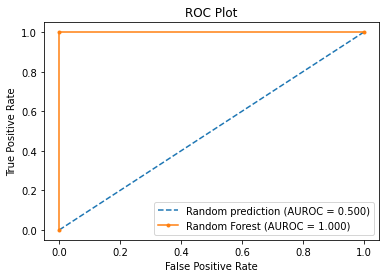

In [ ]:
nb = GaussianNB()
nb.fit(np.array(X_train).reshape(-1, 1), y_train)
r_probs = [0 for _ in range(len(y_test))]
rf_probs = model.predict_proba(np.array(X_test).reshape(-1, 1))
nb_probs = nb.predict_proba(np.array(X_test).reshape(-1, 1))
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]

r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
nb_auc = roc_auc_score(y_test, nb_probs)

print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
# plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()


Training data of the IQR of the 10 classes using logistic regression

In [ ]:
#Training for 10 features
IQRorigin= [[0.0017055608332157135, 1.7712300177663565e-05, 0.009975716471672058, 0.03178440406918526, 0.02126207947731018, 0.0049100592732429504, 0.047082290053367615, 0.0005403273971751332, 0.0007548043504357338, 5.710925324819982e-05], [0.011418387293815613, 0.0013598682126030326, 0.09885168075561523, 0.00464252382516861, 0.046812549233436584, 0.0014349408447742462, 0.0019953958690166473, 0.012687508948147297, 0.00877823494374752, 0.0513496994972229], [0.045265138149261475, 0.00022518960759043694, 0.01576201245188713, 0.050820961594581604, 0.016762573271989822, 0.0036192722618579865, 0.00157233327627182, 0.002718303701840341, 0.008234064094722271, 0.000555174658074975], [0.007919222116470337, 0.0001836906303651631, 0.011065959930419922, 0.01633438467979431, 0.021775707602500916, 0.0050170645117759705, 0.03101491928100586, 0.00017360958736389875, 0.0014661364257335663, 0.00022853282280266285], [3.685346996462613e-07, 3.743171691894531e-05, 1.5269137065843097e-07, 4.1834826447484375e-07, 1.1561888868527603e-07, 2.7570344229843613e-08, 3.451334578130627e-07, 5.497634880669011e-08, 1.9351224977981474e-07, 3.5690671211341396e-05], [0.002746390178799629, 0.00927328784018755, 0.008487584069371223, 0.014459732919931412, 0.025294065475463867, 0.020168811082839966, 0.0038216710090637207, 0.00717722624540329, 0.004867345094680786, 0.013865035027265549], [0.017063505947589874, 1.8717677448876202e-05, 0.038478970527648926, 0.002877006074413657, 0.0119490846991539, 0.0016246791929006577, 0.0007485875394195318, 0.003239089623093605, 0.0003776015364564955, 2.631473762448877e-05], [4.540231020655483e-05, 9.06406421563588e-06, 2.5690849724924192e-05, 0.0005100136622786522, 0.007727457210421562, 0.001199590740725398, 8.6955726146698e-05, 0.009347736835479736, 1.3877313904231414e-05, 1.0180337994825095e-05], [0.014482762664556503, 0.000260267814155668, 0.0018990886164829135, 0.0017480576207162812, 0.0006465576298069209, 7.895546514191665e-05, 0.0011521303094923496, 7.64220931159798e-05, 0.01432126760482788, 0.0003590400447137654], [0.010304585099220276, 0.00028319901321083307, 0.008089986629784107, 0.017833366990089417, 0.02507774531841278, 0.014288373291492462, 0.008376335725188255, 0.0022062084171921015, 0.02013973891735077, 0.0005534691736102104], [0.0019605718553066254, 0.0004341535968706012, 0.015865247696638107, 0.009618878364562988, 0.026237167418003082, 0.0015846025198698044, 0.008984267711639404, 0.00014145797467790544, 0.022321388125419617, 0.000133914640173316], [0.006004121154546738, 0.00011434598127380013, 0.026221036911010742, 0.01946423202753067, 0.022242028266191483, 0.004769716411828995, 0.00149613618850708, 0.022503845393657684, 0.0009587565436959267, 0.00037245871499180794], [0.046467602252960205, 8.551988867111504e-05, 0.006348267197608948, 0.005121912807226181, 0.017808884382247925, 0.002645328640937805, 0.005260210484266281, 0.025851041078567505, 0.003009379841387272, 0.00020674336701631546], [0.004210168030112982, 0.0004131244495511055, 0.03708912432193756, 0.004367230460047722, 0.000934462295845151, 0.00031382404267787933, 0.02419757843017578, 0.00032366771483793855, 0.004466082900762558, 0.0006634548772126436], [0.005081653594970703, 0.002853497746400535, 0.010543636977672577, 0.007227031514048576, 0.062042236328125, 0.0008160658180713654, 0.004142105579376221, 0.004605153109878302, 0.05938548594713211, 0.009727902710437775], [0.004436936229467392, 0.0004051782889291644, 0.005999617278575897, 0.02315671741962433, 0.024625349789857864, 0.0074983444064855576, 0.019121408462524414, 0.002603917266242206, 0.08731132745742798, 0.0210089311003685], [0.009568169713020325, 0.0010608761804178357, 0.025139212608337402, 0.03578662872314453, 0.007161270827054977, 0.0030089374631643295, 0.020294371992349625, 0.0005783373489975929, 0.004236877895891666, 0.0010787465143948793], [0.00826975703239441, 9.751413017511368e-05, 0.007011182606220245, 0.01544278860092163, 0.00143326073884964, 0.0033883750438690186, 0.011900439858436584, 0.00012136006262153387, 0.009473837912082672, 0.0003084204508922994], [0.0051472000777721405, 0.002914737444370985, 0.01934213936328888, 0.04754513502120972, 0.0009408523328602314, 0.0009698187932372093, 0.02028060331940651, 7.097717025317252e-05, 0.0036674579605460167, 9.44999628700316e-05], [0.014216408133506775, 0.001477645942941308, 0.01741860806941986, 0.00503365695476532, 0.006487935781478882, 0.0016326820477843285, 0.008896112442016602, 0.002595672383904457, 0.0008688799571245909, 0.0033694591838866472], [0.02100442722439766, 0.00161952234338969, 0.02395622432231903, 0.008797243237495422, 0.05937010049819946, 0.01750798337161541, 0.017124099656939507, 0.015458361245691776, 0.005570362322032452, 0.0006740165408700705], [0.04055994749069214, 0.0007734298706054688, 0.0021222159266471863, 0.09785404056310654, 0.0036504603922367096, 0.015896912664175034, 0.068430095911026, 0.005891766399145126, 0.0025539270136505365, 0.002565083559602499], [0.0016761182341724634, 3.26263252645731e-05, 0.005570240318775177, 0.01488041877746582, 0.000662859994918108, 0.0011556982062757015, 0.01963762938976288, 1.3728367775911465e-05, 0.0002729669213294983, 1.2672731827478856e-05], [0.011095192283391953, 0.001953397411853075, 0.04350678622722626, 0.06261128932237625, 0.023725837469100952, 0.0014872956089675426, 0.03158291056752205, 0.0008083622669801116, 0.0017238911241292953, 0.0009180987253785133], [0.004276640713214874, 4.0432350942865014e-05, 0.006500840187072754, 0.0014542974531650543, 0.003669038414955139, 0.001998119056224823, 0.0025466233491897583, 0.0001504553365521133, 0.0004464709199965, 4.935415927320719e-05], [0.004037044942378998, 0.0013450841652229428, 0.009183123707771301, 0.0415540486574173, 0.011314031668007374, 0.00048801652155816555, 0.03135155141353607, 0.0006181670760270208, 0.00764886848628521, 0.00027076032711192966], [0.0036423727869987488, 0.00047117655049078166, 0.010943420231342316, 0.05810675024986267, 0.008660100400447845, 0.0009528035297989845, 0.035564929246902466, 0.00025027935043908656, 0.022886337712407112, 0.0005358429625630379], [0.0006549959070980549, 3.7054240237921476e-05, 0.00847955048084259, 0.010911896824836731, 0.005638323724269867, 0.0013106754049658775, 0.004760026931762695, 0.00022563041420653462, 8.778745541349053e-05, 0.00010485667735338211], [0.016007855534553528, 0.0005325810634531081, 0.008835170418024063, 0.019968479871749878, 0.02147012948989868, 0.002594025805592537, 0.0032462850213050842, 0.011678014416247606, 0.0029179714620113373, 0.00012331525795161724], [0.023273468017578125, 0.0005771474679931998, 0.008106078952550888, 0.014533083885908127, 0.001943657174706459, 0.0018808115273714066, 0.0013153273612260818, 0.011952960398048162, 0.015231281518936157, 0.0010994855547323823], [0.0031750649213790894, 5.289352702675387e-05, 0.0016038832254707813, 0.0010100745130330324, 0.00010992974057444371, 4.009173426311463e-05, 0.00012789573520421982, 0.00016502304788446054, 0.00025235203793272376, 0.00013632459013024345], [0.006706884130835533, 0.0034162825904786587, 0.008520909585058689, 0.053872644901275635, 0.06029067374765873, 0.0172119103372097, 0.053889885544776917, 0.014660867862403393, 0.013250112533569336, 0.004949103109538555], [0.007743969559669495, 0.014270961284637451, 0.0067320577800273895, 0.00504843145608902, 0.005164528265595436, 0.00014700740575790405, 0.040238045156002045, 0.0008994836534839123, 0.02386786788702011, 0.008890710771083832], [0.00105377659201622, 0.0007203728891909122, 0.002367563545703888, 0.021872639656066895, 0.02597525715827942, 0.0009903740137815475, 0.0194551944732666, 0.0002655411371961236, 0.0008845655247569084, 0.0025452012196183205], [0.017384514212608337, 0.00013571008457802236, 0.08009565621614456, 0.0009265246335417032, 0.09258848428726196, 0.00030145561322569847, 0.0016151148593053222, 0.0012728546862490475, 0.012594815343618393, 0.00010837003355845809], [0.03554794192314148, 0.0026063378900289536, 0.010761857032775879, 0.0019086413085460663, 0.07280880212783813, 0.009261120110750198, 0.0005998993292450905, 0.006492782384157181, 0.0426441915333271, 0.005698283202946186], [0.008314201608300209, 0.00020013388711959124, 0.02308424562215805, 0.03395569324493408, 0.007458948530256748, 0.0004957728087902069, 0.0047748759388923645, 0.00040070386603474617, 0.005072393454611301, 0.0004832844715565443], [0.0015053972601890564, 0.0003405918541830033, 0.007602192461490631, 0.004011586308479309, 0.022526726126670837, 0.006777822971343994, 0.003238525241613388, 0.004036830738186836, 0.0016294922679662704, 0.00018571445252746344], [0.022649690508842468, 0.0010893807047978044, 0.009279757738113403, 0.010033302009105682, 0.01286393404006958, 0.005250595510005951, 0.013783067464828491, 0.0005054876673966646, 0.018153250217437744, 0.0011903406120836735], [0.0017414800822734833, 0.0003977821907028556, 0.07968366146087646, 0.04080621153116226, 0.05353105440735817, 0.0021817460656166077, 0.003390409518033266, 0.001096158812288195, 0.0018541980534791946, 7.012012065388262e-05], [0.0014318153262138367, 0.0008244889904744923, 0.023589560762047768, 0.04075084626674652, 0.03327295929193497, 0.005120128393173218, 0.013987720012664795, 0.00019158422946929932, 0.03350217640399933, 0.0012498311698436737], [0.025950023904442787, 9.451813821215183e-05, 0.10864323377609253, 0.03318391181528568, 0.02791021391749382, 0.008853824809193611, 0.0003082375042140484, 0.008492482593283057, 0.004501944407820702, 0.00029791187262162566], [0.03108031302690506, 0.0011030484456568956, 0.014875166118144989, 0.032970547676086426, 0.05194184184074402, 0.0038073882460594177, 0.012644052505493164, 0.005054854322224855, 0.044054508209228516, 0.0007729241624474525], [0.00011607960914261639, 4.972179885953665e-05, 0.0029370696283876896, 0.00038023246452212334, 0.014827117323875427, 0.002482122741639614, 1.118132786359638e-05, 0.017336487770080566, 0.00011611433001235127, 2.5484594516456127e-05], [0.012761831283569336, 0.003545941784977913, 0.025712430477142334, 0.00548943504691124, 0.039467647671699524, 0.002098269760608673, 0.014426305890083313, 0.005942079704254866, 0.010887771844863892, 0.0024387650191783905], [0.00020184385357424617, 0.010666042566299438, 2.9625531169585884e-05, 0.002480483613908291, 0.004171093925833702, 6.506923818960786e-05, 0.00022859848104417324, 0.00019879684259649366, 0.00012315681669861078, 0.004585786256939173], [0.0032697170972824097, 0.02085842937231064, 0.010646741837263107, 0.008868720382452011, 0.023338917642831802, 0.001772094052284956, 0.024553805589675903, 0.0016129056457430124, 0.008295923471450806, 0.0032312492839992046], [0.010414700955152512, 0.00016137077182065696, 0.010751336812973022, 0.014865817502140999, 0.063253253698349, 0.0012084515765309334, 0.013201974332332611, 0.0001487930421717465, 0.09508761763572693, 0.0003260331868659705], [0.004538360983133316, 0.00013567390851676464, 0.14025409519672394, 0.02599383518099785, 0.11811329424381256, 0.0036449795588850975, 0.019904792308807373, 0.010719561949372292, 0.0028349868953227997, 0.0008628229843452573], [0.0323491096496582, 0.0007663582218810916, 0.02867674920707941, 0.06233073025941849, 0.0014293752610683441, 0.003936192020773888, 0.020143941044807434, 0.001453702338039875, 0.0031855497509241104, 0.0016219329554587603], [0.05950918793678284, 0.0015033464878797531, 0.06051748991012573, 0.0011307727545499802, 0.0015757735818624496, 0.0011272162664681673, 0.003538265824317932, 0.0003387024626135826, 0.026779167354106903, 0.035447679460048676], [0.0049369484186172485, 0.0005734704900532961, 0.003916006535291672, 0.03356122970581055, 0.02447040006518364, 0.009920850396156311, 0.013677163049578667, 0.003558118361979723, 0.0011289259418845177, 0.0003062575124204159], [0.04991522431373596, 0.00019494607113301754, 0.002818973734974861, 0.010449253022670746, 0.0035136397927999496, 0.010945186018943787, 0.005130164325237274, 0.01342184841632843, 0.0007573869079351425, 0.0004820101894438267], [0.036513425409793854, 0.001508701010607183, 0.009306700900197029, 0.028397677466273308, 0.02672833763062954, 0.003918817033991218, 0.011387266218662262, 0.004476962029002607, 0.025671854615211487, 0.027140647172927856], [0.0030776076018810272, 9.18995647225529e-06, 0.007842332124710083, 0.0007384492782875896, 0.0021634288132190704, 0.0003231993177905679, 0.0017250487580895424, 0.0002080172416754067, 0.00023079937091097236, 3.2242125598713756e-05], [0.003286881372332573, 1.5307865396607667e-05, 0.13523995876312256, 0.019647888839244843, 0.10566675662994385, 0.002345666289329529, 0.00101500004529953, 0.005564215709455311, 0.0009537138976156712, 0.0002094829105772078], [0.00814586877822876, 0.0004154786001890898, 0.010786071419715881, 0.014582857489585876, 0.010909181088209152, 0.002058951649814844, 0.01128397136926651, 0.0029328346718102694, 0.0019191610626876354, 0.0003631375730037689], [0.01725776493549347, 0.0003495320415822789, 0.016308844089508057, 0.0066336095333099365, 0.021109141409397125, 0.00373200885951519, 0.01401086151599884, 0.0007811052491888404, 0.003723233938217163, 0.00038140080869197845], [0.005516715347766876, 8.481428085360676e-05, 0.006024692207574844, 0.03515155613422394, 0.030481666326522827, 0.00914350152015686, 0.01350652426481247, 0.0014836483169347048, 0.0021046195179224014, 0.000254056416451931], [0.009766951203346252, 0.00045517628313973546, 0.002905935049057007, 0.01751372218132019, 0.005693472921848297, 0.002808857709169388, 0.004305753856897354, 0.0005068681202828884, 0.015574604272842407, 0.0034727416932582855], [0.011751331388950348, 0.05846618860960007, 0.0021208152174949646, 0.013212038204073906, 0.01711088791489601, 0.003364432603120804, 0.0069468580186367035, 0.0028781567234545946, 0.017166581004858017, 0.05458276718854904], [0.023944519460201263, 0.10108354687690735, 0.010023586452007294, 0.061094459146261215, 0.01194941159337759, 0.0003853465896099806, 0.0017040185630321503, 0.0023500205716118217, 0.004205390810966492, 0.013161389157176018], [0.013329911977052689, 0.0008794362656772137, 0.04487466812133789, 0.044452400878071785, 0.03430035710334778, 0.0027939610881730914, 0.009055670350790024, 0.0011667034414131194, 0.13469770550727844, 0.001872427063062787], [0.008921649307012558, 1.201582927023992e-05, 0.045332521200180054, 0.012784093618392944, 0.027153000235557556, 0.00879252701997757, 0.005016550421714783, 0.0007291721412912011, 0.004843570291996002, 2.9333285056054592e-05], [0.0039033740758895874, 0.004640642553567886, 0.005321569740772247, 0.0041268616914749146, 0.010635137557983398, 0.0014151949435472488, 0.018876761198043823, 0.0019245143048465252, 0.004087217152118683, 0.0032256226986646652], [0.11699624359607697, 0.17764441668987274, 0.004691435024142265, 0.006941229337826371, 0.025356508791446686, 0.0007903715595602989, 4.757964052259922e-05, 0.0024261786020360887, 0.00046579877380281687, 0.017757151275873184], [0.0015346449799835682, 0.00014721794286742806, 0.012630719691514969, 0.004211185500025749, 0.009687364101409912, 0.0010723015293478966, 0.0009967719670385122, 0.0032676318660378456, 0.0013971105217933655, 0.0002609673247206956], [0.025297895073890686, 0.001685041468590498, 0.002258341759443283, 0.08557802438735962, 0.03850844129920006, 0.0056353360414505005, 0.013481028378009796, 0.009576638229191303, 0.11110928654670715, 0.024525548331439495], [0.004081018269062042, 0.00027020310517400503, 0.01658579707145691, 0.0019160211086273193, 0.022372007369995117, 0.006734400987625122, 0.00023789424449205399, 0.04038679599761963, 0.0054711755365133286, 0.0005692392587661743], [0.01105867326259613, 0.0006504233460873365, 0.003771357238292694, 0.060819923877716064, 0.03339958190917969, 0.005230329930782318, 0.00589480996131897, 0.0012588608369696885, 0.06237989664077759, 0.0015530223026871681], [0.04259061813354492, 0.00017072400078177452, 0.026101410388946533, 0.026066407561302185, 0.003712216392159462, 0.005695458501577377, 0.02444496750831604, 0.0004314979596529156, 0.06118093430995941, 0.0001561895478516817], [0.019803659990429878, 0.0002816214691847563, 0.006923466920852661, 0.007225722074508667, 0.014238566160202026, 0.003335431218147278, 0.015406804159283638, 0.0009947759099304676, 0.004559412598609924, 0.0011600176803767681], [0.001965438947081566, 0.0004520360380411148, 0.007565096020698547, 0.014604337513446808, 0.00046244123950600624, 0.000988715561106801, 0.01817891001701355, 2.4107132048811764e-05, 0.004807565361261368, 9.584054350852966e-05], [0.0020468756556510925, 0.00018775137141346931, 0.003925323486328125, 0.009418845176696777, 0.009600646793842316, 0.0028233621269464493, 0.0023844214156270027, 0.0009336918592453003, 0.0010477416217327118, 0.001497369259595871], [0.002100342884659767, 0.00017834416939876974, 0.02663704752922058, 0.022953033447265625, 0.009946063160896301, 0.003964416682720184, 0.01099163293838501, 0.0017031769384630024, 0.02063729614019394, 9.179097833111882e-05], [0.023503750562667847, 0.00310510111739859, 0.001839490607380867, 0.036225054413080215, 0.04200492799282074, 0.021641016006469727, 0.026756934821605682, 0.0020793050061911345, 0.04362719506025314, 0.013864759355783463], [0.05760994553565979, 0.0038875751197338104, 0.0006115026772022247, 0.0007559750229120255, 0.0005000941455364227, 4.0896469727158546e-05, 0.00019102217629551888, 0.007256489247083664, 0.024850472807884216, 0.04203420877456665], [0.020926952362060547, 0.0001513314200565219, 0.0043449546210467815, 0.07198601961135864, 0.0022471556439995766, 0.005528082139790058, 0.03636544942855835, 0.0009649774292483926, 0.010348263196647167, 0.0002688916865736246], [0.004863835871219635, 6.532538100145757e-05, 0.02712687849998474, 0.01150694489479065, 0.035436153411865234, 0.005460076034069061, 0.008260458707809448, 0.001250997418537736, 0.0033231452107429504, 0.00013484893133863807], [0.00899570807814598, 0.053388893604278564, 0.004713535308837891, 0.0010578376241028309, 0.010097906459122896, 0.0003441123990342021, 1.868614344857633e-05, 0.011494196020066738, 0.0034903776831924915, 0.03604082204401493], [0.010714545845985413, 0.0005948805483058095, 0.010920926928520203, 0.009424388408660889, 0.03516426682472229, 0.0011793971061706543, 0.038034722208976746, 0.001904907519929111, 0.07762160897254944, 0.0012880312278866768], [0.004094194620847702, 0.00011433742474764585, 0.004037298262119293, 0.011061310768127441, 0.020318882539868355, 0.00402725487947464, 0.013342022895812988, 0.0008704387582838535, 0.00825539045035839, 0.0010253789369016886], [0.004370867274701595, 6.888661300763488e-05, 0.00795336626470089, 0.021606922149658203, 0.04004615545272827, 0.002387548331171274, 0.0022673660423606634, 0.00010974620818160474, 0.0010885335505008698, 2.1658444893546402e-05], [0.009904339909553528, 0.0009058313444256783, 0.013954587280750275, 0.023343592882156372, 0.021358594298362732, 0.003834061324596405, 0.019616052508354187, 0.0011171568185091019, 0.047861337661743164, 0.0023695803247392178], [0.012336395680904388, 0.00013985489204060286, 0.056761402636766434, 0.0148383229970932, 0.038666173815727234, 0.004827268421649933, 0.007792283780872822, 0.01615812722593546, 0.002474941313266754, 0.0001550968736410141], [0.0002676248550415039, 1.1957017704844475e-06, 0.0005763769149780273, 0.00011102110147476196, 1.1567026376724243e-05, 1.959875226020813e-05, 0.00014412403106689453, 3.2312236726284027e-06, 0.0007267743349075317, 2.3206695914268494e-05], [0.0018174313008785248, 0.0003548480453900993, 0.00781310349702835, 0.006656236946582794, 0.05264723300933838, 0.013381797820329666, 0.03204664587974548, 0.0028258105739951134, 0.006003968417644501, 0.00013904948718845844], [0.004971163347363472, 0.0005764332599937916, 0.0017116963863372803, 0.008268490433692932, 0.007194221019744873, 0.0010995510965585709, 0.0325242355465889, 0.0057120174169540405, 0.001357443630695343, 0.0031812526285648346], [0.009208686649799347, 0.004465299658477306, 0.019364843145012856, 0.014765888452529907, 0.011869058012962341, 0.002346096560359001, 0.0016041435301303864, 0.012072324752807617, 0.0007735444232821465, 0.02988598495721817], [0.0024926792830228806, 0.00024044036399573088, 0.0528186559677124, 0.0053992196917533875, 0.07095390558242798, 0.002060612663626671, 0.008551212027668953, 0.001756959711201489, 0.005629609804600477, 0.00020243105245754123], [0.02606983482837677, 0.0049198092892766, 0.02240031585097313, 0.05693485587835312, 0.025158241391181946, 0.002146967686712742, 0.01948491483926773, 0.002969423192553222, 0.009792222641408443, 0.0023615541867911816], [0.019860241562128067, 0.00016630074242129922, 0.006257146596908569, 0.038670748472213745, 0.009012840688228607, 0.0035310126841068268, 0.016104966402053833, 0.0005611051456071436, 0.02749127894639969, 0.0005635321140289307], [0.04342079162597656, 0.00010149783338420093, 0.001414175087120384, 0.006458304822444916, 0.007937312126159668, 0.0012071568053215742, 0.0014315564185380936, 0.000594825301959645, 0.060989558696746826, 0.00013485472300089896], [0.024048849940299988, 0.001132429577410221, 0.003767993301153183, 0.001902224961668253, 0.027379199862480164, 0.0005101223941892385, 0.002561114728450775, 0.0006598870386369526, 0.010813340544700623, 0.00045377202332019806], [0.0072588250041007996, 0.008475087583065033, 0.0032446905970573425, 0.00928807258605957, 0.02277877926826477, 0.004847027361392975, 0.01877252757549286, 0.002210719510912895, 0.009717777371406555, 0.001387711614370346], [0.011955689638853073, 0.00012438121484592557, 0.016221970319747925, 0.024951457977294922, 0.05642223171889782, 0.005069598089903593, 0.09576728194952011, 0.0009786558512132615, 0.001003970392048359, 7.433359860442579e-05], [0.0427236407995224, 0.004210471175611019, 0.004386475309729576, 0.026855934411287308, 0.0022097863256931305, 0.0008453717455267906, 0.005265329964458942, 0.0004617776721715927, 0.03375696763396263, 0.004625353030860424], [0.02947351336479187, 0.000921307597309351, 0.02475859224796295, 0.00716216117143631, 0.003943480551242828, 0.0019976161420345306, 0.0030602216720581055, 0.0004831551341339946, 0.004874046891927719, 0.0004073933232575655], [0.01582355797290802, 0.0007630505133420229, 0.04491603374481201, 0.00957179069519043, 0.03566189110279083, 0.004519732668995857, 0.0025997646152973175, 0.00022136507323011756, 0.0008730944246053696, 0.00016533519374206662], [0.0022086575627326965, 0.02929389476776123, 0.0015826895833015442, 0.0064849406480789185, 0.0022655613720417023, 0.0001971665769815445, 0.0018282255623489618, 6.1488535720855e-05, 0.011086821556091309, 0.0019046831876039505], [0.04364962875843048, 0.0013555767945945263, 0.02786722220480442, 0.06460614874958992, 0.03585648164153099, 0.0016850740648806095, 0.007977195084095001, 0.0033955152612179518, 0.1482425555586815, 0.005333320703357458], [0.01946961134672165, 6.698854849673808e-05, 0.034026384353637695, 0.08410128951072693, 0.009841762483119965, 0.014949142932891846, 0.02536729723215103, 0.0016084351809695363, 0.005086442455649376, 0.0001788931549526751], [0.036470890045166016, 0.0011228155344724655, 0.020301975309848785, 0.032876260578632355, 0.01950967311859131, 0.013178486377000809, 0.008461110293865204, 0.0017005493282340467, 0.01820424199104309, 0.013615289703011513], [0.00032038614153862, 9.777257218956947e-06, 0.00014248862862586975, 2.6842579245567322e-05, 8.056871592998505e-06, 5.3443945944309235e-06, 0.00028258562088012695, 7.724156603217125e-07, 0.00020736083388328552, 7.175607606768608e-06], [7.847882807254791e-05, 1.004722435027361e-06, 1.6193022020161152e-05, 3.6182464100420475e-06, 5.875044735148549e-07, 7.024937076494098e-07, 0.0001004934310913086, 4.2825558921322227e-07, 1.8675345927476883e-06, 9.816722013056278e-07], [0.0055296821519732475, 0.008573278784751892, 0.0003520218342600856, 0.0003789746515394654, 0.0001536771178507479, 8.452135602965427e-06, 2.032967677223496e-05, 0.0003100686681136722, 0.00049685436533764, 0.0009446279727853835], [0.05004064738750458, 0.00054190430091694, 0.00016277733084280044, 0.0002475125511409715, 0.00021034147357568145, 7.421936606988311e-05, 8.387985872104764e-05, 7.158933567552594e-05, 0.053000450134277344, 0.0011908357264474034], [0.008242398500442505, 0.001390404999256134, 0.012421183288097382, 0.028647400438785553, 0.00329386442899704, 0.004728667438030243, 0.017773479223251343, 0.000372669892385602, 0.008347072638571262, 0.0004473072476685047], [0.041338562965393066, 7.076554902596399e-05, 0.037674859166145325, 0.04739170894026756, 0.0037708329036831856, 0.02093583717942238, 0.015429794788360596, 0.0018194917356595397, 0.014475733041763306, 0.00019209427409805357], [0.07086658477783203, 0.0008231850806623697, 0.0047919172793626785, 0.0053619397804141045, 0.007133949548006058, 0.00037997961044311523, 0.0007065276149660349, 0.001317302812822163, 0.02551327645778656, 0.07064399123191833], [0.011363804340362549, 0.0014410330913960934, 0.006987489759922028, 0.007233113050460815, 0.00874338299036026, 0.0007704701274633408, 0.0019802674651145935, 0.0031735338270664215, 0.013086199760437012, 0.0025992293376475573], [0.03174324333667755, 0.0008891252800822258, 0.008063875138759613, 0.012306492775678635, 0.06374877691268921, 0.0013553067110478878, 0.002203131327405572, 0.0004701620200648904, 0.013868487440049648, 0.0003943449701182544], [0.028504550457000732, 0.03797107934951782, 0.006518714129924774, 0.008406810462474823, 0.002969718538224697, 0.00031235843198373914, 0.0004430650733411312, 0.0004923059605062008, 0.011992352083325386, 0.0007331622764468193], [0.01529085636138916, 0.003434671089053154, 0.01762428879737854, 0.010882362723350525, 0.03373540937900543, 0.0010344833135604858, 0.011304177343845367, 0.006704973056912422, 0.010003618896007538, 0.00044930074363946915], [6.87131832819432e-05, 1.6951362340478227e-06, 8.524904842488468e-05, 0.0005563823506236076, 0.08973958343267441, 0.0016154590994119644, 4.802134935744107e-05, 0.0883961021900177, 5.313118890626356e-06, 5.465441063279286e-06], [0.036545246839523315, 0.016079245135188103, 0.0011802297085523605, 0.08843929320573807, 0.0010745774488896132, 0.0006578883621841669, 0.003245791420340538, 0.0016654507198836654, 0.022065622732043266, 0.042371779680252075], [0.01943492889404297, 0.0027353372424840927, 0.00766415148973465, 0.01411426067352295, 0.014019295573234558, 0.0053863525390625, 0.0048555657267570496, 0.000709776533767581, 0.009790778160095215, 0.001998989377170801], [0.0016300007700920105, 0.0007516636978834867, 0.017106205224990845, 0.014959372580051422, 0.0021263975650072098, 0.00042127538472414017, 0.0393674299120903, 0.0001467295951442793, 0.0037978384643793106, 4.284630995243788e-05], [0.03525695949792862, 0.04437696374952793, 0.011810243129730225, 0.0030135270208120346, 0.009724587202072144, 0.00030238903127610683, 0.006423197686672211, 0.002092747250571847, 0.034882716834545135, 0.11321516335010529], [0.07919615507125854, 0.0711013674736023, 0.00047865515807643533, 0.01029960811138153, 0.0010823653574334458, 5.910333129577339e-05, 0.009870953857898712, 0.0006262578972382471, 0.013875484466552734, 0.010089809074997902], [0.007021039724349976, 0.0020405168179422617, 0.02564816176891327, 0.06808805465698242, 0.016506735235452652, 0.0027257874608039856, 0.033161461353302, 0.0017183489399030805, 0.018010567873716354, 0.0008113235235214233], [0.003621503710746765, 0.0002218566369265318, 0.023133382201194763, 0.02398940920829773, 0.03446561098098755, 0.0029835551977157593, 0.015459775924682617, 0.0019346516346558928, 0.012085065245628357, 0.0004257562104612589], [0.021624863147735596, 0.0005939958500675857, 0.008972786366939545, 0.01813201606273651, 0.04337213933467865, 0.0012279828079044819, 0.0007361471652984619, 0.0037757419049739838, 0.05183297395706177, 0.0016430728137493134], [0.013455919921398163, 0.0003474215045571327, 0.023435264825820923, 0.029749497771263123, 0.021360212936997414, 0.005569424480199814, 0.00745391845703125, 0.007218571379780769, 0.017351515591144562, 0.005071117077022791], [0.005296297371387482, 0.0007669839542359114, 0.0038698986172676086, 0.0008300170302391052, 0.0037992484867572784, 0.0005391053855419159, 0.003046661615371704, 0.0001531090820208192, 0.0044572725892066956, 0.00047522038221359253], [0.0015165889635682106, 0.0005481841508299112, 0.022564783692359924, 0.0741146057844162, 0.0020906017161905766, 0.00017676153220236301, 0.09846271574497223, 0.0004091150767635554, 0.0027686874382197857, 0.0004492254229262471], [0.013767197728157043, 0.02837667614221573, 0.010257091373205185, 0.024230249226093292, 0.034165434539318085, 0.0009608601685613394, 0.03931035101413727, 0.0047870841808617115, 0.01547977700829506, 0.003848716616630554], [0.031185060739517212, 0.010130490642040968, 0.005622163414955139, 0.037483200430870056, 0.05657222867012024, 0.0012843534350395203, 0.010916396975517273, 0.016590759623795748, 0.038935743272304535, 0.016286782920360565], [0.00495988130569458, 0.00047076609916985035, 0.0009272098541259766, 0.006857633590698242, 0.0010625235736370087, 0.006149459630250931, 0.00313732773065567, 0.0004153179470449686, 0.0016313232481479645, 0.00011982303112745285], [0.028727024793624878, 0.0008994562085717916, 0.022900164127349854, 0.0575014129281044, 0.02658066153526306, 0.0007294276729226112, 0.003426775336265564, 0.0004633045173250139, 0.045281097292900085, 0.0012762872502207756], [0.005537156015634537, 0.0002604112960398197, 0.007034070789813995, 0.02046193927526474, 0.06704631447792053, 0.004437331110239029, 0.06999799609184265, 0.0007545219268649817, 0.010233201086521149, 0.0003236411139369011], [0.020139500498771667, 8.744759543333203e-05, 0.023659855127334595, 0.025554820895195007, 0.013392060995101929, 0.004776600748300552, 0.0012256870977580547, 0.014775753021240234, 0.0014189481735229492, 8.905318100005388e-05], [0.003596372902393341, 0.00022745109163224697, 0.0004949606955051422, 0.006997928023338318, 0.0002995003014802933, 0.0006467895582318306, 0.007203042507171631, 3.599336196202785e-05, 0.0009762737900018692, 0.00013672048225998878], [0.0027203683275729418, 0.00013398285955190659, 0.0044812848791480064, 0.006648410111665726, 0.033812493085861206, 0.0027656108140945435, 0.0015604253858327866, 0.02042287588119507, 0.0008105386514216661, 0.0006777666276320815], [0.000306188128888607, 0.001170814037322998, 6.839865818619728e-06, 8.660316234454513e-05, 4.950168658979237e-06, 2.757726178970188e-06, 2.968008629977703e-05, 1.6383446563850157e-06, 0.00032720796298235655, 0.001318279653787613], [0.04858273267745972, 0.0007800520397722721, 0.004729043692350388, 0.02627403475344181, 0.03009641170501709, 0.0018071015365421772, 0.004144072532653809, 0.0006831178325228393, 0.09539606422185898, 0.005793176591396332], [0.01717626303434372, 0.05641810595989227, 9.877349657472223e-05, 0.004396782722324133, 0.015824060887098312, 0.0009244069806300104, 0.0007945559918880463, 0.01022759499028325, 0.00032029207795858383, 0.03426194190979004], [0.050264596939086914, 0.015167498961091042, 0.0165681391954422, 0.008055195212364197, 0.031055107712745667, 0.0007376112043857574, 0.005362832918763161, 0.0074434292037039995, 0.059224966913461685, 0.005665259435772896], [0.0026343725621700287, 0.000145977595821023, 0.02263164520263672, 0.015805423259735107, 0.004189152270555496, 0.0005842482787556946, 0.015500128269195557, 0.0008941460691858083, 0.004992356523871422, 8.569555939175189e-05], [0.02287963777780533, 0.0018325757700949907, 0.0033373497426509857, 0.029457569122314453, 0.018523571081459522, 0.004985155537724495, 0.0049940720200538635, 0.001581735588843003, 0.06043338030576706, 0.001857504714280367], [0.03848844766616821, 0.005595043301582336, 0.008836701512336731, 0.00330432690680027, 0.0011701183393597603, 0.0014033932238817215, 0.003366494085639715, 0.002514575608074665, 0.01385720819234848, 0.01183687150478363], [0.0033329129219055176, 0.001290915533900261, 0.005582166835665703, 0.02199481427669525, 0.008668825030326843, 0.004403792321681976, 0.014624811708927155, 0.0007142696413211524, 0.006222274154424667, 0.0010816757567226887], [0.006150089204311371, 0.00023087499721441418, 0.02255895733833313, 0.023248791694641113, 0.025589123368263245, 0.004871197044849396, 0.061258867383003235, 0.0021314627956598997, 0.013997353613376617, 0.0014027587603777647], [0.004786454141139984, 0.00023795536253601313, 0.012086421251296997, 0.02127911150455475, 0.003991767764091492, 0.0006484487093985081, 0.041186362504959106, 9.17029392439872e-05, 0.0003724136622622609, 6.242532981559634e-05], [0.012077435851097107, 0.000545196351595223, 0.028632566332817078, 0.02483878657221794, 0.057082608342170715, 0.004372714087367058, 0.038688987493515015, 0.005604027770459652, 0.025096207857131958, 0.0004342807806096971], [0.008349992334842682, 0.00045387691352516413, 0.009667521342635155, 0.005244459956884384, 0.019383013248443604, 0.00225889403373003, 0.004967361688613892, 0.000469159334897995, 0.014400448650121689, 0.00018014328088611364], [0.002391749992966652, 0.0006137851160019636, 0.009105503559112549, 0.015491999685764313, 0.05941461771726608, 0.002071194350719452, 0.03709103912115097, 0.004316395381465554, 0.009571006055921316, 0.00040423683822155], [0.01175091415643692, 0.0015138848684728146, 0.004350654780864716, 0.0036451779305934906, 0.01750975102186203, 0.0001562461256980896, 0.013181878253817558, 0.0032987596932798624, 0.03619885444641113, 0.027286775410175323], [0.005410138517618179, 0.0001045389799401164, 0.0032415997702628374, 0.03301382064819336, 0.00684963446110487, 0.027050957083702087, 0.0022094324231147766, 0.004004358779639006, 0.0021912707015872, 0.0009424337185919285], [0.004882197827100754, 0.00034750381018966436, 0.022080913186073303, 0.014165341854095459, 0.08319114148616791, 0.003083968535065651, 0.011801350861787796, 0.0004375518474262208, 0.04679112136363983, 0.0011800993233919144], [0.0011345632374286652, 0.0005508861504495144, 0.013796404004096985, 0.02414552867412567, 0.018726151436567307, 0.0038170963525772095, 0.03881567716598511, 0.0006236794870346785, 0.0037987828254699707, 0.00038872641744092107], [0.0003900001756846905, 1.2892764061689377e-05, 0.016774414107203484, 0.012353897094726562, 0.019413888454437256, 0.0013684006407856941, 0.01716841757297516, 0.0001513811876066029, 0.0004837659653276205, 4.023575456812978e-05], [0.00648026168346405, 0.0002474833745509386, 0.010116060264408588, 0.00622519850730896, 0.09689218550920486, 0.009322144091129303, 0.0035456493496894836, 0.0007674787193536758, 0.058127567172050476, 0.0013183420524001122], [0.0018596556037664413, 0.00020922931435052305, 0.012140356935560703, 0.004215851426124573, 0.13468162715435028, 0.03544282913208008, 0.03716573864221573, 0.0013290501665323973, 0.04886242002248764, 0.00010722887236624956], [0.061348021030426025, 0.00036900979466736317, 0.02483133226633072, 0.023421630263328552, 0.025263383984565735, 0.002709865104407072, 0.011384963989257812, 0.0011351816647220403, 0.003359314054250717, 0.00017966004088521004], [0.01280425488948822, 0.0009875176474452019, 0.018788941204547882, 0.0034619905054569244, 0.03479055315256119, 0.001937860855832696, 0.004089136142283678, 0.007622529752552509, 0.05721019208431244, 0.00019600708037614822], [0.010634271427989006, 0.0008486821316182613, 0.013911128044128418, 0.00987657904624939, 0.020552918314933777, 0.00811263918876648, 0.00986810028553009, 0.0012410085182636976, 0.00183139368891716, 0.00021548767108470201], [0.0033820345997810364, 0.0003557672316674143, 0.0064113549888134, 0.03134078532457352, 0.018097035586833954, 0.0035637766122817993, 0.04459729790687561, 0.00019425098435021937, 0.0062185972929000854, 0.0004043281078338623], [0.010791465640068054, 0.0009312243200838566, 0.031210243701934814, 0.007171042263507843, 0.005466461181640625, 0.004629436880350113, 0.0013890340924263, 0.018533628433942795, 0.005687359720468521, 0.0004018170293420553], [0.008732885122299194, 0.0003164669033139944, 0.014887690544128418, 0.01033008098602295, 0.009269453585147858, 0.001382347196340561, 0.006758108735084534, 0.0014423588290810585, 0.0012890617363154888, 0.001360259484499693], [0.0014896380598656833, 0.00582045316696167, 0.00017151341307908297, 0.002391038811765611, 0.00023384549422189593, 5.5110668881752645e-06, 6.361826308420859e-06, 0.00030874662479618564, 8.013703336473554e-05, 0.001236756390426308], [0.01524248719215393, 0.0022395870182663202, 0.006764773279428482, 0.0126173528842628, 0.08501829020678997, 0.00218695227522403, 0.0009724730625748634, 0.007836623350158334, 0.08862777799367905, 0.004526251461356878], [0.004355192184448242, 9.64017235673964e-05, 0.007304646074771881, 0.00509798526763916, 0.0015293732285499573, 0.0011473745107650757, 0.0022384971380233765, 5.612848326563835e-05, 0.00045682210475206375, 0.00011930498294532299], [0.007575921714305878, 1.4763703802600503e-05, 0.005241729319095612, 0.00638454407453537, 0.00444379448890686, 0.009873390197753906, 0.0037606097757816315, 0.02021697163581848, 0.002501625567674637, 0.00014640414156019688], [0.0097486712038517, 0.0017468095757067204, 0.028889991343021393, 0.009566590189933777, 0.019762597978115082, 0.00047109369188547134, 0.054952457547187805, 0.0006396264361683279, 0.004604996647685766, 0.002681683166883886], [0.046554386615753174, 0.0006985657382756472, 0.002884969115257263, 0.0557376891374588, 0.01378701627254486, 0.0018215696327388287, 0.016051560640335083, 0.001693145139142871, 0.0033351308666169643, 0.004169424995779991], [0.011393219232559204, 0.006770361680537462, 0.007925651036202908, 0.006164029240608215, 0.004920672625303268, 0.0006150237750262022, 0.0016981532680802047, 0.012482212856411934, 0.02286231517791748, 0.013944365084171295], [0.004316750913858414, 4.6592249418608844e-05, 0.019092261791229248, 0.07213225960731506, 0.011377394199371338, 0.013368507847189903, 0.028003744781017303, 0.003769010305404663, 0.0017657163552939892, 0.00011619285214692354], [0.005312307737767696, 0.004640292841941118, 0.004662938416004181, 0.001824505627155304, 0.0027002915740013123, 9.377161040902138e-05, 0.010150104761123657, 0.0004496173933148384, 0.028516054153442383, 0.006143299862742424], [0.0062024593353271484, 0.0007275438401848078, 0.01907540112733841, 0.021071434020996094, 0.0331103652715683, 0.0016454528085887432, 0.0071111321449279785, 0.002645608619786799, 0.010596539825201035, 0.0003831437788903713], [0.01896524429321289, 0.0010078806662932038, 0.006506983190774918, 0.033920541405677795, 0.009975466877222061, 0.004752982407808304, 0.00739559531211853, 0.0003013994137290865, 0.029403865337371826, 0.0005459170788526535], [0.013192310929298401, 0.00030778250948060304, 0.05266210436820984, 0.03694799542427063, 0.04706695303320885, 0.010445617139339447, 0.046098724007606506, 0.00697632075753063, 0.027096949517726898, 0.0007176985964179039], [0.008407913148403168, 2.400407538516447e-05, 0.01364576630294323, 0.0054246485233306885, 0.014937646687030792, 0.007184669375419617, 4.231449565850198e-05, 0.03665518760681152, 0.0002549929777160287, 4.1720326407812536e-05], [0.006913263350725174, 0.0008173621026799083, 0.015840312466025352, 0.020696178078651428, 0.04722430929541588, 0.0178282018750906, 0.032127127051353455, 0.0007256533717736602, 0.011600814759731293, 0.0005781827494502068], [0.003958906978368759, 0.00012118680751882493, 0.05699235200881958, 0.05602094531059265, 0.02271261066198349, 0.0035434565506875515, 0.006391414441168308, 0.0024013182846829295, 0.032780274748802185, 0.00021731271408498287], [0.01615983247756958, 7.273908704519272e-05, 0.021194912493228912, 0.003680609166622162, 0.053478777408599854, 0.004219356924295425, 0.030759133398532867, 0.009695808868855238, 0.0015187188982963562, 0.00012078415602445602], [0.012157853692770004, 0.054648131132125854, 0.00625137984752655, 0.027560509741306305, 0.07025725394487381, 0.0016195476055145264, 0.01040664128959179, 0.02250783145427704, 0.007588077336549759, 0.006445370614528656], [0.005155012011528015, 0.0001243852311745286, 0.007431335747241974, 0.015594691038131714, 0.009205706417560577, 0.005443751811981201, 0.01469758152961731, 0.00012835091911256313, 0.01011630892753601, 0.0003909291699528694], [0.0011573564261198044, 0.0004784371703863144, 0.004902787506580353, 0.011040395125746727, 0.009395293891429901, 0.0014538159593939781, 0.005874693393707275, 0.002982746809720993, 0.0015142373740673065, 0.0014563091099262238], [0.007638104259967804, 0.0005094306834507734, 0.008451223373413086, 0.0063809603452682495, 0.048485949635505676, 0.004087317734956741, 0.012050732970237732, 0.0006429434288293123, 0.02058999612927437, 0.00015851081116124988], [0.007664378732442856, 0.00026701082242652774, 0.005718804895877838, 0.006563782691955566, 0.02222304418683052, 0.002462204545736313, 0.02526223659515381, 0.00035199359990656376, 0.0021950602531433105, 0.0008172090165317059], [0.004658371210098267, 0.0009336546063423157, 0.0009879041463136673, 0.02501922845840454, 0.006263256072998047, 0.009208515286445618, 0.01354963704943657, 0.006619289517402649, 0.010636650025844574, 0.0007689320482313633], [0.009777992963790894, 3.608983752201311e-05, 0.007011294364929199, 0.02581213414669037, 0.014883793890476227, 0.004162341356277466, 0.053814083337783813, 0.0009325994178652763, 0.0026191044598817825, 0.0003463508328422904], [0.023334428668022156, 0.0025552643346600235, 0.047648534178733826, 0.03858749568462372, 0.0067690834403038025, 0.003331068903207779, 0.05341365188360214, 0.0014679385349154472, 0.02005133032798767, 0.002795523381792009], [0.004195049405097961, 0.014432132244110107, 0.0003651082515716553, 0.005310993641614914, 0.002905115485191345, 0.002527134492993355, 0.0071045756340026855, 0.0018758901860564947, 0.004154190421104431, 0.0013468191027641296], [0.0152357816696167, 0.0030052666552364826, 0.004104197025299072, 0.05234212428331375, 0.03954443335533142, 0.004914203658699989, 0.024172581732273102, 0.006561359157785773, 0.07517500966787338, 0.006441793404519558], [0.01167408749461174, 0.005019605625420809, 0.014040928333997726, 0.02751706913113594, 0.026488862931728363, 0.0012846849858760834, 0.010649867355823517, 0.01332775503396988, 0.01186141837388277, 0.07253795862197876], [0.006483741104602814, 0.0028393957763910294, 0.004812205210328102, 0.09185465425252914, 0.00462750717997551, 0.0006956830620765686, 0.09275061637163162, 0.0006645472312811762, 0.003758859820663929, 0.0006184917874634266], [0.020082175731658936, 0.0008536987006664276, 0.017991632223129272, 0.015126928687095642, 0.010560829192399979, 0.002887750742956996, 0.018405050039291382, 0.0017238780856132507, 0.02051776461303234, 0.01283976435661316], [0.008380305022001266, 0.0012318326625972986, 0.024921387434005737, 0.04478268325328827, 0.0031540878117084503, 0.0018536867573857307, 0.008936475962400436, 0.00027217017486691475, 0.0617712140083313, 0.0023491084575653076], [0.0956672728061676, 0.00045247050002217293, 0.03048820048570633, 0.014761584810912609, 0.021406780928373337, 0.006447183899581432, 0.008190326392650604, 0.0021200961782597005, 0.14853602647781372, 0.003169045317918062], [0.01878976821899414, 0.00032993097556754947, 0.06149522215127945, 0.018974512815475464, 0.06449481844902039, 0.009474523365497589, 0.005161989480257034, 0.017426852136850357, 0.02898823469877243, 0.0017289341194555163], [0.04712970554828644, 0.0006688848370686173, 0.00978842657059431, 0.008725574240088463, 0.0012137037701904774, 0.00043997232569381595, 0.002936300355941057, 0.0007211336342152208, 0.04953548312187195, 0.0011994073865935206], [0.008452631533145905, 0.00010106811532750726, 0.006174985319375992, 0.03094346448779106, 0.03611356019973755, 0.009044680744409561, 0.04054446518421173, 0.007251728791743517, 0.04886302351951599, 0.0006651896983385086], [0.030775412917137146, 0.0001924794923979789, 0.1056915745139122, 0.0569092258810997, 0.07538159191608429, 0.012190617620944977, 0.020688951015472412, 0.0030762493843212724, 0.003868214786052704, 0.0001230514026246965], [0.021135836839675903, 0.00031518947798758745, 0.01854950189590454, 0.010328546166419983, 0.0329519659280777, 0.02136027067899704, 0.02444559335708618, 0.0012947632931172848, 0.021798133850097656, 0.0010452717542648315], [0.005915898829698563, 0.00033013499341905117, 0.019510477781295776, 0.008817791938781738, 0.013659089803695679, 0.0028692930936813354, 0.019177690148353577, 0.0008201125601772219, 0.017909493297338486, 0.0003938621375709772], [0.006792381405830383, 0.0004123053513467312, 0.010325361043214798, 0.020720168948173523, 0.020139113068580627, 0.005816853605210781, 0.03366583585739136, 0.00021440302953124046, 0.008819378912448883, 0.0008910642936825752], [0.00012081116437911987, 6.589980330318213e-07, 0.0005114972591400146, 0.00019374489784240723, 0.00011063367128372192, 0.0005772709846496582, 5.146116018295288e-05, 2.725888043642044e-05, 5.4780393838882446e-05, 5.338806658983231e-06], [0.011534124612808228, 0.0023182863369584084, 0.0070902034640312195, 0.030007049441337585, 0.03398093581199646, 0.001713334582746029, 0.009563516825437546, 0.0009366910671815276, 0.0676724910736084, 0.001898638904094696], [0.0004512360319495201, 2.4528544599888846e-05, 0.010347874835133553, 0.024349361658096313, 0.0077926162630319595, 0.0009791447082534432, 0.042258620262145996, 2.9195194656495005e-05, 3.907304926542565e-05, 5.33903221366927e-06], [0.006096139550209045, 0.006361586507409811, 0.028124824166297913, 0.010345667600631714, 0.05592536926269531, 0.009479472413659096, 0.00926731526851654, 0.005328837316483259, 0.004896756261587143, 0.0076462458819150925], [0.024506375193595886, 0.0024642841890454292, 0.023627908900380135, 0.025085046887397766, 0.03972437046468258, 0.0009397621033713222, 0.022958737798035145, 0.005320035386830568, 0.04919837415218353, 0.07569479942321777], [0.0186324380338192, 0.00022829585941508412, 0.007731054909527302, 0.037540555000305176, 0.043755702674388885, 0.004000276327133179, 0.029302366077899933, 0.0005442896508611739, 0.004717147909104824, 0.0003102879854850471], [0.007795810699462891, 0.0003619561903178692, 0.045433640480041504, 0.050314828753471375, 0.029461488127708435, 0.0039870841428637505, 0.03582945466041565, 0.0012382835848256946, 0.005550168454647064, 0.0017911189934238791], [0.03902776539325714, 0.0006594983860850334, 0.003812074661254883, 0.02710738778114319, 0.007790140807628632, 0.0009064888581633568, 0.02933250553905964, 0.0045125288888812065, 0.004775792360305786, 0.0015806579031050205], [0.018019311130046844, 0.16215771436691284, 0.019387897104024887, 0.04693841189146042, 0.0069157518446445465, 0.0038431587163358927, 0.007959309965372086, 0.03432779759168625, 0.009995194151997566, 0.034449223428964615], [0.01961156725883484, 0.00041351368417963386, 0.007077224552631378, 0.0438532829284668, 0.04159683920443058, 0.0034041963517665863, 0.002193804830312729, 0.004669449990615249, 0.09454306960105896, 0.0020652669481933117], [0.011223535984754562, 0.006075896322727203, 0.016373027116060257, 0.04015665501356125, 0.03393617831170559, 0.0011990845669060946, 0.07019386440515518, 0.02567478734999895, 0.053879979997873306, 0.030197009444236755], [0.00517573207616806, 0.00018358416855335236, 0.007148295640945435, 0.02739390730857849, 0.008175939321517944, 0.0003243394894525409, 0.029169410467147827, 0.0004123502585571259, 0.012104418128728867, 0.00017995998496189713], [0.005199998617172241, 0.0029812194406986237, 0.00887519121170044, 0.012985199689865112, 0.0033771395683288574, 0.00034175801556557417, 0.021318554878234863, 0.00043120086775161326, 0.005060503259301186, 0.0003519949968904257], [0.008628882467746735, 0.00030618184246122837, 0.0031359978020191193, 0.015304043889045715, 0.02316877245903015, 0.029681559652090073, 0.0048818439245224, 0.010564647614955902, 0.014458868652582169, 0.00034983258228749037], [0.009287551045417786, 0.008650418370962143, 0.006783001124858856, 0.051478058099746704, 0.02191904652863741, 0.009999610483646393, 0.08257386088371277, 0.006401221267879009, 0.0042088646441698074, 0.005219907499849796], [0.003490135073661804, 0.0001985509879887104, 0.00022411596728488803, 0.00030573322146665305, 0.0007692754734307528, 2.5123730665654875e-05, 4.933197851642035e-05, 0.0001326143137703184, 0.0023047709837555885, 0.0010792944231070578], [0.025361180305480957, 9.545916691422462e-05, 0.017012372612953186, 0.009318679571151733, 0.01682382822036743, 0.003413389902561903, 0.0009836554527282715, 0.017702272161841393, 0.002723745070397854, 0.001212790608406067], [0.01489759236574173, 4.0557701140642166e-05, 0.013010796159505844, 0.03147292137145996, 0.006959162652492523, 0.001600163523107767, 0.030079755932092667, 0.0005436631618067622, 0.0019306810572743416, 0.0007998700020834804], [0.005149712786078453, 0.0002553439699113369, 0.004926679655909538, 0.02327752113342285, 0.011561699211597443, 0.0003579487092792988, 0.006410844624042511, 0.0008067047456279397, 0.041858404874801636, 0.0002494404325261712], [0.0022719744592905045, 0.00029715130222029984, 0.010994762182235718, 0.010365843772888184, 0.010184824466705322, 0.0011009909212589264, 0.007373899221420288, 4.7580921091139317e-05, 0.0018859785050153732, 0.000129575259052217], [0.007508371025323868, 0.0007283955055754632, 0.0478459894657135, 0.010929897427558899, 0.05097249150276184, 0.011600889265537262, 0.007359221577644348, 0.00327278976328671, 0.002762138843536377, 0.0008885882562026381], [0.03161691874265671, 0.0008434196934103966, 0.0036524799652397633, 0.01068623922765255, 0.0019619883969426155, 0.0006836634711362422, 0.0009759493404999375, 0.003509386908262968, 0.010237298905849457, 0.0420127809047699], [0.019182026386260986, 2.7809976018033922e-05, 0.005045392084866762, 0.0016905248048715293, 0.0010585245909169316, 0.00032554834615439177, 0.002423902042210102, 4.3386527977418154e-05, 0.019494175910949707, 0.001875973743153736], [0.019382327795028687, 0.000405609818699304, 0.0031430396484211087, 0.02284066565334797, 0.01658902521012351, 0.004914666176773608, 0.0017358768382109702, 0.0012594362196978182, 0.06512466073036194, 0.0016502145153935999], [0.017138823866844177, 0.004466637037694454, 0.0014171927468851209, 0.000984290847554803, 0.00024927989579737186, 2.0892286556772888e-05, 0.001020727213472128, 0.00010803551413118839, 0.02591004967689514, 0.011581097729504108], [0.027575790882110596, 0.0018337024375796318, 0.006535440683364868, 0.044710494577884674, 0.0201445072889328, 0.0008956333622336388, 0.0031956257298588753, 0.0011587347835302353, 0.02568995952606201, 0.0019821785390377045], [0.004736483097076416, 0.0005825553089380264, 0.01622595638036728, 0.012774471193552017, 0.008588910102844238, 0.00032339105382561684, 0.006928205490112305, 0.0004534437321126461, 0.0010440167970955372, 0.0001754492986947298], [0.0384981632232666, 0.0007333625108003616, 0.03317083418369293, 0.02543586492538452, 0.02101171761751175, 0.0012415917590260506, 0.010157480835914612, 0.0018605384975671768, 0.019379552453756332, 0.0038583148270845413], [0.008042910136282444, 0.014331161975860596, 6.029777796356939e-05, 0.0012410321505740285, 0.00010819535236805677, 5.485612518896232e-06, 1.810257526813075e-05, 6.631336873397231e-05, 0.0010416419827379286, 0.01019047386944294], [0.039678119122982025, 0.09164278209209442, 0.002904656110331416, 0.021957222372293472, 0.0012067218776792288, 0.0006094829295761883, 0.009919283911585808, 0.0005286890373099595, 0.014695931226015091, 0.02038310468196869], [0.0021482445299625397, 0.0036762794479727745, 0.031850192695856094, 0.014829978346824646, 0.017539463937282562, 0.0005790893919765949, 0.06568809598684311, 0.0005573750677285716, 0.0018953196704387665, 0.00030106864869594574], [0.0010624490678310394, 0.00017656316049396992, 0.002011723816394806, 0.005223602056503296, 0.0009005032479763031, 0.0006096214056015015, 0.0037875473499298096, 3.0714552849531174e-05, 0.0006612073630094528, 0.00025227107107639313], [0.00629483163356781, 0.00015359371900558472, 0.006943024694919586, 0.01072780042886734, 0.0315464586019516, 0.0027073025703430176, 0.003405071794986725, 0.0029094554483890533, 0.0012720227241516113, 0.0003635645844042301], [0.004063873086124659, 0.00018464989261701703, 0.007542995270341635, 0.012203097809106112, 0.0013822279288433492, 0.000314227188937366, 0.02463442087173462, 0.00023402658553095534, 0.0011998196132481098, 5.380672519095242e-05], [0.01928599923849106, 8.732787682674825e-05, 0.009470969438552856, 0.0010622013360261917, 0.060635924339294434, 0.0023779692128300667, 0.001718372106552124, 0.0013368958607316017, 0.04170897603034973, 5.2007962949573994e-05], [0.008492644876241684, 0.0007808543741703033, 0.010604888200759888, 0.011109638959169388, 0.01566343754529953, 0.0018888518679887056, 0.009357616305351257, 0.004929092712700367, 0.00394500233232975, 0.0005993880331516266], [0.009740613400936127, 5.00214628118556e-05, 0.012973116710782051, 0.015657629817724228, 0.011406293138861656, 0.0009284078842028975, 0.06245073676109314, 0.00025106064276769757, 0.0014435993507504463, 0.0001332942774752155], [0.06549113988876343, 0.00024363631382584572, 0.004800301045179367, 0.04625923931598663, 0.008537426590919495, 0.005029813386499882, 0.009323477745056152, 0.00382701912894845, 0.007017746567726135, 0.0005058429669588804], [0.019823312759399414, 0.005068138241767883, 0.016868043690919876, 0.010028889402747154, 0.027801042422652245, 0.0002739890478551388, 0.016845358535647392, 0.005049250088632107, 0.008134212344884872, 0.013408027589321136], [0.005885964725166559, 0.00015157826419454068, 0.005862189689651132, 0.006733328104019165, 0.06036418676376343, 0.04715733230113983, 0.0024643046781420708, 0.011316746473312378, 0.003689007367938757, 0.00014680501772090793], [0.00661594420671463, 0.10114290565252304, 0.004033327102661133, 0.004414349794387817, 0.11544618010520935, 0.0009341370314359665, 0.009273389354348183, 0.014733267948031425, 0.013196447864174843, 0.0013634208589792252], [0.017878174781799316, 0.00021213560830801725, 0.01954275369644165, 0.025171786546707153, 0.01400088518857956, 0.008615463972091675, 0.0004372633993625641, 0.001035486813634634, 0.004580408334732056, 0.003665715456008911], [0.021589554846286774, 0.004496846813708544, 0.039362646639347076, 0.05339192971587181, 0.046764858067035675, 0.0022561652585864067, 0.029067061841487885, 0.011024662759155035, 0.03565138578414917, 0.0013425787910819054], [0.00715203583240509, 0.0003982729103881866, 0.030394233763217926, 0.04523816704750061, 0.00942588597536087, 0.004894791170954704, 0.03614743426442146, 0.0034363954328000546, 0.0012645302340388298, 0.0001686294563114643], [0.0034075919538736343, 0.0005153372185304761, 0.04817551374435425, 0.012716606259346008, 0.07427617907524109, 0.0021049082279205322, 0.004881974309682846, 0.0009621019707992673, 0.030085265636444092, 0.00026592216454446316], [0.0007059182971715927, 0.00016754097305238247, 0.009092271327972412, 0.008304774761199951, 0.0049834586679935455, 0.0009074779227375984, 0.012029081583023071, 9.092435357160866e-05, 0.001554187387228012, 8.493999484926462e-05], [0.05399273335933685, 0.0009271984454244375, 0.013093644753098488, 0.010867285542190075, 0.05683472752571106, 0.0016651040059514344, 0.002275243401527405, 0.006086609442718327, 0.13105815649032593, 0.0058471933007240295], [0.0005001714453101158, 0.00017245495109818876, 0.00185466930270195, 0.0010095685720443726, 0.010044500231742859, 0.0006965743377804756, 0.01565152406692505, 0.0001232523936778307, 0.0006001582369208336, 0.0018729506991803646], [0.04435482621192932, 4.590325988829136e-05, 0.009265176951885223, 0.010593632236123085, 0.011406537145376205, 0.0015998976305127144, 0.0023175496608018875, 0.0006253411411307752, 0.07350027561187744, 0.00422876700758934], [0.003564007580280304, 9.810406481847167e-05, 0.0012855306267738342, 0.026905030012130737, 0.017163455486297607, 0.0010138154029846191, 0.013309834524989128, 0.0007501651998609304, 0.002284873276948929, 0.00025464268401265144], [0.009334534406661987, 0.00010496191680431366, 0.007681563496589661, 0.014280896633863449, 0.00308217853307724, 0.0052007045596838, 0.0026307404041290283, 0.0006733449408784509, 0.024660564959049225, 0.00038059474900364876], [0.013780936598777771, 0.0005764325615018606, 0.006950072944164276, 0.003099188208580017, 0.0021026013419032097, 0.002777228131890297, 0.01104670763015747, 0.00016447773668915033, 0.003701522946357727, 0.0008058454841375351], [0.03497588261961937, 0.002324222936294973, 0.0033949166536331177, 0.013694144785404205, 0.008376922458410263, 0.0035381880588829517, 0.04280097782611847, 0.0005474922945722938, 0.0017690612003207207, 0.0014879475347697735], [0.00777028501033783, 0.0012893234379589558, 0.028026312589645386, 0.04267019033432007, 0.04480363428592682, 0.004515277221798897, 0.018493719398975372, 0.0016696047969162464, 0.012548409402370453, 0.0011140932328999043], [0.0031400229781866074, 0.00045751463039778173, 0.01955847442150116, 0.08359566330909729, 0.07233871147036552, 0.007543695159256458, 0.003526311367750168, 0.002089435962261632, 0.2009575366973877, 0.000891117611899972], [0.016184642910957336, 0.0005169298383407295, 0.030002541840076447, 0.06084214895963669, 0.011884916573762894, 0.008446849882602692, 0.05894546955823898, 0.004055291647091508, 0.008457344025373459, 0.0006076954305171967], [0.004853647202253342, 0.00024703869712539017, 0.012162625789642334, 0.04846271872520447, 0.022038787603378296, 0.0026349667459726334, 0.042714089155197144, 0.001014155161101371, 0.007495701313018799, 0.0005790120922029018], [0.008249396458268166, 0.08943746984004974, 0.0008015718776732683, 0.023864583112299442, 0.028002634644508362, 0.0059242453426122665, 0.011845918372273445, 0.0005826315318699926, 0.0113285593688488, 0.0032538329251110554], [0.000386239611543715, 6.425386527553201e-05, 0.006238923408091068, 0.007605856284499168, 0.02927476167678833, 0.023617282509803772, 0.0003840569406747818, 0.019265860319137573, 8.425454143434763e-05, 5.0029135309159756e-05], [0.023470096290111542, 0.00333824148401618, 0.002573646605014801, 0.01228320598602295, 0.01542864739894867, 0.001644933596253395, 0.014450134709477425, 0.0015784648712724447, 0.015690699219703674, 0.004494598135352135], [0.012841703370213509, 8.550143684260547e-05, 0.005327999591827393, 0.0029254257678985596, 0.0011489912867546082, 0.001796334981918335, 0.002316311001777649, 0.00023462623357772827, 0.0263482928276062, 0.000897236168384552], [0.006265550851821899, 0.00024705054238438606, 0.024166464805603027, 0.004877157509326935, 0.0013812212273478508, 0.0008134073577821255, 0.0004109777510166168, 0.0007156931096687913, 0.036771297454833984, 0.00037355441600084305], [0.005152150988578796, 0.0006202314398251474, 0.02929086983203888, 0.012797549366950989, 0.03300440311431885, 0.0029354915022850037, 0.009517267346382141, 0.00017561553977429867, 0.015629753470420837, 0.0001512614544481039], [0.0007199834217317402, 0.0306473970413208, 3.3542673918418586e-06, 5.834081821376458e-05, 6.152522473712452e-06, 5.909668288950343e-06, 4.171328328084201e-06, 4.131894820602611e-05, 7.303475285880268e-05, 0.03000209853053093], [0.02492448966950178, 0.06569106876850128, 0.004287829273380339, 0.024104715324938297, 0.001179989194497466, 0.0015992557746358216, 0.0016491096466779709, 0.0004396429721964523, 0.019843030720949173, 0.011407312471419573], [0.009370967745780945, 4.787102807313204e-05, 0.014853585511446, 0.011218264698982239, 0.019920848309993744, 0.0025832131505012512, 0.0352914035320282, 0.0003166623937431723, 0.01082676649093628, 0.0003179727355018258], [0.029355913400650024, 0.0012814449146389961, 0.010271717794239521, 0.02475893497467041, 0.031594705767929554, 0.0004802874755114317, 0.008192453533411026, 0.0009445404430152848, 0.020904709585011005, 0.00459368247538805], [0.03799179196357727, 0.000335214426741004, 0.030647046864032745, 0.015121549367904663, 0.05336281657218933, 0.0008738338947296143, 0.0036859065294265747, 0.006802076939493418, 0.01003759354352951, 0.001582861877977848], [0.04682272672653198, 0.00010648446914274246, 0.008165083825588226, 0.03311043977737427, 0.015199311077594757, 0.0036749839782714844, 0.002156585454940796, 0.007689351681619883, 0.0033599045127630234, 0.0006302252877503633], [0.006471455097198486, 0.00016356329433619976, 0.007216021418571472, 0.004053167998790741, 0.04372432827949524, 0.013758324086666107, 0.0021820366382598877, 0.0024365345016121864, 0.024205505847930908, 0.000721308751963079], [0.003117162734270096, 0.00013746136392001063, 0.01857072114944458, 0.0133138969540596, 0.04283389449119568, 0.00263165682554245, 0.023411989212036133, 0.0013674177462235093, 0.0069491565227508545, 0.00020121748093515635], [0.02280813455581665, 0.0026519866660237312, 0.004759509116411209, 0.0016324184834957123, 0.011933282017707825, 0.00036636937875300646, 0.00015230057761073112, 0.002488619415089488, 0.0030264072120189667, 0.012928962707519531], [0.15689338743686676, 0.00293109193444252, 0.011854905635118484, 0.04198130592703819, 0.054500654339790344, 0.004660023842006922, 0.006030231714248657, 0.025543595664203167, 0.012795187532901764, 0.004580500535666943], [0.006501205265522003, 0.0001421759370714426, 0.06277597323060036, 0.010960470885038376, 0.08134527504444122, 0.0020100027322769165, 0.01226603239774704, 0.0042824262054637074, 0.019520774483680725, 0.0010634367354214191], [0.008947143331170082, 0.0005048866150900722, 0.0689472109079361, 0.021785840392112732, 0.1387576013803482, 0.002334151417016983, 0.027371492236852646, 0.0020664690528064966, 0.009357506409287453, 0.00019903125939890742], [0.01915913075208664, 0.0013395354617387056, 0.020172711461782455, 0.011464886367321014, 0.01065722107887268, 0.00071696937084198, 0.0038941744714975357, 0.004375912016257644, 0.009534673765301704, 0.005263743922114372], [0.008725784718990326, 0.00017108290921896696, 0.006278879940509796, 0.017457574605941772, 0.05643510818481445, 0.006271198391914368, 0.002107292413711548, 0.0004995763301849365, 0.0646161437034607, 0.00017719564493745565], [0.00483277440071106, 0.002612150739878416, 0.01026248186826706, 0.029878735542297363, 0.029985055327415466, 0.006758503615856171, 0.009408682584762573, 0.005043381825089455, 0.005715461447834969, 0.002594894729554653], [0.048721492290496826, 0.001071884180419147, 0.017998449504375458, 0.016766736283898354, 0.022692587226629257, 0.0007293595990631729, 0.0031638680957257748, 0.0006670179864158854, 0.009381838142871857, 0.0012674294412136078], [0.04857414960861206, 5.855818744748831e-05, 0.04644039273262024, 0.0027837753295898438, 0.009125232696533203, 0.005028980318456888, 0.005458012223243713, 0.0002590190852060914, 0.0009367242455482483, 0.00020740507170557976], [0.014531068503856659, 0.005729634314775467, 0.02681756019592285, 0.0020255357958376408, 0.004757358692586422, 0.0004978113574907184, 0.001299276016652584, 0.0013893232680857182, 0.02916806936264038, 0.06363436579704285], [0.037622690200805664, 3.8794969441369176e-05, 0.0005804830871056765, 0.03916144371032715, 0.010735183954238892, 0.02134150266647339, 0.006233245134353638, 0.0024263765662908554, 0.0038721952587366104, 0.00041494972538203], [0.12003989517688751, 0.00106347119435668, 0.024815842509269714, 0.030786694958806038, 0.02071649581193924, 0.0006820883718319237, 0.0014511202462017536, 0.003950053709559143, 0.21169224381446838, 0.026871567592024803], [0.00036289915442466736, 0.0009112369734793901, 0.05790111422538757, 0.03492791950702667, 0.028649872168898582, 0.004820783156901598, 0.02354368567466736, 0.002446243306621909, 0.007057787850499153, 0.0004565946292132139], [0.06963726133108139, 0.04663127660751343, 0.006109684705734253, 0.010276854038238525, 0.0045224204659461975, 0.001395534723997116, 0.008837498724460602, 0.0017839400097727776, 0.003079567104578018, 0.004409257788211107], [0.0064378827810287476, 0.0002312788274139166, 0.014002203941345215, 0.004718095064163208, 0.024976536631584167, 0.0013300031423568726, 0.0028586648404598236, 0.0005248901434242725, 0.008341988548636436, 0.00014153914526104927], [0.03957989811897278, 0.002009042480494827, 0.02919846773147583, 0.03687291592359543, 0.032014548778533936, 0.0014474950730800629, 0.015732772648334503, 0.003876137314364314, 0.054351940751075745, 0.0019197058863937855], [0.010242804884910583, 0.00028576282784342766, 0.01276089996099472, 0.015200406312942505, 0.004217065870761871, 0.0015277191996574402, 0.004811808466911316, 0.0004489119164645672, 0.0013508480042219162, 0.0007971944287419319], [0.0062088556587696075, 0.0003363011055625975, 0.020801901817321777, 0.021639972925186157, 0.044450387358665466, 0.0035879556089639664, 0.03960210084915161, 0.00222547585144639, 0.0012210505083203316, 0.0004163820995017886], [0.005092095583677292, 0.00020109477918595076, 0.0036078765988349915, 0.026298888027668, 0.024436190724372864, 0.0068724500015378, 0.011767745018005371, 0.0010497795883566141, 0.011436320841312408, 0.0002633200492709875], [0.009240405634045601, 0.00021316742640919983, 0.0459338016808033, 0.016410768032073975, 0.06143036484718323, 0.010553339496254921, 0.02435947209596634, 0.004714921582490206, 0.003428502008318901, 0.0007342986646108329], [0.025883084163069725, 0.00015217356121866032, 0.017059624195098877, 0.03636527061462402, 0.08275321125984192, 0.009473614394664764, 0.010344967246055603, 0.03340581804513931, 0.01611582562327385, 0.0008181189186871052], [0.10996519029140472, 0.0014871378079988062, 0.009135637432336807, 0.0417980644851923, 0.0649598091840744, 0.0015004058368504047, 0.0003782673738896847, 0.006767178769223392, 0.22359377145767212, 0.009885347448289394], [0.004193905740976334, 0.0001367148943245411, 0.016138732433319092, 0.014358878135681152, 0.03127844259142876, 0.002159594092518091, 0.011016219854354858, 0.0007317084819078445, 0.0231618732213974, 0.0003601348726078868], [0.003323577344417572, 0.0001948836725205183, 0.0045013586059212685, 0.0220632404088974, 0.005399603396654129, 0.0004987991414964199, 0.03680241107940674, 0.0008381876978091896, 0.0009268524590879679, 0.00031966855749487877], [0.015177547931671143, 4.3870211811736226e-05, 0.0026444755494594574, 0.00591184850782156, 0.009133984334766865, 0.0006530063692480326, 0.0038884058594703674, 0.000343269290169701, 0.0078207366168499, 0.00181661790702492], [0.019025102257728577, 0.0001722764573059976, 0.023518871515989304, 0.02569332718849182, 0.10110807418823242, 0.012369712814688683, 0.016095153987407684, 0.010264143347740173, 0.006707498803734779, 0.0011277389712631702], [0.01316368579864502, 0.0002488209283910692, 6.0153441154398024e-05, 0.0012373921927064657, 0.0028816964477300644, 0.0003094135317951441, 0.0001779815647751093, 0.00036698003532364964, 0.017102956771850586, 0.0021481895819306374], [0.00823713093996048, 0.0016438146121799946, 0.01658061146736145, 0.01771697774529457, 0.0624115951359272, 0.004802578128874302, 0.05006281100213528, 0.0067834132350981236, 0.010557481087744236, 0.0008838167414069176], [0.034988775849342346, 0.00016981724184006453, 0.01126139983534813, 0.05717474967241287, 0.005989789962768555, 0.005550924688577652, 0.02104804664850235, 0.0002492484054528177, 0.002496473491191864, 0.0010535619221627712], [0.001590648666024208, 0.0004602666012942791, 0.10810790956020355, 0.010247185826301575, 0.06822793185710907, 0.0008805301040410995, 0.024759769439697266, 0.0004155465867370367, 0.001407051458954811, 0.00015753123443573713], [0.002251114696264267, 0.00017458252841606736, 0.01864488422870636, 0.007979154586791992, 0.05224163830280304, 0.0023554302752017975, 0.024124130606651306, 0.0010183227714151144, 0.012082874774932861, 0.0002480526454746723], [0.017582140862941742, 0.0013264454901218414, 0.025936957448720932, 0.01731831580400467, 0.08911192417144775, 0.0049611665308475494, 0.019318509846925735, 0.0012501757591962814, 0.0007790140807628632, 0.0009056208655238152], [0.0054556578397750854, 0.004611356183886528, 0.041010450571775436, 0.01944323629140854, 0.004655204713344574, 0.0016643460839986801, 0.028974413871765137, 0.0012131185794714838, 0.012761801481246948, 0.0010069222189486027], [0.008795350790023804, 0.0025788918137550354, 0.011230383068323135, 0.013484060764312744, 0.0028525367379188538, 0.0020401403307914734, 0.007599934935569763, 0.00010929512791335583, 0.00950474664568901, 0.0007447106763720512], [0.017186105251312256, 0.0002594235847936943, 0.007918056100606918, 0.03322070091962814, 0.04987409710884094, 0.003910623490810394, 0.029317840933799744, 0.0011981570860370994, 0.0472654327750206, 0.00012812967179343104], [0.01978267729282379, 0.0032907743006944656, 0.017282605171203613, 0.0059595778584480286, 0.019983448088169098, 0.0008877180516719818, 0.03154032677412033, 0.015969049651175737, 0.029228731989860535, 0.0309479758143425], [0.003668554127216339, 0.00018948072101920843, 0.007997056469321251, 0.022922039031982422, 0.018026649951934814, 0.0420919805765152, 0.0010089166462421417, 0.010539449751377106, 0.001360120251774788, 0.0002239519963040948], [0.009443439543247223, 0.0022862963378429413, 0.007145918905735016, 0.01754973828792572, 0.0012643598020076752, 0.00035200919955968857, 0.03553664684295654, 0.0013950689462944865, 0.0012725647538900375, 0.009549429640173912], [0.018023163080215454, 0.0011118748225271702, 0.005857259035110474, 0.008594483137130737, 0.008558839559555054, 0.0005192477256059647, 0.00850425660610199, 0.013317800126969814, 0.015056956559419632, 0.017815276980400085], [0.007744431495666504, 0.00046184695383999497, 0.002747306600213051, 0.0011871240567415953, 0.001844440121203661, 0.00010377197759225965, 0.0034910794347524643, 0.00011308005196042359, 0.002747580409049988, 0.0019582202658057213], [0.004786662757396698, 0.0005951580824330449, 0.0014549680054187775, 0.018792537972331047, 0.057654328644275665, 0.003484167158603668, 0.011232882738113403, 0.00308432150632143, 0.09120932221412659, 0.01164011936634779], [0.020812638103961945, 0.0005274928989820182, 0.09812071919441223, 0.01484314352273941, 0.10134857892990112, 0.0012082858011126518, 0.00020748074166476727, 0.0025218999944627285, 0.0006117745651863515, 4.9172733270097524e-05], [0.018481984734535217, 0.0029141660779714584, 0.012651469558477402, 0.03194132447242737, 0.019026514142751694, 0.002102818340063095, 0.012950390577316284, 0.0057458155788481236, 0.007346630096435547, 0.0011141225695610046], [0.0019100881181657314, 0.03253927826881409, 0.0006481423042714596, 0.006545006530359387, 0.001649011974222958, 0.0006278556975303218, 0.0002788747660815716, 0.0187127823010087, 4.672955037676729e-05, 0.004209692589938641], [0.0005868163425475359, 0.0002399542136117816, 0.020275413990020752, 0.020183682441711426, 0.010658685117959976, 0.0002145799808204174, 0.02792435884475708, 0.00011037546209990978, 0.0018216483294963837, 3.0687268008477986e-05], [0.002935614436864853, 0.0016145771369338036, 0.00799514353275299, 0.025531962513923645, 0.005630098283290863, 0.0040973275899887085, 0.0203409381210804, 0.00017240399029105902, 0.0055899228900671005, 0.0014506559818983078], [0.08080080151557922, 0.000829958007670939, 0.009432351216673851, 0.09679722785949707, 0.004941463470458984, 0.007616168819367886, 0.008953779935836792, 0.003987044095993042, 0.03397640585899353, 0.01027260348200798], [0.03917253762483597, 0.0016368068754673004, 0.014708418399095535, 0.007494334131479263, 0.01600656472146511, 0.00038177473470568657, 0.0031273700296878815, 0.0037730459589511156, 0.09108268469572067, 0.03697124123573303], [0.09465323388576508, 0.0007183961570262909, 0.007305940613150597, 0.06570720858871937, 0.03158830851316452, 0.0012656970648095012, 0.001460688654333353, 0.0010854248248506337, 0.013219926506280899, 0.005943364929407835], [0.00023410778521792963, 3.510052556521259e-05, 1.7911490431288257e-05, 0.0005824214313179255, 0.0023995209485292435, 0.010049484670162201, 0.0002654429408721626, 0.009729981422424316, 0.0001656543608987704, 6.803794531151652e-05], [0.023993968963623047, 0.0037106452509760857, 0.008646082133054733, 0.03451615571975708, 0.022727493196725845, 0.0016488246619701385, 0.014506369829177856, 0.0048172506503760815, 0.01865208148956299, 0.003724642563611269], [0.0018293298780918121, 0.0005122467991895974, 0.019265975803136826, 0.004754450172185898, 0.036401331424713135, 0.0023966124281287193, 0.004909424111247063, 0.004014257341623306, 0.0015417425893247128, 0.0006771910702809691], [9.176135063171387e-05, 1.3119424693286419e-06, 0.0001443028450012207, 3.516208380460739e-06, 1.8998980522155762e-06, 1.7033889889717102e-06, 3.7085264921188354e-06, 6.301701068878174e-05, 4.540197551250458e-06, 2.2165477275848389e-07], [0.002966102212667465, 0.0003271661698818207, 0.008259803056716919, 0.007824406027793884, 0.021190136671066284, 0.0012066727504134178, 0.01626160368323326, 0.0009536673314869404, 0.0012397319078445435, 0.0017346050590276718], [0.11704911291599274, 0.14508545398712158, 0.0020304047502577305, 0.012405458837747574, 0.008464988321065903, 0.0003264710248913616, 0.0006440830184146762, 0.002501928887795657, 0.0003828691551461816, 0.0108223557472229], [0.006152207963168621, 1.5039811842143536e-05, 0.006248138844966888, 0.016455501317977905, 0.013690002262592316, 0.03958141803741455, 0.0020628301426768303, 0.0017750526312738657, 0.007031172513961792, 0.0003283255500718951], [0.028883785009384155, 0.02893143892288208, 0.0029202476143836975, 0.0017957082018256187, 0.0007004877552390099, 0.00012134318239986897, 0.008766666054725647, 0.00024328607833012938, 0.0069825295358896255, 0.0005143806338310242], [0.007487870752811432, 0.0005545580352190882, 0.018330276012420654, 0.0465468131005764, 0.044279370456933975, 0.0019003855995833874, 0.11683085560798645, 0.00212320638820529, 0.010599669069051743, 0.00041534623596817255], [0.017530709505081177, 0.0004085651598870754, 0.025390416383743286, 0.011870458722114563, 0.00889211893081665, 0.0017851663287729025, 0.02854141592979431, 0.0018558792071416974, 0.006922408938407898, 0.0008175680413842201], [0.01620294526219368, 0.0007610083557665348, 0.034369852393865585, 0.055011648684740067, 0.0563199445605278, 0.0013153855688869953, 0.008110776543617249, 0.004581283195875585, 0.15724506229162216, 0.0005035118665546179], [0.059251368045806885, 5.5530574172735214e-05, 0.015651464462280273, 0.01862482726573944, 0.03463736176490784, 0.006976928561925888, 0.0007709646597504616, 0.005279380828142166, 0.004509594291448593, 0.00010423798812553287], [0.001329205755610019, 0.004411324858665466, 0.00012860020069638267, 0.0013115961337462068, 7.462725625373423e-05, 0.0008924900903366506, 9.682794916443527e-05, 0.0004595360951498151, 0.00022195809287950397, 0.00024330615997314453], [0.01185905933380127, 7.401432958431542e-05, 0.012635588645935059, 0.014815643429756165, 0.0160825252532959, 0.002981763333082199, 0.0019717104732990265, 0.000967341591604054, 0.004619233310222626, 4.297745181247592e-05], [0.016460925340652466, 0.00031600636430084705, 0.03351055085659027, 0.019271962344646454, 0.029638074338436127, 0.0012788709718734026, 0.0038861059583723545, 0.008394426200538874, 0.0008796690963208675, 0.00100104691227898], [0.0077534206211566925, 0.00026491653989069164, 0.012829437851905823, 0.03578360378742218, 0.05059359222650528, 0.008398469537496567, 0.010246475227177143, 0.0018697160121519119, 0.01802820712327957, 0.0006269774166867137], [0.005119774490594864, 0.00022763370361644775, 0.003470389172434807, 0.03202939033508301, 0.031434930860996246, 0.016917649656534195, 0.054810985922813416, 0.0008774652378633618, 0.003237444441765547, 0.0001990864984691143], [0.020956672728061676, 0.00017258201842196286, 0.10938853770494461, 0.06720861792564392, 0.014481566846370697, 0.005013437941670418, 0.0024265488609671593, 0.004332509241066873, 0.0019377898424863815, 8.73366225278005e-05], [0.0003008735366165638, 0.00019625667482614517, 0.027726277709007263, 0.0084606371819973, 0.04000064730644226, 0.0023004356771707535, 0.002398326061666012, 6.387638859450817e-05, 0.0016269441694021225, 1.9953673472627997e-05], [0.019090577960014343, 0.0002507383469492197, 0.023375771939754486, 0.03157559037208557, 0.09801479429006577, 0.0029945075511932373, 0.026423856616020203, 0.0040240444941446185, 0.004349682480096817, 0.0003973959246650338], [0.01078459620475769, 0.0011208257637917995, 0.014078792184591293, 0.026109129190444946, 0.01692182570695877, 0.027728736400604248, 0.012324564158916473, 0.0013016406446695328, 0.018074430525302887, 0.0007317067356780171], [0.005934679880738258, 0.00015828292816877365, 0.029412955045700073, 0.05398302525281906, 0.00354895181953907, 0.04064111225306988, 0.008734699338674545, 0.02074821013957262, 0.002405645325779915, 0.00028085801750421524], [0.018258769065141678, 0.003470811527222395, 0.0003368651960045099, 0.002349875634536147, 0.0029376388993114233, 0.00010615681094350293, 0.0003229811554774642, 0.0020368953119032085, 0.001704932888969779, 0.019040346145629883], [0.015066981315612793, 0.004075264325365424, 0.010560292750597, 0.016826998442411423, 0.004528596997261047, 0.0013905398081988096, 0.014712411910295486, 0.0032085099956020713, 0.017503395676612854, 0.008337225764989853], [0.033508576452732086, 0.0003435456601437181, 0.011202462017536163, 0.015422161668539047, 0.012938551604747772, 0.006013955920934677, 0.03745190054178238, 0.00021799933165311813, 0.007004864513874054, 0.0008347711991518736], [0.00974871963262558, 8.912289194995537e-05, 0.010000668466091156, 0.006289094686508179, 0.017095595598220825, 0.002073664218187332, 0.006923086941242218, 0.0013904620427638292, 0.0028210431337356567, 2.2951164282858372e-05], [0.050415754318237305, 0.00031611064332537353, 0.009087053127586842, 0.009357055649161339, 0.02114049345254898, 0.0004222407005727291, 0.0016256042290478945, 0.0014737466117367148, 0.036362648010253906, 0.0025845507625490427], [0.0037896521389484406, 0.00016978662461042404, 0.036843135952949524, 0.025576889514923096, 0.06532984972000122, 0.011828586459159851, 0.0169745534658432, 0.000291078700684011, 0.01433245837688446, 0.00025060283951461315], [0.013164699077606201, 0.005193393211811781, 0.027972161769866943, 0.01147809624671936, 0.025564752519130707, 0.0012293178588151932, 0.015937484800815582, 0.003594115609303117, 0.012076172977685928, 0.005778741091489792], [0.004861151799559593, 0.00022369329235516489, 0.00272282212972641, 0.025791212916374207, 0.011756094172596931, 0.0009684683755040169, 0.034340620040893555, 0.00041333044646307826, 0.009764991700649261, 9.29937232285738e-05], [0.08860801160335541, 0.00026903714751824737, 0.030377432703971863, 0.013005083426833153, 0.10603438317775726, 0.0015365555882453918, 0.003220394253730774, 0.0008661917527206242, 0.02927587181329727, 0.000295429490506649], [0.025012779980897903, 5.130968929734081e-05, 0.07525634765625, 0.015171941369771957, 0.09714320302009583, 0.009369956329464912, 0.028821878135204315, 0.0009103018091991544, 0.007967159152030945, 0.000139600524562411], [0.003935337066650391, 0.00031485792715102434, 0.00615498423576355, 0.012436896562576294, 0.01524939015507698, 0.00088459812104702, 0.01769384741783142, 0.0006043032044544816, 0.004710033535957336, 0.0006068614311516285], [0.007518384605646133, 0.0015289136208593845, 0.004996398463845253, 0.008493147790431976, 0.002474965527653694, 0.00033243047073483467, 0.015722453594207764, 0.00028515647863969207, 0.00011863210238516331, 0.00042370427399873734], [0.047000760212540627, 0.0016834239941090345, 0.017360776662826538, 0.019741682335734367, 0.041329026222229004, 0.0017608031630516052, 0.0033975616097450256, 0.009861233178526163, 0.015507770702242851, 0.0005016333889216185], [0.031122207641601562, 0.002795357955619693, 0.016797877848148346, 0.040646471083164215, 0.02507698815315962, 0.0005861412500962615, 0.010049223899841309, 0.0024888853076845407, 0.05288723483681679, 0.0025180624797940254], [0.032641828060150146, 0.041438549757003784, 0.004671996459364891, 0.004985122010111809, 0.0196973979473114, 0.0003527117660269141, 0.04822057485580444, 0.0025448703672736883, 0.004364997148513794, 0.004231116734445095], [0.01080072671175003, 0.00018292473396286368, 0.012146089226007462, 0.025074083358049393, 0.0027677216567099094, 0.0014281219337135553, 0.04767949879169464, 0.0003924987540813163, 0.0019227322190999985, 0.0001810959365684539], [0.007910564541816711, 0.002408563159406185, 0.020571257919073105, 0.045220404863357544, 0.01965266466140747, 0.0010666009038686752, 0.011998817324638367, 0.0030516511760652065, 0.005478024482727051, 0.0004956119228154421], [0.0075716301798820496, 0.0075765252113342285, 0.003400523215532303, 0.004612434655427933, 0.00048009492456912994, 0.0008757702307775617, 0.0025390442460775375, 0.0005454374477267265, 0.008767157793045044, 0.03348284959793091], [0.03529161587357521, 0.0035225895699113607, 0.03949901461601257, 0.0031959712505340576, 0.009721111506223679, 0.000802505761384964, 0.014569684863090515, 0.0021060305880382657, 0.005786598660051823, 0.001053354237228632], [0.002247072756290436, 5.7510798797011375e-05, 0.00011793989688158035, 0.0030108243227005005, 0.00047798454761505127, 0.0011467263102531433, 0.005146622657775879, 4.759174771606922e-05, 0.0024151206016540527, 0.0008127111941576004], [0.026843726634979248, 0.0047273896634578705, 0.0012922384776175022, 0.007862364873290062, 0.0004114595358259976, 0.000581926666200161, 0.003840336576104164, 0.00013548374408856034, 0.0078444117680192, 0.019390959292650223], [0.002744043245911598, 0.0050051249563694, 0.003560863435268402, 0.01126745343208313, 0.0031086578965187073, 0.0021850112825632095, 0.021445780992507935, 0.00011407551937736571, 0.0031973887234926224, 0.0009804912842810154], [0.005906569305807352, 0.0005273442366160452, 0.014398911036550999, 0.02848955988883972, 0.024138927459716797, 0.011878743767738342, 0.014313209801912308, 0.009531445801258087, 0.007731914520263672, 0.002720288932323456], [0.03587415814399719, 5.49793076061178e-05, 0.0197568591684103, 0.0007356741698458791, 0.0524844229221344, 0.0005788177659269422, 8.304324001073837e-05, 0.0220014036167413, 0.0011526788584887981, 0.0002885009816964157], [0.012987300753593445, 0.009295661002397537, 0.00026340881595388055, 0.009486863389611244, 0.00012013321975246072, 0.000706393038854003, 0.0004871273413300514, 6.976391887292266e-05, 0.007204988971352577, 0.03554368019104004], [0.014112502336502075, 0.00046485697384923697, 0.013150975108146667, 0.007604287471622229, 0.028835459612309933, 0.001953873026650399, 0.0008955675875768065, 0.000401950856030453, 0.05998682975769043, 0.0015896738041192293], [0.0034966133534908295, 9.432859951630235e-05, 0.0027069151401519775, 0.008791714906692505, 0.01595330238342285, 0.008121155202388763, 0.0031888075172901154, 0.0039018243551254272, 0.007263977080583572, 0.00020070606842637062], [0.003935761749744415, 5.0260539865121245e-05, 0.030478747561573982, 0.0615045428276062, 0.012795895338058472, 0.0015803229762241244, 0.10021033883094788, 0.0016060887137427926, 0.0004371022805571556, 0.000883801287272945], [0.0014322064816951752, 0.00040624639950692654, 0.010490790009498596, 0.007833540439605713, 0.0043657273054122925, 0.002654658630490303, 0.005370438098907471, 0.0001958729699254036, 0.0005051977932453156, 0.00012371025513857603], [0.02947297692298889, 0.0032035622280091047, 0.012908361852169037, 0.029711052775382996, 0.021784618496894836, 0.0023398883640766144, 0.0196056067943573, 0.010675184661522508, 0.029982566833496094, 0.007688980549573898], [0.011397119611501694, 0.0004747258499264717, 0.02454419620335102, 0.01687401533126831, 0.006016392260789871, 0.012552283704280853, 0.00707622803747654, 0.018573572859168053, 0.0010964106768369675, 0.004912268370389938], [0.02087080478668213, 0.0001074823085218668, 0.006252530962228775, 0.016187988221645355, 0.003297818824648857, 0.003824249841272831, 0.0026699118316173553, 0.0028324017766863108, 0.003365950658917427, 0.0003400103887543082], [0.024470120668411255, 0.00027834600768983364, 0.015455558896064758, 0.00666084885597229, 0.07276234030723572, 0.007365137338638306, 0.016516946256160736, 0.008676494471728802, 0.01057712733745575, 0.00011824077228084207], [0.07594507932662964, 0.00032997282687574625, 0.016085781157016754, 0.03928887099027634, 0.03910716623067856, 0.001494240714237094, 0.006834380328655243, 0.0009133285493589938, 0.006382044404745102, 0.0017106753075495362], [0.00938393920660019, 7.46389850974083e-05, 0.0385516881942749, 0.0135272815823555, 0.002724926918745041, 0.008317261934280396, 0.0029483120888471603, 0.0009826719760894775, 0.0003263484686613083, 0.00014961784472689033], [0.024171598255634308, 0.0017225643387064338, 0.07578249275684357, 0.014753058552742004, 0.02973422408103943, 0.0010386444628238678, 0.00855262577533722, 0.0057637616991996765, 0.07352552562952042, 0.000998927280306816], [0.04210144281387329, 0.004226113436743617, 0.0182877779006958, 0.03403574973344803, 0.029218405485153198, 0.001830482855439186, 0.011397924274206161, 0.006635388825088739, 0.007527759298682213, 0.0009603267535567284], [0.0016434397548437119, 1.561993849463761e-05, 0.003494657576084137, 0.005724549293518066, 0.004415314644575119, 0.0009590792469680309, 0.00454304413869977, 0.0011006667045876384, 0.0004966150736436248, 7.595418719574809e-05], [0.009723734110593796, 0.0007948644924908876, 0.08335612714290619, 0.019551575183868408, 0.09891429543495178, 0.005809754133224487, 0.016998983919620514, 0.004437222611159086, 0.004583191126585007, 0.000554968137294054], [0.01687338948249817, 0.001039957394823432, 0.022482790052890778, 0.03819682449102402, 0.039975568652153015, 0.0017893097829073668, 0.007407890632748604, 0.0015185496886260808, 0.06696582585573196, 0.0037829866632819176], [0.005611807107925415, 0.00037496990989893675, 0.038468778133392334, 0.006973206996917725, 0.011075003072619438, 0.004630036652088165, 0.019343405961990356, 0.0003196859615854919, 0.002657701261341572, 0.00012454221723601222], [0.009669192135334015, 0.0013627500738948584, 0.060905247926712036, 0.0277138352394104, 0.09306454658508301, 0.0015257429331541061, 0.03926384821534157, 0.0024558547884225845, 0.003865912090986967, 0.00015024235472083092], [0.0009574843570590019, 0.000705329526681453, 0.01068241149187088, 0.00456618145108223, 0.030426234006881714, 0.02524674776941538, 0.0002690576802706346, 0.04640471935272217, 0.0002572457306087017, 0.00012804142897948623], [0.01470734179019928, 0.0017162701115012169, 0.02295936644077301, 0.031295184046030045, 0.01884254813194275, 0.005155050195753574, 0.02922244369983673, 0.0028512137942016125, 0.007443387061357498, 0.0011211279779672623], [0.009248629212379456, 0.0014890688471496105, 0.012586787343025208, 0.013225823640823364, 0.013731539249420166, 0.0073007200844585896, 0.00773967057466507, 0.00020809145644307137, 0.008271034806966782, 0.0013480307534337044], [0.0025022905319929123, 0.0007019331678748131, 0.0077849142253398895, 0.028985902667045593, 0.03554346412420273, 0.010374043136835098, 0.014050735160708427, 0.005956956185400486, 0.00453830324113369, 0.00793704017996788], [0.020873725414276123, 0.00012237339979037642, 0.04099588096141815, 0.009800221771001816, 0.05471515655517578, 0.004263239447027445, 0.0017348723486065865, 0.009504653513431549, 0.0008548472542315722, 0.0001840917393565178], [0.021567150950431824, 0.0004137801006436348, 0.005897879600524902, 0.00780874490737915, 0.0378023236989975, 0.0010830443352460861, 0.021815728396177292, 0.0009921772871166468, 0.0021392423659563065, 0.00025132298469543457], [0.0075466446578502655, 0.0003026939812116325, 0.016833320260047913, 0.006410449743270874, 0.029736503958702087, 0.010280167683959007, 0.01059238612651825, 0.0008255149004980922, 0.012496143579483032, 0.0007481593638658524], [0.03396518528461456, 0.06638361513614655, 0.014678141102194786, 0.0033267997205257416, 0.02332203835248947, 0.0005327420658431947, 0.004129445180296898, 0.015648431610316038, 0.0014837216585874557, 0.01415584608912468], [0.006981611251831055, 0.00024251169816125184, 0.021872416138648987, 0.009690765291452408, 0.06837636232376099, 0.005886713042855263, 0.003300875425338745, 0.002892667194828391, 0.05097892880439758, 0.00021625543013215065], [0.011080935597419739, 0.0007263468578457832, 0.006461039185523987, 0.00933942198753357, 0.0050350092351436615, 0.001819651573896408, 0.00785169005393982, 0.0050546545535326, 0.0025434810668230057, 0.0027600713074207306], [0.026899363845586777, 0.00043695610656868666, 0.010431751608848572, 0.03485838323831558, 0.052014559507369995, 0.016865968704223633, 0.03544338047504425, 0.0011355978203937411, 0.020279236137866974, 0.0006664888933300972], [0.036057740449905396, 0.011416635941714048, 0.008144594728946686, 0.012763332575559616, 0.05621367692947388, 0.0008914759382605553, 0.0039349207654595375, 0.0016024927608668804, 0.004441510885953903, 0.008113693445920944], [0.014127746224403381, 0.0002060461265500635, 0.008488146588206291, 0.03508022427558899, 0.07160098850727081, 0.007609806954860687, 0.006231201812624931, 0.041213877499103546, 0.003851601853966713, 0.00046505359932780266], [0.004567474126815796, 0.00021993974223732948, 0.0016766898334026337, 0.012029945850372314, 0.004623934626579285, 0.0006148293614387512, 0.0072657763957977295, 0.0009731097379699349, 0.004238292574882507, 0.0008275317959487438], [0.02045141253620386, 0.00447770394384861, 0.00869473535567522, 0.026258500292897224, 0.002057611127384007, 0.0005906600272282958, 0.04739975929260254, 0.0035675351973623037, 0.12971965968608856, 0.016238724812865257], [0.014829445630311966, 4.909042036160827e-05, 0.006521528586745262, 0.0002432213950669393, 0.008729493012651801, 8.360850551980548e-05, 6.800043956900481e-05, 6.277883949223906e-05, 0.037892043590545654, 0.002716747345402837], [0.004510998725891113, 0.0008502863347530365, 0.00747356191277504, 0.013526692986488342, 0.0341438353061676, 0.002487342804670334, 0.013796448707580566, 0.0011393024469725788, 0.036878734827041626, 0.0004872209392488003], [0.0033225640654563904, 0.0007942486554384232, 0.018151432275772095, 0.015766441822052002, 0.01282905787229538, 0.0031014103442430496, 0.027717962861061096, 0.0004051798605360091, 0.010131455957889557, 0.00034983083605766296],[0.0019138939678668976, 2.181093441322446e-05, 0.009632468223571777, 0.004154562950134277, 0.0010224394500255585, 0.0014375001192092896, 0.0003912774845957756, 9.290128946304321e-05, 0.0018754079937934875, 6.042513996362686e-05], [0.02255954220890999, 0.0026956461369991302, 0.00867251306772232, 0.03254970163106918, 0.004733040928840637, 0.004442398902028799, 0.010552257299423218, 0.0054259467869997025, 0.05625563859939575, 0.00615299865603447], [0.00196114182472229, 8.689818787388504e-05, 0.03304317593574524, 0.00375180272385478, 0.018342439085245132, 0.0026293803239241242, 0.0006467243656516075, 0.0027462878497317433, 0.006082554347813129, 0.00030355020135175437], [0.008355095982551575, 0.0009765508002601564, 0.020999779924750328, 0.07420796900987625, 0.015820391476154327, 0.004456313326954842, 0.055320899933576584, 0.0023412761511281133, 0.00973998848348856, 0.0007119046058505774], [0.011169731616973877, 0.0006915894336998463, 0.000581761822104454, 0.0011979006230831146, 0.00011542742140591145, 4.637485835701227e-05, 0.00010580569505691528, 4.818997695110738e-05, 0.00866612046957016, 0.0022823642939329147], [0.013115301728248596, 0.0007319269352592528, 0.003719314932823181, 0.0026050247251987457, 0.004903445020318031, 0.00017780414782464504, 0.0038304422050714493, 0.0011786060058511794, 0.0018430417403578758, 0.003603812772780657], [0.028095349669456482, 0.00040816981345415115, 0.006590630859136581, 0.016710571944713593, 0.029126547276973724, 0.003148544579744339, 0.0012203603982925415, 0.020283094607293606, 0.14164035022258759, 0.060071125626564026], [0.010546505451202393, 0.00036681065103039145, 0.0014135334640741348, 0.003232985269278288, 0.0011334791779518127, 0.00013595525524578989, 0.0010615084320306778, 8.665374480187893e-05, 0.0024290531873703003, 0.00027217736351303756], [0.027205005288124084, 0.0004518385976552963, 0.01031525433063507, 0.012982189655303955, 0.0556158572435379, 0.001441270112991333, 0.022714320570230484, 0.0054156368132680655, 0.022955849766731262, 0.009083248674869537], [0.014839962124824524, 0.0019403740298002958, 0.017782270908355713, 0.018946334719657898, 0.01928778737783432, 0.0033022109419107437, 0.016670987010002136, 0.002440736396238208, 0.012725714594125748, 0.0019301259890198708], [0.03816133737564087, 0.0007323608733713627, 0.003345385193824768, 0.006959481164813042, 0.00643632747232914, 0.00018948473734781146, 0.00552479294128716, 0.0014469163143076003, 0.05542707443237305, 0.0019499044865369797], [0.014299392700195312, 8.583866292610765e-05, 0.022807061672210693, 0.015532463788986206, 0.02877134084701538, 0.010741591453552246, 0.004737637937068939, 0.0004846208030357957, 0.023871079087257385, 0.00010658917017281055], [0.004214610904455185, 8.854555198922753e-05, 0.0112348273396492, 0.02951093763113022, 0.04346263408660889, 0.008407890796661377, 0.002711661159992218, 0.010717451572418213, 0.007283718325197697, 0.0012544617056846619], [0.002426721155643463, 0.0007797474972903728, 0.009112074971199036, 0.006008952856063843, 0.016257405281066895, 0.010992549359798431, 0.012434020638465881, 0.0004386154469102621, 0.0010238150134682655, 0.0005464968271553516], [0.011582840234041214, 0.00022083974909037352, 0.0035271476954221725, 0.01188163086771965, 0.07401061058044434, 0.040883634239435196, 0.00682704895734787, 0.0025336770340800285, 0.013524550013244152, 0.00033956876723095775], [0.05331599712371826, 0.000533905578777194, 0.00898657739162445, 0.04209929332137108, 0.005191007629036903, 0.002763909287750721, 0.004030555486679077, 0.0025052540004253387, 0.011430606245994568, 0.002863415516912937], [0.004237473011016846, 0.00018864404410123825, 0.016916796565055847, 0.01839408278465271, 0.019394315779209137, 0.0033789649605751038, 0.02083003520965576, 0.00025797297712415457, 0.014826372265815735, 0.0004617252852767706], [0.07940852642059326, 0.0017866655252873898, 0.0284460186958313, 0.026909850537776947, 0.02937161922454834, 0.0010018091415986419, 0.03181365132331848, 0.002415363909676671, 0.022296369075775146, 0.0031453645788133144], [0.03361468017101288, 0.0006635453901253641, 0.013978301547467709, 0.02507000043988228, 0.1523960717022419, 0.01951553113758564, 0.004176137037575245, 0.01293391885701567, 0.2227533459663391, 0.003059040755033493], [0.025223344564437866, 0.0037000058218836784, 0.04394248127937317, 0.015746012330055237, 0.021103814244270325, 0.011536074802279472, 0.0253249853849411, 0.0033096789848059416, 0.008192010223865509, 0.008647500537335873], [0.0034015215933322906, 0.00010202130943071097, 0.0034501496702432632, 0.020427847281098366, 0.06455917656421661, 0.002642465755343437, 0.06136903166770935, 0.0008251937106251717, 0.014849819242954254, 0.0004465975798666477], [0.0045669227838516235, 8.590659126639366e-05, 0.014712870121002197, 0.004823766648769379, 0.002084162086248398, 0.0026909448206424713, 0.012323930859565735, 0.00019817892462015152, 0.00042248331010341644, 0.00026222324231639504], [0.002247719094157219, 0.000750766834244132, 0.003207297995686531, 0.008047051727771759, 0.012602835893630981, 0.007399706169962883, 0.0058862194418907166, 0.023601949214935303, 0.0023356815800070763, 0.0011811815202236176], [0.0017237449064850807, 9.428913472220302e-05, 0.047133490443229675, 0.010701760649681091, 0.014858536422252655, 0.001433823723345995, 0.017978757619857788, 0.0007695001550018787, 0.00018879841081798077, 0.0014952924102544785], [0.01028166338801384, 0.0005178186111152172, 0.009880676865577698, 0.020628541707992554, 0.03524176403880119, 0.0010031750425696373, 0.031460583209991455, 0.001288471044972539, 0.010383914224803448, 0.0006206694524735212], [0.017563194036483765, 0.00018650344281923026, 0.022303178906440735, 0.028766294941306114, 0.02487795799970627, 0.0022131986916065216, 0.009721040725708008, 0.0015029915375635028, 0.011923547834157944, 0.0003599852789193392], [0.0018835361115634441, 0.0002700005134101957, 0.01586463674902916, 0.0446065217256546, 0.022031068801879883, 0.007123693823814392, 0.005158685147762299, 0.0007774210534989834, 0.0006209514103829861, 0.0003869970969390124], [0.003683787304908037, 0.024656981229782104, 3.365411612321623e-05, 0.0016079805791378021, 0.0006654341996181756, 0.00019863738270942122, 0.0027573194820433855, 3.8008016417734325e-05, 0.008279775734990835, 0.0059472303837537766], [0.004729166626930237, 0.0003133320715278387, 0.002927035093307495, 0.0063409097492694855, 0.002716638147830963, 0.0008245683275163174, 0.013427883386611938, 0.0005505052395164967, 0.005118384957313538, 0.011877572163939476], [0.0021057073026895523, 8.813723979983479e-06, 0.03366014361381531, 0.006273999810218811, 0.04926188290119171, 0.0023168623447418213, 0.013153620064258575, 0.0003970448160544038, 0.009480947628617287, 9.204732486978173e-05], [7.417949018417858e-05, 0.00013770816440228373, 2.2880608412378933e-06, 5.396070901042549e-05, 0.0010227090806438355, 0.0003516901342663914, 2.7698545181920053e-06, 6.123878029029584e-05, 0.002371653914451599, 0.0007165842253016308], [0.009814158082008362, 0.0006727483123540878, 0.0020864903926849365, 0.005305811762809753, 0.009195685386657715, 0.011347159743309021, 0.00010807625949382782, 0.0031537972390651703, 0.0009499900043010712, 0.0003290814347565174], [0.03801766782999039, 0.05305735766887665, 0.00918052438646555, 0.0032902657985687256, 0.002056780271232128, 0.0005875211209058762, 0.0011348258703947067, 0.0005020289099775255, 0.004733559209853411, 0.007132873870432377], [0.031192511320114136, 4.195283690933138e-05, 0.02405768632888794, 0.009625717997550964, 0.01379280537366867, 0.0007396936416625977, 0.0007273154333233833, 0.0005516707897186279, 0.0006205439567565918, 0.0001172451302409172], [0.019530534744262695, 0.00066281424369663, 0.004496327601373196, 0.01643618941307068, 0.05195122957229614, 0.0005927140591666102, 0.0042383261024951935, 6.30684953648597e-05, 0.006399953737854958, 0.00028070586267858744], [0.0004500802606344223, 3.092706901952624e-05, 0.0036931559443473816, 0.0022420696914196014, 0.029101252555847168, 0.007809285074472427, 0.0014042221009731293, 7.088849088177085e-05, 0.01004377007484436, 0.0002213004045188427], [0.01538240909576416, 0.005449471529573202, 0.015655048191547394, 0.01488448865711689, 0.0036518853157758713, 0.0006339516257867217, 0.009198106825351715, 0.0006112140690675005, 0.02468017488718033, 0.006694476120173931], [0.004490792751312256, 0.0015273252502083778, 0.016870439052581787, 0.002054888755083084, 0.012613557279109955, 0.00017875712364912033, 0.02029821276664734, 0.0017115188529714942, 0.0004380608443170786, 2.9442599043250084e-05], [0.057112112641334534, 0.0009087584912776947, 0.015257295221090317, 0.032967668026685715, 0.01841321587562561, 0.0005864392733201385, 0.009325921535491943, 0.0038875332102179527, 0.0593944787979126, 0.05459212511777878], [0.025341421365737915, 0.001982420217245817, 0.013022562488913536, 0.02317548543214798, 0.014622285962104797, 0.0028081927448511124, 0.019174471497535706, 0.0029547642916440964, 0.0031007789075374603, 0.006219303235411644], [0.01935485750436783, 0.00040654465556144714, 0.013195574283599854, 0.03621003031730652, 0.013662751764059067, 0.0031073717400431633, 0.03298193775117397, 0.0002932462375611067, 0.002077002078294754, 0.000509787118062377], [0.057350218296051025, 0.0007354998961091042, 0.002749016974121332, 0.04698626324534416, 0.0026965305441990495, 0.0013371147797442973, 0.0015878081321716309, 0.00035017936170333996, 0.025623023509979248, 0.001422518864274025], [0.00402969541028142, 2.7109781512990594e-05, 0.0013686378370039165, 0.0027904497692361474, 0.006102907471358776, 0.001451476535294205, 0.0013991640880703926, 0.00015616577366017736, 0.015143036842346191, 0.0006451562512665987], [0.0692564845085144, 0.0008199308067560196, 0.002687327563762665, 0.0315127894282341, 0.017218589782714844, 0.01234233658760786, 0.0020502805709838867, 0.004663058090955019, 0.037482310086488724, 0.052092067897319794], [0.012160032987594604, 0.0009084270859602839, 0.01873861253261566, 0.013674821704626083, 0.06896518543362617, 0.005319666117429733, 0.05645762383937836, 0.010583653580397367, 0.04858991131186485, 0.006208893144503236], [0.0006913612596690655, 6.869810749776661e-05, 0.0007092594169080257, 0.015385627746582031, 0.00026035215705633163, 0.002024142537266016, 0.014992117881774902, 4.496576730161905e-05, 0.00027597800362855196, 3.315813955850899e-05], [0.013770156539976597, 0.00045654329005628824, 0.011069029569625854, 0.019606709480285645, 0.0017226170748472214, 0.0022699644323438406, 0.05205972120165825, 0.00022047688253223896, 0.013154958374798298, 0.00017172563821077347], [0.012198269367218018, 0.001592292101122439, 0.019149810075759888, 0.016368672251701355, 0.022435590624809265, 0.0021295640617609024, 0.011257156729698181, 0.0011405728291720152, 0.008091669529676437, 0.0006435911636799574], [0.044284671545028687, 0.004491297295317054, 0.01647328771650791, 0.0052476320415735245, 0.005789905786514282, 0.0009285870473831892, 0.0071790143847465515, 0.0012589299585670233, 0.030068151652812958, 0.013345841318368912], [0.01260097324848175, 3.829611523542553e-05, 0.013160772621631622, 0.011645063757896423, 0.01423017680644989, 0.007911212742328644, 0.014445438981056213, 0.00010975287295877934, 0.004385329782962799, 7.423351053148508e-05], [0.015756756067276, 0.00033895764499902725, 0.001590607687830925, 0.02329617738723755, 0.009366661310195923, 0.013686545193195343, 0.011347435414791107, 0.0008215736597776413, 0.005926098674535751, 0.00034240703098475933], [0.033564358949661255, 0.0009633745066821575, 0.028817959129810333, 0.015565276145935059, 0.008670670911669731, 0.0013728458434343338, 0.010256171226501465, 0.0016211258480325341, 0.0030867187306284904, 0.0017005527624860406], [0.006910450756549835, 0.0010353790130466223, 0.008888773620128632, 0.009785383939743042, 0.010283894836902618, 0.0007996028289198875, 0.014541834592819214, 0.00027723924722522497, 0.00498451292514801, 0.00039443233981728554], [0.009904831647872925, 0.00023076991783455014, 0.008714457973837852, 0.0015175826847553253, 0.001854781061410904, 0.00015955662820488214, 0.0028974786400794983, 0.001503962092101574, 0.0010517272166907787, 0.0012044392060488462], [0.011708097532391548, 0.053131043910980225, 0.001218300312757492, 0.016219988465309143, 0.003223479725420475, 0.000759010436013341, 0.0008225860074162483, 0.0012511587119661272, 0.0035584778524935246, 0.013099905103445053], [0.023193534463644028, 0.001117396604968235, 0.03703632950782776, 0.04716679826378822, 0.036634933203458786, 0.0016126558184623718, 0.027399353682994843, 0.002633515512570739, 0.055670810863375664, 0.003494484815746546], [0.026032447814941406, 0.00031494017457589507, 0.01665780320763588, 0.03425861895084381, 0.03017374873161316, 0.0022084261290729046, 0.016284765675663948, 0.0007008465036051348, 0.07435441017150879, 0.0003792913630604744], [0.015304863452911377, 0.0005225114000495523, 0.0021987715736031532, 0.003369423560798168, 0.00457482784986496, 0.00034606244298629463, 0.004299210850149393, 0.00018573481065686792, 0.013875175267457962, 0.0010155588388442993], [0.03640245646238327, 0.0020671929232776165, 0.06513458304107189, 0.07328242063522339, 0.01815083622932434, 0.006063414737582207, 0.05301126837730408, 0.0019992487505078316, 0.006615661084651947, 0.001559598371386528], [0.056137263774871826, 0.0008270940743386745, 0.03405194357037544, 0.010113809257745743, 0.007892357185482979, 0.0003665655676741153, 0.0025100468192249537, 0.0012158710160292685, 0.03174777328968048, 0.0061299847438931465], [0.03991590440273285, 0.004605320282280445, 0.01436607539653778, 0.04465847462415695, 0.04063794016838074, 0.0032260939478874207, 0.014229908585548401, 0.009819477796554565, 0.16135461628437042, 0.006896957755088806], [0.04043807089328766, 0.012398004531860352, 0.0019086513202637434, 0.00842346902936697, 0.003907256526872516, 0.00047902908409014344, 0.0069784075021743774, 0.0009527334477752447, 0.002003490924835205, 0.050750404596328735], [0.0035250335931777954, 0.00010787142673507333, 0.0029298700392246246, 0.03868419677019119, 0.004549456760287285, 0.0019335560500621796, 0.04495370388031006, 0.0002054804062936455, 0.000253820326179266, 2.620078157633543e-05], [0.0007131127640604973, 0.00011146246106363833, 0.10307431221008301, 0.024707852862775326, 0.06359330844134092, 0.002597315004095435, 0.007761021144688129, 0.002841668378096074, 0.0006283572874963284, 0.00023766861704643816], [0.010388776659965515, 9.935867274180055e-05, 0.00597044825553894, 0.0029487572610378265, 0.00045302556827664375, 0.00022398395230993629, 0.006707146763801575, 5.183650500839576e-06, 0.0002494936343282461, 6.972797564230859e-06], [0.007798125967383385, 0.00022255801013670862, 0.0024118940345942974, 0.010585978627204895, 0.002188648097217083, 0.0004880409687757492, 0.009875915944576263, 2.9466664273058996e-05, 0.022139310836791992, 0.0002027754089795053], [0.0014258716255426407, 0.0016177967190742493, 0.006137840449810028, 0.021963775157928467, 0.03530125319957733, 0.002361992374062538, 0.01640821248292923, 0.0039845239371061325, 0.0014866688288748264, 0.0016013551503419876], [0.05497003346681595, 0.0009362953715026379, 0.02509307488799095, 0.025297343730926514, 0.021518178284168243, 0.0007263999432325363, 0.002971641719341278, 0.0056737924460321665, 0.020966142416000366, 0.0023197056725621223], [0.00660097599029541, 0.0003280692035332322, 0.0026163042057305574, 0.0008430062443949282, 0.0001694758393568918, 3.499224840197712e-05, 9.222512017004192e-05, 4.184411955066025e-05, 0.0018282663077116013, 0.0001780740567483008], [0.005829945206642151, 0.0006579991895705462, 0.04258298501372337, 0.02583441138267517, 0.043362319469451904, 0.002268396317958832, 0.009292170405387878, 0.0011002793908119202, 0.01585095375776291, 0.004458588780835271], [0.018497884273529053, 0.0007799380691722035, 0.028961747884750366, 0.020366981625556946, 0.009046345949172974, 0.0064909979701042175, 0.005867309868335724, 0.01641044393181801, 0.010664815083146095, 0.0012178849428892136], [0.010271355509757996, 0.002036662888713181, 0.0068891532719135284, 0.0164964497089386, 0.0398235023021698, 0.03098270297050476, 0.012597080320119858, 0.0033324668183922768, 0.0010277940891683102, 0.0008774437010288239], [0.013047315180301666, 0.0019164944533258677, 0.00642714649438858, 0.021571844816207886, 0.015606358647346497, 0.0018165986984968185, 0.006313890218734741, 0.0010487267281860113, 0.05172392725944519, 0.005852263420820236], [0.006446562707424164, 2.9025250114500523e-05, 0.002860013395547867, 0.00501500628888607, 0.00772780179977417, 0.0006877519190311432, 0.012919202446937561, 0.0015944500919431448, 0.0012613972648978233, 0.00023135083029046655], [0.0002422928810119629, 1.0656542144715786e-05, 0.0003241822123527527, 0.0009043216705322266, 0.0006295517086982727, 0.00024568289518356323, 0.0006380081176757812, 4.912668373435736e-06, 0.0007834732532501221, 4.685996100306511e-05], [0.022158820182085037, 0.001154255704022944, 0.009596198797225952, 0.011619554832577705, 0.008734889328479767, 0.0010186182335019112, 0.012463776394724846, 0.0006881454028189182, 0.031064331531524658, 0.0014217705465853214], [0.028802841901779175, 0.0001611163461348042, 0.01579701527953148, 0.03596097230911255, 0.021984368562698364, 0.003120590001344681, 0.001958010718226433, 0.00034323096042498946, 0.01225520670413971, 7.100714719854295e-05], [0.002556024119257927, 0.0010224959114566445, 0.00799378752708435, 0.008645124733448029, 0.027791455388069153, 0.00377570278942585, 0.0033097341656684875, 0.001497244113124907, 0.0030316654592752457, 0.0005328247789293528], [0.007227286696434021, 0.0003744278219528496, 0.0291823148727417, 0.01006615161895752, 0.029339760541915894, 0.006933830678462982, 0.0097128264605999, 0.002560555934906006, 0.001989910379052162, 0.00017770077101886272], [0.07160520553588867, 0.0012389705516397953, 0.011365629732608795, 0.13369107246398926, 0.006433077156543732, 0.0011881631799042225, 0.012307427823543549, 0.003887397702783346, 0.026790045201778412, 0.001611652784049511], [0.023930393159389496, 0.0001577360089868307, 0.019210200756788254, 0.00400201603770256, 0.025991033762693405, 0.0007640297990292311, 0.00026965513825416565, 0.0029920433880761266, 0.043226152658462524, 0.006079971790313721], [0.1269167810678482, 0.0005336403846740723, 0.01271023228764534, 0.07269943505525589, 0.03883156180381775, 0.006780913099646568, 0.0010936688631772995, 0.009262274950742722, 0.010843675583600998, 0.00013747793855145574], [0.0008457647636532784, 0.0068292319774627686, 0.000996776856482029, 0.0006877537816762924, 0.0012314519844949245, 2.9865390388295054e-05, 0.000799455912783742, 9.726418647915125e-05, 3.543734783306718e-05, 0.0039362115785479546], [0.013432594016194344, 0.0010884056682698429, 0.011048346757888794, 0.013284638524055481, 0.0666210800409317, 0.0012055011466145515, 0.03150498680770397, 0.000827114301500842, 0.015202771872282028, 0.0003632905427366495], [0.035617895424366, 0.0016629384481348097, 0.03527999669313431, 0.03648645989596844, 0.10975867509841919, 0.0037909764796495438, 0.020728543400764465, 0.014570396393537521, 0.00978681817650795, 0.00014110154006630182], [0.03151252865791321, 0.0011372631415724754, 0.01299373246729374, 0.03287767805159092, 0.025147147476673126, 0.0013930276036262512, 0.00748182088136673, 0.0004884367226622999, 0.08239243179559708, 0.014821004122495651], [0.006321132183074951, 0.04965201020240784, 0.003013371489942074, 0.004565097391605377, 0.007056716829538345, 0.0024354364722967148, 0.007169701159000397, 0.0011761696077883244, 0.037996500730514526, 0.005179085303097963], [0.03147058188915253, 0.001817944459617138, 0.04355117678642273, 0.019445493817329407, 0.009298831224441528, 0.0007904642261564732, 0.007033519446849823, 0.0008182395831681788, 0.01631005108356476, 0.00020450737792998552], [0.007142268121242523, 0.0012152692070230842, 0.008956551551818848, 0.030289560556411743, 0.009448956698179245, 0.0003055920824408531, 0.0435691773891449, 0.000728423532564193, 0.009430818259716034, 0.0003239887300878763], [0.0012870123609900475, 9.257215424440801e-06, 0.004851529374718666, 0.0008702892810106277, 0.01328212022781372, 0.007026448845863342, 0.0015442725270986557, 4.701051511801779e-05, 0.00023052562028169632, 9.716353815747425e-06], [0.010273352265357971, 0.00045344303362071514, 0.006155792623758316, 0.028501279652118683, 0.017215639352798462, 0.004960458725690842, 0.0382474809885025, 0.0003164331428706646, 0.006483867764472961, 0.00040367571637034416], [0.0005317088216543198, 5.966064054518938e-05, 0.0038088858127593994, 0.00928303599357605, 0.0015732347965240479, 0.002059236168861389, 0.01152878999710083, 6.683333776891232e-05, 0.0027324892580509186, 3.538350574672222e-05], [0.0041618868708610535, 5.1381684897933155e-06, 0.014138147234916687, 0.006765440106391907, 0.011879459023475647, 0.0006155725568532944, 0.011852063238620758, 0.004076117882505059, 0.0009903197642415762, 4.252789949532598e-05], [0.0010275142267346382, 0.007348448038101196, 0.001566041260957718, 0.007748454809188843, 0.007872659713029861, 0.0008106242166832089, 0.012407302856445312, 0.0009590507252141833, 2.5910645490512252e-05, 0.0001318348804488778], [0.0021401867270469666, 0.00034481240436434746, 0.007072955369949341, 0.004732728004455566, 0.0026535987854003906, 0.002178892493247986, 0.006561480462551117, 0.0006727594882249832, 0.0006726309657096863, 0.0004076380282640457], [0.0053113847970962524, 0.0015402012504637241, 0.05097857117652893, 0.0066270530223846436, 0.004133537411689758, 0.0014571258798241615, 0.03363928198814392, 0.002587426919490099, 0.0258730947971344, 0.00933123379945755], [0.014144115149974823, 0.00013795892300549895, 0.015907973051071167, 0.017543058842420578, 0.009728623554110527, 0.003364579752087593, 0.003712727688252926, 0.0071821974124759436, 0.03802257776260376, 0.00781498197466135], [0.02322472631931305, 0.0003207878035027534, 0.00440303236246109, 0.017020177096128464, 0.019872009754180908, 0.002237671287730336, 0.0028153550811111927, 0.0008388210117118433, 0.024530254304409027, 0.0006202157819643617], [0.044382721185684204, 0.16132616996765137, 0.0067871492356061935, 0.09852298349142075, 0.013760939240455627, 0.007495758589357138, 0.02008584514260292, 0.01184022706001997, 0.001625116914510727, 0.0038208281621336937], [0.04519258439540863, 0.00044304272159934044, 0.015204034745693207, 0.007406644523143768, 0.01217755675315857, 0.0023921821266412735, 0.01034495234489441, 0.0008875224739313126, 0.06556344032287598, 0.00038519478403031826],[0.0032057054340839386, 5.441458779387176e-05, 0.019046727567911148, 0.01919613778591156, 0.008824184536933899, 0.003449052572250366, 0.019061818718910217, 0.000774117186665535, 0.005134835839271545, 0.00043784244917333126], [0.042910635471343994, 0.008960996754467487, 0.008901946246623993, 0.007801473140716553, 0.0037203431129455566, 0.0016052783466875553, 0.002500666305422783, 0.003614104352891445, 0.027852430939674377, 0.009175929240882397], [0.010819971561431885, 2.9916700441390276e-05, 0.00983971357345581, 0.0035912320017814636, 0.00024614110589027405, 0.0003768354654312134, 0.00048314034938812256, 2.8722919523715973e-05, 0.0018306896090507507, 8.787703700363636e-05], [0.01711186394095421, 0.00010455920710228384, 0.004473336506634951, 0.004369907779619098, 0.001579197822138667, 8.339211490238085e-05, 0.00012539945601020008, 0.00022249616085900925, 0.028493404388427734, 0.00015603997599100694], [0.1020856648683548, 0.0026526551228016615, 0.0163520909845829, 0.07534818723797798, 0.008114737924188375, 0.0061109340749681, 0.007171075791120529, 0.0011321055935695767, 0.008915712125599384, 0.0006797395180910826], [0.0008931397460401058, 5.4926200391491875e-05, 0.04667162895202637, 0.0033045224845409393, 0.05626487731933594, 0.003067145124077797, 0.005852561444044113, 0.0009980462491512299, 0.0030080764554440975, 2.1315034246072173e-05], [0.012072116136550903, 0.0006489369552582502, 0.002895854413509369, 0.0028048986569046974, 0.01591811329126358, 0.0020812100265175104, 0.007183639332652092, 8.087535388767719e-05, 0.016223542392253876, 0.000477782916277647], [0.03798133134841919, 0.0027808259474113584, 0.002060541883111, 0.014639684930443764, 0.0029438193887472153, 0.0037692710757255554, 0.0018191561102867126, 0.00020805970416404307, 0.03137853741645813, 0.00058168382383883], [0.0010310877114534378, 0.00016921447240747511, 0.002352450042963028, 0.0020379014313220978, 0.035344868898391724, 0.0032727662473917007, 0.002072756178677082, 0.006101537495851517, 0.00038077835051808506, 0.02413971722126007], [0.016665637493133545, 0.0021826704032719135, 0.0011566868051886559, 0.011814117431640625, 0.003726683557033539, 0.000750325620174408, 0.003756001591682434, 4.7858658945187926e-05, 0.03502911329269409, 0.001719140913337469], [0.024408191442489624, 0.00034109526313841343, 0.012693911790847778, 0.014809861779212952, 0.0010273028165102005, 0.0019983546808362007, 0.0033379867672920227, 0.00020520819816738367, 0.0030301734805107117, 0.00035020941868424416], [0.041708409786224365, 0.00020018222858197987, 0.027739275246858597, 0.007066130638122559, 0.019164592027664185, 0.0015246025286614895, 0.03882013261318207, 0.004216171335428953, 0.02441694214940071, 0.012257768772542477], [0.0875721424818039, 0.00020386464893817902, 0.000414310023188591, 0.0010415907017886639, 0.00031827203929424286, 7.005708175711334e-05, 5.5143143981695175e-05, 0.0001223153230967, 0.001784604974091053, 0.09242500364780426], [0.0646209865808487, 0.000440652365796268, 0.027097433805465698, 0.009370572865009308, 0.006269738078117371, 0.002209301106631756, 0.005442705005407333, 0.0007314111571758986, 0.023678623139858246, 0.0004634118522517383], [0.005802299827337265, 0.0011435216292738914, 0.0040665119886398315, 0.03138697147369385, 0.02967412769794464, 0.002159595489501953, 0.05834987387061119, 0.008864281233400106, 0.015092393383383751, 0.0012634113663807511], [0.019274093210697174, 0.00025710191403049976, 0.005233168601989746, 0.017440367490053177, 0.009536076337099075, 0.0043874457478523254, 0.043342262506484985, 0.0003844728344120085, 0.0025895112194120884, 0.0003805209416896105], [0.06685173511505127, 0.0031290387269109488, 0.017438948154449463, 0.007905259728431702, 0.04387642443180084, 0.002465534955263138, 0.0014500352554023266, 0.0783049464225769, 0.05020055174827576, 0.006173998117446899], [0.007105974480509758, 0.00021530137746594846, 0.03562431037425995, 0.019188251346349716, 0.00289713591337204, 0.004123836290091276, 0.011051971465349197, 0.0006703771650791168, 0.003988079726696014, 0.0004230719059705734], [0.027687206864356995, 0.0018703436944633722, 0.003332369029521942, 0.012446697801351547, 0.030123168602585793, 0.0058630965650081635, 0.009378045797348022, 0.0012806737795472145, 0.01408056914806366, 0.0029136957600712776], [0.027451172471046448, 6.339818355627358e-06, 0.0008348794654011726, 0.01036364957690239, 0.005360014736652374, 0.005241432227194309, 0.000558309955522418, 0.0006854365929029882, 0.028755545616149902, 0.0002786346012726426], [0.004698578268289566, 0.00014913512859493494, 0.01425335556268692, 0.003042444586753845, 0.055814385414123535, 0.00287502259016037, 0.04374626651406288, 0.0023060590028762817, 0.013735681772232056, 0.00013672246132045984], [0.004221856594085693, 0.0006157034076750278, 0.009947508573532104, 0.005819737911224365, 0.006205260753631592, 0.0008092299103736877, 0.01256929337978363, 0.0007450773846358061, 0.0038628317415714264, 0.00020591728389263153], [0.005914643406867981, 6.48329732939601e-05, 0.04278689622879028, 0.017599523067474365, 0.010983362793922424, 0.0064664073288440704, 0.005082463845610619, 0.0015879231505095959, 0.0013732295483350754, 0.0003779917024075985], [0.007393829524517059, 0.0008440769743174314, 0.01228901743888855, 0.019327491521835327, 0.038616906851530075, 0.007276676595211029, 0.03193527273833752, 0.02205730229616165, 0.010436244308948517, 0.001988206058740616], [0.08771511912345886, 0.016178810968995094, 0.008351053111255169, 0.03586261719465256, 0.003680908353999257, 0.000789432437159121, 0.053438663482666016, 0.0017878850921988487, 0.03416645713150501, 0.012464195489883423], [0.002399059012532234, 0.0001318054273724556, 0.014020055532455444, 0.009249359369277954, 0.014558792114257812, 0.00039106234908103943, 0.018666446208953857, 0.0003890849184244871, 0.0017289407551288605, 0.00028960074996575713], [0.011384502053260803, 0.0016928552649915218, 0.017265111207962036, 0.003176748752593994, 0.009220302104949951, 0.001709097996354103, 0.0030698180198669434, 0.00030105479527264833, 0.003565587103366852, 0.00019808625802397728], [0.023410707712173462, 0.003542023478075862, 0.012857695110142231, 0.03364245221018791, 0.0025940202176570892, 0.0028899312019348145, 0.007620371878147125, 0.0006505148485302925, 0.006106264889240265, 0.004306741524487734], [0.00881420448422432, 0.0005669958482030779, 0.019615352153778076, 0.010667100548744202, 0.049021631479263306, 0.005253896117210388, 0.011620629578828812, 0.0016348741482943296, 0.014366386458277702, 0.0005609754007309675], [0.004761021584272385, 0.0008133184164762497, 0.00365389883518219, 0.006073474884033203, 0.0012356359511613846, 0.00024984870105981827, 0.013407617807388306, 0.0001381974434480071, 0.0006447732448577881, 5.790253635495901e-05], [0.021051540970802307, 0.0009594442090019584, 0.008497823029756546, 0.033118367195129395, 0.01513778418302536, 0.004499519243836403, 0.0824519619345665, 0.0047699082642793655, 0.009827479720115662, 0.0019124047830700874], [0.0022520748898386955, 0.00016565975965932012, 0.0206742025911808, 0.008752495050430298, 0.010812133550643921, 0.0024634189903736115, 0.006481606513261795, 0.01349174976348877, 0.0004500150680541992, 0.0004143202677369118], [0.006768588908016682, 4.349986556917429e-05, 0.03163088858127594, 0.019295014441013336, 0.008211871609091759, 0.0005033029010519385, 0.07208393514156342, 1.952864113263786e-05, 0.003275031689554453, 9.979969763662666e-05], [0.009333182126283646, 0.0006184240337461233, 0.006167382001876831, 0.031512998044490814, 0.036491766571998596, 0.0031080245971679688, 0.07773125171661377, 0.0039590816013514996, 0.005377955734729767, 0.0009298450313508511], [0.012294836342334747, 0.0007999790832400322, 0.024679720401763916, 0.02525518834590912, 0.003386363387107849, 0.0011249184608459473, 0.0011757370084524155, 0.0014454119373112917, 0.005961498245596886, 0.0018992302939295769], [0.023346632719039917, 0.0004115166375413537, 0.0089179128408432, 0.026796936988830566, 0.007200151681900024, 0.006057294085621834, 0.004210680723190308, 0.007408670615404844, 0.003887020517140627, 0.002600414678454399], [0.03765688091516495, 0.0951702743768692, 0.0026344270445406437, 0.01854085922241211, 0.0068502724170684814, 0.0005902405828237534, 0.0008125915192067623, 0.0008002128452062607, 0.005455023609101772, 0.024041064083576202], [0.0069448379799723625, 0.0006769017782062292, 0.07266998291015625, 0.022002622485160828, 0.06918306648731232, 0.00838283821940422, 0.01443488523364067, 0.0075370934791862965, 0.009062452241778374, 0.00017808377742767334], [0.009174510836601257, 0.0002096947282552719, 0.01920241117477417, 0.01242019236087799, 0.03883463889360428, 0.0024881698191165924, 0.00568370521068573, 0.052009349688887596, 0.05104824900627136, 0.003774920478463173], [0.013168029487133026, 0.0003425013564992696, 0.08685767650604248, 0.028847327455878258, 0.0413654800504446, 0.004949377151206136, 0.0035016657784581184, 0.0008950051560532302, 0.01306077465415001, 0.0011510440381243825], [0.03239509463310242, 0.0007035018352326006, 0.043838292360305786, 0.049723610281944275, 0.03450551629066467, 0.010845877230167389, 0.013676434755325317, 0.0021486571058630943, 0.007761928252875805, 0.0010849006939679384], [0.09498417377471924, 0.004255580483004451, 0.0008464454440400004, 0.0029960221145302057, 0.001319230708759278, 0.00011905028077308089, 0.0003980237524956465, 0.002603947970783338, 0.010785166174173355, 0.1103261262178421], [0.001453370787203312, 3.651145379990339e-05, 0.009239573031663895, 0.007052421569824219, 0.0028077736496925354, 0.006017569452524185, 0.010420948266983032, 6.711389869451523e-05, 0.0009144414216279984, 0.00012058112770318985], [0.0669463574886322, 0.0015097109135240316, 0.05553077161312103, 0.029551833868026733, 0.10205052047967911, 0.005286557599902153, 0.010133039206266403, 0.0039047423051670194, 0.007847622036933899, 0.0008131749927997589], [0.0023299306631088257, 3.7286983570083976e-05, 0.010721176862716675, 0.007353931665420532, 0.024589210748672485, 0.011980872601270676, 0.010721787810325623, 0.0008491065818816423, 0.007552936673164368, 0.0005030510947108269], [0.0007795542478561401, 4.3966720113530755e-05, 0.006991423666477203, 0.010612733662128448, 0.012568891048431396, 0.004080750048160553, 0.0028158295899629593, 0.010213065892457962, 0.0005798861384391785, 0.00021553196711465716], [0.0018105106428265572, 9.538952144794166e-05, 0.0002324065426364541, 0.00029545259894803166, 0.0018111364915966988, 0.00022640847600996494, 0.0004782344913110137, 9.470253826293629e-05, 0.0030053257942199707, 0.0002911575138568878], [0.02068929374217987, 0.0756881907582283, 0.0035668909549713135, 0.07308948040008545, 0.001687333919107914, 0.000446621619630605, 0.00787297822535038, 0.0006696472701150924, 0.012028437107801437, 0.003860168159008026], [0.0212039053440094, 0.002860292326658964, 0.005836330354213715, 0.02974662184715271, 0.029455363750457764, 0.00987204909324646, 0.042109400033950806, 0.003839971497654915, 0.004234989173710346, 0.0019258251413702965], [0.005183288361877203, 8.388182322960347e-05, 0.006544166244566441, 0.0017658770084381104, 0.059757739305496216, 0.04469508118927479, 0.0008358461782336235, 0.0030984964687377214, 0.0034527569077908993, 0.00010791502427309752], [0.0441296249628067, 0.0007461882196366787, 0.011729195713996887, 0.06775078177452087, 0.009421311318874359, 0.004735533148050308, 0.016873445361852646, 0.0016553561436012387, 0.007126916199922562, 0.0013674227520823479], [0.015214458107948303, 0.00042925323941744864, 0.04399314522743225, 0.0037251636385917664, 0.05268799513578415, 0.008259155787527561, 0.013738580048084259, 0.016032181214541197, 0.011574976146221161, 0.0004430601838976145], [0.007668826729059219, 0.0007574789924547076, 0.010016292333602905, 0.02744191884994507, 0.008386535570025444, 0.000864698551595211, 0.04890046268701553, 0.0003658131172414869, 0.005836039781570435, 0.00041741516906768084], [0.06817559152841568, 0.00045859464444220066, 0.003438970074057579, 0.03273369371891022, 0.007202833890914917, 0.000563819776289165, 0.002698434516787529, 0.0015834685764275491, 0.0846940204501152, 0.00611473061144352], [0.009043365716934204, 0.00028527958784252405, 0.017898233607411385, 0.03980550542473793, 0.0628146082162857, 0.0038508065044879913, 0.012653067708015442, 0.0034214372280985117, 0.1411324068903923, 0.0015441803261637688], [0.009043514728546143, 0.00042892713099718094, 0.0003125848015770316, 0.0016079256311058998, 0.0004574321210384369, 0.0003143451176583767, 0.0002848152071237564, 5.3383264457806945e-05, 0.006650395691394806, 0.0002805993426591158], [0.021437402814626694, 0.00010333384852856398, 0.011448025703430176, 0.03832695260643959, 0.019395388662815094, 0.0016043303767219186, 0.11422216892242432, 0.0009432482183910906, 0.004409331828355789, 0.00042938411934301257], [0.046321719884872437, 0.0007328431238420308, 0.01039588451385498, 0.047709718346595764, 0.036285150796175, 0.0011850320734083652, 0.021792083978652954, 0.0006758524104952812, 0.026350127533078194, 0.001253499649465084], [0.0037988200783729553, 0.0027142642065882683, 0.030966565012931824, 0.01846495270729065, 0.03885641694068909, 0.00272462610155344, 0.025128498673439026, 0.0017159879207611084, 0.008865684270858765, 0.0009483182802796364], [0.008845150470733643, 9.924563346430659e-05, 0.01797996461391449, 0.04897569119930267, 0.010053418576717377, 0.0017020590603351593, 0.016142673790454865, 0.0008950347546488047, 0.009747974574565887, 0.001102670095860958], [0.02588053047657013, 0.0036938816774636507, 0.006849411875009537, 0.06844640523195267, 0.005699977278709412, 0.001031060703098774, 0.02844148874282837, 0.0035242841113358736, 0.0038757887668907642, 0.0015323003754019737], [0.0902894139289856, 0.0009009339846670628, 0.028103217482566833, 0.017915800213813782, 0.06592124700546265, 0.003519652411341667, 0.005217269062995911, 0.0021494919201359153, 0.0056887418031692505, 0.02246767282485962], [0.07364419102668762, 0.0025796338450163603, 0.005189311690628529, 0.019751038867980242, 0.012004855321720243, 0.0005857338546775281, 0.0005952781066298485, 0.004216736240778118, 0.12192842364311218, 0.011229891795665026], [0.0034347325563430786, 2.849323209375143e-05, 0.002569042146205902, 0.004050016403198242, 0.0056956857442855835, 0.0018823463469743729, 0.002238057553768158, 0.000108041160274297, 0.0003922535106539726, 0.00012648775009438396], [0.015480339527130127, 0.0003579375334084034, 0.015330448746681213, 0.018807150423526764, 0.03443705663084984, 0.0013504941016435623, 0.04185493290424347, 0.0018821604899130762, 0.02203868329524994, 0.0016739021521061659], [0.021380670368671417, 0.12696769088506699, 0.004786743316799402, 0.0067037176340818405, 0.06690825894474983, 0.00415055314078927, 0.00234708609059453, 0.024494048673659563, 0.0005501645500771701, 0.002446400001645088], [0.009718760848045349, 0.0013677323004230857, 0.008873140439391136, 0.0724012702703476, 0.028468752279877663, 0.0033428017050027847, 0.01874454878270626, 0.0023323101922869682, 0.07889524847269058, 0.0035628080368041992], [0.060613540932536125, 0.000587422982789576, 0.012476645410060883, 0.09690255671739578, 0.015405336860567331, 0.0014543907018378377, 0.007712711114436388, 0.0011762261201511137, 0.18988442420959473, 0.0008608910138718784], [1.1315583833493292e-05, 0.012763097882270813, 1.4361221474246122e-05, 0.00010227120947092772, 0.0007160274544730783, 7.781680324114859e-06, 4.28039493272081e-06, 0.0006997004966251552, 3.0608687666244805e-05, 0.012091227807104588], [0.0064817145466804504, 0.0007356060086749494, 0.018795564770698547, 0.019083566963672638, 0.06374363601207733, 0.007440703921020031, 0.060371242463588715, 0.0017746919766068459, 0.01681343838572502, 0.00022213382180780172], [0.006933685392141342, 0.002386086154729128, 0.038964658975601196, 0.039406873285770416, 0.06346091628074646, 0.0013454500585794449, 0.0359327532351017, 0.007856197655200958, 0.006081592291593552, 0.00039552629459649324], [0.007420092821121216, 0.0002471876214258373, 0.007729988545179367, 0.04983091354370117, 0.020241770893335342, 0.0015123914927244186, 0.08265809714794159, 0.004320319043472409, 0.00644678995013237, 0.0005752939032390714], [0.0013729911297559738, 2.889928873628378e-05, 0.002106006257236004, 0.00034454779233783484, 0.009815052151679993, 0.005222350358963013, 0.000636784010566771, 0.0012131428811699152, 0.0005308901891112328, 2.668544948392082e-05], [0.00655793771147728, 0.013942034915089607, 0.00486021488904953, 0.03331732749938965, 0.005699068307876587, 0.00966344028711319, 0.01774151623249054, 0.00459236279129982, 0.0010749651119112968, 0.0009845518507063389], [0.02437453716993332, 0.0006898143183207139, 0.003490869188681245, 0.010263463016599417, 0.015528717078268528, 0.0007956456247484311, 0.003251976624596864, 0.00025394953081558924, 0.06018663942813873, 0.0015175777371041477], [0.009218156337738037, 0.0006898781284689903, 0.004621267318725586, 0.007919400930404663, 0.03604400157928467, 0.0016310755163431168, 0.0010121725499629974, 0.0014857780188322067, 0.023280397057533264, 0.00016156455967575312], [0.015391802415251732, 0.029595881700515747, 0.0011418041540309787, 0.0018958842847496271, 0.004582372726872563, 0.0010815311688929796, 0.00044070323929190636, 0.0014275183784775436, 0.0026957085356116295, 0.0014358209446072578], [0.039689600467681885, 0.010980181396007538, 0.0003473237156867981, 0.0016980115324258804, 4.8343266826123e-05, 1.7286132788285613e-05, 0.00016770081128925085, 0.0002228827215731144, 0.007115155458450317, 0.039732515811920166], [0.029364019632339478, 0.023376534692943096, 0.004161335527896881, 0.011909201741218567, 0.008465996012091637, 0.001012246124446392, 0.012682288885116577, 0.0012195724993944168, 0.014709867537021637, 0.011560648679733276], [0.04070610553026199, 0.002827262505888939, 0.017611272633075714, 0.03307895362377167, 0.042783111333847046, 0.0052852509543299675, 0.022062867879867554, 0.008398180827498436, 0.015577524900436401, 0.02192068099975586], [0.006882909685373306, 0.0010606893920339644, 0.0136832594871521, 0.02128780633211136, 0.009085256606340408, 0.0030503524467349052, 0.0054360032081604, 0.0006024188478477299, 0.011293925344944, 0.0003090925747528672], [0.0003369224723428488, 1.1697014087985735e-05, 0.009428230114281178, 0.006132159382104874, 0.029232919216156006, 0.0034591052681207657, 0.009532192721962929, 5.934806540608406e-05, 0.0003144614165648818, 4.428729880601168e-06], [0.005257084965705872, 0.00017860913067124784, 0.007584536448121071, 0.010962873697280884, 0.012964792549610138, 0.002806725911796093, 0.011287182569503784, 0.0007113921456038952, 0.003368353471159935, 0.0006291903555393219], [0.004176132380962372, 0.0007214368088170886, 0.016399219632148743, 0.006899088621139526, 0.010833874344825745, 0.002519747242331505, 0.005672752857208252, 0.0001861010678112507, 0.009632565081119537, 0.0006467700004577637], [0.017869800329208374, 0.0026131020858883858, 0.015391658991575241, 0.018337354063987732, 0.0034675709903240204, 0.005912454798817635, 0.009850844740867615, 0.00028033414855599403, 0.0285719633102417, 0.0008045705035328865], [0.014174476265907288, 0.0029388833791017532, 0.04407341592013836, 0.008363716304302216, 0.013418035581707954, 0.00017709593521431088, 0.0032754279673099518, 0.0019669055473059416, 0.06993190944194794, 0.005417652428150177], [0.002476559951901436, 0.00023972877534106374, 0.003640487790107727, 0.0011356212198734283, 0.00028726086020469666, 6.850287900306284e-05, 0.0005093580111861229, 3.093309351243079e-05, 0.0006566185038536787, 0.00011237127182539552], [0.046974241733551025, 0.0012735170312225819, 0.011998340487480164, 0.03489121049642563, 0.007737249135971069, 0.0011216572020202875, 0.013232946395874023, 0.0006584664806723595, 0.0015437556430697441, 0.00013169425074011087], [3.8533471524715424e-07, 1.9569415599107742e-07, 1.662643626332283e-06, 1.5398487448692322e-05, 3.3734249882400036e-07, 1.0271905921399593e-06, 1.9550323486328125e-05, 3.046079655177891e-08, 1.1909287422895432e-06, 9.621726348996162e-08], [0.011927112936973572, 0.00020665244664996862, 0.02176642417907715, 0.014319732785224915, 0.0024043917655944824, 0.0009452709928154945, 0.015580881386995316, 0.0007051881402730942, 0.0022592805325984955, 7.747695781290531e-05], [0.03628804534673691, 0.0028440402820706367, 0.009117789566516876, 0.028703205287456512, 0.010986857116222382, 0.0010112025775015354, 0.028038933873176575, 0.0033042096765711904, 0.030457131564617157, 0.00250107329338789], [0.011502351611852646, 0.0006850330391898751, 0.04591147601604462, 0.08782410621643066, 0.012111215852200985, 0.0019340980798006058, 0.047425106167793274, 0.0005364338285289705, 0.007078984752297401, 0.00028183090034872293], [0.009441450238227844, 0.0004587348084896803, 0.015534088015556335, 0.02616722881793976, 0.03641514480113983, 0.0024090446531772614, 0.021219328045845032, 0.001566640828968957, 0.10246559977531433, 0.0003931027604267001], [0.007383093237876892, 0.0006850418576505035, 0.01125374250113964, 0.01220710575580597, 0.03066733479499817, 0.005683423951268196, 0.02513131871819496, 0.0014236201532185078, 0.004299957305192947, 0.00030934333335608244], [0.013032898306846619, 0.00470859557390213, 0.007741509936749935, 0.03918185830116272, 0.04946630261838436, 0.000897106365300715, 0.016455896198749542, 0.00419741659425199, 0.0768296830356121, 0.01240798830986023], [0.015765439718961716, 5.9157624491490424e-05, 0.01724228635430336, 0.0021303407847881317, 0.05989159643650055, 0.010341543704271317, 0.010154113173484802, 0.013841412961483002, 0.017467830330133438, 0.0005871700122952461], [0.07180550694465637, 0.0010508735431358218, 0.01266459934413433, 0.02118087187409401, 0.010404873639345169, 0.0031783892773091793, 0.008217664435505867, 0.0008381273510167375, 0.075082927942276, 0.0009039595606736839], [0.02335202693939209, 0.0010071750148199499, 0.013144101947546005, 0.05939561128616333, 0.018720459192991257, 0.009407449513673782, 0.037997886538505554, 0.005283950362354517, 0.007552575320005417, 0.0011490266770124435], [0.02993336319923401, 0.0005113694060128182, 0.0032028593122959137, 0.023602276109158993, 0.0021796845830976963, 0.0026284443447366357, 0.0012510442174971104, 0.0009045878905453719, 0.004176197573542595, 0.0018853964284062386], [0.002367362380027771, 0.00023734872229397297, 0.0074523091316223145, 0.005676433444023132, 0.025944963097572327, 0.00081657525151968, 0.01765550673007965, 0.0016199969686567783, 0.0018870830535888672, 0.0008036321960389614], [0.006610754877328873, 0.0013358623255044222, 0.019865453243255615, 0.07009228691458702, 0.07577984407544136, 0.002872020471841097, 0.012589722871780396, 0.003563780919648707, 0.12911635637283325, 0.0031981696374714375], [0.0021260567009449005, 0.0004043328226543963, 0.000752038904465735, 0.0007575051859021187, 0.00018744108092505485, 7.270943024195731e-05, 0.0001000145566649735, 0.00018540029122959822, 0.004618525505065918, 9.039908763952553e-05], [0.0042111314833164215, 0.005705682560801506, 0.009209398180246353, 0.00839851051568985, 0.009397268295288086, 0.0014124028384685516, 0.00675017386674881, 0.006892889738082886, 0.008280724287033081, 0.001863179262727499], [0.08801090717315674, 0.003755574580281973, 0.003241322934627533, 0.05748449265956879, 0.040567006915807724, 0.016024917364120483, 0.01185230165719986, 0.0011283333296887577, 0.027155838906764984, 0.00042108591878786683], [0.048229992389678955, 0.0012713103787973523, 0.010935232043266296, 0.023141921497881413, 0.0799444168806076, 0.002027239417657256, 0.001636311411857605, 0.0018232169386465102, 0.1471138298511505, 0.003173496457748115], [0.03396785259246826, 0.00038611149648204446, 0.03505820780992508, 0.024984370917081833, 0.0018404979491606355, 0.00045767141273245215, 0.0015363139100372791, 0.0010450148256495595, 0.008601643610745668, 0.0007587537402287126], [0.01617729663848877, 0.005151940509676933, 0.002878248691558838, 0.007423087954521179, 0.007085345685482025, 0.0005126306787133217, 0.0141921266913414, 0.0018110439414158463, 0.03378720581531525, 0.004766732454299927], [0.007735654711723328, 0.00014637666754424572, 0.0069918036460876465, 0.008884072303771973, 0.0017273128032684326, 0.004491686820983887, 0.0004942566156387329, 0.0007954835891723633, 0.0020063109695911407, 0.00018492038361728191], [0.032887399196624756, 0.0009533250704407692, 0.010340094566345215, 0.014098763465881348, 0.017706982791423798, 0.0013889521360397339, 0.017240077257156372, 0.0012746700085699558, 0.00476595014333725, 0.0017625736072659492], [0.025032401084899902, 0.0007999057415872812, 0.015042290091514587, 0.03614761307835579, 0.06938798725605011, 0.00927742337808013, 0.0031505636870861053, 0.0018828160827979445, 0.11361806839704514, 0.007022705860435963], [0.005582217127084732, 0.0008797431946732104, 0.004359600832685828, 0.0032486307609360665, 0.0039061971474438906, 6.829766971350182e-05, 0.0013910871930420399, 0.0006244083197088912, 0.03703676164150238, 0.016283526550978422], [0.018269196152687073, 0.00031318177934736013, 0.007935278117656708, 0.013862691819667816, 0.017188847064971924, 0.00787070207297802, 0.010354544036090374, 0.005095502361655235, 0.01696697250008583, 0.002332261297851801], [0.02685338258743286, 0.005822124890983105, 0.008623600006103516, 0.008584531024098396, 0.005800202488899231, 0.0028483066707849503, 0.0377003476023674, 0.009472925215959549, 0.002653803676366806, 0.005347743630409241], [0.0019620880484580994, 0.00029705557972192764, 0.06259957700967789, 0.009250491857528687, 0.05996635556221008, 0.0002835998311638832, 0.030882328748703003, 0.011044036597013474, 0.0030887648463249207, 0.019858986139297485], [0.010754913091659546, 0.000570364878512919, 0.001738283783197403, 0.0022488762624561787, 0.003979146014899015, 0.00017578886763658375, 8.461957622785121e-05, 0.0005930343613727018, 0.0025847209617495537, 0.00402021361514926], [0.0030828863382339478, 0.00012785405851900578, 0.043730318546295166, 0.01466667652130127, 0.04708206653594971, 0.006464950740337372, 0.01094135269522667, 0.001888786442577839, 0.006221190094947815, 0.002874110359698534], [0.00695023313164711, 0.00030586065258830786, 0.03795026242733002, 0.012780735269188881, 0.04970940947532654, 0.0017855376936495304, 0.0031587891280651093, 0.001992508303374052, 0.0018376447260379791, 0.0003876597620546818], [0.0029251258820295334, 0.05724868178367615, 0.0010159807279706001, 0.017883017659187317, 0.013098649680614471, 0.00508834095671773, 0.0006777122616767883, 0.0009062844328582287, 0.0032763630151748657, 0.014064624905586243], [0.04590350389480591, 0.00029300927417352796, 0.012277133762836456, 0.05851846933364868, 0.0037244558334350586, 0.005826772190630436, 0.016589462757110596, 0.0009131924598477781, 0.0043970514088869095, 8.983659790828824e-05], [0.01164410449564457, 0.00022151111625134945, 0.013830523937940598, 0.009131744503974915, 0.0026915417984128, 0.00012525625061243773, 0.03892137110233307, 1.810167304938659e-05, 0.0009397114627063274, 5.7607045164331794e-05], [0.01426108181476593, 0.0012320810928940773, 0.009004667401313782, 0.031497880816459656, 0.02052903175354004, 0.004931997507810593, 0.007463902235031128, 0.0003114489954896271, 0.05393558740615845, 0.0008869245648384094], [0.024514377117156982, 0.00044708128552883863, 0.020581644028425217, 0.009056484326720238, 0.0063354820013046265, 0.0016387775540351868, 0.02796080708503723, 0.01027167635038495, 0.006006060168147087, 0.0027600897010415792], [0.005568988621234894, 0.0003718425869010389, 0.006355740129947662, 0.023466341197490692, 0.008896470069885254, 0.0030408017337322235, 0.014161244034767151, 0.0006952972617000341, 0.00321028009057045, 0.0003160354681313038], [0.012790139764547348, 0.0004986291751265526, 0.008413061499595642, 0.009259510785341263, 0.09186237305402756, 0.005238315090537071, 0.0008154567331075668, 0.057925283908843994, 0.0020598117262125015, 0.0021460652351379395], [0.0024244356900453568, 6.641554500674829e-05, 0.00822480022907257, 0.025230467319488525, 0.048558831214904785, 0.010994292795658112, 0.002638363279402256, 0.0002316769678145647, 0.0034872451797127724, 1.4496734365820885e-05], [0.0033743754029273987, 0.00044310506200417876, 0.010397940874099731, 0.05915264040231705, 0.0013271686621010303, 0.0004192701308056712, 0.03940559923648834, 0.0002464376302668825, 0.0007692929357290268, 5.792803131043911e-05], [0.005294710397720337, 0.000892693642526865, 0.0023637134581804276, 0.03137145936489105, 0.013641512021422386, 0.0027325861155986786, 0.03402966260910034, 0.0005541782593354583, 0.00854995846748352, 0.0005363936070352793], [0.025320090353488922, 0.0007843081839382648, 0.014544568955898285, 0.01608983241021633, 0.0071740709245204926, 0.0016261348500847816, 0.004080347716808319, 0.002572357654571533, 0.07264786958694458, 0.006745688617229462], [0.04037390649318695, 0.004190448671579361, 0.026952162384986877, 0.05328850820660591, 0.04012162983417511, 0.0023546037264168262, 0.028111837804317474, 0.005419029504992068, 0.037843864411115646, 0.022046437487006187], [0.0033781565725803375, 4.7564462875016034e-05, 0.003412041813135147, 0.040334463119506836, 0.008802711963653564, 0.01105346530675888, 0.02207886427640915, 0.002332095056772232, 0.006623663008213043, 0.00018060463480651379], [0.017832815647125244, 5.305960075929761e-05, 0.01561880111694336, 0.0008930414915084839, 0.000592648983001709, 0.0037951841950416565, 0.0016490072011947632, 0.00012681912630796432, 0.0001089237630367279, 7.4678100645542145e-06], [0.0001663309521973133, 6.872747349007113e-07, 6.722186697061261e-06, 3.6758117403223878e-06, 0.00011725234799087048, 2.6831722834685934e-06, 8.124335693082685e-07, 6.1762409586663125e-06, 0.0003014802932739258, 1.1965146597958665e-06], [0.002468181774020195, 0.00013876991579309106, 0.009871043264865875, 0.014031912200152874, 0.0385255366563797, 0.005698584020137787, 0.0034911511465907097, 0.010325262323021889, 0.0021385177969932556, 0.00017299503087997437], [0.006028284318745136, 5.851290188729763e-05, 0.0038796886801719666, 0.0046536922454833984, 0.0006963731721043587, 0.0013603493571281433, 0.0038406848907470703, 4.628184251487255e-05, 0.0009269127622246742, 0.00010629231110215187], [0.011360147036612034, 0.0007915741298347712, 0.0038279788568615913, 0.010976951569318771, 0.003513038158416748, 0.006549756973981857, 0.0029228460043668747, 0.00034013413824141026, 0.02154143899679184, 0.037851691246032715], [0.0002447254955768585, 1.8097867723554373e-05, 0.0004627350717782974, 0.0009823814034461975, 0.001585245132446289, 0.00019354559481143951, 0.0015899240970611572, 4.1828956454992294e-05, 0.0006875097751617432, 3.683287650346756e-05], [0.025281041860580444, 0.0007435839506797493, 0.025809792801737785, 0.02554391324520111, 0.05722177028656006, 0.014830755069851875, 0.011083617806434631, 0.0031170863658189774, 0.004444470163434744, 0.0009709554724395275], [0.03430134057998657, 0.00013917521573603153, 0.012528037652373314, 0.0023549627512693405, 0.013884006068110466, 0.0008863518014550209, 0.0013200321118347347, 0.001228113891556859, 0.002366740256547928, 0.0013273286167532206], [0.01507115364074707, 2.34267208725214e-05, 0.003939636051654816, 0.008404150605201721, 0.004781663417816162, 0.013945525512099266, 0.00572890043258667, 0.00013257795944809914, 0.014346301555633545, 0.0005082539282739162], [0.019448138773441315, 0.0008559753187000751, 0.013981662690639496, 0.05962058901786804, 0.04430042952299118, 0.00663052499294281, 0.02888387441635132, 0.0034806099720299244, 0.05620202422142029, 0.0011673355475068092], [0.008457951247692108, 5.183854955248535e-05, 0.0778246521949768, 0.023162901401519775, 0.04310990124940872, 0.001096818596124649, 0.0042007192969322205, 0.0005576796247623861, 0.0018331371247768402, 7.070176070556045e-05], [0.011524885892868042, 0.0005571228102780879, 0.017792798578739166, 0.011071950197219849, 0.009229488670825958, 0.0025041699409484863, 0.008080979809165001, 0.0007970260921865702, 0.007245004177093506, 0.0004854584112763405], [0.01797490566968918, 0.0002830410376191139, 0.014355361461639404, 0.013838127255439758, 0.03453744947910309, 0.0013821942266076803, 0.00985638052225113, 0.0012026713811792433, 0.00616869144141674, 0.0008926521986722946], [0.03153097629547119, 0.0008052398916333914, 0.013057604432106018, 0.015850061550736427, 0.017175503075122833, 0.0020211455412209034, 0.0036941245198249817, 0.004485170589759946, 0.0382651686668396, 0.0012519387528300285], [0.023924872279167175, 0.005765112582594156, 0.0029692091047763824, 0.026538103818893433, 0.021074436604976654, 0.002381938509643078, 0.004695907235145569, 0.00521138496696949, 0.0017086584120988846, 0.001575494185090065], [0.01385178416967392, 4.4885156967211515e-05, 0.005426879972219467, 0.01879243552684784, 0.015727631747722626, 0.002256253734230995, 0.01711249351501465, 0.00021735404152423143, 0.00712890550494194, 0.00011590745998546481], [0.003726806491613388, 0.0004383889026939869, 0.006802089512348175, 0.011075053364038467, 0.027604669332504272, 0.005648227408528328, 0.035175614058971405, 0.0020213453099131584, 0.00797828659415245, 0.0003822450526058674], [0.012833565473556519, 0.0003817451070062816, 0.039822399616241455, 0.00801483541727066, 0.0061619579792022705, 0.0027347877621650696, 0.022915199398994446, 0.0006450680084526539, 0.04215431958436966, 0.0011730114929378033], [0.000658347038552165, 7.159160304581746e-07, 0.06464335322380066, 0.005042215809226036, 0.06439843773841858, 0.0009297244250774384, 0.001593034714460373, 0.0003745667636394501, 4.872208955930546e-05, 7.291381734830793e-06], [0.004873234778642654, 0.00043789204210042953, 0.019137859344482422, 0.010756775736808777, 0.03382900357246399, 0.007520017214119434, 0.012079402804374695, 0.00019299279665574431, 0.0010916951578110456, 0.0001696546678431332], [0.04644197225570679, 8.554599480703473e-05, 0.019420862197875977, 0.054920575581490993, 0.01678532361984253, 0.0046136886812746525, 0.006355810910463333, 0.0016469284892082214, 0.02232426404953003, 0.00016425363719463348], [0.004865005612373352, 0.0002248873934149742, 0.019901782274246216, 0.025831811130046844, 0.005889318883419037, 0.000520744826644659, 0.01772180199623108, 0.00014493050548480824, 0.003629149869084358, 0.00016156451602000743], [0.008065931499004364, 4.329101648181677e-05, 0.03992071747779846, 0.009343082085251808, 0.03552617132663727, 0.003063581883907318, 0.004456870257854462, 0.002095228061079979, 0.0011005550622940063, 0.00012940476881340146], [0.001113180536776781, 4.329757939558476e-05, 0.035975173115730286, 0.06847226619720459, 0.012433931231498718, 0.010052025318145752, 0.00986606627702713, 0.0012707747519016266, 0.009466489776968956, 6.70590961817652e-05], [0.0005222358740866184, 0.00017336360178887844, 0.007311294786632061, 0.01870766282081604, 0.04106950759887695, 0.01935122162103653, 0.008272111415863037, 0.002103075385093689, 0.00037828716449439526, 0.0001243437873199582], [0.004313154146075249, 0.0002516130334697664, 0.008529926650226116, 0.011271238792687654, 0.00027733747265301645, 0.00014702442422276363, 0.023685261607170105, 0.00022639638700638898, 0.00010999373625963926, 0.00014846809790469706], [0.006201287731528282, 8.435730705969036e-05, 0.002887764945626259, 0.020999502390623093, 0.024657748639583588, 0.013699591159820557, 0.025272905826568604, 0.00030459894333034754, 0.08664524555206299, 0.00011367828119546175], [0.025737330317497253, 0.0001250958302989602, 0.048186421394348145, 0.03846631199121475, 0.015078946948051453, 0.0030606836080551147, 0.005923256278038025, 0.006630835123360157, 0.04544639587402344, 0.005033617839217186], [0.02154785394668579, 0.0026318273739889264, 0.006556320004165173, 0.038429029285907745, 0.009572513401508331, 0.0012384271249175072, 0.01827453076839447, 0.0003286824357928708, 0.012273352593183517, 0.003011740744113922], [0.07522740215063095, 0.0007358244620263577, 0.021828942000865936, 0.03881649672985077, 0.052394017577171326, 0.013531647622585297, 0.0259578637778759, 0.030760854482650757, 0.02332044392824173, 0.009766892530024052], [0.009238780476152897, 0.00019006873480975628, 0.016633212566375732, 0.019038787111639977, 0.04718481004238129, 0.002891416195780039, 0.007586881518363953, 0.04859643802046776, 0.0028551192954182625, 0.00028398900758475065], [0.000905071385204792, 0.00013607041910290718, 0.003489285707473755, 0.00520750880241394, 0.006318792700767517, 0.00023041432723402977, 0.0064642466604709625, 9.070325177162886e-05, 0.0004328126087784767, 6.368363392539322e-05], [0.004954516887664795, 0.0008694101125001907, 0.013962306082248688, 0.039467357099056244, 0.015129536390304565, 0.005488215014338493, 0.027856307104229927, 0.004927042871713638, 0.003527119755744934, 0.0004141060635447502], [0.040251724421978, 0.0009175566956400871, 0.016306564211845398, 0.0034266356378793716, 0.08234523236751556, 0.00101042864844203, 0.010060861706733704, 0.0005643215263262391, 0.007940974086523056, 0.0008640715386718512], [0.009981648996472359, 0.00011084042489528656, 0.002751873806118965, 0.013118252158164978, 0.04143514484167099, 0.012718632817268372, 0.00897248461842537, 0.004283899441361427, 0.047909826040267944, 0.011527199298143387], [0.0010577253997325897, 0.0008274037390947342, 0.0033711418509483337, 0.009500354528427124, 0.027330920100212097, 0.0006005670875310898, 0.01625560224056244, 0.000667787971906364, 0.0012181252241134644, 0.0006850115023553371], [0.028438612818717957, 6.876708357594907e-05, 0.008033090271055698, 0.0024127885699272156, 0.0026715161511674523, 6.56838237773627e-05, 0.00022085639648139477, 0.0031969750998541713, 0.004338775295764208, 0.04173070192337036], [0.0008823424577713013, 0.00031648878939449787, 0.014880247414112091, 0.04938628152012825, 0.009463994763791561, 0.0005481005646288395, 0.07581265270709991, 0.00044057093327865005, 0.003316940739750862, 0.000515868654474616], [0.016417190432548523, 0.012996364384889603, 0.00015207950491458178, 0.001014402136206627, 0.0025081615895032883, 0.0002805772237479687, 0.0002774088643491268, 0.0005914540961384773, 0.0023440923541784286, 0.02630561590194702], [0.012867119163274765, 0.0004411196568980813, 0.018529832363128662, 0.007321339100599289, 0.07501858472824097, 0.007087143138051033, 0.02377888560295105, 0.003074410604313016, 0.006846114527434111, 5.364324897527695e-05], [0.016198158264160156, 6.771751213818789e-05, 0.006981350481510162, 0.02282106876373291, 0.034997642040252686, 0.002357862889766693, 0.005102008581161499, 0.0008847634308040142, 0.07339474558830261, 0.0016376557759940624], [0.00033224039361812174, 1.238179720530752e-06, 0.00014397440827451646, 0.00014240166638046503, 0.04219311475753784, 0.001153131015598774, 5.729074473492801e-06, 0.04367703199386597, 4.490965693548787e-06, 5.284862709231675e-06], [0.019045919179916382, 0.002250438090413809, 0.0031819716095924377, 0.01735714077949524, 0.045349329710006714, 0.0029195398092269897, 0.015129521489143372, 0.011191310361027718, 0.05019363760948181, 0.0025224797427654266], [0.005026794970035553, 4.207321035210043e-05, 0.013632141053676605, 0.006648704409599304, 0.05885094404220581, 0.006664499640464783, 0.008838742971420288, 0.00010623165871948004, 0.018514256924390793, 2.4467648472636938e-05], [0.004757784307003021, 8.993457595352083e-05, 0.06024998426437378, 0.02673288807272911, 0.0413537323474884, 0.0016337763518095016, 0.009523138403892517, 0.0006280571687966585, 0.010698013007640839, 0.0001558014191687107], [0.01626923680305481, 8.027910371311009e-05, 0.062151581048965454, 0.018044009804725647, 0.010761292651295662, 0.00462871789932251, 0.02245473861694336, 0.00041468325071036816, 0.00938289612531662, 0.0003072581603191793], [0.0005229212692938745, 0.009951382875442505, 0.00018493563402444124, 0.001868094434030354, 6.141606718301773e-05, 2.71234293904854e-05, 9.537488222122192e-05, 5.555493771680631e-05, 6.382893479894847e-05, 0.006478636292740703], [0.00916215032339096, 0.0005786201218143106, 0.059797272086143494, 0.005304217338562012, 0.07918012142181396, 0.0008841045200824738, 0.013216488063335419, 0.0008557632099837065, 0.0006081163883209229, 0.00014696386642754078], [0.0036271363496780396, 0.00011071283370256424, 0.007284730672836304, 0.00769805908203125, 0.020225606858730316, 0.0023966366425156593, 0.005921505391597748, 0.0006877934793010354, 0.0007946249097585678, 4.410324618220329e-05], [0.010664071887731552, 0.0003665087278932333, 0.01674746721982956, 0.0258978009223938, 0.014742985367774963, 0.004458561539649963, 0.009470179677009583, 0.00031713489443063736, 0.06224198639392853, 0.0011232125107198954], [0.0006329566240310669, 0.0022766937036067247, 0.006816079840064049, 0.0016597253270447254, 0.002135712653398514, 0.0005242209881544113, 0.009980723261833191, 0.0009747925214469433, 0.00045376463094726205, 0.00014167983317747712], [0.005823073908686638, 5.0280941650271416e-05, 0.002844812348484993, 0.010671213269233704, 0.006830841302871704, 0.006125546991825104, 0.0023619383573532104, 0.0003394167870283127, 0.0011663902550935745, 0.00029111607000231743], [0.010078854858875275, 8.205429185181856e-05, 0.014027580618858337, 0.002637416124343872, 0.00856248289346695, 0.01799067109823227, 0.009919144213199615, 0.0002561077708378434, 0.0033609941601753235, 5.6634482461959124e-05], [0.01502978801727295, 0.0003917862195521593, 0.010057583451271057, 0.012335658073425293, 0.022864997386932373, 0.0019494574517011642, 0.011419028043746948, 0.001425193389877677, 0.007639756426215172, 0.000984417274594307], [0.007885463535785675, 0.00023945490829646587, 0.02711126208305359, 0.02651876211166382, 0.005359873175621033, 0.0018140152096748352, 0.0450572595000267, 0.0001042251824401319, 0.003823140636086464, 6.03319494985044e-05], [0.0022062696516513824, 0.000448287813924253, 0.003017561510205269, 0.018227577209472656, 0.002201814204454422, 0.00038441549986600876, 0.0205959714949131, 0.0003300358075648546, 0.0007749367505311966, 0.0002579463180154562], [0.007695086300373077, 5.87140311836265e-06, 0.001563534140586853, 0.009787023067474365, 0.014294624328613281, 0.007802270352840424, 0.013097554445266724, 0.00044127239380031824, 0.000502661569043994, 1.433773559256224e-05], [0.03218813240528107, 0.0006459441792685539, 0.011667594313621521, 0.033026488963514566, 0.0075877857161685824, 0.0009131424012593925, 0.0008227772195823491, 0.0003178097103955224, 0.0038839224725961685, 0.0017826697730924934], [0.002831682562828064, 2.596231206553057e-05, 0.0026045776903629303, 0.006340458989143372, 0.056743085384368896, 0.047086212784051895, 0.016353275626897812, 0.0016341940499842167, 0.002027234761044383, 3.335961082484573e-05], [0.006090298295021057, 1.8976308638229966e-05, 0.03333435207605362, 0.02797858417034149, 0.008387640118598938, 0.0012524370104074478, 0.005371555685997009, 0.00016854377463459969, 0.0008529280312359333, 8.367083501070738e-05], [0.0027976147830486298, 0.0005065547302365303, 0.005607932806015015, 0.009965244680643082, 0.005504287779331207, 0.01047375425696373, 0.006883412599563599, 0.00038545671850442886, 0.008357308804988861, 0.0015423092991113663], [0.006921436637639999, 0.00031852268148213625, 0.006807245314121246, 0.021344482898712158, 0.009847082197666168, 0.0031986385583877563, 0.01383470743894577, 0.0005545667372643948, 0.0029718014411628246, 0.0006588306277990341], [0.03488900139927864, 0.001194190001115203, 0.017037518322467804, 0.03524332493543625, 0.012136019766330719, 0.003628433682024479, 0.07749966531991959, 0.006020435597747564, 0.010078828781843185, 0.0002941470593214035], [0.0004956275224685669, 0.00013298727571964264, 0.0008902996778488159, 0.0021398067474365234, 0.003818690776824951, 0.0003861822187900543, 0.0012602359056472778, 3.897352144122124e-06, 0.00013200566172599792, 0.0002018231898546219], [0.03386014699935913, 0.0003322625707369298, 0.005992799997329712, 0.003636507783085108, 0.046636659651994705, 0.00047294620890170336, 0.00023930822499096394, 0.0012054794351570308, 0.0072645461186766624, 0.002822847804054618], [0.07306304574012756, 0.0003245098050683737, 0.01196780800819397, 0.05013164132833481, 0.028360173106193542, 0.0016038534231483936, 0.02172212302684784, 0.0034447150537744164, 0.020495105534791946, 0.0011441297829151154], [0.003750339150428772, 0.0007584259146824479, 0.017930209636688232, 0.01162669062614441, 0.038923684507608414, 0.0032165274024009705, 0.031758520752191544, 0.0019517665496096015, 0.0284796804189682, 0.0008355583995580673], [0.009839043021202087, 0.0004690642235800624, 0.008171592839062214, 0.0383029542863369, 0.023695647716522217, 0.005311310291290283, 0.06084797531366348, 0.002972419373691082, 0.014541387557983398, 0.0011350265704095364], [0.02288690209388733, 0.0016362691530957818, 0.02525554783642292, 0.026305915787816048, 0.00969786336645484, 0.0026947984006255865, 0.05972989648580551, 0.0033439957187511027, 0.029340341687202454, 0.010631467215716839], [0.03929561376571655, 0.0033700652420520782, 0.031600095331668854, 0.004448249936103821, 0.0027497708797454834, 0.0021332018077373505, 0.03703373670578003, 0.0024817243684083223, 0.01891270838677883, 0.002215281594544649], [0.06091564893722534, 0.002780074253678322, 0.0054069627076387405, 0.011155410204082727, 0.002917887642979622, 0.0002618844009703025, 0.0027229348197579384, 0.0007260285783559084, 0.009184235474094748, 0.02709433063864708], [0.05245339870452881, 0.001892345491796732, 0.009543061256408691, 0.020266786217689514, 0.0028267614543437958, 0.0005265232175588608, 0.019404392689466476, 5.5050040828064084e-05, 0.005469154566526413, 0.0002721501514315605], [0.005415491759777069, 0.0003349524340592325, 0.030263155698776245, 0.026203572750091553, 0.032638534903526306, 0.0019539203494787216, 0.02000940591096878, 0.000743478536605835, 0.002034347504377365, 0.0007101758383214474], [0.017294861376285553, 0.0013637358788400888, 0.018278159201145172, 0.01895858347415924, 0.025129303336143494, 0.004080720245838165, 0.008571892976760864, 0.002682334277778864, 0.01380089670419693, 0.002775099128484726], [0.015504375100135803, 0.0005258999299257994, 0.005639813840389252, 0.04471197724342346, 0.0184575617313385, 0.0027564577758312225, 0.012653622776269913, 0.0008673763368278742, 0.019347891211509705, 0.0002514082007110119], [0.0008764211088418961, 0.0005811419105157256, 0.012613356113433838, 0.009820938110351562, 0.04554705321788788, 0.0018843822181224823, 0.04860033094882965, 0.0015986472135409713, 0.0036911070346832275, 0.0006430638022720814], [0.0006740575190633535, 0.0003802552237175405, 1.9402366888243705e-05, 0.0001959857763722539, 0.00036775419721379876, 1.3999573639011942e-05, 3.1264160497812554e-05, 7.792885298840702e-05, 0.0004163255216553807, 0.0012022852897644043], [0.026624634861946106, 0.0018039431888610125, 0.006967276334762573, 0.05537453293800354, 0.01950116641819477, 0.002836601808667183, 0.00626257061958313, 0.004407773143611848, 0.06569695472717285, 0.0027039912529289722], [0.03321017324924469, 0.0055304092820733786, 0.0103547852486372, 0.06469085067510605, 0.0032130181789398193, 0.0038013719022274017, 0.020190834999084473, 0.002697661053389311, 0.04660280793905258, 0.00871727243065834], [0.004740117117762566, 1.7461215975345112e-05, 0.026913940906524658, 0.003725740360096097, 0.021732840687036514, 0.0002522727008908987, 0.001048867590725422, 7.090335930115543e-05, 2.8790280339308083e-05, 2.682520789676346e-05], [0.00830872356891632, 0.0003486217465251684, 0.0033581405878067017, 0.015612095594406128, 0.01653188467025757, 0.0026991739869117737, 0.018114686012268066, 0.00020708855299744755, 0.03708130121231079, 0.00016455119475722313], [0.01786062866449356, 0.0008268454112112522, 0.013255342841148376, 0.028520546853542328, 0.055663108825683594, 0.006921699270606041, 0.05189698934555054, 0.010938598774373531, 0.023562656715512276, 0.001862197183072567], [0.0017557628452777863, 4.286988405510783e-05, 0.21641066670417786, 0.01229264959692955, 0.20243501663208008, 0.0017985701560974121, 0.0019157174974679947, 0.0125732421875, 0.001795352902263403, 0.00018050405196845531], [0.03427031636238098, 0.0018528542714193463, 0.010727602988481522, 0.03317482769489288, 0.004589054733514786, 0.0021969652734696865, 0.006863731890916824, 0.0009171105630230159, 0.010546009056270123, 0.002193809486925602], [0.026254862546920776, 0.0021312744356691837, 0.004827998578548431, 0.03310215473175049, 0.0032961592078208923, 0.0011267755180597305, 0.005562327802181244, 0.0003518420271575451, 0.0066421739757061005, 0.0008660648018121719], [0.016800761222839355, 0.003382681403309107, 0.009037517011165619, 0.017573747783899307, 0.006576422601938248, 0.001459587481804192, 0.02615073323249817, 0.00548876216635108, 0.014045290648937225, 0.005938749760389328], [0.006529863923788071, 0.0002592017990536988, 0.006995272357016802, 0.03163636103272438, 0.05270140618085861, 0.009010611567646265, 0.022219762206077576, 0.001390949240885675, 0.11702486872673035, 0.0009761983528733253], [0.0069372206926345825, 0.0006438032723963261, 0.025140076875686646, 0.03501269221305847, 0.01072460412979126, 0.0012628082185983658, 0.019879713654518127, 0.0004795904387719929, 0.00828409194946289, 0.0005792055744677782], [0.03132189065217972, 0.0014014530461281538, 0.04178345203399658, 0.08214763551950455, 0.018242843449115753, 0.002973077353090048, 0.04383277893066406, 0.0009289976151194423, 0.00495269987732172, 0.00018918595742434263], [0.019525762647390366, 0.001153215765953064, 0.0283544659614563, 0.022167660295963287, 0.006586849689483643, 0.004892895929515362, 0.012170925736427307, 0.006546543911099434, 0.04182881861925125, 0.0015102699398994446], [0.0012676659971475601, 0.00014690519310534, 0.05028083920478821, 0.021296262741088867, 0.007183205336332321, 0.0006593493744730949, 0.015612512826919556, 0.0005038800882175565, 0.0005746567621827126, 0.00013358978321775794], [0.02014799416065216, 0.0014211167581379414, 0.035632967948913574, 0.015966981649398804, 0.005652923136949539, 0.0018914509564638138, 0.07977188378572464, 0.0016880761831998825, 0.0036403504200279713, 0.0016990081639960408], [0.0033236369490623474, 5.609192157862708e-05, 0.011167176067829132, 0.01690666750073433, 0.011049598455429077, 0.00870615616440773, 0.003479376435279846, 0.00041980412788689137, 0.004339288920164108, 0.00035911472514271736], [0.004836026579141617, 0.00041681539732962847, 0.009914323687553406, 0.03386619687080383, 0.020549416542053223, 0.0019491678103804588, 0.012954890727996826, 0.0010209189495071769, 0.018690630793571472, 4.136643838137388e-05], [0.014234185218811035, 0.002484912984073162, 0.020937159657478333, 0.014204025268554688, 0.0037838630378246307, 0.0030348561704158783, 0.006943538784980774, 0.0009035218972712755, 0.00807279348373413, 0.0006052564131096005], [0.011621162295341492, 0.0019874460413120687, 0.03110692650079727, 0.04116445779800415, 0.02850876748561859, 0.001422382891178131, 0.016632065176963806, 0.002338108024559915, 0.03094710037112236, 0.0010389708913862705], [0.012543708086013794, 0.0006791736232116818, 0.006655845791101456, 0.035938799381256104, 0.006893785670399666, 0.01815136708319187, 0.04184257984161377, 0.0018475912511348724, 0.00365624763071537, 0.000508403405547142], [0.001047736033797264, 6.042460881872103e-06, 0.036454737186431885, 0.018854327499866486, 0.028453461825847626, 0.003123544156551361, 0.012011613696813583, 0.005266540218144655, 0.0006673270836472511, 0.00047305040061473846], [0.008378230035305023, 0.0003407420590519905, 0.005240635946393013, 0.012143447995185852, 0.007343262434005737, 0.0010968027636408806, 0.013462714850902557, 7.669269689358771e-05, 0.0013175606727600098, 9.914545807987452e-05], [0.00040041375905275345, 3.729926538653672e-05, 0.01940004527568817, 0.002126874402165413, 0.03300982713699341, 0.003520224243402481, 0.00446518138051033, 0.0017821993678808212, 0.00034450547536835074, 0.00021024077432230115], [0.004051920026540756, 0.000702699413523078, 0.012916626408696175, 0.04059576988220215, 0.008679620921611786, 0.0013824226334691048, 0.05912056565284729, 0.0002095719100907445, 0.006389781832695007, 0.00023141130805015564], [0.133630633354187, 5.4988893680274487e-05, 0.07105785608291626, 0.048812564462423325, 0.020161770284175873, 0.005221957340836525, 0.0007010214030742645, 0.0023373188741970807, 0.0008823536336421967, 0.0010854207794182003], [0.0113377645611763, 0.00014698982704430819, 0.033481016755104065, 0.057414621114730835, 0.01826685480773449, 0.0068009765818715096, 0.036184489727020264, 0.00222182075958699, 0.002437287475913763, 0.0006104609637986869], [0.027645647525787354, 0.00039766571717336774, 0.018941238522529602, 0.009290174581110477, 0.03389310836791992, 0.003409106284379959, 0.004101701080799103, 9.022722952067852e-05, 0.02868054062128067, 0.000200264883460477], [0.017446011304855347, 0.0005504331784322858, 0.015791408717632294, 0.03701600432395935, 0.011843446642160416, 0.0066061969846487045, 0.029502034187316895, 0.007838722318410873, 0.009186208248138428, 0.012152517214417458], [0.02367556095123291, 7.57728994358331e-05, 0.009104317054152489, 0.007061801850795746, 0.004923989996314049, 0.0006353009375743568, 0.00026067509315907955, 0.00024159641907317564, 0.002031979151070118, 0.0001305847108596936], [0.028808802366256714, 0.00042833713814616203, 0.007504686713218689, 0.011457979679107666, 0.017818927764892578, 0.001570325344800949, 0.007347553968429565, 0.006164743099361658, 0.016051899641752243, 0.001242229831404984], [0.008917324244976044, 9.902319288812578e-05, 0.007105891592800617, 0.010857366025447845, 0.019967854022979736, 0.02824351191520691, 0.008942246437072754, 0.0007690450875088573, 0.0020598256960511208, 0.0006555984728038311], [0.00985574722290039, 0.000584850087761879, 0.013988807797431946, 0.00897684320807457, 0.014021031558513641, 0.0020472686737775803, 0.009694695472717285, 0.0010421695187687874, 0.0026698745787143707, 0.000133944908156991], [0.01937723159790039, 0.00010841104085557163, 0.014171727001667023, 0.05772823467850685, 0.007511116564273834, 0.018019163981080055, 0.0461079403758049, 0.004684304352849722, 0.027533777058124542, 0.00048520322889089584], [0.006459742784500122, 9.106828656513244e-05, 0.013394471257925034, 0.040249526500701904, 0.010389996692538261, 0.034661076962947845, 0.004237603396177292, 0.0049292282201349735, 0.005482750944793224, 6.806326564401388e-05], [0.014374645426869392, 0.0011017650831490755, 0.019236668944358826, 0.061385881155729294, 0.011969733983278275, 0.008772620931267738, 0.04281605780124664, 0.008982785744592547, 0.03655375353991985, 0.0015233708545565605], [0.024980008602142334, 0.0010053800651803613, 0.020556151866912842, 0.004538608714938164, 0.040274083614349365, 0.0038815950974822044, 0.008416395634412766, 0.0037024833727627993, 0.02478080987930298, 0.0009455911931581795], [0.04625336080789566, 0.13120037317276, 0.013857690617442131, 0.046830990351736546, 0.010383357992395759, 0.000706068443832919, 0.001713404431939125, 0.005551650887355208, 0.003856705967336893, 0.010951101779937744], [0.004209272563457489, 0.0004257792606949806, 0.009944610297679901, 0.030011534690856934, 0.01707126572728157, 0.003295719623565674, 0.004708096385002136, 0.0036366209387779236, 0.012803800404071808, 0.003512965515255928], [0.003990503028035164, 0.0007322665769606829, 0.006404459476470947, 0.029496073722839355, 0.04772953689098358, 0.002653505653142929, 0.020784199237823486, 0.000823564943857491, 0.0031625377014279366, 0.0007828762754797935], [0.009541377425193787, 0.00043290527537465096, 0.011686798185110092, 0.008884698152542114, 0.07229801826179028, 0.008485967293381691, 0.004681702703237534, 0.05179004371166229, 0.03832612186670303, 0.0012331530451774597], [0.01032458245754242, 0.012242257595062256, 0.002061065286397934, 0.0016779452562332153, 0.00012955395504832268, 0.00031349994242191315, 0.002654068171977997, 9.704858530312777e-05, 0.0041928887367248535, 0.0040945932269096375], [0.014982163906097412, 0.0027635875158011913, 0.03920799493789673, 0.03845737408846617, 0.020221129059791565, 0.0012481632875278592, 0.0016532819718122482, 0.003072257444728166, 0.03401331603527069, 0.005234837764874101], [0.03130000829696655, 0.0012212949804961681, 0.006680279970169067, 0.021913722157478333, 0.03230195492506027, 0.0013617295771837234, 0.046120576560497284, 0.003559806616976857, 0.030591029673814774, 0.007431313395500183], [0.004189580678939819, 5.022325785830617e-05, 0.014888465404510498, 0.0026980340480804443, 0.005403459072113037, 0.00744083896279335, 0.0038934797048568726, 0.0005882374243810773, 0.007449254393577576, 0.0001676370156928897], [0.004487643949687481, 0.00017691397806629539, 0.01767490804195404, 0.027664542198181152, 0.0023979321122169495, 0.007073806598782539, 0.012600954622030258, 0.0002828283468261361, 0.005356150679290295, 0.00016383687034249306], [0.028153300285339355, 0.001272509223781526, 0.006548982113599777, 0.0032976368675008416, 0.004793908912688494, 0.00014011245002620853, 0.00022643196280114353, 0.000215961568756029, 0.005149960517883301, 0.0057279623579233885], [0.03274199366569519, 0.016733409836888313, 0.006261326372623444, 0.011947877705097198, 0.049727872014045715, 0.0015486981719732285, 0.003412548452615738, 0.0015380403492599726, 0.01381075382232666, 0.0035130921751260757], [0.0019255951046943665, 5.875698843738064e-05, 0.030844446271657944, 0.027070820331573486, 0.029670745134353638, 0.0019052913412451744, 0.006374537944793701, 0.001125748734921217, 0.0012159496545791626, 0.00036367832217365503], [0.009226720780134201, 8.119759149849415e-05, 0.0022077374160289764, 0.008171893656253815, 0.017395656555891037, 0.01117929071187973, 0.014409512281417847, 0.00014269608072936535, 0.006584517657756805, 0.0001812958507798612], [0.015207655727863312, 0.0007576999487355351, 0.00591876357793808, 0.01233828067779541, 0.00759732723236084, 0.0033576637506484985, 0.00827479362487793, 0.0006382898427546024, 0.006925761699676514, 0.0029943957924842834], [0.0009132623672485352, 7.290931534953415e-06, 0.0003793093783315271, 0.00043256275239400566, 0.00036183500196784735, 5.432947091321694e-06, 1.3279699487611651e-05, 2.2851514813737595e-06, 0.000198282185010612, 3.0372102628462017e-05], [0.004117324948310852, 0.0002470948820700869, 0.03235888481140137, 0.03212539851665497, 0.02861359715461731, 0.00236496701836586, 0.02789682149887085, 0.0005528589244931936, 0.009960547089576721, 0.0002833267208188772], [0.0022390689700841904, 0.0005228524096310139, 0.003337068948894739, 0.0007023699581623077, 0.008332367986440659, 0.0020951153710484505, 0.0034994203597307205, 0.01814909279346466, 0.0019209953024983406, 0.0008383668027818203], [0.012091770768165588, 4.6421177103184164e-05, 0.03175246715545654, 0.02029469609260559, 0.02629333734512329, 0.013327179476618767, 0.00048472173511981964, 0.03909116983413696, 0.0006487302016466856, 0.00013099043280817568], [0.12313014268875122, 0.035288396291434765, 0.007237205281853676, 0.008236005902290344, 0.002754855901002884, 0.0008727633394300938, 0.011920899152755737, 0.00014972349163144827, 0.07664170861244202, 0.007445375435054302], [0.06321108341217041, 0.0007062822696752846, 0.013427024707198143, 0.07148678600788116, 0.011736266314983368, 0.003152635879814625, 0.012214511632919312, 0.0008954214863479137, 0.007365535479038954, 0.0014383257366716862], [0.0379844605922699, 0.0007621002150699496, 0.004725687205791473, 0.012680711224675179, 0.026730123907327652, 0.0010136477649211884, 0.015885353088378906, 0.0033592020627111197, 0.048325806856155396, 0.026193007826805115], [0.005589671432971954, 0.0002873882185667753, 0.04548583924770355, 0.009217768907546997, 0.04243382811546326, 0.004246629774570465, 0.005897402763366699, 0.0007620137184858322, 0.001530759036540985, 0.0004907784750685096], [0.06138297915458679, 0.00046513741835951805, 0.023620041087269783, 0.009276963770389557, 0.17647725343704224, 0.0026038335636258125, 0.034092117100954056, 0.010304601863026619, 0.07129821181297302, 0.0020094309002161026], [0.009338811039924622, 0.0005908383755013347, 0.018848536536097527, 0.07331805303692818, 0.05179338902235031, 0.00928901880979538, 0.019037798047065735, 0.002000642620259896, 0.12663257867097855, 0.0008091558702290058], [0.00832701101899147, 1.6215431969612837e-05, 0.02187051624059677, 0.029543742537498474, 0.06739605963230133, 0.01284957304596901, 0.022706229239702225, 0.0018314827466383576, 0.00834156945347786, 0.0011575794778764248], [0.0031247660517692566, 0.005023788660764694, 0.0021307244896888733, 0.009292762726545334, 0.0038190484046936035, 0.0011951164342463017, 0.0029421374201774597, 0.0007046652026474476, 0.027456387877464294, 0.011019870638847351], [0.015473097562789917, 0.0010961010702885687, 0.011317692697048187, 0.05924701690673828, 0.006720462813973427, 0.008242433425039053, 0.00882956013083458, 0.0010518580675125122, 0.02115786261856556, 0.0010450410190969706], [0.001623576506972313, 0.0001219743862748146, 0.0025105252861976624, 0.0033789873123168945, 0.002705581486225128, 0.00038985349237918854, 0.003737404942512512, 5.3114257752895355e-05, 0.00023283809423446655, 1.1184136383235455e-05], [0.024561341851949692, 0.00033994848490692675, 0.007038472220301628, 0.003161434084177017, 0.016428247094154358, 0.007339132949709892, 0.0018874621018767357, 0.057271555066108704, 0.004050845047459006, 0.0002675522700883448], [4.40910935139982e-06, 0.0004514455795288086, 8.162456310856214e-08, 1.2177678172520245e-06, 1.534848024675739e-06, 5.576764650072619e-08, 2.59073090091988e-07, 1.0092576872011705e-06, 2.2611664007854415e-07, 0.0004438859468791634], [0.011753004044294357, 0.0009565427899360657, 0.015889570116996765, 0.033500634133815765, 0.020025916397571564, 0.005023796111345291, 0.012185752391815186, 0.0005007432773709297, 0.033809296786785126, 0.0007513186428695917], [0.0048907846212387085, 0.0003334784123580903, 0.00784062035381794, 0.05843651667237282, 0.022183328866958618, 0.006015248596668243, 0.056372158229351044, 0.0005127026233822107, 0.0164467915892601, 0.0008138688281178474], [0.034976378083229065, 0.000389565946534276, 0.0024478957056999207, 0.010260134935379028, 0.0011360319331288338, 0.001191101036965847, 0.02199101448059082, 2.9409071430563927e-05, 0.009375456720590591, 0.0010857000015676022], [0.008219987154006958, 0.0001796100114006549, 0.026773586869239807, 0.006554543972015381, 0.00314352847635746, 0.0016277339309453964, 0.012886889278888702, 0.0002709433902055025, 0.007006889209151268, 0.0008726655505597591], [0.03134077042341232, 0.0006357019301503897, 0.02540462836623192, 0.03292194753885269, 0.019400477409362793, 0.0038765855133533478, 0.008013524115085602, 0.0006643753149546683, 0.1176077127456665, 0.0006891749799251556], [0.005815498530864716, 7.277865370269865e-05, 0.012838765978813171, 0.00969289243221283, 0.005714967846870422, 0.0029747970402240753, 0.01233942061662674, 0.0004770825617015362, 0.0015687011182308197, 0.00030847371090203524], [0.03076920285820961, 0.00048407758004032075, 0.048064783215522766, 0.015173451974987984, 0.011336199939250946, 0.005629542283713818, 0.01091340184211731, 0.007036666618660092, 0.0021394238574430346, 0.00041671423241496086], [0.005385801196098328, 0.00016568449791520834, 0.020114004611968994, 0.016787871718406677, 0.05482286214828491, 0.004846289753913879, 0.038994334638118744, 0.0024212319403886795, 0.006820835173130035, 0.00040080025792121887], [0.0014652833342552185, 0.00015301152598112822, 0.003239646553993225, 0.003940053284168243, 0.0006949752569198608, 0.0011147260665893555, 0.0034291744232177734, 1.1942436685785651e-05, 0.002308294177055359, 0.00012140005128458142], [0.06060391664505005, 0.0007570779416710138, 0.00239491555839777, 0.048863450065255165, 0.0056522442027926445, 0.0017532175406813622, 0.0008490202017128468, 0.0041978355729952455, 0.005684691481292248, 0.0011364385718479753], [0.00043067336082458496, 7.85691554483492e-06, 8.63709719851613e-05, 0.00015997246373444796, 1.310557490796782e-05, 1.003522083919961e-05, 0.00017783802468329668, 2.315691381227225e-05, 2.5740155251696706e-05, 0.00025590386940166354], [0.006747294217348099, 0.00015671493019908667, 0.006002591922879219, 0.03700903058052063, 0.011850647628307343, 0.059071511030197144, 0.006577350199222565, 0.0008589918725192547, 0.005661707371473312, 0.0002593342214822769], [0.011920705437660217, 3.0028779292479157e-05, 0.0387779101729393, 0.047973960638046265, 0.021456632763147354, 0.006238095462322235, 0.0019109323620796204, 0.00339413620531559, 0.013925617560744286, 0.0005883430130779743], [0.028038814663887024, 0.0011518584797158837, 0.020741723477840424, 0.10775899887084961, 0.026006121188402176, 0.0019217897206544876, 0.011611811816692352, 0.0011124796292278916, 0.11165553703904152, 0.0037343017756938934], [0.030470535159111023, 0.00018570107931736857, 0.027676671743392944, 0.010175541043281555, 0.048967212438583374, 0.004285160452127457, 0.029344766400754452, 0.0032973862253129482, 0.0695691704750061, 0.0005227816291153431], [0.01163412630558014, 0.0007384527125395834, 0.0036295801401138306, 0.026726603507995605, 0.005574475973844528, 0.0005994671955704689, 0.01508292555809021, 0.0007965494296513498, 0.020822256803512573, 0.00024456181563436985], [0.004885613918304443, 0.00011239047671551816, 0.027528613805770874, 0.0046248603612184525, 0.01017063856124878, 0.001428188756108284, 9.460444562137127e-05, 0.004948373883962631, 0.007265325635671616, 0.0005377325578592718], [0.07631681859493256, 0.0007215121877379715, 0.02781960368156433, 0.03670298866927624, 0.006598101928830147, 0.001945441123098135, 0.02486908808350563, 0.005082097020931542, 0.0019509270787239075, 0.0039017254021018744], [0.027728036046028137, 0.0013740845024585724, 0.017274528741836548, 0.02384398877620697, 0.00937838014215231, 0.004955285228788853, 0.0038668327033519745, 0.005384315736591816, 0.034746140241622925, 0.025114327669143677], [0.014565616846084595, 0.0033403276465833187, 0.02943505346775055, 0.026219680905342102, 0.005715325474739075, 0.0009810514748096466, 0.0090121328830719, 0.0020317131420597434, 0.004634294658899307, 0.003658338449895382], [0.0030568952206522226, 0.00018482745508663356, 0.0005659650487359613, 0.004760809242725372, 0.002520911715691909, 0.0012468390195863321, 0.0017879100050777197, 9.424462223250885e-05, 0.013440564274787903, 0.0008891652396414429], [0.00015759962843731046, 5.8608520703273825e-06, 0.0001565036945976317, 0.0006806881865486503, 0.07163019850850105, 0.0009307102300226688, 1.9242361304350197e-05, 0.07209204137325287, 5.9924335801042616e-05, 4.96204593218863e-05], [0.08443888649344444, 0.0005240865866653621, 0.0010316706320736557, 0.0007406499498756602, 0.001650870661251247, 0.0008457394287688658, 0.0001474852324463427, 0.000256045073911082, 0.0947229415178299, 0.005603820784017444], [0.016312643885612488, 5.0273385568289086e-05, 0.03995561599731445, 0.006880029570311308, 0.0020964167779311538, 0.002303194487467408, 0.030013009905815125, 0.00011854976764880121, 0.000961600337177515, 0.00017921147809829563], [0.04430466890335083, 0.0008013190235942602, 0.02412288635969162, 0.003703281283378601, 0.006595350801944733, 0.0016108350828289986, 0.0006642616353929043, 0.002716928720474243, 0.01981775276362896, 0.0031037479639053345], [0.03187716007232666, 0.0038840575143694878, 0.00662236288189888, 0.05317256599664688, 0.015341967344284058, 0.0028670355677604675, 0.012943612411618233, 0.00140128075145185, 0.01603589579463005, 0.006698663346469402], [0.029124021530151367, 0.0002988083870150149, 0.009175732731819153, 0.010303229093551636, 0.024658143520355225, 0.001507643610239029, 0.0012730425223708153, 0.0005424078553915024, 0.0005325323436409235, 0.00018510656082071364], [0.007361885160207748, 0.0005643963813781738, 0.01681649684906006, 0.02114420011639595, 0.01880689710378647, 0.0013925433158874512, 0.03406652808189392, 0.0021803483832627535, 0.004191776737570763, 0.0014920341782271862], [0.0068142712116241455, 0.0006132004782557487, 0.00425981730222702, 0.00528181716799736, 0.0058977603912353516, 0.0007106398697942495, 0.005811095237731934, 0.00053015211597085, 0.0014618129935115576, 0.00019668135792016983], [0.010313540697097778, 0.0010593385668471456, 0.03041158616542816, 0.02581074833869934, 0.09283450245857239, 0.004410078749060631, 0.027832992374897003, 0.004173393826931715, 0.03460879623889923, 0.00039067352190613747], [0.007880747318267822, 0.000723558128811419, 0.04271729290485382, 0.040121136233210564, 0.0037979818880558014, 0.003077200148254633, 0.002540294313803315, 0.0016429967945441604, 0.008231930434703827, 0.00022728688782081008], [0.004793219268321991, 0.002081490005366504, 0.03188556432723999, 0.056990064680576324, 0.04441601037979126, 0.0010177874937653542, 0.0578567311167717, 0.0014465309213846922, 0.01777929998934269, 0.001059316098690033], [0.000920851482078433, 0.00010218285024166107, 0.0022554155439138412, 0.019810855388641357, 0.002211928367614746, 0.000751148909330368, 0.022400230169296265, 0.00018600333714857697, 0.0007396666333079338, 7.474393351003528e-05], [0.0014709345996379852, 0.0003904381883330643, 0.036025404930114746, 0.04194436967372894, 0.0036407560110092163, 0.0012708245776593685, 0.008391305804252625, 0.0004867472453042865, 0.0035738199949264526, 0.0035582855343818665], [0.005230357870459557, 0.00025344849564135075, 0.009774014353752136, 0.01295405626296997, 0.0010706540197134018, 0.001501280814409256, 0.01795181632041931, 1.2069125659763813e-05, 0.0020975633524358273, 5.954585503786802e-06], [0.05236667953431606, 6.434514762077015e-05, 0.07791411876678467, 0.005081852781586349, 0.012980984291061759, 0.00455004588002339, 0.0007609385356772691, 0.0003517832974466728, 2.5294510123785585e-05, 5.4582271332037635e-05], [0.04158535599708557, 0.0003678158391267061, 0.004253249615430832, 0.031067997217178345, 0.0017532631754875183, 0.005308201536536217, 0.004148982465267181, 7.962738163769245e-05, 0.0022167935967445374, 0.0012513743713498116], [0.008003383874893188, 0.0005749290576204658, 0.012570887804031372, 0.012601017951965332, 0.04766052961349487, 0.008805761113762856, 0.01872073858976364, 0.0017636907286942005, 0.014627069234848022, 0.0005214582197368145], [0.0020010462030768394, 0.00019922872888855636, 0.0006276015192270279, 0.007365075871348381, 0.02579711377620697, 0.004987143212929368, 0.007114781066775322, 0.00031354345264844596, 0.04214675724506378, 3.7926307413727045e-05], [0.00446493923664093, 0.00018737604841589928, 0.008508764207363129, 0.011453419923782349, 0.005763992667198181, 0.0030252747237682343, 0.015119988471269608, 0.0006323168054223061, 0.012715429067611694, 0.0002915551885962486], [0.001154731959104538, 0.0003296972718089819, 0.014621848240494728, 0.009243786334991455, 0.01055128313601017, 0.0014778245240449905, 0.022870786488056183, 0.0008725561201572418, 0.0011426657438278198, 0.0005630685482174158], [0.006011955440044403, 0.0008823247626423836, 0.01556985080242157, 0.025624878704547882, 0.003754783421754837, 0.006104324012994766, 0.006069447845220566, 0.0001669507473707199, 0.004870511591434479, 0.0005102318245917559], [0.0008538076654076576, 0.008031129837036133, 0.000288624782115221, 0.000678633339703083, 0.003431282937526703, 0.0008351113647222519, 0.0002512751379981637, 6.138259777799249e-05, 0.001716475933790207, 0.0010950136929750443], [0.03612828254699707, 1.024942503136117e-05, 0.0026106552686542273, 0.003688051481731236, 0.032175660133361816, 0.00010486485916771926, 8.48863783176057e-06, 0.00026129226171178743, 0.0003659418725874275, 1.552231788082281e-05], [0.0059975069016218185, 0.0001565045677125454, 0.006529584527015686, 0.02636539936065674, 0.05286811292171478, 0.013810519129037857, 0.004987284541130066, 0.001578803756274283, 0.003417830914258957, 0.00012698129285126925], [0.004106268286705017, 0.0001852604909799993, 0.012506797909736633, 0.05102713406085968, 0.00520731508731842, 0.0007098261266946793, 0.052156709134578705, 0.0005706285301130265, 0.007482275366783142, 0.00045722455251961946], [0.0019403453916311264, 0.0018453830853104591, 0.011607155203819275, 0.01842378079891205, 0.009973034262657166, 0.004107371903955936, 0.019162341952323914, 0.0010346243507228792, 0.026771029457449913, 0.0008406843990087509], [0.003546983003616333, 0.0007677723187953234, 0.020130233839154243, 0.02598118782043457, 0.014328926801681519, 0.0008680419996380806, 0.026476267725229263, 0.0021207964746281505, 0.039550065994262695, 0.00038888235576450825], [0.004175107926130295, 0.018092704936861992, 0.0007545819971710443, 0.004966050386428833, 0.03149479627609253, 0.000593794509768486, 0.006776113063097, 0.0013673994690179825, 0.00023083144333213568, 0.00818939320743084], [0.01929318904876709, 0.0023010345175862312, 0.013055240735411644, 0.02204063907265663, 0.0034221485257148743, 0.0008840679656714201, 0.002566058188676834, 0.0010361571330577135, 0.02373729646205902, 0.0068468619138002396], [5.964458082985402e-08, 8.58306884765625e-06, 2.3070665378099875e-09, 7.172320337645033e-08, 2.3961127526561654e-09, 5.089731636154227e-09, 1.1313431080850478e-08, 6.008029129755954e-09, 1.1706810187916972e-08, 8.620365406386554e-06], [0.011447109282016754, 2.0486026187427342e-05, 0.007056523114442825, 0.02882372960448265, 0.013167597353458405, 0.026374265551567078, 0.0009410474449396133, 0.0035639777779579163, 0.08800655603408813, 0.000516783504281193], [0.0023989900946617126, 0.00014036806533113122, 0.01388084888458252, 0.009970664978027344, 0.007962167263031006, 0.004193723201751709, 0.006170772016048431, 0.002574026584625244, 0.0026226062327623367, 0.00015812157653272152], [0.033901721239089966, 0.0001695145620033145, 0.0006652516312897205, 0.0004853915306739509, 0.00014762580394744873, 1.424297079211101e-05, 0.00040629832074046135, 4.111786256544292e-05, 0.03508530557155609, 0.0010973820462822914], [0.015309348702430725, 0.00040166627150028944, 0.08266056329011917, 0.00794905424118042, 0.04205545037984848, 0.005595474038273096, 0.006665956228971481, 0.0020551610505208373, 0.004639435559511185, 0.00038239097921177745], [0.003244958817958832, 0.01097162626683712, 0.0005300379125401378, 0.008957022801041603, 0.009778120554983616, 0.0007879994227550924, 0.000457111862488091, 0.0038342862389981747, 0.002594876103103161, 0.030446380376815796], [0.0029716752469539642, 0.00015565939247608185, 0.007476866245269775, 0.020634278655052185, 0.00890091061592102, 0.002259299159049988, 0.023997098207473755, 0.00048683997010812163, 0.009570412337779999, 0.0016990113072097301], [0.005928926169872284, 0.00029863338568247855, 0.028065085411071777, 0.010822221636772156, 0.021941445767879486, 0.01095646619796753, 0.04370896518230438, 0.0025589335709810257, 0.006668195128440857, 5.4263509809970856e-05], [0.005357787013053894, 0.0003914477420039475, 0.015348821878433228, 0.012220054864883423, 0.0311896950006485, 0.0037603722885251045, 0.01514427363872528, 0.00012570631224662066, 0.006636761128902435, 0.00011346954852342606], [0.017049938440322876, 0.0010602346155792475, 0.012487994506955147, 0.0625145435333252, 0.009407255798578262, 0.0029691513627767563, 0.02922995761036873, 0.002475511049851775, 0.013192510232329369, 0.0018537750001996756], [0.0038707666099071503, 0.04407605528831482, 0.053779058158397675, 0.01213710755109787, 0.004407545551657677, 0.00044966908171772957, 0.002413645386695862, 0.002965075895190239, 0.004644931294023991, 0.0012368857860565186], [0.0039822624530643225, 0.027676060795783997, 0.0006840446731075644, 0.0018421884160488844, 0.006739351199939847, 0.0002513774816179648, 7.233896758407354e-05, 0.007869566907174885, 0.0004135071358177811, 0.004804493393748999], [0.008029846474528313, 0.0018522776663303375, 0.043062999844551086, 0.006664291024208069, 0.04180718958377838, 0.0008703526109457016, 0.01241021603345871, 0.007342077326029539, 0.0027829548344016075, 0.004714019596576691], [0.0051673054695129395, 0.00038943986874073744, 0.010898444801568985, 0.013964889571070671, 0.00852574547752738, 0.0009532866533845663, 0.04176308214664459, 0.0004458400362636894, 0.0005045509897172451, 0.0003542755148373544], [0.004243712872266769, 1.8473074305802584e-05, 0.001833450049161911, 0.002865198999643326, 0.00053374283015728, 6.271468009799719e-05, 0.010273277759552002, 5.360792783903889e-06, 0.0010549509897828102, 3.6711746361106634e-05], [0.009130895137786865, 7.721426663920283e-05, 0.02843490242958069, 0.013352543115615845, 0.012346699833869934, 0.0011368673294782639, 0.004080094397068024, 0.00012093537952750921, 0.0021522343158721924, 8.965597953647375e-05], [0.0055842772126197815, 0.0002998483832925558, 0.0181749165058136, 0.028634637594223022, 0.008481696248054504, 0.0026314668357372284, 0.0355512797832489, 0.0007693112129345536, 0.007525592111051083, 0.0004923255182802677], [0.021062985062599182, 0.002581678330898285, 0.00961381196975708, 0.02783418446779251, 0.027096912264823914, 0.0017980234697461128, 0.012678325176239014, 0.010748462751507759, 0.007243812084197998, 0.0016633328050374985], [0.01624312996864319, 0.03727177530527115, 0.034180235117673874, 0.05182909592986107, 0.01232871413230896, 0.000672890804708004, 0.004314545542001724, 0.004070487339049578, 0.011434830725193024, 0.007965661585330963], [0.00367589108645916, 1.3917640899308026e-05, 0.0692567527294159, 0.001140296459197998, 0.034900784492492676, 0.007724106311798096, 7.898540934547782e-05, 0.04296807944774628, 0.00020625314209610224, 4.050720599479973e-05], [0.0707896500825882, 0.0013415544526651502, 0.009290426969528198, 0.0022772029042243958, 0.07058633863925934, 0.0006206650286912918, 0.0028719156980514526, 0.007534181233495474, 0.00541435182094574, 0.0010419125901535153], [0.005719780921936035, 0.0003019930445589125, 0.07495886087417603, 0.010250270366668701, 0.13573861122131348, 0.008886560797691345, 0.007654003798961639, 0.010614430531859398, 0.03848385810852051, 0.0003159772604703903], [0.01947358250617981, 9.889062494039536e-05, 0.006273772567510605, 0.01825428009033203, 0.009533479809761047, 0.0023700911551713943, 0.0010722577571868896, 0.0004350899253040552, 0.0296943336725235, 0.0024836501106619835], [0.007893811911344528, 0.0002110457280650735, 0.012630324810743332, 0.1017456203699112, 0.027862370014190674, 0.04230739176273346, 0.029119059443473816, 0.0015627318061888218, 0.006481649354100227, 0.0026206709444522858], [0.014672182500362396, 0.0002345697721466422, 0.013061441481113434, 0.02130848914384842, 0.0490727424621582, 0.004243038594722748, 0.0334211140871048, 0.018830611370503902, 0.01570875570178032, 0.0002360115759074688], [0.016690216958522797, 0.019381247460842133, 0.0026038577780127525, 0.03200547769665718, 0.0044617317616939545, 0.0014316197484731674, 0.025509215891361237, 0.005997279658913612, 0.006463936530053616, 0.011882692575454712], [0.007285073399543762, 0.003027917817234993, 0.007956370711326599, 0.01157454401254654, 0.01683749258518219, 0.0025680139660835266, 0.014314904808998108, 0.0024062772281467915, 0.004643045365810394, 0.0008751964196562767], [0.003976607695221901, 5.761331703979522e-05, 0.0026819296181201935, 0.002382412552833557, 0.00135030597448349, 0.0027486421167850494, 0.0024544894695281982, 4.217925015836954e-05, 0.007224477827548981, 0.00013435515575110912], [0.00960925966501236, 0.0007067658007144928, 0.0026869438588619232, 0.015506863594055176, 0.006159250624477863, 0.005070295184850693, 0.014180667698383331, 0.00039328797720372677, 0.006013721227645874, 0.0011530593037605286], [0.02641993761062622, 3.138819010928273e-05, 0.05132070183753967, 0.007096320390701294, 0.02022634446620941, 0.006337329745292664, 0.0009392173960804939, 0.0007477649487555027, 0.009062403813004494, 0.00017466145800426602], [0.04450472444295883, 0.0010809736559167504, 0.022719167172908783, 0.04397451877593994, 0.003990925848484039, 0.011771254241466522, 0.006279703229665756, 0.010060695931315422, 0.01318473368883133, 0.001010402338579297], [0.01311328262090683, 0.0006760414689779282, 0.01919400691986084, 0.006446868181228638, 0.000695712398737669, 0.0026945900171995163, 0.020489752292633057, 0.0007122308015823364, 0.0009331312030553818, 0.00030521664302796125], [0.032445285469293594, 0.16320182383060455, 0.0014243023470044136, 0.019534547813236713, 0.009358106181025505, 0.0005107689648866653, 0.011610583402216434, 0.001771750976331532, 0.006448112428188324, 0.07466108351945877], [0.013854088261723518, 0.0004342239408288151, 0.04718500375747681, 0.013463094830513, 0.01739257574081421, 0.006820846349000931, 0.007891863584518433, 5.8851728681474924e-05, 0.004432857036590576, 0.0004419581964612007], [0.024497032165527344, 0.002440888434648514, 0.013858549296855927, 0.042366668581962585, 0.013595573604106903, 0.017624393105506897, 0.010101765394210815, 0.00728265754878521, 0.014672469347715378, 0.001298741903156042], [0.08961254358291626, 0.0008944454602897167, 0.010222375392913818, 0.0761207640171051, 0.0048542320728302, 0.01083884947001934, 0.016843944787979126, 0.011019894853234291, 0.009280245751142502, 0.002069746144115925], [0.001690063625574112, 0.0007339034928008914, 0.04323375225067139, 0.01762329787015915, 0.059821173548698425, 0.005429642274975777, 0.0022357236593961716, 0.0016523088561370969, 0.13464611768722534, 0.006266606505960226], [0.029404981061816216, 0.0002187442732974887, 0.00856710784137249, 0.007595354691147804, 0.008149396628141403, 0.0036932677030563354, 0.0009067854844033718, 0.0010294107487425208, 0.05752217769622803, 0.000941229984164238], [0.00024607160594314337, 1.3013006537221372e-05, 0.004961851984262466, 0.03915625810623169, 0.01028526946902275, 0.0011156437685713172, 0.02569064497947693, 0.000707007828168571, 0.00018659781198948622, 0.00014249171363189816], [0.024492919445037842, 0.0005663471529260278, 0.007418423891067505, 0.011027343571186066, 0.01986192911863327, 0.0018801866099238396, 0.007969118654727936, 0.0009231886360794306, 0.018895257264375687, 0.00021945289336144924], [0.023160994052886963, 0.0005865284474566579, 0.022021900862455368, 0.0181562602519989, 0.022449076175689697, 0.002029621973633766, 0.02429908514022827, 0.000753764295950532, 0.01925533264875412, 0.0001902286894619465], [0.007563533261418343, 0.0007133238250389695, 0.022521834820508957, 0.014078937470912933, 0.014646768569946289, 0.015785880386829376, 0.018630212172865868, 0.017431065440177917, 0.004786547273397446, 0.0004953085444867611], [0.028852157294750214, 0.0004787398502230644, 0.0030802711844444275, 0.015453226864337921, 0.001223646104335785, 0.005685009062290192, 0.04124131798744202, 0.00012449873611330986, 0.006991452071815729, 0.0004536234773695469], [0.036383867263793945, 0.002672799862921238, 0.00983382761478424, 0.028099309653043747, 0.018921852111816406, 0.0010584177216514945, 0.001221010461449623, 0.03442099876701832, 0.04188556969165802, 0.01046684943139553], [0.007697582244873047, 0.0010967818088829517, 0.015070371329784393, 0.005343876779079437, 0.01697167009115219, 0.0006793197244405746, 0.0050828903913497925, 0.002581872045993805, 0.03722745180130005, 0.009441167116165161], [0.03860055282711983, 0.0029890108853578568, 0.00776798278093338, 0.01200065203011036, 0.06752669811248779, 0.004617702215909958, 0.006568014621734619, 0.0012387280585244298, 0.0237029567360878, 0.000470518134534359], [0.004289617761969566, 0.00017356223543174565, 0.010049887001514435, 0.023465871810913086, 0.022503703832626343, 0.009097568690776825, 0.01627570390701294, 0.00010096677578985691, 0.024713721126317978, 0.0002633063413668424], [0.03458034247159958, 0.00024954177206382155, 0.02936209738254547, 0.003444759640842676, 0.0025028963573276997, 0.0005491843912750483, 0.0028697634115815163, 0.00040257920045405626, 0.0691373348236084, 0.00182113959454], [0.02162124216556549, 0.0004193488275632262, 0.01046357024461031, 0.011926805600523949, 0.002661110833287239, 0.0002757289039436728, 0.0005942953284829855, 0.0005845570412930101, 0.007394924759864807, 0.003603254444897175], [0.022397518157958984, 0.0005919148679822683, 0.004996120929718018, 0.010981455445289612, 0.004304185509681702, 8.378922939300537e-05, 0.0006663501262664795, 0.0013087373226881027, 0.03219132870435715, 0.0019076922908425331], [0.01377493143081665, 0.0232466459274292, 0.02239810675382614, 0.0016184449195861816, 0.010097496211528778, 0.00048377271741628647, 0.01146794855594635, 0.0024826526641845703, 0.014344263821840286, 0.029352933168411255], [0.0009291863534599543, 0.0035533159971237183, 0.004646037705242634, 0.033116281032562256, 0.009504957124590874, 0.003929234109818935, 0.05540360510349274, 0.007014044793322682, 0.0003708575968630612, 0.000980110839009285], [0.005991101264953613, 0.00031033868435770273, 0.0023001302033662796, 0.055279336869716644, 0.007880359888076782, 0.027989327907562256, 0.04814660921692848, 0.0010600740788504481, 0.0014612735249102116, 0.0008211061358451843], [3.053247928619385e-05, 3.945315256714821e-07, 0.00023997575044631958, 9.41343605518341e-05, 6.175041198730469e-05, 4.32431697845459e-05, 2.791173756122589e-05, 6.5390486270189285e-06, 5.609169602394104e-05, 5.43985515832901e-06], [0.01947815716266632, 0.0002964725426863879, 0.011469639837741852, 0.006853461265563965, 0.020113766193389893, 0.0006413166411221027, 0.04367460682988167, 0.002373025519773364, 0.0013517607003450394, 0.000959235243499279], [0.008236359804868698, 0.0004097467754036188, 0.031810224056243896, 0.023585081100463867, 0.04490196704864502, 0.001995312049984932, 0.05253475159406662, 0.0016439741011708975, 0.005392301827669144, 0.00033795321360230446], [0.081179678440094, 0.015837371349334717, 0.00400041788816452, 0.08247895911335945, 0.007856754353269935, 0.0003157942555844784, 0.001798585057258606, 0.0122042465955019, 0.0074830204248428345, 0.014144377782940865], [0.0013931343564763665, 2.580414184194524e-05, 0.0003290993736300152, 0.0003042872267542407, 0.00024038237461354584, 4.549412551568821e-05, 0.0001097365966415964, 1.2086043625458842e-05, 0.002391710877418518, 3.156436105200555e-05], [0.03045615553855896, 0.0009446297190152109, 0.04645613953471184, 0.03324183076620102, 0.005625470541417599, 0.005883529782295227, 0.002990730106830597, 0.0013839066959917545, 0.008520327508449554, 0.06214842200279236], [0.007525719702243805, 0.0004551107413135469, 0.010678298771381378, 0.036729998886585236, 0.05155467987060547, 0.008020520210266113, 0.037923336029052734, 0.0020540046389214694, 0.03285226970911026, 0.0005077668465673923], [0.03348338603973389, 0.005200841464102268, 0.008270978927612305, 0.03163216635584831, 0.05356248468160629, 0.0007735355757176876, 0.001898646354675293, 0.0036609559319913387, 0.04158049821853638, 0.0017905281856656075], [0.0039001572877168655, 0.001386258052662015, 0.005941137671470642, 0.019942879676818848, 0.016127020120620728, 0.00949147343635559, 0.027229100465774536, 0.004869341384619474, 0.025410300120711327, 0.007152467966079712], [0.06414958834648132, 0.00039516203105449677, 0.17892077565193176, 0.03840979188680649, 0.04643604904413223, 0.00931256590411067, 0.002090880647301674, 0.008014648628886789, 0.005640584975481033, 0.0015092776156961918], [0.022718705236911774, 0.000981791876256466, 0.02478235960006714, 0.006296202540397644, 0.0386732742190361, 0.0015238672494888306, 0.028521843254566193, 0.01574805285781622, 0.01708958111703396, 0.005073621869087219], [0.010674327611923218, 0.0002047368325293064, 0.011753939092159271, 0.004166796803474426, 0.08361943066120148, 0.002664092928171158, 0.069953054189682, 0.002161781769245863, 0.00985206663608551, 0.00012365099973976612], [0.02249744161963463, 0.0006950069218873978, 0.00826302357017994, 0.018905863165855408, 0.01451176404953003, 0.0004471130669116974, 0.006821244955062866, 0.00034651054011192173, 0.06349897384643555, 0.0001890120329335332], [0.05675959587097168, 0.0002577346167527139, 0.02973729372024536, 0.00905570574104786, 0.029186483472585678, 0.0018312043976038694, 0.002020356711000204, 0.0028686535079032183, 0.033021122217178345, 3.7174089811742306e-05], [0.0028670039027929306, 0.00023983085702639073, 0.00028257782105356455, 0.002147622872143984, 0.00030656391754746437, 4.763840843224898e-05, 0.0007067574188113213, 0.0006046927883289754, 0.0039043582510203123, 0.008667528629302979], [0.004516255343332887, 9.185271210299106e-06, 0.0019941700738854706, 0.00032228962481894996, 0.002662639890331775, 4.568904614643543e-05, 9.506816786597483e-05, 2.0533393694677216e-05, 0.010212421417236328, 2.925701210187981e-05], [0.04334092140197754, 0.0027204621583223343, 0.016009248793125153, 0.0026649299543350935, 0.07082447782158852, 0.00025618067593313754, 0.000344602158293128, 0.006278579356148839, 0.02353323996067047, 0.004798617213964462], [0.012957721948623657, 0.0008777446346357465, 0.0027070408686995506, 0.007861152291297913, 0.011187829077243805, 0.004508305341005325, 0.0033480897545814514, 0.0024041589349508286, 0.011050447821617126, 0.0022519403137266636], [0.0060421377420425415, 0.00016174367920029908, 0.02195274829864502, 0.011349722743034363, 0.025192931294441223, 0.0034570805728435516, 0.014147751033306122, 0.0002868237206712365, 0.002680181059986353, 0.00028853927506133914], [0.003115251660346985, 3.154529258608818e-05, 0.003565460443496704, 0.00314214825630188, 0.0037319213151931763, 0.0012845024466514587, 0.0028426647186279297, 7.12457112967968e-05, 0.0006713764742016792, 7.129646837711334e-05], [0.005524538457393646, 0.000854036770761013, 0.03795734792947769, 0.011940769851207733, 0.03444497287273407, 0.0016592741012573242, 0.012715401127934456, 0.0003864946775138378, 0.001823808066546917, 0.00043820374412462115], [0.0485345721244812, 0.0007470674463547766, 0.015407022088766098, 0.0352276973426342, 0.017871402204036713, 0.004283699207007885, 0.01443818211555481, 0.005617634276859462, 0.052962031215429306, 0.0003155709709972143], [0.015475913882255554, 0.001250596425961703, 0.008846938610076904, 0.027381345629692078, 0.009189747273921967, 0.00083180982619524, 0.013705022633075714, 0.0007923439843580127, 0.011804379522800446, 0.002383764833211899], [0.0011415309272706509, 3.924034535884857e-05, 0.00967392697930336, 0.013010554015636444, 0.01819513365626335, 0.0007571023888885975, 0.04784957319498062, 0.001257972326129675, 0.00015224656090140343, 0.00011986884055659175], [0.002453252673149109, 0.0002441894030198455, 0.002603873610496521, 0.0032099783420562744, 0.0034742653369903564, 0.0006720628589391708, 0.014956146478652954, 0.00031624268740415573, 0.002513691782951355, 0.004782244563102722], [0.01733674481511116, 0.0006336478982120752, 0.05029841139912605, 0.02526635117828846, 0.09680233150720596, 0.010714423842728138, 0.005487105809152126, 0.00272177328588441, 0.20981521904468536, 0.0028623645193874836], [0.051301419734954834, 0.0003271303285146132, 0.018122122157365084, 0.013122710632160306, 0.007361522875726223, 0.0006764930440112948, 0.006994466530159116, 0.0004310587464715354, 0.006444648839533329, 0.00104133493732661], [0.007756151258945465, 0.0005439496599137783, 0.01578691229224205, 0.019463181495666504, 0.05001354217529297, 0.0009700348600745201, 0.03781253099441528, 0.00026278331642970443, 0.0015292540192604065, 0.00011030386667698622], [0.010725006461143494, 7.949249993544072e-05, 0.011271513998508453, 0.004036933183670044, 0.00041209161281585693, 0.007647134363651276, 0.0060076117515563965, 0.00015217578038573265, 0.002474266104400158, 6.981589831411839e-05], [0.05275954306125641, 0.0016568435821682215, 0.0073294974863529205, 0.03303402103483677, 0.017697105184197426, 0.00046669767471030354, 0.002017240971326828, 0.004107788437977433, 0.008043702691793442, 0.010822723619639874], [0.01064298301935196, 0.0008063654531724751, 0.03181961178779602, 0.006249219179153442, 0.11666477471590042, 0.003223201259970665, 0.04007188230752945, 0.004517136141657829, 0.03335590660572052, 0.00039010075852274895], [0.031786948442459106, 0.00011649550287984312, 0.03201863169670105, 0.010445680469274521, 0.03516762889921665, 0.0018627867102622986, 0.013920322060585022, 0.00505122565664351, 0.011852309107780457, 0.00024365377612411976], [0.0023532509803771973, 0.0003853868693113327, 0.021445244550704956, 0.049661099910736084, 0.004256941378116608, 0.0036114007234573364, 0.015609785914421082, 8.695060387253761e-05, 0.012128807604312897, 0.00019921339116990566], [0.007587447762489319, 0.0006500621093437076, 0.012562140822410583, 0.04273861646652222, 0.029647350311279297, 0.002044441644102335, 0.017994627356529236, 0.0019225669093430042, 0.037509165704250336, 0.00102705555036664], [0.015141382813453674, 0.0014680430758744478, 0.018006712198257446, 0.01390567421913147, 0.040801260620355606, 0.008176259696483612, 0.03451182320713997, 0.0014431964373216033, 0.031438641250133514, 0.0007133530452847481], [0.07060037553310394, 4.001690831501037e-05, 0.02526099979877472, 0.04147712327539921, 0.04011034965515137, 0.0038684518076479435, 0.0022461004555225372, 0.001629943260923028, 0.01617908477783203, 0.0005916439695283771], [0.0238620787858963, 0.00047425698721781373, 0.01965278759598732, 0.008403904736042023, 0.04414323717355728, 0.0033937348052859306, 0.010658428072929382, 0.0041032759472727776, 0.006486036814749241, 0.0009480677545070648], [0.06980472803115845, 0.0015709042781963944, 0.028698597103357315, 0.05380120873451233, 0.008617237210273743, 0.01712874323129654, 0.010602608323097229, 0.00999772921204567, 0.015108253806829453, 0.0037068899255245924], [0.0006907337810844183, 2.5767061742953956e-05, 0.003784933127462864, 0.006567750126123428, 0.00016183406114578247, 4.427779640536755e-05, 0.012946993112564087, 8.518050890415907e-06, 0.0005114941741339862, 7.603155609103851e-06], [0.05368910729885101, 0.01078475033864379, 0.001746908761560917, 0.03902478143572807, 0.007353782653808594, 0.004053819924592972, 0.002359040081501007, 0.027536392211914062, 0.0019092432921752334, 0.019750148057937622], [0.013432532548904419, 0.003496275283396244, 0.01731915771961212, 0.009071201086044312, 0.012115463614463806, 0.005708441138267517, 0.007422171533107758, 0.0015741512179374695, 0.0024061575531959534, 0.0018026595935225487], [0.013987332582473755, 0.0002802885137498379, 0.002374926581978798, 0.012851947918534279, 0.005961209535598755, 0.0003646074328571558, 0.007062733173370361, 0.000439132796600461, 0.007378578186035156, 0.0001322203315794468], [0.0009241290390491486, 1.3819022569805384e-05, 0.0016527436673641205, 0.004656434059143066, 0.000865250825881958, 0.0016720741987228394, 0.006897389888763428, 7.031965651549399e-06, 0.0013490617275238037, 4.669261397793889e-05], [0.006620362401008606, 0.0003054169937968254, 0.017791464924812317, 0.0044760555028915405, 0.0019430406391620636, 0.007035776972770691, 0.025737345218658447, 0.0007987427525222301, 0.008405081927776337, 0.0004800602328032255], [0.0009172260761260986, 9.30391252040863e-06, 0.0004366561770439148, 0.00027327239513397217, 0.00013011321425437927, 3.120419569313526e-05, 0.0008757710456848145, 8.034927304834127e-06, 0.00011623278260231018, 4.823971539735794e-05], [0.007922597229480743, 0.00035136210499331355, 0.009366244077682495, 0.029702290892601013, 0.009139470756053925, 0.0007881317287683487, 0.03853363171219826, 0.00018978328444063663, 0.0023047123104333878, 0.00020027020946145058], [0.005709245800971985, 0.00036076927790418267, 0.010209552943706512, 0.024303168058395386, 0.041297659277915955, 0.003759089857339859, 0.021945014595985413, 0.0005388883873820305, 0.03761241212487221, 0.0012071002274751663], [0.007595214992761612, 0.0001471286523155868, 0.020047426223754883, 0.0016854442656040192, 0.024043604731559753, 0.0036845169961452484, 0.0495983362197876, 0.0004370033275336027, 0.0005206004716455936, 0.00012434175005182624], [0.00409090518951416, 0.00022008316591382027, 0.045684635639190674, 0.01767709292471409, 0.030625484883785248, 0.0005446248687803745, 0.008606404066085815, 0.0018944947514683008, 0.0002882611006498337, 0.0006703103426843882], [0.007601097226142883, 0.0001780403108568862, 0.009884670376777649, 0.011107664555311203, 0.04290212690830231, 0.010863276198506355, 0.0076560452580451965, 0.0016758227720856667, 0.005753876641392708, 0.0004992973990738392], [0.0024452470242977142, 0.00011931294284295291, 0.05498094856739044, 0.010554715991020203, 0.004736937582492828, 0.005120605230331421, 0.00112906564027071, 0.04734385013580322, 0.0018426133319735527, 0.00029843905940651894], [0.0835147574543953, 0.0015582027845084667, 0.014519408345222473, 0.005439084023237228, 0.05912277102470398, 0.005621930584311485, 0.022957012057304382, 0.003839718527160585, 0.016963358968496323, 0.00032263167668133974], [0.018357396125793457, 0.000668735709041357, 0.020603947341442108, 0.0433211475610733, 0.022386476397514343, 0.006018076092004776, 0.026017963886260986, 0.002696405164897442, 0.005545876920223236, 0.0010120486840605736], [0.03769548237323761, 0.001858217641711235, 0.00657210499048233, 0.02866397798061371, 0.010339610278606415, 0.008593935519456863, 0.016317494213581085, 0.00205988553352654, 0.002515982836484909, 0.0010286327451467514], [0.0031948722898960114, 0.00019032100681215525, 0.005794744938611984, 0.004245452582836151, 0.0347074493765831, 0.008487718179821968, 0.024628080427646637, 0.0019298270344734192, 0.009637873619794846, 0.003126972238533199], [0.0022709593176841736, 0.0001841650519054383, 0.015082575380802155, 0.04362870007753372, 0.012923851609230042, 0.0007007564418017864, 0.03544975817203522, 0.0005363315140129998, 0.0034604696556925774, 9.590777335688472e-05], [0.006072726100683212, 0.0006546822842210531, 0.009799383580684662, 0.04795236885547638, 0.05659756809473038, 0.0014360025525093079, 0.0983254611492157, 0.0009321730467490852, 0.013532809913158417, 0.000515105202794075], [0.02074006199836731, 0.0005692561389878392, 0.013690833002328873, 0.042080365121364594, 0.035161811858415604, 0.0034654103219509125, 0.04623214527964592, 0.002675799303688109, 0.006521129980683327, 0.0008646640926599503], [0.004191454499959946, 0.0007012724527157843, 0.00875161588191986, 0.00669405423104763, 0.08061825484037399, 0.007304842583835125, 0.03349093720316887, 0.002255320316180587, 0.029637515544891357, 0.00030000368133187294], [0.003412114456295967, 0.0009730486199259758, 0.009969877079129219, 0.02547113038599491, 7.146057032514364e-05, 4.748296669276897e-05, 0.0298042893409729, 9.212440090777818e-05, 0.0007542003877460957, 0.0005059567338321358], [0.014592476189136505, 0.010766350664198399, 0.02331206016242504, 0.021583199501037598, 0.030494175851345062, 0.002200550399720669, 0.019638895988464355, 0.0035076867789030075, 0.0037728101015090942, 0.004762500524520874], [0.00724637508392334, 9.98862087726593e-05, 0.006653927266597748, 0.008672967553138733, 0.021465301513671875, 0.003361709415912628, 0.002916872501373291, 0.00045915984082967043, 0.0016839057207107544, 4.853401333093643e-05], [0.06268956512212753, 0.0025590509176254272, 0.03598880022764206, 0.05287301540374756, 0.012907372787594795, 0.002364282147027552, 0.014068325981497765, 0.0024324930272996426, 0.16654708236455917, 0.011355435475707054], [0.003362352028489113, 0.0005974917439743876, 0.028943702578544617, 0.04632985591888428, 0.020169533789157867, 0.0018192287534475327, 0.03411570191383362, 0.003409131313674152, 0.0031117647886276245, 0.00011219410225749016], [0.02630162239074707, 0.004090555012226105, 0.0030158236622810364, 0.009237107820808887, 0.0010059988126158714, 0.0001521107042208314, 0.00392551627010107, 0.00020547100575640798, 0.002955016680061817, 0.0058018919080495834], [0.02840525656938553, 0.00032644416205585003, 0.005714990198612213, 0.03488636016845703, 0.01872219145298004, 0.0017705336213111877, 0.01550351083278656, 0.0003837873227894306, 0.013413012027740479, 0.00046425266191363335], [5.1913506013079314e-05, 0.000697404146194458, 3.2868403650354594e-05, 0.00016723191947676241, 0.00011139793059555814, 8.778417395660654e-06, 3.117588312306907e-05, 8.850543235894293e-05, 1.2521115422714502e-05, 0.00017941122860065661], [0.005770459305495024, 0.0001614787324797362, 0.0027793151093646884, 0.008003666996955872, 0.0049132301937788725, 0.0065015030559152365, 0.0023076804354786873, 0.0010407898371340707, 0.03540034592151642, 0.0031812405213713646], [0.017670542001724243, 0.00022789301874581724, 0.004709474742412567, 0.024647757411003113, 0.050655219703912735, 0.07364235073328018, 0.0033292360603809357, 0.008480317890644073, 0.0005999789573252201, 6.551970727741718e-05], [0.024509400129318237, 0.0003205906832590699, 0.03978465124964714, 0.018234997987747192, 0.04317033290863037, 0.0019360799342393875, 0.006065059453248978, 0.004577337764203548, 0.0055046118795871735, 0.0020601798314601183], [0.007726993411779404, 8.144334424287081e-05, 0.005265960469841957, 0.0011095646768808365, 0.011993765830993652, 0.00046246079728007317, 0.001237623393535614, 0.000711461529135704, 1.3636890798807144e-05, 0.00023251317907124758], [0.09324739873409271, 0.0987306535243988, 0.0016048084944486618, 0.01719505526125431, 0.001479125116020441, 7.512723095715046e-05, 0.0015773642808198929, 0.0007634948415216058, 0.003180398605763912, 0.03537292778491974], [0.017189085483551025, 0.00020902900723740458, 0.006513446569442749, 0.009412378072738647, 0.012950673699378967, 0.00032205600291490555, 0.0005609132349491119, 0.0014568120241165161, 0.013114243745803833, 0.0008668547961860895], [0.0005035325884819031, 0.0024038730189204216, 0.02417968213558197, 0.047124117612838745, 0.004228007048368454, 0.0013322196900844574, 0.02398306131362915, 0.0002396802301518619, 0.002501625567674637, 0.0010969105642288923], [0.013580068945884705, 0.0008921546395868063, 0.021754436194896698, 0.022744473069906235, 0.030334286391735077, 0.0038976408541202545, 0.0007500797510147095, 0.001227289903908968, 0.08249273896217346, 0.015365324914455414], [0.011874094605445862, 0.0001261607394553721, 0.013682827353477478, 0.011243477463722229, 0.07489785552024841, 0.005348550155758858, 0.055697182193398476, 0.0023990380577743053, 0.005273967981338501, 6.506283534690738e-05], [0.007542718201875687, 0.0019910007249563932, 0.010868251323699951, 0.042226046323776245, 0.013197273015975952, 0.002421453595161438, 0.03799276053905487, 0.0021695655304938555, 0.0036539146676659584, 0.0008510537445545197], [0.00031677121296525, 0.012385431677103043, 7.403282506857067e-05, 0.0011522099375724792, 0.045967571437358856, 0.009485552087426186, 0.00041096180211752653, 0.0006358986720442772, 0.015377039089798927, 0.036480024456977844], [0.008318513631820679, 0.0003903310280293226, 0.015537664294242859, 0.017735809087753296, 0.02830749750137329, 0.0017811357975006104, 0.004434637725353241, 0.0031288042664527893, 0.006380923092365265, 0.00014500657562166452], [0.005552627146244049, 0.0004186255391687155, 0.021135374903678894, 0.04671993851661682, 0.010438382625579834, 0.0023646894842386246, 0.020243588835000992, 0.00035903180832974613, 0.012610189616680145, 0.0003067147918045521], [0.010744534432888031, 0.00019507494289427996, 0.020220711827278137, 0.02596694603562355, 0.06396561861038208, 0.0007563363760709763, 0.013663336634635925, 0.023066040128469467, 0.004058279097080231, 0.0013409517705440521], [0.012045308947563171, 0.00013412247062660754, 0.039884231984615326, 0.03235481679439545, 0.011234432458877563, 0.012122582644224167, 0.0288599394261837, 0.016121409833431244, 0.01073850691318512, 0.0006332037155516446], [0.011703765019774437, 0.007516037672758102, 0.0001322964671999216, 0.0046350955963134766, 0.002790391445159912, 0.00046605244278907776, 0.0007426217198371887, 1.7765152733772993e-05, 0.01948261260986328, 0.0009417925029993057], [0.0011093029752373695, 1.7673912225291133e-05, 0.002375725656747818, 0.0011887557338923216, 0.01050885021686554, 0.003855964168906212, 0.0040506222285330296, 0.0015214349841699004, 0.0020793667063117027, 7.53469648770988e-05], [0.0007051504217088223, 5.916471127420664e-05, 0.026419222354888916, 0.023138083517551422, 0.017462506890296936, 0.0035678772255778313, 0.01902410387992859, 0.00017854210454970598, 0.0008250316604971886, 5.482288543134928e-05], [0.005040973424911499, 0.0003506448119878769, 0.010484308004379272, 0.03333765268325806, 0.006535232067108154, 0.0006807707250118256, 0.03340676426887512, 0.0003955343272536993, 0.001850176602602005, 0.0003032214008271694], [0.01288018561899662, 0.15034383535385132, 0.0007973805331857875, 0.0015088247309904546, 0.0018795800860971212, 3.8931927520025056e-05, 6.379757542163134e-05, 0.0033840456162579358, 0.0031551923602819443, 0.13060340285301208], [0.036708444356918335, 0.0002053254283964634, 0.011271759867668152, 0.007229901850223541, 0.008140228688716888, 0.006819490343332291, 0.02069985121488571, 0.00037483428604900837, 0.013186043128371239, 0.00024680665228515863], [0.0030353395268321037, 0.0013019022881053388, 0.07963250577449799, 0.021205462515354156, 0.013459691777825356, 0.006055768579244614, 0.05566949397325516, 0.0013088788837194443, 0.023701980710029602, 0.00186969805508852], [0.024055838584899902, 0.0016203001141548157, 0.005081862211227417, 0.02043752931058407, 0.0017391648143529892, 0.0001051447179634124, 0.0007198499515652657, 0.0016731079667806625, 0.003585154190659523, 0.005745351314544678], [0.00027474178932607174, 2.8254868084331974e-05, 0.02369111031293869, 0.004404585808515549, 0.04378867149353027, 0.01309029757976532, 0.0011742855422198772, 0.000184312229976058, 0.0010014615254476666, 3.7051679100841284e-05], [0.04935404658317566, 0.0002873942721635103, 0.01634202152490616, 0.037902362644672394, 0.03699290752410889, 0.002429160289466381, 0.004649467766284943, 0.0015772817423567176, 0.14648881554603577, 0.0016094259917736053], [0.001827365718781948, 2.5865949282888323e-05, 0.011134471744298935, 0.0029597990214824677, 0.034329771995544434, 0.0036974651739001274, 0.0039370423182845116, 0.015121132135391235, 0.0010456028394401073, 0.00010211678454652429], [0.017002448439598083, 0.00010005984222516418, 0.013972029089927673, 0.016791105270385742, 0.003949523437768221, 0.0034119002521038055, 0.001988682895898819, 0.00010970750008709729, 0.025940552353858948, 9.145795775111765e-05], [0.013421092182397842, 0.0006234734319150448, 0.010278582572937012, 0.007052436470985413, 0.005612567067146301, 0.004701919853687286, 0.0029811710119247437, 0.0005930871702730656, 0.006360463798046112, 0.00020762422354891896], [0.028490006923675537, 0.0013069305568933487, 0.006471715867519379, 0.07659591361880302, 0.016698449850082397, 0.0018859677948057652, 0.00793066993355751, 0.0006418749981094152, 0.06448737531900406, 0.009919147938489914], [0.025962352752685547, 4.0345912566408515e-05, 0.0070090871304273605, 0.0007962025701999664, 0.013226926326751709, 0.00048837810754776, 0.00030397623777389526, 0.0021341554820537567, 0.012777559459209442, 0.0007375578861683607], [0.010519839823246002, 0.00030679404153488576, 0.0290815532207489, 0.028610065579414368, 0.03496074676513672, 0.03620684798806906, 0.007258787751197815, 0.0021795891225337982, 0.0010284408926963806, 0.0001908174599520862], [0.01333695650100708, 0.0008885355200618505, 0.003053039312362671, 0.05397951602935791, 0.035284437239170074, 0.0008134897798299789, 0.00668664276599884, 0.0008616430277470499, 0.04057709500193596, 0.003770060371607542], [7.938662020023912e-05, 1.5530913515249267e-06, 0.004044190049171448, 6.622212822549045e-05, 0.003936676774173975, 0.00034544162917882204, 4.6922737965360284e-05, 0.0003728710289578885, 9.21548780752346e-06, 4.839232133235782e-06], [0.008709914982318878, 0.0005447593866847456, 0.013701029121875763, 0.09022572636604309, 0.025927647948265076, 0.004182610660791397, 0.09636496007442474, 0.0028945886297151446, 0.009329605847597122, 0.0006724942359142005], [0.03640621900558472, 0.04167896509170532, 0.006570895202457905, 0.037629179656505585, 0.006492328830063343, 0.001100038643926382, 0.0301651693880558, 0.00626089982688427, 0.007828669156879187, 0.024765431880950928], [0.08211936056613922, 0.014139130711555481, 0.06879295408725739, 0.019444335252046585, 0.013107845559716225, 0.0014021415263414383, 0.00023278826847672462, 0.004067067755386233, 0.021302536129951477, 0.001329632243141532], [0.01658458635210991, 8.929497562348843e-05, 0.019256524741649628, 0.016256406903266907, 0.03688505291938782, 0.007595360279083252, 0.03861495852470398, 0.0007193931378424168, 0.004718516021966934, 0.0004384312778711319], [0.016147226095199585, 0.004011725075542927, 0.0135725736618042, 0.027890145778656006, 0.002435695379972458, 0.0010192976333200932, 0.035789310932159424, 0.001815725234337151, 0.00306788831949234, 0.005251839756965637], [0.010940618813037872, 0.0011124578304588795, 0.01727602630853653, 0.01662471890449524, 0.030728135257959366, 0.002072966191917658, 0.03444024920463562, 0.0024653366417624056, 0.01398981548845768, 0.002531573176383972], [0.007037468254566193, 0.00016530515858903527, 0.007929850369691849, 0.047263480722904205, 0.01944740116596222, 0.008435025811195374, 0.03918750584125519, 0.0015919094439595938, 0.021472886204719543, 0.00023177475668489933], [0.04169861972332001, 0.0007154721533879638, 0.01873035728931427, 0.026596195064485073, 0.02686108648777008, 0.000816795218270272, 0.001968065742403269, 0.0023155135568231344, 0.014108873903751373, 0.00906900828704238], [0.019473649561405182, 0.0004884297959506512, 0.10809886455535889, 0.07210548222064972, 0.012587666511535645, 0.008788034319877625, 0.002810295671224594, 0.034440718591213226, 0.0019139470532536507, 0.0020910309976898134], [0.009765297174453735, 0.0031332848593592644, 0.043338239192962646, 0.031132280826568604, 0.017889130860567093, 0.0004619341343641281, 0.006110966205596924, 0.0004418036842253059, 0.007109098136425018, 0.0006331214681267738], [0.003983799368143082, 0.0003832750953733921, 0.027607612311840057, 0.01291424036026001, 0.038062892854213715, 0.0013232044875621796, 0.015519589185714722, 0.0004524725954979658, 0.011044338345527649, 0.00025184638798236847], [0.012741729617118835, 0.00038527234573848546, 0.02939070761203766, 0.0582757294178009, 0.030647575855255127, 0.0016188062727451324, 0.03271974250674248, 0.004242180031724274, 0.07536055520176888, 0.002833165694028139], [0.015295237302780151, 0.00020386188407428563, 0.004609599709510803, 0.010444104671478271, 0.005338284187018871, 0.00487523153424263, 0.01861223392188549, 0.0006333284545689821, 0.0032815784215927124, 0.0002014425117522478], [0.08695375919342041, 0.0005336453905329108, 0.03095841407775879, 0.043371353298425674, 0.03595650941133499, 0.001827554777264595, 0.015723705291748047, 0.007686429424211383, 0.004132604226469994, 0.0005709732067771256], [0.010029129683971405, 7.263914085342549e-05, 0.028105318546295166, 0.004910219460725784, 0.02194967120885849, 0.0025256858207285404, 0.0052350908517837524, 0.0007489727577194571, 0.0045056696981191635, 5.430402234196663e-05], [0.0001550747692817822, 0.004632890224456787, 6.070802555768751e-06, 0.00012862901712651365, 8.667760539537994e-06, 2.7558334068089607e-06, 5.286558007355779e-06, 6.077413445382263e-06, 7.164288490457693e-06, 0.004413209389895201], [0.003249524161219597, 0.0009071339154615998, 0.021484076976776123, 0.043986767530441284, 0.008973002433776855, 0.0033245226368308067, 0.027374714612960815, 0.0003291958128102124, 0.004675878211855888, 0.000547782052308321], [0.02302873134613037, 0.000370109046343714, 0.012104153633117676, 0.020423151552677155, 0.026895849034190178, 0.01322251558303833, 0.014061406254768372, 0.0022295722737908363, 0.015583496540784836, 0.0021062614396214485], [0.003220129758119583, 0.0003001362783834338, 0.02213314175605774, 0.02813224494457245, 0.005743697285652161, 0.0063063278794288635, 0.010936111211776733, 0.001616835594177246, 0.0026723425835371017, 0.0007264642044901848], [0.024550199508666992, 0.00011101362179033458, 0.00780804269015789, 0.07511594891548157, 0.012009698897600174, 0.0266270712018013, 0.13179460167884827, 0.008222837932407856, 0.0009460046421736479, 0.0014511923072859645], [0.019017137587070465, 0.0008742369245737791, 0.010635130107402802, 0.016140908002853394, 0.003590404987335205, 0.0016145780682563782, 0.005727268755435944, 0.00020617758855223656, 0.029102474451065063, 0.0004596421495079994], [0.010863624513149261, 0.0053741419687867165, 0.013844609260559082, 0.02492475137114525, 0.00916246697306633, 0.00048215873539447784, 0.02116265892982483, 0.002162701915949583, 0.03886273503303528, 0.0009306836873292923], [0.01853109896183014, 0.00039933284278959036, 0.00629345141351223, 0.02341008186340332, 0.016756628639996052, 0.003091653808951378, 0.000861690379679203, 0.003514568554237485, 0.003750637173652649, 0.002054237760603428], [0.005414464045315981, 0.00014954240759834647, 0.003594720736145973, 0.022909536957740784, 0.007420070469379425, 0.0027955323457717896, 0.01977434754371643, 0.00029163542785681784, 0.00068259472027421, 0.00015379412798210979]]
IQRadvers = [[1.8116086721420288e-05, 7.075868779793382e-08, 2.989545464515686e-05, 1.271069049835205e-05, 1.301988959312439e-05, 3.299117088317871e-05, 4.32133674621582e-05, 7.759081199765205e-08, 8.317641913890839e-06, 3.6988058127462864e-07], [1.9572675228118896e-05, 8.573988452553749e-08, 3.999844193458557e-05, 7.181614637374878e-05, 3.234297037124634e-05, 2.6345252990722656e-05, 0.00010898709297180176, 7.04603735357523e-08, 1.8090009689331055e-05, 6.229383870959282e-07], [3.124028444290161e-05, 4.909816198050976e-08, 3.7439167499542236e-05, 3.819167613983154e-05, 2.0260922610759735e-05, 2.1673738956451416e-05, 5.1140785217285156e-05, 1.9345316104590893e-07, 1.4990568161010742e-05, 4.2247120290994644e-07], [1.3496726751327515e-05, 4.086177796125412e-08, 4.578102380037308e-05, 1.7482787370681763e-05, 2.863258123397827e-05, 6.906688213348389e-05, 8.563697338104248e-05, 4.154571797698736e-08, 3.521796315908432e-05, 1.414446160197258e-07], [3.0873343348503113e-06, 5.833862815052271e-08, 1.6432255506515503e-05, 1.5228986740112305e-05, 8.56444239616394e-06, 2.6434659957885742e-05, 4.532933235168457e-05, 3.9683072827756405e-08, 1.2289732694625854e-05, 3.511086106300354e-07], [2.0135194063186646e-05, 1.0424992069602013e-07, 2.0563602447509766e-05, 3.489851951599121e-05, 1.4863908290863037e-05, 3.158301115036011e-05, 5.6415796279907227e-05, 6.792834028601646e-08, 1.2269243597984314e-05, 3.180466592311859e-07], [2.191215753555298e-05, 1.853040885180235e-07, 2.1088868379592896e-05, 6.812810897827148e-05, 1.237913966178894e-05, 2.1666288375854492e-05, 6.502866744995117e-05, 9.720679372549057e-08, 1.3324432075023651e-05, 6.178161129355431e-07], [3.993697464466095e-05, 1.705484464764595e-07, 4.313420504331589e-05, 0.00015573203563690186, 3.533065319061279e-05, 3.819912672042847e-05, 0.00018295645713806152, 1.9211438484489918e-07, 1.8756836652755737e-05, 8.046627044677734e-07], [7.417052984237671e-06, 5.2532413974404335e-08, 3.134831786155701e-05, 2.6494264602661133e-05, 2.656504511833191e-05, 2.6635825634002686e-05, 4.07099723815918e-05, 1.1446536518633366e-07, 1.5618279576301575e-05, 4.350440576672554e-07], [1.2401491403579712e-05, 4.528556019067764e-08, 2.4722889065742493e-05, 6.0811638832092285e-05, 1.2997537851333618e-05, 2.256035804748535e-05, 4.00543212890625e-05, 9.883660823106766e-08, 1.5970319509506226e-05, 2.7439091354608536e-07], [5.7220458984375e-06, 2.5320332497358322e-08, 2.4858862161636353e-05, 3.127008676528931e-05, 2.1170824766159058e-05, 2.0131468772888184e-05, 4.286319017410278e-05, 4.888715920969844e-08, 1.5124678611755371e-05, 1.1199153959751129e-07], [1.8056482076644897e-05, 4.921457730233669e-08, 3.422051668167114e-05, 6.656348705291748e-05, 1.704692840576172e-05, 1.679360866546631e-05, 3.9190053939819336e-05, 1.817825250327587e-07, 1.1485069990158081e-05, 2.0221341401338577e-07], [1.047179102897644e-05, 8.131610229611397e-08, 1.920759677886963e-05, 5.486607551574707e-05, 1.944229006767273e-05, 2.629309892654419e-05, 5.587935447692871e-05, 2.3568281903862953e-07, 2.5259330868721008e-05, 6.020418368279934e-07], [1.997128129005432e-05, 6.076879799365997e-08, 1.3076700270175934e-05, 5.917251110076904e-05, 1.1641532182693481e-05, 1.7717480659484863e-05, 7.82012939453125e-05, 7.666676538065076e-08, 2.125278115272522e-05, 2.1513551473617554e-07], [1.9360333681106567e-05, 4.967296263203025e-08, 3.059208393096924e-05, 2.4527311325073242e-05, 2.0544975996017456e-05, 1.89170241355896e-05, 3.343820571899414e-05, 1.2272357707843184e-07, 9.063631296157837e-06, 1.930748112499714e-07], [3.540143370628357e-05, 9.965879144147038e-08, 2.5406479835510254e-05, 0.00010689720511436462, 2.3242086172103882e-05, 3.223121166229248e-05, 6.743520498275757e-05, 1.0419171303510666e-07, 1.5895813703536987e-05, 4.4528860598802567e-07], [2.7008354663848877e-06, 4.4077751226723194e-08, 1.1275522410869598e-05, 3.7863850593566895e-05, 8.355826139450073e-06, 1.5750527381896973e-05, 5.0634145736694336e-05, 4.607136361300945e-08, 1.8518418073654175e-05, 3.6635901778936386e-07], [1.461803913116455e-05, 2.898741513490677e-08, 2.536829560995102e-05, 1.5437602996826172e-05, 1.3958662748336792e-05, 4.0158629417419434e-05, 5.65648078918457e-05, 6.816117092967033e-08, 1.4230608940124512e-05, 2.3783650249242783e-07], [3.8955360651016235e-05, 1.3056705938652158e-07, 2.6402994990348816e-05, 0.00010482221841812134, 2.063065767288208e-05, 3.723800182342529e-05, 0.00010263919830322266, 5.200854502618313e-08, 1.558661460876465e-05, 6.315531209111214e-07], [9.417533874511719e-06, 4.015601007267833e-08, 2.484675496816635e-05, 2.008676528930664e-05, 2.207234501838684e-05, 4.3565407395362854e-05, 8.738040924072266e-05, 4.941830411553383e-08, 3.0122697353363037e-05, 2.1338928490877151e-07], [3.679841756820679e-05, 1.0035000741481781e-07, 4.409719258546829e-05, 3.349781036376953e-05, 3.1653791666030884e-05, 7.197447121143341e-05, 0.0001093149185180664, 9.156065061688423e-08, 2.2504478693008423e-05, 7.814960554242134e-07], [2.7585774660110474e-05, 1.099688233807683e-07, 8.195638656616211e-06, 7.094442844390869e-05, 7.28946179151535e-06, 8.105672895908356e-05, 0.00014930963516235352, 8.565257303416729e-08, 2.3441389203071594e-05, 7.845810614526272e-07], [9.179115295410156e-06, 3.1970557756721973e-08, 1.7773360013961792e-05, 5.988031625747681e-05, 1.695007085800171e-05, 3.357231616973877e-05, 9.575486183166504e-05, 4.695903044193983e-08, 6.936490535736084e-06, 1.935986801981926e-07], [2.6483088731765747e-05, 1.5235855244100094e-07, 1.7560087144374847e-05, 0.00011056661605834961, 1.7527490854263306e-05, 4.424154758453369e-05, 0.00012452155351638794, 1.0576331987977028e-07, 1.845788210630417e-05, 3.8708094507455826e-07], [1.0020099580287933e-05, 6.362824933603406e-08, 2.396106719970703e-05, 1.7315149307250977e-05, 2.251099795103073e-05, 2.4244189262390137e-05, 3.7223100662231445e-05, 2.2730091586709023e-08, 1.569371670484543e-05, 3.712484613060951e-07], [3.2942742109298706e-05, 1.1015799827873707e-07, 2.698507159948349e-05, 5.599856376647949e-05, 1.3384968042373657e-05, 2.1860003471374512e-05, 7.048249244689941e-05, 7.916241884231567e-08, 1.6611069440841675e-05, 7.039634510874748e-07], [2.004951238632202e-05, 7.142079994082451e-08, 1.5866011381149292e-05, 4.743412137031555e-05, 7.778406143188477e-06, 1.745671033859253e-05, 4.106760025024414e-05, 1.06148945633322e-07, 1.574307680130005e-05, 2.7654459699988365e-07], [8.244067430496216e-06, 7.255584932863712e-08, 3.772228956222534e-05, 1.6923993825912476e-05, 2.4352222681045532e-05, 4.7437846660614014e-05, 8.419156074523926e-05, 5.332549335435033e-08, 3.399699926376343e-05, 2.3312168195843697e-07], [1.963600516319275e-05, 6.926711648702621e-08, 2.4570152163505554e-05, 3.135204315185547e-05, 2.382323145866394e-05, 2.863258123397827e-05, 5.015730857849121e-05, 1.4476245269179344e-07, 1.802295446395874e-05, 3.0640512704849243e-07], [2.197548747062683e-05, 8.713686838746071e-08, 3.6044977605342865e-05, 7.519125938415527e-05, 2.8409063816070557e-05, 4.8100948333740234e-05, 5.793571472167969e-05, 1.0072835721075535e-07, 2.467632293701172e-05, 4.658068064600229e-07], [2.070516347885132e-05, 1.4019315131008625e-07, 3.674998879432678e-05, 0.00010144338011741638, 2.7917325496673584e-05, 4.5880675315856934e-05, 0.00013005733489990234, 2.021552063524723e-07, 1.1134892702102661e-05, 7.087364792823792e-07], [2.684071660041809e-05, 1.7567072063684464e-07, 6.037577986717224e-05, 5.245208740234375e-05, 2.8323382139205933e-05, 3.696233034133911e-05, 4.0531158447265625e-05, 1.8906575860455632e-07, 2.6747584342956543e-05, 6.719492375850677e-07], [2.0831823348999023e-05, 1.681328285485506e-07, 2.3681670427322388e-05, 0.0001106560230255127, 8.396804332733154e-06, 5.400925874710083e-05, 0.00018838047981262207, 5.730544216930866e-08, 1.6920268535614014e-05, 4.870817065238953e-07], [1.484900712966919e-05, 7.307971827685833e-08, 2.7339905500411987e-05, 3.314018249511719e-05, 1.6089528799057007e-05, 1.5638768672943115e-05, 5.2422285079956055e-05, 6.647314876317978e-08, 1.1432915925979614e-05, 2.7241185307502747e-07], [2.321787178516388e-05, 1.122098183259368e-07, 3.260374069213867e-05, 8.775666356086731e-05, 2.1863728761672974e-05, 2.1092593669891357e-05, 8.96155834197998e-05, 1.7140700947493315e-07, 1.7870217561721802e-05, 4.7308276407420635e-07], [2.2727996110916138e-05, 5.454057827591896e-08, 2.9053539037704468e-05, 0.0001109391450881958, 2.2981315851211548e-05, 4.79966402053833e-05, 0.00015342235565185547, 7.43239070288837e-08, 2.5257468223571777e-05, 3.152526915073395e-07], [8.128583431243896e-06, 4.2637111619114876e-08, 2.915412187576294e-05, 1.6674399375915527e-05, 4.913657903671265e-06, 2.310425043106079e-05, 2.6494264602661133e-05, 3.8533471524715424e-08, 1.72443687915802e-05, 3.058521542698145e-07], [1.3738870620727539e-05, 6.845220923423767e-08, 2.8189271688461304e-05, 6.355345249176025e-05, 1.3265758752822876e-05, 1.942366361618042e-05, 3.0934810638427734e-05, 8.579809218645096e-08, 3.063306212425232e-05, 5.10714016854763e-07], [1.2099742889404297e-05, 7.532071322202682e-08, 3.264099359512329e-05, 3.290921449661255e-05, 2.7611851692199707e-05, 1.5906989574432373e-05, 2.1159648895263672e-05, 5.8906152844429016e-08, 1.15223228931427e-05, 4.23286110162735e-07], [1.6417354345321655e-05, 6.634945748373866e-08, 2.6356428861618042e-05, 1.882016658782959e-05, 2.025812864303589e-05, 3.567337989807129e-05, 5.453824996948242e-05, 8.032657206058502e-08, 2.0977109670639038e-05, 3.5529956221580505e-07], [2.1304935216903687e-05, 5.861511453986168e-08, 3.7651509046554565e-05, 1.9282102584838867e-05, 1.5638768672943115e-05, 2.321600914001465e-05, 5.0067901611328125e-05, 5.073525244370103e-08, 8.370727300643921e-06, 2.8079375624656677e-07], [4.3223612010478973e-05, 1.4361285138875246e-07, 2.521183341741562e-05, 0.00010159611701965332, 2.028048038482666e-05, 2.596527338027954e-05, 0.00011330842971801758, 8.329516276717186e-08, 2.4404376745224e-05, 3.728491719812155e-07], [3.6630779504776e-05, 5.037145456299186e-08, 2.5909394025802612e-05, 5.364418029785156e-05, 2.793222665786743e-05, 2.1852552890777588e-05, 6.601214408874512e-05, 1.4802208170294762e-07, 2.8975307941436768e-05, 3.3751712180674076e-07], [1.563131809234619e-05, 9.14442352950573e-08, 3.643520176410675e-05, 5.9213489294052124e-05, 1.4334917068481445e-05, 1.780688762664795e-05, 4.890561103820801e-05, 1.6441481420770288e-07, 3.094226121902466e-05, 7.463968358933926e-07], [8.977949619293213e-06, 2.9249349609017372e-08, 2.707168459892273e-05, 1.773238182067871e-05, 2.2549182176589966e-05, 3.6329030990600586e-05, 4.6543776988983154e-05, 3.712921170517802e-08, 1.3753771781921387e-05, 1.8044374883174896e-07], [1.5091150999069214e-05, 5.001493263989687e-08, 1.8987804651260376e-05, 3.400444984436035e-05, 9.744428098201752e-06, 2.489238977432251e-05, 3.775954246520996e-05, 6.252230377867818e-08, 5.3942203521728516e-06, 3.371387720108032e-07], [4.06801700592041e-06, 5.570473149418831e-08, 2.0898878574371338e-05, 4.523620009422302e-05, 1.853611320257187e-05, 2.4765729904174805e-05, 7.112324237823486e-05, 4.423782229423523e-08, 8.653849363327026e-06, 2.494780346751213e-07], [4.947185516357422e-06, 5.148467607796192e-08, 3.172922879457474e-05, 3.089010715484619e-05, 2.399459481239319e-05, 1.6644597053527832e-05, 4.106760025024414e-05, 5.0560629460960627e-08, 1.0136514902114868e-05, 3.0011869966983795e-07], [3.45008447766304e-05, 1.5682599041610956e-07, 4.670768976211548e-05, 0.00014625117182731628, 3.218650817871094e-05, 3.3698976039886475e-05, 9.679794311523438e-05, 9.21427272260189e-08, 2.399832010269165e-05, 5.943002179265022e-07], [4.732515662908554e-05, 1.1697557056322694e-07, 3.830716013908386e-05, 0.00010948628187179565, 1.6044825315475464e-05, 2.2649765014648438e-05, 0.00012017041444778442, 2.0643346942961216e-07, 2.7175992727279663e-05, 6.849877536296844e-07], [1.535564661026001e-05, 5.25906216353178e-08, 3.56622040271759e-05, 2.6464462280273438e-05, 2.6483088731765747e-05, 4.361383616924286e-05, 5.790591239929199e-05, 6.033224053680897e-08, 9.34302806854248e-06, 3.7730205804109573e-07], [2.481788396835327e-05, 5.960464477539063e-08, 2.8535723686218262e-05, 4.480034112930298e-05, 2.5045126676559448e-05, 4.599243402481079e-05, 8.842349052429199e-05, 9.190989658236504e-08, 1.3783574104309082e-05, 2.941815182566643e-07], [2.2541731595993042e-05, 1.0110670700669289e-07, 1.879781484603882e-05, 6.0752034187316895e-05, 1.4010816812515259e-05, 4.153698682785034e-05, 0.00010129809379577637, 8.766073733568192e-08, 1.3649463653564453e-05, 4.7462526708841324e-07], [3.1735748052597046e-05, 7.403286872431636e-08, 3.664568066596985e-05, 5.1315873861312866e-05, 2.7641654014587402e-05, 2.8498470783233643e-05, 3.594160079956055e-05, 9.257928468286991e-08, 1.4796853065490723e-05, 4.108587745577097e-07], [2.3455359041690826e-05, 1.6909325495362282e-08, 1.74008309841156e-05, 9.132549166679382e-05, 2.5171786546707153e-05, 1.4632940292358398e-05, 6.128102540969849e-05, 8.35862010717392e-08, 2.060830593109131e-05, 2.3155007511377335e-07], [3.363564610481262e-05, 9.308860171586275e-08, 4.223361611366272e-05, 8.596479892730713e-05, 2.6438385248184204e-05, 3.457069396972656e-05, 9.447336196899414e-05, 1.3681710697710514e-07, 1.880154013633728e-05, 5.439214874058962e-07], [1.9430182874202728e-05, 3.3818650990724564e-08, 1.9142404198646545e-05, 2.136826515197754e-05, 9.08970832824707e-06, 2.5816261768341064e-05, 3.388524055480957e-05, 7.993367034941912e-08, 1.2964010238647461e-05, 3.1816307455301285e-07], [1.3872049748897552e-05, 3.835884854197502e-08, 1.5317462384700775e-05, 2.0757317543029785e-05, 1.0613352060317993e-05, 1.786649227142334e-05, 5.841255187988281e-05, 1.1056545190513134e-07, 2.4352222681045532e-05, 3.51807102560997e-07], [1.0758638381958008e-05, 1.0317307896912098e-07, 2.8096139430999756e-05, 5.980581045150757e-05, 1.2550503015518188e-05, 1.9788742065429688e-05, 8.112192153930664e-05, 1.0892836144194007e-07, 9.510666131973267e-06, 3.835884854197502e-07], [5.3532421588897705e-06, 5.982292350381613e-08, 4.351884126663208e-05, 8.033215999603271e-05, 1.665111631155014e-05, 1.436471939086914e-05, 7.349997758865356e-05, 1.0550138540565968e-07, 2.7474015951156616e-05, 4.84054908156395e-07], [1.7255544662475586e-05, 5.570473149418831e-08, 2.7816742658615112e-05, 5.854293704032898e-05, 1.5042722225189209e-05, 1.955777406692505e-05, 6.246566772460938e-05, 1.8996070139110088e-07, 1.1485069990158081e-05, 3.7834979593753815e-07], [2.1770596504211426e-05, 4.284083843231201e-08, 3.9696693420410156e-05, 3.3661723136901855e-05, 2.3812055587768555e-05, 7.161125540733337e-05, 9.03010368347168e-05, 5.5973941925913095e-08, 2.9414892196655273e-05, 3.9208680391311646e-07], [1.9583851099014282e-05, 5.885522114112973e-08, 3.181770443916321e-05, 5.7287514209747314e-05, 3.683939576148987e-05, 2.4840235710144043e-05, 5.370378494262695e-05, 2.0067091099917889e-07, 1.8574297428131104e-05, 5.100155249238014e-07], [1.2617558240890503e-05, 7.351627573370934e-08, 2.8897076845169067e-05, 2.2120773792266846e-05, 2.144649624824524e-05, 1.2762844562530518e-05, 2.5741755962371826e-05, 1.51012500282377e-07, 2.1785497665405273e-05, 6.867921911180019e-07], [8.87364149093628e-06, 6.199115887284279e-08, 2.0693987607955933e-05, 4.7087669372558594e-05, 1.6208738088607788e-05, 1.0579824447631836e-05, 3.376603126525879e-05, 2.60770320892334e-08, 6.034970283508301e-06, 3.296881914138794e-07], [3.322213888168335e-05, 1.1711381375789642e-07, 4.5377761125564575e-05, 2.3633241653442383e-05, 2.6326626539230347e-05, 4.6581029891967773e-05, 4.8220157623291016e-05, 8.237111615017056e-08, 1.1879950761795044e-05, 5.406327545642853e-07], [1.8042512238025665e-05, 6.473419489338994e-08, 3.350898623466492e-05, 6.076693534851074e-05, 2.9101036489009857e-05, 3.272294998168945e-05, 3.859400749206543e-05, 4.147295840084553e-08, 2.2269785404205322e-05, 2.1865707822144032e-07], [3.284960985183716e-05, 6.949994713068008e-08, 3.02828848361969e-05, 4.005804657936096e-05, 1.8790364265441895e-05, 2.549588680267334e-05, 5.2928924560546875e-05, 9.240466170012951e-08, 1.5165656805038452e-05, 2.835586201399565e-07], [4.4442713260650635e-06, 3.15194483846426e-08, 1.413002610206604e-05, 9.47713851928711e-06, 1.4331191778182983e-05, 1.71661376953125e-05, 2.3931264877319336e-05, 5.005858838558197e-08, 1.037493348121643e-05, 2.073356881737709e-07], [1.9543804228305817e-05, 5.7159923017024994e-08, 3.5937875509262085e-05, 3.8757920265197754e-05, 2.169981598854065e-05, 3.097951412200928e-05, 3.6090612411499023e-05, 1.4586839824914932e-07, 4.652142524719238e-05, 3.551831468939781e-07], [3.4176744520664215e-05, 1.1373776942491531e-07, 3.905966877937317e-05, 0.00010605528950691223, 3.065913915634155e-05, 2.5287270545959473e-05, 6.750226020812988e-05, 1.2799864634871483e-07, 1.4372169971466064e-05, 4.1013117879629135e-07], [2.2079795598983765e-05, 1.319567672908306e-07, 4.161521792411804e-05, 8.942931890487671e-05, 3.1247735023498535e-05, 2.647191286087036e-05, 7.386505603790283e-05, 1.3504177331924438e-07, 2.2545456886291504e-05, 6.173504516482353e-07], [1.0799616575241089e-05, 7.576454663649201e-08, 2.19857320189476e-05, 2.25752592086792e-05, 8.512288331985474e-06, 2.4244189262390137e-05, 4.731863737106323e-05, 1.1539668776094913e-07, 1.1086463928222656e-05, 5.05358912050724e-07], [4.116445779800415e-06, 5.2299583330750465e-08, 1.8102116882801056e-05, 3.17990779876709e-05, 5.912035703659058e-06, 2.6457011699676514e-05, 3.394484519958496e-05, 2.820161171257496e-08, 2.8565526008605957e-05, 2.582091838121414e-07], [4.024431109428406e-05, 2.3329630494117737e-07, 1.0541640222072601e-05, 8.605420589447021e-05, 1.4781951904296875e-05, 2.7358531951904297e-05, 7.593631744384766e-05, 1.7281854525208473e-07, 1.7598271369934082e-05, 1.139356754720211e-06], [2.596527338027954e-05, 7.505877874791622e-08, 3.5434961318969727e-05, 6.35683536529541e-05, 3.091990947723389e-05, 2.7842819690704346e-05, 5.424022674560547e-05, 6.784102879464626e-08, 8.273869752883911e-06, 1.6810372471809387e-07], [1.556798815727234e-05, 7.07223080098629e-08, 2.0563602447509766e-05, 3.126263618469238e-05, 1.3597309589385986e-05, 2.9146671295166016e-05, 3.826618194580078e-05, 7.011112757027149e-08, 1.2062489986419678e-05, 3.071327228099108e-07], [4.731118679046631e-06, 5.0960807129740715e-08, 4.046224057674408e-05, 5.97052276134491e-05, 2.5656074285507202e-05, 2.2096559405326843e-05, 2.6017427444458008e-05, 1.1935480870306492e-07, 3.3418647944927216e-05, 4.139728844165802e-07], [8.534640073776245e-06, 5.485344445332885e-08, 3.193318843841553e-05, 7.621943950653076e-05, 3.078579902648926e-05, 2.0697712898254395e-05, 7.909536361694336e-05, 6.565824151039124e-08, 1.4699995517730713e-05, 4.768953658640385e-07], [3.1910836696624756e-05, 1.6688863979652524e-07, 2.131890505552292e-05, 9.657442569732666e-05, 1.0166317224502563e-05, 4.9307942390441895e-05, 0.00016057491302490234, 1.6862759366631508e-07, 2.1029263734817505e-05, 6.38043275102973e-07], [1.3828277587890625e-05, 8.140341378748417e-08, 3.715977072715759e-05, 3.464147448539734e-05, 2.29664146900177e-05, 4.382617771625519e-05, 4.3272972106933594e-05, 7.930793799459934e-08, 1.5117228031158447e-05, 3.527384251356125e-07], [3.324821591377258e-05, 6.641494110226631e-08, 3.9599835872650146e-05, 9.80868935585022e-05, 3.045797348022461e-05, 3.0100345611572266e-05, 4.839897155761719e-05, 1.4391844160854816e-07, 3.062933683395386e-05, 2.771848812699318e-07], [2.7816742658615112e-05, 1.1915108188986778e-07, 3.228709101676941e-05, 3.470480442047119e-05, 2.6516616344451904e-05, 2.4683773517608643e-05, 2.5779008865356445e-05, 1.5622936189174652e-07, 1.4115124940872192e-05, 5.040783435106277e-07], [7.2196125984191895e-06, 2.939486876130104e-08, 4.337634891271591e-05, 4.06019389629364e-05, 2.707540988922119e-05, 1.595914363861084e-05, 5.955249071121216e-05, 7.936614565551281e-08, 1.4185905456542969e-05, 2.6548514142632484e-07], [1.5217810869216919e-05, 4.6566128730773926e-08, 2.103671431541443e-05, 4.7110021114349365e-05, 1.1902302503585815e-05, 1.800432801246643e-05, 4.38690185546875e-05, 5.112087819725275e-08, 1.1082738637924194e-05, 2.537854015827179e-07], [9.670853614807129e-06, 6.935442797839642e-08, 1.4958903193473816e-05, 3.3855438232421875e-05, 4.954636096954346e-06, 1.9181519746780396e-05, 2.3812055587768555e-05, 3.9639417082071304e-08, 5.670823156833649e-06, 1.2561213225126266e-07], [2.6322901248931885e-05, 1.0372605174779892e-07, 3.343820571899414e-05, 0.00010289251804351807, 2.9768794775009155e-05, 2.584606409072876e-05, 3.5762786865234375e-05, 8.166534826159477e-08, 2.3169443011283875e-05, 4.4726766645908356e-07], [2.5136396288871765e-05, 1.7655111150816083e-07, 4.517287015914917e-05, 0.00010940432548522949, 2.5656074285507202e-05, 2.8446316719055176e-05, 4.649162292480469e-05, 5.320180207490921e-08, 2.7883797883987427e-05, 7.802154868841171e-07], [1.6532838344573975e-05, 5.5144482757896185e-08, 1.2796372175216675e-05, 2.6047229766845703e-05, 4.019588232040405e-06, 3.974884748458862e-05, 4.26173210144043e-05, 6.463960744440556e-08, 8.810311555862427e-06, 6.639165803790092e-07], [1.595914363861084e-05, 2.478191163390875e-08, 2.1991319954395294e-05, 5.571544170379639e-05, 1.8553808331489563e-05, 3.936886787414551e-05, 9.781122207641602e-05, 6.485788617283106e-08, 1.307949423789978e-05, 1.7436104826629162e-07], [3.7845224142074585e-05, 1.7741695046424866e-07, 2.8789043426513672e-05, 0.00012819841504096985, 1.0654330253601074e-05, 3.7476420402526855e-05, 0.00017942488193511963, 6.64658728055656e-08, 2.5521963834762573e-05, 5.507608875632286e-07], [4.986301064491272e-06, 6.644404493272305e-08, 1.95428729057312e-05, 3.664940595626831e-05, 1.4883466064929962e-05, 1.774728298187256e-05, 3.701448440551758e-05, 5.77711034566164e-08, 1.9505620002746582e-05, 4.175817593932152e-07], [1.6514211893081665e-05, 8.131610229611397e-08, 4.4133514165878296e-05, 6.99758529663086e-05, 3.178790211677551e-05, 2.9847025871276855e-05, 3.740191459655762e-05, 1.4560646377503872e-07, 4.2088329792022705e-05, 6.103655323386192e-07], [1.1604279279708862e-05, 5.934271030128002e-08, 3.579817712306976e-05, 1.3388693332672119e-05, 1.7181038856506348e-05, 4.0629878640174866e-05, 4.669278860092163e-05, 5.3638359531760216e-08, 2.1700747311115265e-05, 2.8067734092473984e-07], [1.436471939086914e-05, 4.21423465013504e-08, 2.3134052753448486e-05, 2.822279930114746e-05, 2.1930783987045288e-05, 2.968311309814453e-05, 5.46872615814209e-05, 1.3651151675730944e-07, 8.769333362579346e-06, 2.511078491806984e-07], [3.286823630332947e-05, 9.762152330949903e-08, 3.501027822494507e-05, 0.00014254450798034668, 3.783591091632843e-05, 4.414469003677368e-05, 0.00011780858039855957, 1.9613071344792843e-07, 2.5831162929534912e-05, 8.189817890524864e-07], [5.967915058135986e-06, 5.212496034801006e-08, 1.8514692783355713e-05, 5.5942684412002563e-05, 8.028000593185425e-06, 3.0875205993652344e-05, 0.00010959059000015259, 5.515175871551037e-08, 2.4366192519664764e-05, 3.7695281207561493e-07], [1.7587095499038696e-05, 5.470792530104518e-08, 2.660229802131653e-05, 2.214685082435608e-05, 2.148374915122986e-05, 3.2864511013031006e-05, 3.889948129653931e-05, 3.413151716813445e-08, 9.12696123123169e-06, 2.5815097615122795e-07], [3.1089410185813904e-05, 6.995105650275946e-08, 2.314150333404541e-05, 0.00012905895709991455, 2.1636486053466797e-05, 3.860890865325928e-05, 0.00014904141426086426, 9.400537237524986e-08, 1.2375414371490479e-05, 3.6566052585840225e-07], [9.510666131973267e-06, 3.623426891863346e-08, 2.47051939368248e-05, 2.9325485229492188e-05, 2.125650644302368e-05, 1.516193151473999e-05, 2.4460256099700928e-05, 4.347384674474597e-08, 2.6903115212917328e-05, 3.2730167731642723e-07], [3.7404708564281464e-05, 1.1714291758835316e-07, 3.6522746086120605e-05, 6.823241710662842e-05, 3.4850090742111206e-05, 2.7976930141448975e-05, 9.340047836303711e-05, 7.171183824539185e-08, 1.551210880279541e-05, 5.223264452069998e-07], [2.2102147340774536e-05, 8.114147931337357e-08, 3.087148070335388e-05, 2.8535723686218262e-05, 1.6227364540100098e-05, 2.3037195205688477e-05, 6.222724914550781e-05, 6.752088665962219e-08, 8.91461968421936e-06, 4.5087654143571854e-07], [2.45608389377594e-05, 8.905772119760513e-08, 1.8026679754257202e-05, 7.56382942199707e-05, 1.1390075087547302e-05, 3.307312726974487e-05, 0.0001424551010131836, 7.147900760173798e-08, 2.6017427444458008e-05, 4.605390131473541e-07], [4.798173904418945e-06, 2.7299392968416214e-08, 1.4117918908596039e-05, 1.697242259979248e-05, 1.284480094909668e-05, 1.7190352082252502e-05, 2.5659799575805664e-05, 4.141475073993206e-08, 1.7240643501281738e-05, 2.210726961493492e-07], [3.244727849960327e-06, 5.3463736549019814e-08, 2.0779669284820557e-05, 4.6834349632263184e-05, 1.1924654245376587e-05, 1.2308359146118164e-05, 4.2319297790527344e-05, 7.948256097733974e-08, 1.8563121557235718e-05, 5.369074642658234e-07], [4.459451884031296e-05, 1.0662188287824392e-07, 3.1871721148490906e-05, 9.818375110626221e-05, 2.0850449800491333e-05, 3.0487775802612305e-05, 8.630752563476562e-05, 1.8510036170482635e-07, 2.0615756511688232e-05, 7.497146725654602e-07], [2.0992010831832886e-05, 8.277129381895065e-08, 3.513507544994354e-05, 2.8684735298156738e-05, 1.5255063772201538e-05, 4.176795482635498e-05, 5.728006362915039e-05, 4.003231879323721e-08, 1.8902122974395752e-05, 4.952307790517807e-07], [2.0429491996765137e-05, 5.0495145842432976e-08, 2.461206167936325e-05, 2.2619962692260742e-05, 1.689046621322632e-05, 2.9670074582099915e-05, 6.121397018432617e-05, 6.458139978349209e-08, 1.2908130884170532e-05, 2.791639417409897e-07], [4.081800580024719e-05, 1.6108970157802105e-07, 5.276873707771301e-05, 0.00010073557496070862, 3.974884748458862e-05, 4.673376679420471e-05, 4.9114227294921875e-05, 2.3886968847364187e-07, 3.408268094062805e-05, 7.523922249674797e-07], [1.523829996585846e-05, 6.935442797839642e-08, 5.358457565307617e-05, 5.0067901611328125e-05, 3.929063677787781e-05, 3.637373447418213e-05, 5.817413330078125e-05, 2.073356881737709e-07, 2.174079418182373e-05, 2.966262400150299e-07], [6.679445505142212e-06, 5.8178557083010674e-08, 3.731437027454376e-05, 6.188079714775085e-05, 2.2370368242263794e-05, 1.500546932220459e-05, 5.9992074966430664e-05, 6.628397386521101e-08, 2.2796913981437683e-05, 3.4322147257626057e-07], [9.141862392425537e-06, 5.061156116425991e-08, 3.102421760559082e-05, 4.228949546813965e-05, 2.660602331161499e-05, 2.533942461013794e-05, 6.529688835144043e-05, 5.940819391980767e-08, 7.990747690200806e-06, 3.511086106300354e-07], [1.3708136975765228e-05, 4.4863554649055004e-08, 2.1935440599918365e-05, 6.693229079246521e-05, 1.1660158634185791e-05, 2.1569430828094482e-05, 6.169825792312622e-05, 7.142079994082451e-08, 1.815706491470337e-05, 2.9717921279370785e-07], [1.651700586080551e-05, 6.192567525431514e-08, 2.9530376195907593e-05, 9.734928607940674e-05, 2.917647361755371e-05, 3.059953451156616e-05, 0.00010309368371963501, 1.358275767415762e-07, 2.3134052753448486e-05, 3.385939635336399e-07], [1.0885298252105713e-05, 6.298068910837173e-08, 2.8155744075775146e-05, 3.59266996383667e-05, 1.3262033462524414e-05, 6.814301013946533e-05, 0.00012069940567016602, 4.557659849524498e-08, 1.6283243894577026e-05, 6.435730028897524e-07], [3.277137875556946e-05, 9.61372279562056e-08, 3.404822200536728e-05, 4.7966837882995605e-05, 2.4653971195220947e-05, 4.2848289012908936e-05, 6.446242332458496e-05, 1.048319973051548e-07, 2.8405338525772095e-05, 6.225309334695339e-07], [4.902482032775879e-06, 6.00120984017849e-08, 1.8652528524398804e-05, 3.106892108917236e-05, 1.4219433069229126e-05, 3.123842179775238e-05, 7.674098014831543e-05, 5.212496034801006e-08, 2.2217631340026855e-05, 2.1280720829963684e-07], [2.329796552658081e-05, 7.222115527838469e-08, 3.096461296081543e-05, 4.626810550689697e-05, 1.4433637261390686e-05, 1.7628073692321777e-05, 4.509091377258301e-05, 1.4471879694610834e-07, 1.0371208190917969e-05, 3.1417584978044033e-07], [4.036352038383484e-05, 1.0705844033509493e-07, 4.9501657485961914e-05, 5.0827860832214355e-05, 2.5585293769836426e-05, 3.393739461898804e-05, 5.2869319915771484e-05, 1.9758590497076511e-07, 1.5184283256530762e-05, 4.90166712552309e-07], [3.793090581893921e-05, 1.3079261407256126e-07, 4.4248998165130615e-05, 7.766485214233398e-05, 3.0897557735443115e-05, 4.131346940994263e-05, 0.00011092424392700195, 1.5186378732323647e-07, 2.183392643928528e-05, 5.996553227305412e-07], [2.1558254957199097e-05, 6.548361852765083e-08, 2.8563663363456726e-05, 9.517744183540344e-05, 2.7272850275039673e-05, 2.802908420562744e-05, 5.644559860229492e-05, 2.009692252613604e-07, 2.9226765036582947e-05, 3.3620744943618774e-07], [9.197741746902466e-06, 5.7596480473876e-08, 2.1979212760925293e-05, 3.7550926208496094e-05, 2.5305896997451782e-05, 4.5962631702423096e-05, 6.935000419616699e-05, 9.901123121380806e-08, 1.705065369606018e-05, 6.190966814756393e-07], [2.672150731086731e-05, 5.633773980662227e-08, 3.436952829360962e-05, 2.2619962692260742e-05, 2.2269785404205322e-05, 3.614276647567749e-05, 3.5434961318969727e-05, 1.2636883184313774e-07, 1.6923993825912476e-05, 5.72472345083952e-07], [2.9185786843299866e-05, 1.1509109754115343e-07, 2.3908913135528564e-05, 4.67449426651001e-05, 1.0307878255844116e-05, 3.0487775802612305e-05, 3.540515899658203e-05, 1.157168298959732e-07, 1.4878809452056885e-05, 4.1956081986427307e-07], [1.4152377843856812e-05, 8.707138476893306e-08, 1.3764947652816772e-05, 4.1425228118896484e-05, 9.831041097640991e-06, 2.7999281883239746e-05, 6.490945816040039e-05, 5.774199962615967e-08, 7.450580596923828e-06, 5.185429472476244e-07], [4.678219556808472e-05, 1.007065293379128e-07, 4.026852548122406e-05, 7.925927639007568e-05, 1.6529113054275513e-05, 2.6769936084747314e-05, 9.086728096008301e-05, 1.6574631445109844e-07, 1.2178905308246613e-05, 5.154870450496674e-07], [2.4281442165374756e-05, 1.4799297787249088e-07, 2.508983016014099e-05, 7.855892181396484e-05, 1.8224120140075684e-05, 4.001706838607788e-05, 0.0001049041748046875, 1.6059493646025658e-07, 1.4081597328186035e-05, 4.260800778865814e-07], [2.979859709739685e-05, 6.874324753880501e-08, 3.7901103496551514e-05, 3.212690353393555e-05, 2.9843300580978394e-05, 3.715604543685913e-05, 6.726384162902832e-05, 1.3001408660784364e-07, 8.437782526016235e-06, 3.7939753383398056e-07], [4.302710294723511e-06, 6.885966286063194e-08, 8.929520845413208e-06, 2.3096799850463867e-05, 9.231269359588623e-06, 6.146728992462158e-06, 2.4616718292236328e-05, 2.0780134946107864e-08, 8.460134267807007e-06, 3.4121330827474594e-07], [1.3951212167739868e-05, 6.469053914770484e-08, 2.9977411031723022e-05, 4.489719867706299e-05, 1.1281110346317291e-05, 2.5220215320587158e-05, 7.54818320274353e-05, 5.2241375669837e-08, 1.3262033462524414e-05, 3.344612196087837e-07], [2.582557499408722e-05, 1.3536191545426846e-07, 4.217121750116348e-05, 0.00013078376650810242, 2.5406479835510254e-05, 3.4809112548828125e-05, 0.00012388825416564941, 1.6367994248867035e-07, 2.2824853658676147e-05, 7.539056241512299e-07], [4.034116864204407e-05, 5.3907569963485e-08, 3.188475966453552e-05, 6.80685043334961e-05, 2.041459083557129e-05, 3.460049629211426e-05, 0.00011846423149108887, 7.712515071034431e-08, 4.0549784898757935e-05, 4.788162186741829e-07], [1.6827136278152466e-05, 1.274020178243518e-07, 3.124121576547623e-05, 3.213062882423401e-05, 2.4419277906417847e-05, 5.904771387577057e-05, 7.674098014831543e-05, 7.226481102406979e-08, 4.38150018453598e-05, 5.216570571064949e-07], [3.173761069774628e-05, 1.2060627341270447e-07, 3.2141804695129395e-05, 4.850327968597412e-05, 2.345442771911621e-05, 2.384185791015625e-05, 3.451108932495117e-05, 1.5016848919913173e-07, 2.222694456577301e-05, 6.306217983365059e-07], [6.50063157081604e-06, 5.25033101439476e-08, 3.8605183362960815e-05, 3.7536025047302246e-05, 1.866184175014496e-05, 8.385069668292999e-05, 0.00014740973711013794, 5.0262315198779106e-08, 4.1375868022441864e-05, 1.9918661564588547e-07], [1.831725239753723e-05, 8.266943041235209e-08, 2.9634684324264526e-05, 6.173551082611084e-05, 1.5601515769958496e-05, 1.5735626220703125e-05, 5.7220458984375e-05, 4.99130692332983e-08, 1.0754913091659546e-05, 4.195026122033596e-07], [1.3768672943115234e-05, 3.6612618714571e-08, 3.8567930459976196e-05, 5.443394184112549e-05, 2.588331699371338e-05, 3.8469210267066956e-05, 4.374980926513672e-05, 6.885966286063194e-08, 3.8586556911468506e-05, 2.3224856704473495e-07], [2.9033981263637543e-05, 7.319613359868526e-08, 5.774945020675659e-05, 2.1755695343017578e-05, 4.07882034778595e-05, 8.874200284481049e-05, 0.00012561678886413574, 1.694133970886469e-07, 2.905726432800293e-05, 3.1298259273171425e-07], [3.3799558877944946e-05, 1.0686926543712616e-07, 5.38751482963562e-05, 8.079409599304199e-05, 4.33214008808136e-05, 4.503875970840454e-05, 5.7816505432128906e-05, 1.441221684217453e-07, 2.2590160369873047e-05, 4.801840987056494e-07], [2.7138739824295044e-05, 7.650669431313872e-08, 3.135204315185547e-05, 4.4733285903930664e-05, 2.0023435354232788e-05, 3.1635165214538574e-05, 4.46811318397522e-05, 4.269531928002834e-08, 1.2089498341083527e-05, 3.1350646167993546e-07], [2.3983418941497803e-05, 6.51925802230835e-08, 4.2475759983062744e-05, 2.4050474166870117e-05, 2.0625069737434387e-05, 5.955249071121216e-05, 4.6581029891967773e-05, 1.4033867046236992e-07, 1.9282102584838867e-05, 5.188630893826485e-07], [1.617521047592163e-05, 1.0087387636303902e-07, 2.131238579750061e-05, 5.327165126800537e-05, 1.4445744454860687e-05, 1.7002224922180176e-05, 4.6759843826293945e-05, 7.663766155019403e-08, 1.2625008821487427e-05, 4.959292709827423e-07], [1.4718621969223022e-05, 1.4103716239333153e-07, 1.3000331819057465e-05, 8.121132850646973e-05, 8.450821042060852e-06, 3.0472874641418457e-05, 0.00010943412780761719, 5.1833922043442726e-08, 1.0028481483459473e-05, 5.88857801631093e-07], [1.3362616300582886e-05, 8.149072527885437e-08, 2.8528273105621338e-05, 3.884360194206238e-05, 1.31949782371521e-05, 1.9177794456481934e-05, 5.754828453063965e-05, 3.466266207396984e-08, 1.8853694200515747e-05, 4.2791361920535564e-07], [1.728534698486328e-05, 1.3588578440248966e-07, 3.4356489777565e-05, 9.436905384063721e-05, 2.4314969778060913e-05, 3.427267074584961e-05, 6.064772605895996e-05, 1.680964487604797e-07, 3.709644079208374e-05, 7.807102520018816e-07], [7.323920726776123e-06, 3.553577698767185e-08, 3.147684037685394e-05, 5.4016709327697754e-05, 1.6536563634872437e-05, 1.8928200006484985e-05, 4.5165419578552246e-05, 4.0890881791710854e-08, 1.4271587133407593e-05, 3.7765130400657654e-07], [1.5273690223693848e-05, 1.389416866004467e-07, 3.066007047891617e-05, 6.144121289253235e-05, 1.734122633934021e-05, 1.4930963516235352e-05, 5.054473876953125e-05, 4.71482053399086e-08, 9.480863809585571e-06, 5.479087121784687e-07], [1.2628734111785889e-05, 4.243338480591774e-08, 4.2203813791275024e-05, 5.2616000175476074e-05, 1.722201704978943e-05, 4.416704177856445e-05, 8.022785186767578e-05, 1.0617077350616455e-07, 1.8872320652008057e-05, 3.32132913172245e-07], [3.0338764190673828e-05, 7.321068551391363e-08, 4.374608397483826e-05, 3.0606985092163086e-05, 2.049654722213745e-05, 3.757886588573456e-05, 6.55055046081543e-05, 9.786890586838126e-08, 1.0292045772075653e-05, 5.663314368575811e-07], [7.76723027229309e-06, 4.825415089726448e-08, 2.5954097509384155e-05, 6.755068898200989e-05, 1.728162169456482e-05, 1.9945204257965088e-05, 7.592886686325073e-05, 1.3544922694563866e-07, 2.016499638557434e-05, 3.691529855132103e-07], [1.2692064046859741e-05, 3.7922291085124016e-08, 1.92299485206604e-05, 4.322826862335205e-05, 1.3433396816253662e-05, 2.238154411315918e-05, 4.163384437561035e-05, 4.7031790018081665e-08, 1.2964010238647461e-05, 1.4968100003898144e-07], [2.562999725341797e-05, 5.6781573221087456e-08, 1.808255910873413e-05, 5.7794153690338135e-05, 9.28342342376709e-06, 1.963973045349121e-05, 7.85142183303833e-05, 3.859167918562889e-08, 1.7773360013961792e-05, 3.103632479906082e-07], [7.0855021476745605e-06, 3.433524398133159e-08, 1.730024814605713e-05, 6.353110074996948e-05, 1.920945942401886e-05, 2.1316111087799072e-05, 3.743171691894531e-05, 1.5701516531407833e-07, 2.9004178941249847e-05, 2.3783650249242783e-07], [2.6009976863861084e-05, 6.516347639262676e-08, 4.367157816886902e-05, 2.9474496841430664e-05, 3.153085708618164e-05, 4.328787326812744e-05, 5.176663398742676e-05, 1.2412783689796925e-07, 1.3832002878189087e-05, 4.3716863729059696e-07], [2.652779221534729e-05, 1.227890606969595e-07, 4.332885146141052e-05, 5.765259265899658e-05, 2.0831823348999023e-05, 3.3000484108924866e-05, 6.508827209472656e-05, 1.7895945347845554e-07, 2.1278858184814453e-05, 5.800684448331594e-07], [7.644295692443848e-06, 5.624315235763788e-08, 3.633648157119751e-05, 4.662945866584778e-05, 2.233590930700302e-05, 4.0121376514434814e-05, 5.710870027542114e-05, 1.0651274351403117e-07, 3.492087125778198e-05, 3.776222001761198e-07], [2.7630478143692017e-05, 1.0331859812140465e-07, 3.983639180660248e-05, 6.61611557006836e-05, 3.857910633087158e-05, 4.9091875553131104e-05, 7.778406143188477e-05, 1.8347782315686345e-07, 1.7248094081878662e-05, 3.728782758116722e-07], [1.5894882380962372e-05, 4.3975887820124626e-08, 2.245139330625534e-05, 2.3931264877319336e-05, 1.924857497215271e-05, 2.1122395992279053e-05, 4.00543212890625e-05, 7.142079994082451e-08, 1.816730946302414e-05, 2.9115471988916397e-07], [7.68713653087616e-06, 1.1615338735282421e-07, 1.96211040019989e-05, 0.00013763457536697388, 1.2781471014022827e-05, 5.7816505432128906e-05, 0.0001995861530303955, 4.988396540284157e-08, 9.943731129169464e-06, 5.93456206843257e-07], [1.049041748046875e-05, 4.400499165058136e-08, 3.608502447605133e-05, 3.902614116668701e-05, 2.4273991584777832e-05, 2.2605061531066895e-05, 4.792213439941406e-05, 7.613562047481537e-08, 7.394701242446899e-06, 1.6798730939626694e-07], [5.072634667158127e-05, 1.499138306826353e-07, 3.21120023727417e-05, 6.966292858123779e-05, 1.893937587738037e-05, 4.404783248901367e-05, 0.00015938282012939453, 1.9799335859715939e-07, 4.31649386882782e-05, 8.40227585285902e-07], [1.2569129467010498e-05, 5.107722245156765e-08, 3.7029385566711426e-05, 5.2616000175476074e-05, 2.4568289518356323e-05, 3.075599670410156e-05, 3.8743019104003906e-05, 1.0695657692849636e-07, 2.520158886909485e-05, 2.8510112315416336e-07], [1.0732561349868774e-05, 3.95521055907011e-08, 1.8162652850151062e-05, 4.2319297790527344e-05, 1.5538185834884644e-05, 2.4370849132537842e-05, 1.800060272216797e-05, 3.722379915416241e-08, 2.1702609956264496e-05, 1.5844125300645828e-07], [4.019588232040405e-06, 4.505272954702377e-08, 1.7508864402770996e-05, 2.73287296295166e-05, 2.041831612586975e-05, 1.1712312698364258e-05, 3.674626350402832e-05, 8.448841981589794e-08, 1.323595643043518e-05, 5.058245733380318e-07], [3.881379961967468e-05, 7.709604687988758e-08, 2.1286308765411377e-05, 3.701448440551758e-05, 2.512708306312561e-05, 3.525055944919586e-05, 4.8279762268066406e-05, 1.0607618605718017e-07, 1.1506490409374237e-05, 3.471504896879196e-07], [3.2532960176467896e-05, 1.1450174497440457e-07, 3.2067298889160156e-05, 0.0001381412148475647, 2.6613473892211914e-05, 2.364814281463623e-05, 0.00010272860527038574, 2.022425178438425e-07, 2.629682421684265e-05, 6.112386472523212e-07], [1.0959804058074951e-05, 1.0297662811353803e-07, 1.3589859008789062e-05, 2.8003007173538208e-05, 8.799135684967041e-06, 2.4668872356414795e-05, 4.328042268753052e-05, 9.406358003616333e-08, 2.771243453025818e-05, 6.553600542247295e-07], [3.4149736166000366e-05, 1.291919033974409e-07, 3.2345764338970184e-05, 0.00012569501996040344, 3.1898729503154755e-05, 3.684312105178833e-05, 0.0001161620020866394, 1.8224091036245227e-07, 1.3809651136398315e-05, 6.18805643171072e-07], [1.4103949069976807e-05, 6.079790182411671e-08, 1.64741650223732e-05, 5.829334259033203e-05, 1.2356787919998169e-05, 1.2993812561035156e-05, 5.587935447692871e-05, 3.5099219530820847e-08, 1.0073184967041016e-05, 2.2677704691886902e-07], [1.0363757610321045e-05, 8.710048859938979e-08, 3.604218363761902e-05, 2.3126602172851562e-05, 2.513732761144638e-05, 2.7738511562347412e-05, 6.186962127685547e-05, 1.3616954674944282e-07, 2.7466565370559692e-05, 3.6100391298532486e-07], [7.051974534988403e-06, 2.820161171257496e-08, 1.7501413822174072e-05, 2.397596836090088e-05, 1.3180077075958252e-05, 1.496821641921997e-05, 1.6987323760986328e-05, 1.0340590961277485e-07, 1.973286271095276e-05, 1.489534042775631e-07], [4.139356315135956e-05, 1.5864497981965542e-07, 4.1447579860687256e-05, 7.984042167663574e-05, 3.259629011154175e-05, 5.0941482186317444e-05, 7.835030555725098e-05, 1.1142401490360498e-07, 3.42298299074173e-05, 6.720656529068947e-07], [1.919269561767578e-05, 9.497307473793626e-08, 2.1425075829029083e-05, 0.0001067817211151123, 2.4082139134407043e-05, 2.9280781745910645e-05, 0.00011515617370605469, 1.2223608791828156e-07, 1.284480094909668e-05, 3.5070115700364113e-07], [1.726299524307251e-05, 7.127528078854084e-08, 4.227925091981888e-05, 1.677870750427246e-05, 2.5793910026550293e-05, 5.689449608325958e-05, 6.684660911560059e-05, 8.654023986309767e-08, 2.0738691091537476e-05, 3.2980460673570633e-07], [3.106798976659775e-05, 7.19082891009748e-08, 1.5881843864917755e-05, 5.467236042022705e-05, 1.754332333803177e-05, 3.2648444175720215e-05, 7.978081703186035e-05, 7.794005796313286e-08, 1.880154013633728e-05, 5.111796781420708e-07], [9.533017873764038e-06, 7.185735739767551e-08, 1.0266900062561035e-05, 3.106147050857544e-05, 8.571892976760864e-06, 4.9136579036712646e-05, 9.909272193908691e-05, 7.588823791593313e-08, 2.6192516088485718e-05, 3.4633558243513107e-07], [3.378279507160187e-05, 1.1207885108888149e-07, 1.873355358839035e-05, 5.5417418479919434e-05, 1.2893229722976685e-05, 2.1949410438537598e-05, 0.00010672956705093384, 4.810863174498081e-08, 2.459809184074402e-05, 5.201727617532015e-07], [3.202259540557861e-05, 8.60891304910183e-08, 4.948955029249191e-05, 5.77978789806366e-05, 4.7750771045684814e-05, 3.9439648389816284e-05, 5.27501106262207e-05, 1.693697413429618e-07, 3.773905336856842e-05, 4.05358150601387e-07], [1.0974705219268799e-05, 3.961031325161457e-08, 3.468245267868042e-05, 7.915869355201721e-05, 2.6829540729522705e-05, 4.318542778491974e-05, 3.549456596374512e-05, 1.3334647519513965e-07, 4.071369767189026e-05, 2.7334317564964294e-07], [8.590519428253174e-06, 7.23885023035109e-08, 6.584450602531433e-06, 7.890164852142334e-05, 8.616596460342407e-06, 4.385411739349365e-05, 0.00011780858039855957, 5.919719114899635e-08, 9.399838745594025e-06, 4.6996865421533585e-07], [1.8265098333358765e-05, 4.971661837771535e-08, 1.9364990293979645e-05, 9.191036224365234e-05, 2.520158886909485e-05, 1.691281795501709e-05, 4.869699478149414e-05, 5.486072041094303e-08, 2.095848321914673e-05, 1.327134668827057e-07], [2.4328939616680145e-05, 6.165646482259035e-08, 1.8615275621414185e-05, 4.0471553802490234e-05, 1.4055520296096802e-05, 2.0459294319152832e-05, 3.680586814880371e-05, 3.3818650990724564e-08, 7.82310962677002e-06, 8.750648703426123e-07], [1.3284385204315186e-05, 3.835884854197502e-08, 2.707168459892273e-05, 7.386133074760437e-05, 1.8224120140075684e-05, 2.0153820514678955e-05, 4.9680471420288086e-05, 5.49189280718565e-08, 2.529844641685486e-05, 2.3201573640108109e-07], [3.423169255256653e-05, 5.0320522859692574e-08, 2.9142014682292938e-05, 2.3826956748962402e-05, 1.3064593076705933e-05, 1.9663944840431213e-05, 4.3898820877075195e-05, 9.877840057015419e-08, 8.567236363887787e-06, 2.7241185307502747e-07], [1.5389174222946167e-05, 2.7030182536691427e-08, 2.0343810319900513e-05, 2.2873282432556152e-05, 5.142763257026672e-06, 1.5310943126678467e-05, 3.2961368560791016e-05, 9.048380888998508e-08, 7.599592208862305e-06, 1.4319084584712982e-07], [2.3175030946731567e-05, 5.3463736549019814e-08, 2.7392059564590454e-05, 0.00010542571544647217, 1.2792646884918213e-05, 2.2746622562408447e-05, 0.00011965632438659668, 9.330688044428825e-08, 1.5716999769210815e-05, 2.9883813112974167e-07], [3.3933669328689575e-05, 5.21540641784668e-08, 3.528222441673279e-05, 5.894899368286133e-05, 2.5968067348003387e-05, 1.7695128917694092e-05, 4.906952381134033e-05, 8.098140824586153e-08, 1.6774982213974e-05, 5.792535375803709e-07], [1.880154013633728e-05, 1.0622898116707802e-07, 3.5937875509262085e-05, 8.143484592437744e-05, 2.2545456886291504e-05, 1.4297664165496826e-05, 6.0170888900756836e-05, 5.0320522859692574e-08, 2.3581087589263916e-05, 5.381880328059196e-07], [1.676008105278015e-05, 1.384541974402964e-07, 1.4349818229675293e-05, 0.00010849535465240479, 2.0444393157958984e-05, 4.690885543823242e-05, 0.000125885009765625, 6.722984835505486e-08, 7.487833499908447e-06, 5.949987098574638e-07], [1.7549842596054077e-05, 6.212940206751227e-08, 3.203004598617554e-05, 7.184222340583801e-05, 3.1150877475738525e-05, 2.6658177375793457e-05, 4.989653825759888e-05, 7.042399374768138e-08, 1.800432801246643e-05, 4.609464667737484e-07], [2.0071864128112793e-05, 5.4802512750029564e-08, 4.2635947465896606e-05, 0.00010764598846435547, 3.792718052864075e-05, 3.2804906368255615e-05, 6.67273998260498e-05, 2.2352469386532903e-07, 1.531466841697693e-05, 4.043104127049446e-07], [3.4419819712638855e-05, 1.3559474609792233e-07, 3.865733742713928e-05, 4.4927000999450684e-05, 1.9768252968788147e-05, 3.423541784286499e-05, 4.2378902435302734e-05, 9.086215868592262e-08, 1.7814338207244873e-05, 4.002358764410019e-07], [1.6932375729084015e-05, 1.1827796697616577e-07, 3.254786133766174e-05, 4.374980926513672e-05, 1.96211040019989e-05, 4.3608248233795166e-05, 4.062056541442871e-05, 7.735798135399818e-08, 1.241639256477356e-05, 4.741596058011055e-07], [1.8980354070663452e-05, 8.838105713948607e-08, 2.980045974254608e-05, 8.453801274299622e-05, 2.4002045392990112e-05, 1.4573335647583008e-05, 7.268786430358887e-05, 1.0913936421275139e-07, 1.617148518562317e-05, 5.636538844555616e-07], [3.6932528018951416e-05, 7.680500857532024e-08, 3.661215305328369e-05, 5.597248673439026e-05, 3.045797348022461e-05, 4.1641294956207275e-05, 5.882978439331055e-05, 1.633961801417172e-07, 2.0559877157211304e-05, 3.6263372749090195e-07], [2.067163586616516e-05, 5.772017175331712e-08, 2.3890286684036255e-05, 9.873509407043457e-05, 1.9334256649017334e-05, 2.6114284992218018e-05, 9.691715240478516e-05, 9.519862942397594e-08, 7.379800081253052e-06, 2.4848850443959236e-07], [1.6804784536361694e-05, 4.743924364447594e-08, 7.398426532745361e-06, 4.962459206581116e-05, 1.321360468864441e-05, 3.353506326675415e-05, 6.2502920627594e-05, 1.088264980353415e-07, 8.579343557357788e-06, 2.059387043118477e-07], [4.649162292480469e-06, 6.254413165152073e-08, 1.876428723335266e-05, 5.194544792175293e-05, 8.307397365570068e-06, 3.165006637573242e-05, 9.185075759887695e-05, 1.3248063623905182e-07, 1.2874603271484375e-05, 4.150206223130226e-07], [3.4905970096588135e-06, 1.6327248886227608e-08, 1.903623342514038e-05, 3.0294060707092285e-05, 1.3366341590881348e-05, 2.6831403374671936e-05, 4.914402961730957e-05, 3.3905962482094765e-08, 1.3343989849090576e-05, 7.520429790019989e-08], [6.34416937828064e-06, 4.1385646909475327e-08, 1.7181038856506348e-05, 4.495680332183838e-05, 1.4863908290863037e-05, 1.7233192920684814e-05, 4.76837158203125e-05, 4.336470738053322e-08, 1.5418976545333862e-05, 3.390014171600342e-07], [1.9635073840618134e-05, 9.177165338769555e-08, 2.2806227207183838e-05, 5.365908145904541e-05, 2.384185791015625e-05, 3.602355718612671e-05, 6.99460506439209e-05, 8.719507604837418e-08, 1.0330229997634888e-05, 4.843168426305056e-07], [1.263245940208435e-05, 3.605964593589306e-08, 2.4450011551380157e-05, 3.856047987937927e-05, 2.102181315422058e-05, 2.6652589440345764e-05, 4.4971704483032227e-05, 9.046198101714253e-08, 1.3209879398345947e-05, 2.4295877665281296e-07], [5.4323114454746246e-05, 1.0585790732875466e-07, 4.286319017410278e-05, 7.08550214767456e-05, 1.5325844287872314e-05, 3.754347562789917e-05, 9.960681200027466e-05, 1.8962600734084845e-07, 2.192426472902298e-05, 6.433401722460985e-07], [5.0377100706100464e-05, 1.2183591024950147e-07, 4.8335641622543335e-05, 8.450448513031006e-05, 2.4098902940750122e-05, 3.68952751159668e-05, 9.968876838684082e-05, 2.2759195417165756e-07, 1.6532838344573975e-05, 5.098991096019745e-07], [2.3908913135528564e-05, 1.1111842468380928e-07, 2.7388334274291992e-05, 2.492964267730713e-05, 2.0775943994522095e-05, 3.816932439804077e-05, 6.186962127685547e-05, 7.188646122813225e-08, 1.3377517461776733e-05, 2.972083166241646e-07], [1.9837170839309692e-05, 5.9328158386051655e-08, 5.666911602020264e-05, 4.6603381633758545e-05, 3.1251460313797e-05, 3.583729267120361e-05, 7.405877113342285e-05, 1.3786484487354755e-07, 3.87728214263916e-05, 3.4164986573159695e-07], [1.3250857591629028e-05, 6.024492904543877e-08, 3.422051668167114e-05, 3.762543201446533e-05, 1.6033649444580078e-05, 4.164688289165497e-05, 6.395578384399414e-05, 6.970367394387722e-08, 1.973658800125122e-05, 2.441229298710823e-07], [4.2553991079330444e-05, 1.3202225090935826e-07, 3.084540367126465e-05, 7.784366607666016e-05, 2.480205148458481e-05, 1.9505620002746582e-05, 7.68899917602539e-05, 1.2092641554772854e-07, 1.7900019884109497e-05, 4.940084181725979e-07], [3.6053359508514404e-05, 1.4613033272325993e-07, 2.9008835554122925e-05, 5.454942584037781e-05, 1.4211982488632202e-05, 3.6209821701049805e-05, 9.931623935699463e-05, 1.7517595551908016e-07, 1.5902332961559296e-05, 8.195638656616211e-07], [1.4174729585647583e-05, 7.311609806492925e-08, 1.8868595361709595e-05, 5.474686622619629e-05, 5.017034709453583e-06, 2.736598253250122e-05, 9.822845458984375e-05, 9.092036634683609e-08, 1.2230128049850464e-05, 3.208988346159458e-07], [1.9613653421401978e-05, 6.590562406927347e-08, 2.1379441022872925e-05, 3.670156002044678e-05, 1.241639256477356e-05, 1.6748905181884766e-05, 4.2766332626342773e-05, 1.5569821698591113e-07, 1.2490898370742798e-05, 3.1956005841493607e-07], [4.31109219789505e-05, 7.944618118926883e-08, 3.275647759437561e-05, 1.7702579498291016e-05, 2.173054963350296e-05, 3.1210482120513916e-05, 5.5670738220214844e-05, 1.9854633137583733e-07, 1.0099261999130249e-05, 6.188638508319855e-07], [2.642907202243805e-05, 7.933704182505608e-08, 3.178417682647705e-05, 8.339062333106995e-05, 8.884817361831665e-06, 2.594292163848877e-05, 7.070600986480713e-05, 9.677023626863956e-08, 1.5992671251296997e-05, 3.2747630029916763e-07], [2.228468656539917e-05, 7.773633114993572e-08, 2.637133002281189e-05, 3.46451997756958e-05, 1.878291368484497e-05, 2.4102628231048584e-05, 6.956607103347778e-05, 9.452924132347107e-08, 2.0809471607208252e-05, 3.871391527354717e-07], [2.2217631340026855e-05, 8.07340256869793e-08, 2.9828399419784546e-05, 1.9043684005737305e-05, 7.595866918563843e-06, 2.9725953936576843e-05, 3.94284725189209e-05, 1.0809162631630898e-07, 1.2449920177459717e-05, 6.022455636411905e-07], [3.229454159736633e-05, 1.4054239727556705e-07, 2.621859312057495e-05, 0.0001357048749923706, 1.9813887774944305e-05, 4.214048385620117e-05, 0.00015410035848617554, 6.335903890430927e-08, 1.082196831703186e-05, 6.575137376785278e-07], [7.972121238708496e-06, 6.53672032058239e-08, 3.3795833587646484e-05, 2.857297658920288e-05, 2.389773726463318e-05, 5.5536627769470215e-05, 7.94529914855957e-05, 7.420021574944258e-08, 4.23947349190712e-05, 3.28640453517437e-07], [1.255422830581665e-05, 9.028008207678795e-08, 1.3764947652816772e-05, 3.4477561712265015e-05, 1.2453645467758179e-05, 8.687376976013184e-06, 2.1219253540039062e-05, 2.287561073899269e-08, 1.251325011253357e-05, 4.835892468690872e-07], [1.7371028661727905e-05, 3.7238351069390774e-08, 2.3964792490005493e-05, 4.8469752073287964e-05, 2.2914260625839233e-05, 2.983957529067993e-05, 5.698204040527344e-05, 1.2095551937818527e-07, 2.0381063222885132e-05, 2.30822479352355e-07], [3.0454248189926147e-05, 9.476207196712494e-08, 4.057306796312332e-05, 9.544193744659424e-05, 2.987682819366455e-05, 1.932680606842041e-05, 8.422136306762695e-05, 1.319567672908306e-07, 1.790747046470642e-05, 6.777700036764145e-07], [5.558133125305176e-06, 4.3270119931548834e-08, 2.5670044124126434e-05, 4.3898820877075195e-05, 1.9360333681106567e-05, 1.9945204257965088e-05, 5.766749382019043e-05, 6.504706107079983e-08, 1.0188668966293335e-05, 3.727618604898453e-07], [3.1210482120513916e-05, 8.34115780889988e-08, 2.4798326194286346e-05, 4.769861698150635e-05, 1.4718621969223022e-05, 1.7940998077392578e-05, 5.879998207092285e-05, 1.2421514838933945e-07, 1.2110918760299683e-05, 4.3489853851497173e-07], [4.392117261886597e-06, 2.6520865503698587e-08, 1.6108155250549316e-05, 3.939121961593628e-05, 1.196935772895813e-05, 1.6957521438598633e-05, 4.667788743972778e-05, 5.422043614089489e-08, 1.0248273611068726e-05, 2.39349901676178e-07], [2.948381006717682e-05, 1.1910742614418268e-07, 2.6691704988479614e-05, 3.288686275482178e-05, 2.0685605704784393e-05, 2.156198024749756e-05, 3.7342309951782227e-05, 5.256151780486107e-08, 1.6160309314727783e-05, 6.430782377719879e-07], [1.1183321475982666e-05, 1.4522811397910118e-08, 2.466142177581787e-05, 1.5273690223693848e-05, 2.080574631690979e-05, 2.0001083612442017e-05, 3.4302473068237305e-05, 4.400499165058136e-08, 5.5655837059021e-06, 1.1618249118328094e-07], [1.6772188246250153e-05, 8.851930033415556e-08, 2.8185546398162842e-05, 6.880238652229309e-05, 2.1991319954395294e-05, 3.0003488063812256e-05, 7.215887308120728e-05, 1.800726749934256e-07, 1.9244849681854248e-05, 6.204354576766491e-07], [4.529580473899841e-05, 1.2925738701596856e-07, 3.578886389732361e-05, 8.730590343475342e-05, 2.197176218032837e-05, 3.16426157951355e-05, 8.621811866760254e-05, 1.936859916895628e-07, 2.1381303668022156e-05, 7.96513631939888e-07], [2.919510006904602e-05, 9.24992491491139e-08, 1.8123537302017212e-05, 3.417208790779114e-05, 1.2796372175216675e-05, 1.5117228031158447e-05, 4.145503044128418e-05, 9.103678166866302e-08, 6.120651960372925e-06, 3.386812750250101e-07], [1.014024019241333e-05, 7.578637450933456e-08, 3.3161602914333344e-05, 3.725290298461914e-05, 2.605840563774109e-05, 3.049522638320923e-05, 3.197789192199707e-05, 9.308860171586275e-08, 3.732368350028992e-05, 4.591420292854309e-07], [4.969537258148193e-06, 8.038477972149849e-08, 1.5404075384140015e-05, 3.103911876678467e-05, 4.958361387252808e-06, 2.119503915309906e-05, 1.6301870346069336e-05, 3.294553607702255e-08, 2.9207207262516022e-05, 5.832407623529434e-07], [6.128102540969849e-06, 1.3818498700857162e-07, 3.395974636077881e-05, 8.866935968399048e-05, 3.008916974067688e-05, 1.7091631889343262e-05, 6.213784217834473e-05, 5.430047167465091e-08, 3.777444362640381e-05, 8.884526323527098e-07], [2.0157545804977417e-05, 9.270297596231103e-08, 4.793331027030945e-05, 0.00012591853737831116, 4.302710294723511e-05, 3.2164156436920166e-05, 0.00013303756713867188, 1.9266735762357712e-07, 4.10592183470726e-05, 7.347553037106991e-07], [8.609145879745483e-06, 2.663000486791134e-08, 2.2839754819869995e-05, 6.594881415367126e-05, 2.2377818822860718e-05, 2.572685480117798e-05, 6.304681301116943e-05, 1.0358053259551525e-07, 2.8386712074279785e-05, 2.1263258531689644e-07], [8.673407137393951e-06, 6.431946530938148e-08, 8.345581591129303e-06, 6.54757022857666e-05, 8.296221494674683e-06, 5.430728197097778e-05, 0.00011417269706726074, 3.614695742726326e-08, 5.5655837059021e-06, 4.0209852159023285e-07], [3.0444934964179993e-05, 8.853385224938393e-08, 5.9410929679870605e-05, 4.251301288604736e-05, 2.882629632949829e-05, 4.931353032588959e-05, 5.796551704406738e-05, 1.4269608072936535e-07, 2.7995556592941284e-05, 4.671746864914894e-07], [1.7073005437850952e-05, 6.461050361394882e-08, 4.165619611740112e-05, 6.364285945892334e-05, 3.445520997047424e-05, 2.3677945137023926e-05, 3.9696693420410156e-05, 1.4560646377503872e-07, 2.767518162727356e-05, 4.564644768834114e-07], [1.9866973161697388e-05, 4.580942913889885e-08, 3.9266422390937805e-05, 2.6047229766845703e-05, 2.7377158403396606e-05, 2.872571349143982e-05, 3.126263618469238e-05, 1.1208612704649568e-07, 1.4682300388813019e-05, 3.2281968742609024e-07], [3.174692392349243e-05, 1.2657255865633488e-07, 4.324503242969513e-05, 3.943592309951782e-05, 4.244223237037659e-05, 3.805011510848999e-05, 6.192922592163086e-05, 1.3326643966138363e-07, 1.4312565326690674e-05, 4.692410584539175e-07], [2.115592360496521e-05, 6.947084330022335e-08, 2.111680805683136e-05, 4.001706838607788e-05, 1.193210482597351e-05, 1.7426908016204834e-05, 3.138929605484009e-05, 9.100767783820629e-08, 1.056864857673645e-05, 2.3737084120512009e-07], [1.1824071407318115e-05, 9.295763447880745e-08, 2.500787377357483e-05, 0.00010178983211517334, 2.451986074447632e-05, 2.1144747734069824e-05, 7.709860801696777e-05, 1.8934952095150948e-07, 3.1361356377601624e-05, 6.506452336907387e-07], [3.158207982778549e-05, 1.3145472621545196e-07, 3.573670983314514e-05, 6.0945749282836914e-05, 1.3971701264381409e-05, 3.4324824810028076e-05, 8.291006088256836e-05, 2.2040330804884434e-07, 9.2238187789917e-06, 6.497721187770367e-07], [2.6538968086242676e-05, 3.486638888716698e-08, 1.2442469596862793e-05, 6.483495235443115e-05, 1.2293457984924316e-05, 5.2675604820251465e-05, 0.00013363361358642578, 1.3899989426136017e-07, 4.1931867599487305e-05, 2.718297764658928e-07], [8.780509233474731e-06, 3.9282895158976316e-08, 2.683699131011963e-05, 5.819648504257202e-05, 1.1827796697616577e-05, 2.2582709789276123e-05, 8.222460746765137e-05, 6.775371730327606e-08, 1.607462763786316e-05, 2.7229543775320053e-07], [1.57160684466362e-05, 4.7817593440413475e-08, 3.6957673728466034e-05, 2.0369887351989746e-05, 2.1863728761672974e-05, 3.884918987751007e-05, 6.398558616638184e-05, 2.7699570637196302e-08, 1.2320466339588165e-05, 2.7066562324762344e-07], [2.2592954337596893e-05, 9.933864930644631e-08, 3.649294376373291e-05, 0.00010608136653900146, 2.4791806936264038e-05, 1.3612210750579834e-05, 8.7738037109375e-05, 8.413917385041714e-08, 1.2788921594619751e-05, 6.168847903609276e-07], [1.137610524892807e-05, 6.79574441164732e-08, 1.846998929977417e-05, 7.672235369682312e-05, 1.971796154975891e-05, 3.603845834732056e-05, 9.834021329879761e-05, 4.267349140718579e-08, 1.1928379535675049e-05, 7.083872333168983e-07], [5.606561899185181e-06, 7.019843906164169e-08, 2.847611904144287e-05, 4.040822386741638e-05, 1.9550323486328125e-05, 1.6286969184875488e-05, 3.120303153991699e-05, 7.064227247610688e-08, 2.1498650312423706e-05, 1.4132820069789886e-07], [1.1768192052841187e-05, 3.7645804695785046e-08, 2.8125010430812836e-05, 4.464387893676758e-05, 7.092952728271484e-06, 5.509518086910248e-05, 5.614757537841797e-05, 8.495408110320568e-08, 2.507120370864868e-05, 1.814332790672779e-07], [1.286342740058899e-05, 7.727066986262798e-08, 1.2092292308807373e-05, 3.473460674285889e-05, 7.1711838245391846e-06, 2.2999942302703857e-05, 3.6269426345825195e-05, 9.058567229658365e-08, 1.1801719665527344e-05, 3.381574060767889e-07], [6.165355443954468e-06, 3.3905962482094765e-08, 1.6023404896259308e-05, 1.385807991027832e-05, 6.0498714447021484e-06, 1.294165849685669e-05, 2.5093555450439453e-05, 3.317836672067642e-08, 1.0613352060317993e-05, 1.6088597476482391e-07], [1.3172626495361328e-05, 9.092036634683609e-08, 2.3448839783668518e-05, 4.076957702636719e-05, 1.814216375350952e-05, 2.04332172870636e-05, 2.1882355213165283e-05, 5.26342773810029e-08, 1.1954456567764282e-05, 3.912718966603279e-07], [4.3448060750961304e-05, 1.1152587831020355e-07, 3.274064511060715e-05, 3.2104551792144775e-05, 1.593679189682007e-05, 3.104656934738159e-05, 5.409121513366699e-05, 1.3655517250299454e-07, 3.225356340408325e-05, 9.050127118825912e-07], [2.0656734704971313e-05, 1.2264354154467583e-07, 4.256051033735275e-05, 7.275491952896118e-05, 3.0094757676124573e-05, 3.664195537567139e-05, 6.014108657836914e-05, 1.3245153240859509e-07, 2.043694257736206e-05, 8.114147931337357e-07], [3.42661514878273e-05, 1.1366500984877348e-07, 2.230331301689148e-05, 6.781518459320068e-05, 2.257898449897766e-05, 3.568828105926514e-05, 5.0634145736694336e-05, 1.7942511476576328e-07, 1.7929822206497192e-05, 4.500034265220165e-07], [2.189353108406067e-05, 1.21421180665493e-07, 4.3285079300403595e-05, 8.392333984375e-05, 2.590194344520569e-05, 1.646578311920166e-05, 7.382035255432129e-05, 9.851646609604359e-08, 2.3640692234039307e-05, 6.265763659030199e-07], [1.883041113615036e-05, 6.274785846471786e-08, 4.1179358959198e-05, 5.393102765083313e-05, 3.8411468267440796e-05, 2.6434659957885742e-05, 3.007054328918457e-05, 1.1963857105001807e-07, 2.222508192062378e-05, 3.34432115778327e-07], [2.5600194931030273e-05, 5.158653948456049e-08, 3.131851553916931e-05, 3.5315752029418945e-05, 1.076236367225647e-05, 5.284138023853302e-05, 0.00010278820991516113, 7.052585715427995e-08, 1.66967511177063e-05, 4.695029929280281e-07], [1.938268542289734e-05, 3.7282006815075874e-08, 3.2551586627960205e-05, 2.0369887351989746e-05, 2.6512891054153442e-05, 3.688782453536987e-05, 5.78463077545166e-05, 1.697626430541277e-07, 2.7640722692012787e-05, 2.0573497749865055e-07], [3.732740879058838e-06, 1.714215613901615e-08, 1.9915401935577393e-05, 2.457946538925171e-05, 1.4901161193847656e-05, 1.9408762454986572e-05, 2.3305416107177734e-05, 3.3527612686157227e-08, 2.664700150489807e-05, 1.9348226487636566e-07], [5.252659320831299e-06, 4.292814992368221e-08, 1.2423843145370483e-05, 1.1861324310302734e-05, 1.0866671800613403e-05, 3.403425216674805e-05, 6.496906280517578e-05, 8.757342584431171e-08, 2.6367604732513428e-05, 3.227032721042633e-07], [1.982972025871277e-05, 5.523907020688057e-08, 3.024376928806305e-05, 3.3527612686157227e-05, 2.3130327463150024e-05, 2.3655593395233154e-05, 2.9772520065307617e-05, 7.092603482306004e-08, 1.3068318367004395e-05, 2.2444874048233032e-07], [9.261071681976318e-06, 4.3015461415052414e-08, 2.3636966943740845e-05, 3.965198993682861e-05, 1.6763806343078613e-05, 3.6757439374923706e-05, 4.285573959350586e-05, 1.3256794773042202e-07, 3.601983189582825e-05, 4.968605935573578e-07], [3.9458274841308594e-05, 3.8242433220148087e-08, 1.107528805732727e-05, 9.438768029212952e-05, 1.6536563634872437e-05, 3.953278064727783e-05, 0.00011500716209411621, 9.856739779934287e-08, 2.9690563678741455e-05, 6.886548362672329e-07], [1.0106712579727173e-05, 7.345806807279587e-08, 2.4998560547828674e-05, 6.342306733131409e-05, 2.5369226932525635e-05, 9.663403034210205e-06, 4.750490188598633e-05, 9.331415640190244e-08, 2.2880733013153076e-05, 3.570457920432091e-07], [2.69375741481781e-05, 5.910260370001197e-08, 4.040077328681946e-05, 4.4152140617370605e-05, 2.2895634174346924e-05, 5.295500159263611e-05, 6.0945749282836914e-05, 9.274663170799613e-08, 1.7311424016952515e-05, 2.4857581593096256e-07], [2.865120768547058e-05, 5.89570845477283e-08, 3.6075711250305176e-05, 3.8951635360717773e-05, 8.180737495422363e-06, 3.577768802642822e-05, 2.2649765014648438e-05, 1.650187186896801e-07, 1.4327466487884521e-05, 2.1842424757778645e-07], [5.1394104957580566e-05, 1.5337718650698662e-07, 4.024431109428406e-05, 0.00010676681995391846, 2.051517367362976e-05, 4.5262277126312256e-05, 0.00015184283256530762, 2.086162567138672e-07, 3.343075513839722e-05, 5.534384399652481e-07], [1.6126781702041626e-05, 1.1475640349090099e-07, 3.2665207982063293e-05, 2.8252601623535156e-05, 3.3549964427948e-05, 6.322748959064484e-05, 9.15825366973877e-05, 1.3948010746389627e-07, 3.677047789096832e-05, 7.522758096456528e-07], [2.05114483833313e-05, 6.170012056827545e-08, 2.1852552890777588e-05, 6.300210952758789e-05, 1.749768853187561e-05, 1.9103288650512695e-05, 8.200109004974365e-05, 7.529160939157009e-08, 2.1807849407196045e-05, 1.050066202878952e-07], [2.131238579750061e-05, 5.0262315198779106e-08, 2.7824193239212036e-05, 3.3855438232421875e-05, 2.183765172958374e-05, 2.3640692234039307e-05, 5.3822994232177734e-05, 3.629247657954693e-08, 1.3925135135650635e-05, 3.0864612199366093e-07], [1.2099742889404297e-05, 7.421476766467094e-08, 2.266187220811844e-05, 5.894899368286133e-05, 9.148381650447845e-06, 2.533942461013794e-05, 0.00010040402412414551, 1.3294629752635956e-07, 1.2438744306564331e-05, 3.0384398996829987e-07], [1.712515950202942e-05, 4.9025402404367924e-08, 2.2348016500473022e-05, 4.51505184173584e-05, 1.0516494512557983e-05, 1.8388032913208008e-05, 4.4502317905426025e-05, 5.0873495638370514e-08, 1.3843178749084473e-05, 3.167369868606329e-07], [2.256035804748535e-05, 8.603092283010483e-08, 2.2860243916511536e-05, 5.936622619628906e-05, 1.591816544532776e-05, 3.6522746086120605e-05, 9.140372276306152e-05, 9.822542779147625e-08, 1.2069940567016602e-05, 4.4424086809158325e-07], [1.3653188943862915e-05, 1.2185773812234402e-07, 4.439800977706909e-05, 5.8710575103759766e-05, 2.218782901763916e-05, 5.031377077102661e-05, 3.960728645324707e-05, 4.479807103052735e-08, 4.350859671831131e-05, 5.136243999004364e-07], [1.26594677567482e-05, 3.7369318306446075e-08, 2.1964311599731445e-05, 2.835690975189209e-05, 2.1509826183319092e-05, 2.4691224098205566e-05, 2.4944543838500977e-05, 4.1618477553129196e-08, 6.1355531215667725e-06, 2.270098775625229e-07], [7.599592208862305e-06, 1.0608346201479435e-07, 2.586282789707184e-05, 2.7671456336975098e-05, 1.5463680028915405e-05, 4.103220999240875e-05, 5.9664249420166016e-05, 5.117908585816622e-08, 1.5436671674251556e-05, 3.580935299396515e-07], [5.2279792726039886e-05, 7.057678885757923e-08, 4.8644840717315674e-05, 4.3742358684539795e-05, 3.0469149351119995e-05, 4.5165419578552246e-05, 4.754215478897095e-05, 1.5199475456029177e-07, 1.5780329704284668e-05, 5.898764356970787e-07], [8.489936590194702e-06, 9.255018085241318e-08, 2.6676803827285767e-05, 3.322586417198181e-05, 1.2937933206558228e-05, 1.2256205081939697e-05, 3.9070844650268555e-05, 6.181653589010239e-08, 1.4182180166244507e-05, 4.0919985622167587e-07], [2.808496356010437e-05, 1.1755764717236161e-07, 3.717467188835144e-05, 5.091726779937744e-05, 1.9408762454986572e-05, 1.7821788787841797e-05, 5.4448843002319336e-05, 1.8111313693225384e-07, 1.7642974853515625e-05, 5.369947757571936e-07], [4.8832967877388e-05, 2.1880259737372398e-07, 4.058331251144409e-05, 0.0001370757818222046, 3.4090131521224976e-05, 3.579258918762207e-05, 8.237361907958984e-05, 2.465385477989912e-07, 3.437325358390808e-05, 9.502982720732689e-07], [2.4575740098953247e-05, 8.07340256869793e-08, 5.017593502998352e-05, 6.781518459320068e-05, 2.6669353246688843e-05, 2.9832124710083008e-05, 6.505846977233887e-05, 5.037873052060604e-08, 2.3011118173599243e-05, 5.6438148021698e-07], [1.8302351236343384e-05, 1.2238160707056522e-07, 4.7462061047554016e-05, 4.252791404724121e-05, 2.8636306524276733e-05, 4.707463085651398e-05, 5.9604644775390625e-05, 1.1955853551626205e-07, 3.1735748052597046e-05, 6.922637112438679e-07], [2.8155744075775146e-05, 1.7409911379218102e-07, 3.2003968954086304e-05, 9.42423939704895e-05, 2.812594175338745e-05, 1.8153339624404907e-05, 7.903575897216797e-05, 6.955815479159355e-08, 1.7773360013961792e-05, 6.045447662472725e-07], [1.712888479232788e-05, 2.6731868274509907e-08, 1.6041100025177002e-05, 1.2252479791641235e-05, 1.813843846321106e-05, 1.3262033462524414e-05, 2.8349459171295166e-05, 9.314680937677622e-08, 5.6587159633636475e-06, 2.385058905929327e-07], [3.651157021522522e-05, 1.1250085663050413e-07, 4.404596984386444e-05, 8.663535118103027e-05, 3.627315163612366e-05, 2.9265880584716797e-05, 7.009506225585938e-05, 1.4968100003898144e-07, 1.4506280422210693e-05, 4.6132481656968594e-07], [4.407018423080444e-06, 2.6309862732887268e-08, 2.394244074821472e-05, 3.3408403396606445e-05, 1.2073665857315063e-05, 2.450495958328247e-05, 4.774332046508789e-05, 1.0205258149653673e-07, 2.2139400243759155e-05, 2.1068262867629528e-07], [9.760260581970215e-06, 4.968023858964443e-08, 2.343393862247467e-05, 4.424154758453369e-05, 1.9073486328125e-05, 1.6547739505767822e-05, 3.972649574279785e-05, 5.291076377034187e-08, 1.329183578491211e-05, 1.6443664208054543e-07], [2.991408109664917e-06, 5.608308129012585e-08, 1.3649463653564453e-05, 7.104873657226562e-05, 1.3008713722229004e-05, 1.0639429092407227e-05, 4.64320182800293e-05, 9.890209184959531e-08, 3.081187605857849e-05, 2.9295915737748146e-07], [2.3952685296535492e-05, 4.9622030928730965e-08, 1.9762665033340454e-05, 1.7121434211730957e-05, 1.5828758478164673e-05, 2.3759901523590088e-05, 4.270672798156738e-05, 6.699701771140099e-08, 7.223337888717651e-06, 2.8259819373488426e-07], [3.480538725852966e-05, 8.630013326182961e-08, 2.7243047952651978e-05, 6.35385513305664e-05, 8.296221494674683e-06, 1.9818544387817383e-05, 7.37607479095459e-05, 1.0535586625337601e-07, 1.629069447517395e-05, 2.8606154955923557e-07], [3.554299473762512e-05, 1.1754309525713325e-07, 5.556643009185791e-05, 7.56978988647461e-05, 3.034248948097229e-05, 3.314018249511719e-05, 5.7250261306762695e-05, 1.2863893061876297e-07, 2.4627894163131714e-05, 6.683694664388895e-07], [6.638467311859131e-06, 1.6349076759070158e-08, 2.220645546913147e-05, 3.7029385566711426e-05, 2.4177134037017822e-05, 1.8551945686340332e-05, 5.502253770828247e-05, 6.241316441446543e-08, 7.897615432739258e-06, 1.2491364032030106e-07], [1.1999160051345825e-05, 3.5477569326758385e-08, 1.9538216292858124e-05, 2.7760863304138184e-05, 1.0870397090911865e-05, 1.8240883946418762e-05, 1.6957521438598633e-05, 6.699701771140099e-08, 9.308569133281708e-06, 1.8347054719924927e-07], [2.380087971687317e-05, 1.04482751339674e-07, 4.0356069803237915e-05, 2.4527311325073242e-05, 4.295632243156433e-05, 3.561750054359436e-05, 9.390711784362793e-05, 1.9097933545708656e-07, 3.9458274841308594e-05, 5.282636266201735e-07], [3.0700117349624634e-05, 7.539347279816866e-08, 3.499165177345276e-05, 0.00012835487723350525, 2.9422342777252197e-05, 3.3311545848846436e-05, 0.000164031982421875, 1.1536030797287822e-07, 1.4934688806533813e-05, 4.511966835707426e-07], [7.797032594680786e-06, 1.2590317055583e-07, 3.09087336063385e-05, 1.9997358322143555e-05, 1.1265277862548828e-05, 2.0734965801239014e-05, 4.8100948333740234e-05, 1.6784179024398327e-07, 1.2975186109542847e-05, 1.2619420886039734e-07], [2.3283064365386963e-05, 1.0340590961277485e-07, 2.7922913432121277e-05, 5.346909165382385e-05, 1.6108155250549316e-05, 2.761930227279663e-05, 4.868209362030029e-05, 8.783536031842232e-08, 8.724629878997803e-06, 5.454348865896463e-07], [1.1786818504333496e-05, 1.0730582289397717e-07, 3.310013562440872e-05, 4.278123378753662e-05, 1.70096755027771e-05, 1.6637146472930908e-05, 3.475695848464966e-05, 8.351344149559736e-08, 1.4044344425201416e-05, 5.729962140321732e-07], [2.331659197807312e-05, 8.728238753974438e-08, 2.0553357899188995e-05, 1.5333294868469238e-05, 2.536177635192871e-05, 2.1886080503463745e-05, 2.47955322265625e-05, 6.941263563930988e-08, 1.4647841453552246e-05, 1.9266735762357712e-07], [1.284480094909668e-05, 5.4569682106375694e-08, 3.298744559288025e-05, 1.6674399375915527e-05, 2.2567808628082275e-05, 1.8812716007232666e-05, 3.892183303833008e-05, 9.735231287777424e-08, 1.617521047592163e-05, 5.07105141878128e-07], [1.4825724065303802e-05, 1.2746750144287944e-07, 1.354515552520752e-05, 5.307793617248535e-05, 1.607462763786316e-05, 2.170354127883911e-05, 8.347630500793457e-05, 1.1597876437008381e-07, 1.8533319234848022e-05, 4.6641798689961433e-07], [3.5968609154224396e-05, 1.0138319339603186e-07, 3.463774919509888e-05, 7.802993059158325e-05, 2.4937093257904053e-05, 3.487244248390198e-05, 4.461407661437988e-05, 6.515620043501258e-08, 1.1533498764038086e-05, 6.518966984003782e-07], [1.8849968910217285e-05, 2.1827872842550278e-08, 1.4260411262512207e-05, 6.361305713653564e-05, 1.512095332145691e-05, 1.7287209630012512e-05, 6.240606307983398e-05, 4.933099262416363e-08, 1.676008105278015e-05, 1.8754508346319199e-07], [1.3571232557296753e-05, 1.2240343494340777e-07, 3.286823630332947e-05, 9.97595489025116e-05, 3.099814057350159e-05, 1.558661460876465e-05, 7.840245962142944e-05, 1.0831718100234866e-07, 1.87605619430542e-05, 6.599584594368935e-07], [1.7055310308933258e-05, 4.348112270236015e-08, 3.4421682357788086e-05, 4.807859659194946e-05, 2.604164183139801e-05, 2.8118491172790527e-05, 6.260722875595093e-05, 1.7737329471856356e-07, 1.4998018741607666e-05, 2.1408777683973312e-07], [1.8455088138580322e-05, 1.6714329831302166e-07, 3.834906965494156e-05, 9.261071681976318e-05, 2.9917806386947632e-05, 1.6167759895324707e-05, 9.784102439880371e-05, 8.409551810473204e-08, 2.195313572883606e-05, 8.507631719112396e-07], [2.7315691113471985e-05, 1.5069235814735293e-07, 2.059340476989746e-05, 8.857250213623047e-05, 1.3675540685653687e-05, 2.0451843738555908e-05, 0.00011177361011505127, 9.825453162193298e-08, 1.3474375009536743e-05, 5.424371920526028e-07], [2.5957822799682617e-05, 5.3551048040390015e-08, 2.580881118774414e-05, 8.618831634521484e-05, 1.991167664527893e-05, 1.7061829566955566e-05, 5.1349401473999023e-05, 6.385380402207375e-08, 1.895800232887268e-05, 3.3085234463214874e-07], [1.1626631021499634e-05, 9.241193765774369e-08, 2.394244074821472e-05, 2.5480985641479492e-05, 2.2079795598983765e-05, 2.1595507860183716e-05, 4.017353057861328e-05, 1.0730582289397717e-07, 1.0419636964797974e-05, 3.443565219640732e-07], [4.76837158203125e-06, 2.5203917175531387e-08, 3.754720091819763e-05, 4.268810153007507e-05, 2.187490463256836e-05, 4.4383108615875244e-05, 2.3990869522094727e-05, 8.681672625243664e-08, 4.0143728256225586e-05, 3.555323928594589e-07], [3.787502646446228e-05, 4.9301888793706894e-08, 4.133488982915878e-05, 4.522502422332764e-05, 2.6278197765350342e-05, 2.9437243938446045e-05, 3.758072853088379e-05, 1.7316779121756554e-07, 1.2937933206558228e-05, 2.2750464268028736e-07], [1.2952834367752075e-05, 4.202593117952347e-08, 2.234429121017456e-05, 4.202127456665039e-05, 1.718476414680481e-05, 2.2642314434051514e-05, 3.039836883544922e-05, 4.353933036327362e-08, 2.2236257791519165e-05, 2.3370375856757164e-07], [2.3048371076583862e-05, 7.457128958776593e-08, 3.084912896156311e-05, 7.452070713043213e-05, 2.232566475868225e-05, 1.8551945686340332e-05, 4.9740076065063477e-05, 1.6696867533028126e-07, 1.7795711755752563e-05, 3.778841346502304e-07], [1.6938894987106323e-05, 6.53672032058239e-08, 2.773478627204895e-05, 7.012486457824707e-05, 1.9568949937820435e-05, 2.7485191822052002e-05, 8.96453857421875e-05, 8.288770914077759e-08, 8.944422006607056e-06, 3.2549723982810974e-07], [1.3403594493865967e-05, 2.5473127607256174e-08, 3.575906157493591e-05, 4.0277838706970215e-05, 1.896452158689499e-05, 3.311038017272949e-05, 5.4329633712768555e-05, 5.625770427286625e-08, 3.410503268241882e-05, 2.0547304302453995e-07], [4.9754977226257324e-05, 1.5388650353997946e-07, 2.5890767574310303e-05, 0.0001033097505569458, 2.2102147340774536e-05, 2.7768313884735107e-05, 0.00014004111289978027, 8.475035429000854e-08, 4.8492103815078735e-05, 9.771320037543774e-07], [8.422881364822388e-06, 8.717324817553163e-08, 3.202259540557861e-05, 2.6181340217590332e-05, 1.393631100654602e-05, 2.6345252990722656e-05, 4.78401780128479e-05, 1.7587444745004177e-07, 2.3815780878067017e-05, 3.227032721042633e-07], [2.9560178518295288e-05, 1.0029907571151853e-07, 4.363059997558594e-05, 4.601478576660156e-05, 3.0297785997390747e-05, 4.965066909790039e-05, 6.884336471557617e-05, 1.5234400052577257e-07, 2.3383647203445435e-05, 5.736073944717646e-07], [4.488695412874222e-05, 6.653135642409325e-08, 5.864445120096207e-05, 4.883110523223877e-05, 3.47234308719635e-05, 5.890987813472748e-05, 6.93202018737793e-05, 1.9994331523776054e-07, 1.8406659364700317e-05, 3.420573193579912e-07], [3.980472683906555e-05, 1.1766678653657436e-07, 3.6951154470443726e-05, 8.788704872131348e-05, 2.6367604732513428e-05, 2.2470951080322266e-05, 8.490681648254395e-05, 1.1606607586145401e-07, 1.9762665033340454e-05, 6.045738700777292e-07], [1.4379620552062988e-05, 1.155422069132328e-07, 2.720579504966736e-05, 0.00011691078543663025, 3.516301512718201e-05, 3.866851329803467e-05, 0.00014648586511611938, 1.3515818864107132e-07, 8.977949619293213e-06, 6.415648385882378e-07], [1.4409422874450684e-05, 5.75091689825058e-08, 1.786649227142334e-05, 5.632638931274414e-05, 2.5074928998947144e-05, 1.2643635272979736e-05, 2.676248550415039e-05, 6.245682016015053e-08, 2.3078173398971558e-05, 3.3533433452248573e-07], [1.3202428817749023e-05, 5.657784640789032e-08, 2.155732363462448e-05, 3.407895565032959e-05, 1.4644116163253784e-05, 1.8168240785598755e-05, 3.477931022644043e-05, 6.116169970482588e-08, 1.1440366506576538e-05, 3.4086406230926514e-07], [5.144253373146057e-05, 1.176958903670311e-07, 3.302842378616333e-05, 8.624792098999023e-05, 1.9554048776626587e-05, 2.2508203983306885e-05, 0.00010952353477478027, 1.3400858733803034e-07, 2.3499131202697754e-05, 5.264300853013992e-07], [1.58064067363739e-05, 2.750311978161335e-08, 1.3556331396102905e-05, 4.750490188598633e-05, 1.1879950761795044e-05, 1.5206634998321533e-05, 4.4673681259155273e-05, 8.603092283010483e-08, 8.06804746389389e-06, 1.484295353293419e-07], [5.345791578292847e-06, 6.007030606269836e-08, 3.0469149351119995e-05, 5.649402737617493e-05, 2.475455403327942e-05, 1.792609691619873e-05, 3.627687692642212e-05, 6.525078788399696e-08, 3.092736005783081e-05, 5.899928510189056e-07], [3.747176378965378e-05, 1.624284777790308e-07, 3.7845224142074585e-05, 4.09930944442749e-05, 3.0514784157276154e-05, 2.4862587451934814e-05, 6.696581840515137e-05, 2.812594175338745e-07, 1.9490718841552734e-05, 7.03730620443821e-07], [1.5545636415481567e-05, 3.207242116332054e-08, 2.5488436222076416e-05, 2.2172927856445312e-05, 1.9982457160949707e-05, 2.4184584617614746e-05, 3.814697265625e-05, 4.292814992368221e-08, 1.0661780834197998e-05, 2.9616057872772217e-07], [2.245977520942688e-05, 3.654713509604335e-08, 3.31290066242218e-05, 3.56137752532959e-05, 2.719089388847351e-05, 2.9653310775756836e-05, 2.810359001159668e-05, 4.091998562216759e-08, 8.974224328994751e-06, 1.911830622702837e-07], [3.1113624572753906e-05, 1.3571116141974926e-07, 3.1251460313797e-05, 7.307901978492737e-05, 1.884251832962036e-05, 3.456324338912964e-05, 6.24433159828186e-05, 2.4028850020840764e-07, 1.2461096048355103e-05, 4.917383193969727e-07], [1.4588236808776855e-05, 6.06232788413763e-08, 1.2271106243133545e-05, 4.1116029024124146e-05, 1.6380101442337036e-05, 5.3882598876953125e-05, 8.761882781982422e-05, 1.2264354154467583e-07, 8.761882781982422e-06, 2.796296030282974e-07], [1.9855797290802002e-05, 9.255018085241318e-08, 4.276260733604431e-05, 8.974224328994751e-05, 2.512708306312561e-05, 2.0410865545272827e-05, 3.857165575027466e-05, 7.86239979788661e-08, 2.5529414415359497e-05, 5.664769560098648e-07], [1.130811870098114e-05, 5.417678039520979e-08, 2.792011946439743e-05, 2.666190266609192e-05, 1.3646669685840607e-05, 2.9824674129486084e-05, 6.064027547836304e-05, 7.275957614183426e-08, 1.3455748558044434e-05, 3.76399839296937e-07], [2.4963170289993286e-05, 1.0785151971504092e-07, 4.03672456741333e-05, 4.0158629417419434e-05, 2.5823712348937988e-05, 3.883242607116699e-05, 4.2498111724853516e-05, 8.742063073441386e-08, 2.24970281124115e-05, 6.450572982430458e-07], [3.457069396972656e-05, 7.05476850271225e-08, 1.3308599591255188e-05, 5.294382572174072e-05, 1.0602176189422607e-05, 2.837367355823517e-05, 3.6597251892089844e-05, 8.972710929811001e-08, 8.381903171539307e-06, 2.741580829024315e-07], [3.179442137479782e-05, 5.133915692567825e-08, 2.2154301404953003e-05, 6.084144115447998e-05, 2.2571533918380737e-05, 4.40254807472229e-05, 8.431077003479004e-05, 1.4260876923799515e-07, 1.0717660188674927e-05, 4.318426363170147e-07], [4.686415195465088e-06, 5.555193638429046e-08, 2.165883779525757e-05, 1.7374753952026367e-05, 1.1067837476730347e-05, 8.627772331237793e-06, 2.3931264877319336e-05, 8.49031493999064e-08, 9.3802809715271e-06, 3.037857823073864e-07], [3.286823630332947e-05, 1.1453812476247549e-07, 3.631319850683212e-05, 3.7789344787597656e-05, 2.393871545791626e-05, 3.0450522899627686e-05, 5.429983139038086e-05, 1.36176822707057e-07, 1.0441988706588745e-05, 5.126348696649075e-07], [2.0491890609264374e-05, 7.478229235857725e-08, 2.8592534363269806e-05, 3.2357871532440186e-05, 1.650303602218628e-05, 2.812594175338745e-05, 2.917647361755371e-05, 1.2453529052436352e-07, 1.4126300811767578e-05, 3.597524482756853e-07], [2.2833235561847687e-05, 9.081850294023752e-08, 4.0512531995773315e-05, 8.790194988250732e-05, 3.6694109439849854e-05, 3.2417476177215576e-05, 6.857514381408691e-05, 5.651963874697685e-08, 1.979246735572815e-05, 3.30823240801692e-07], [2.2390857338905334e-05, 1.283187884837389e-07, 3.751087933778763e-05, 7.089227437973022e-05, 2.544838935136795e-05, 3.174692392349243e-05, 5.9932470321655273e-05, 1.6744161257520318e-07, 1.1377036571502686e-05, 5.181354936212301e-07], [2.667400985956192e-05, 7.401104085147381e-08, 3.651529550552368e-05, 4.2945146560668945e-05, 2.1364539861679077e-05, 2.7805566787719727e-05, 2.6732683181762695e-05, 1.0486110113561153e-07, 1.5061348676681519e-05, 3.5573611967265606e-07], [6.831251084804535e-06, 4.0599843487143517e-08, 1.986417919397354e-05, 2.35140323638916e-05, 1.0661780834197998e-05, 2.0209699869155884e-05, 4.217028617858887e-05, 3.844616003334522e-08, 1.0717660188674927e-05, 2.3178290575742722e-07], [5.748122930526733e-06, 3.640889190137386e-08, 1.859944313764572e-05, 1.3120472431182861e-05, 6.254762411117554e-06, 1.3440847396850586e-05, 2.8789043426513672e-05, 4.4186890590935946e-08, 6.7390501499176025e-06, 1.5471596270799637e-07], [1.4230608940124512e-05, 5.3230905905365944e-08, 3.914535045623779e-05, 8.612498641014099e-05, 3.29725444316864e-05, 2.516806125640869e-05, 7.799267768859863e-05, 8.431379683315754e-08, 2.2038817405700684e-05, 3.6065466701984406e-07], [2.1502375602722168e-05, 7.94607331044972e-08, 4.710257053375244e-05, 8.112192153930664e-05, 3.0953437089920044e-05, 1.2576580047607422e-05, 6.16312026977539e-05, 1.8469290807843208e-07, 2.5413930416107178e-05, 8.19796696305275e-07], [3.335624933242798e-05, 1.3483804650604725e-07, 2.5760382413864136e-05, 0.00012749433517456055, 1.864507794380188e-05, 2.5466084480285645e-05, 0.0001233518123626709, 7.152266334742308e-08, 1.3522803783416748e-05, 4.1583552956581116e-07], [1.879781484603882e-05, 6.111804395914078e-08, 2.9657036066055298e-05, 2.346932888031006e-05, 1.66967511177063e-05, 3.653392195701599e-05, 6.0051679611206055e-05, 7.843482308089733e-08, 8.761882781982422e-06, 2.690067049115896e-07], [3.5078264772892e-05, 1.0640360414981842e-07, 4.9717724323272705e-05, 5.496293306350708e-05, 3.855302929878235e-05, 6.134621798992157e-05, 5.888938903808594e-05, 1.0608346201479435e-07, 2.185627818107605e-05, 3.9301812648773193e-07], [2.8617680072784424e-05, 7.11588654667139e-08, 5.253404378890991e-05, 4.677101969718933e-05, 2.961978316307068e-05, 4.159845411777496e-05, 3.5315752029418945e-05, 8.640927262604237e-08, 1.5612691640853882e-05, 5.494803190231323e-07], [1.7344951629638672e-05, 1.2730015441775322e-07, 2.8049573302268982e-05, 0.0001168958842754364, 1.385807991027832e-05, 2.504885196685791e-05, 0.00013107061386108398, 5.5209966376423836e-08, 1.294165849685669e-05, 7.94650986790657e-07], [1.6216188669204712e-05, 4.360481398180127e-08, 1.704692840576172e-05, 1.5035271644592285e-05, 6.198883056640625e-06, 1.926720142364502e-05, 3.185868263244629e-05, 2.7168425731360912e-08, 5.8300793170928955e-06, 2.2354652173817158e-07], [3.639981150627136e-05, 1.197986421175301e-07, 3.820657730102539e-05, 7.134675979614258e-05, 3.0290335416793823e-05, 5.321204662322998e-05, 6.577372550964355e-05, 1.1015799827873707e-07, 3.484543412923813e-05, 5.170004442334175e-07], [1.572445034980774e-05, 1.0145595297217369e-07, 3.181677311658859e-05, 5.683302879333496e-05, 2.7261674404144287e-05, 2.6531517505645752e-05, 5.14984130859375e-05, 1.71916326507926e-07, 1.609697937965393e-05, 6.069894880056381e-07], [1.689419150352478e-05, 6.737536750733852e-08, 2.519693225622177e-05, 2.0384788513183594e-05, 1.710653305053711e-05, 3.191828727722168e-05, 5.099177360534668e-05, 4.482717486098409e-08, 1.2498348951339722e-05, 3.055902197957039e-07], [3.739446401596069e-05, 1.2590317055583e-07, 5.4080039262771606e-05, 4.634261131286621e-05, 4.5377761125564575e-05, 3.851950168609619e-05, 7.155537605285645e-05, 2.1386222215369344e-07, 2.3622065782546997e-05, 6.266636773943901e-07], [1.5745870769023895e-05, 6.421760190278292e-08, 2.2891908884048462e-05, 4.354119300842285e-05, 1.1732801795005798e-05, 2.059340476989746e-05, 5.4463744163513184e-05, 1.2654345482587814e-07, 2.162158489227295e-05, 2.5902409106492996e-07], [4.477798938751221e-06, 6.53672032058239e-08, 2.3101456463336945e-05, 3.774464130401611e-05, 6.556510925292969e-06, 5.2383169531822205e-05, 9.59634780883789e-05, 6.574555300176144e-08, 1.9062310457229614e-05, 2.6149791665375233e-07], [6.154179573059082e-06, 1.076841726899147e-07, 3.779493272304535e-05, 3.306567668914795e-05, 3.13902273774147e-05, 5.452148616313934e-05, 7.478147745132446e-05, 2.041342668235302e-07, 6.150268018245697e-05, 1.1244555935263634e-06], [2.767890691757202e-06, 4.6944478526711464e-08, 2.351030707359314e-05, 1.7911195755004883e-05, 8.463859558105469e-06, 1.4103949069976807e-05, 3.197789192199707e-05, 4.321918822824955e-08, 2.154335379600525e-05, 2.1141022443771362e-07], [5.373265594244003e-05, 2.0608422346413136e-07, 5.253404378890991e-05, 9.903684258460999e-05, 3.2541342079639435e-05, 5.2303075790405273e-05, 5.7131052017211914e-05, 1.392909325659275e-07, 1.718848943710327e-05, 7.063208613544703e-07], [6.34416937828064e-06, 7.07223080098629e-08, 1.4603137969970703e-05, 2.9105693101882935e-05, 1.2185424566268921e-05, 2.2942200303077698e-05, 3.091245889663696e-05, 4.7584762796759605e-08, 1.0783784091472626e-05, 2.3888424038887024e-07], [1.8104910850524902e-05, 6.231130100786686e-08, 2.8271228075027466e-05, 2.5853514671325684e-05, 2.0153820514678955e-05, 2.8906390070915222e-05, 4.1931867599487305e-05, 1.3132375897839665e-07, 2.66246497631073e-05, 2.3283064365386963e-07], [1.8623657524585724e-05, 1.8413993529975414e-07, 2.619437873363495e-05, 8.063763380050659e-05, 2.6736408472061157e-05, 2.2143125534057617e-05, 5.3942203521728516e-05, 1.5075784176588058e-07, 2.8992071747779846e-05, 9.208451956510544e-07], [4.886835813522339e-05, 1.1145311873406172e-07, 4.2516738176345825e-05, 0.00012604892253875732, 2.790987491607666e-05, 2.872943878173828e-05, 0.0001468360424041748, 1.1065276339650154e-07, 2.6786699891090393e-05, 6.695918273180723e-07], [1.1850148439407349e-05, 3.38477548211813e-08, 3.679841756820679e-05, 4.005059599876404e-05, 2.7742236852645874e-05, 3.3989548683166504e-05, 7.179379463195801e-05, 6.088521331548691e-08, 8.787959814071655e-06, 3.1618401408195496e-07], [1.1608004570007324e-05, 6.161280907690525e-08, 2.8330832719802856e-05, 1.7814338207244873e-05, 1.5232712030410767e-05, 3.238767385482788e-05, 3.191828727722168e-05, 7.60774128139019e-08, 1.1030584573745728e-05, 1.542211975902319e-07], [2.5823712348937988e-05, 1.1597876437008381e-07, 4.4129788875579834e-05, 6.520748138427734e-05, 3.2003968954086304e-05, 3.5122036933898926e-05, 2.530217170715332e-05, 1.4010583981871605e-07, 2.2545456886291504e-05, 5.152542144060135e-07], [5.62518835067749e-06, 6.80447556078434e-08, 2.4300068616867065e-05, 3.30805778503418e-05, 2.6833266019821167e-05, 6.201118230819702e-05, 0.000129014253616333, 7.290509529411793e-08, 1.632794737815857e-05, 3.030290827155113e-07], [4.1287392377853394e-05, 2.036977093666792e-07, 4.46029007434845e-05, 0.00012124329805374146, 3.460422158241272e-05, 3.567151725292206e-05, 9.721517562866211e-05, 1.4349643606692553e-07, 1.4953315258026123e-05, 8.891802281141281e-07], [4.1719526052474976e-05, 1.4289980754256248e-07, 2.7056783437728882e-05, 4.8786401748657227e-05, 1.930445432662964e-05, 2.8833746910095215e-05, 0.0001011192798614502, 1.9717845134437084e-07, 2.4488195776939392e-05, 7.728813216090202e-07], [3.9276666939258575e-05, 1.0828807717189193e-07, 3.125891089439392e-05, 6.067007780075073e-05, 1.958012580871582e-05, 3.559887409210205e-05, 7.006525993347168e-05, 1.4691613614559174e-07, 1.9785016775131226e-05, 6.078043952584267e-07], [2.8058886528015137e-05, 1.273583620786667e-07, 2.7980655431747437e-05, 0.0001385509967803955, 2.2299587726593018e-05, 5.0768256187438965e-05, 0.00017663836479187012, 1.3550743460655212e-07, 1.1175870895385742e-05, 5.201436579227448e-07], [3.6150217056274414e-05, 1.0017538443207741e-07, 3.442540764808655e-05, 3.896281123161316e-05, 2.7861446142196655e-05, 3.264099359512329e-05, 3.8370490074157715e-05, 4.4761691242456436e-08, 1.5009194612503052e-05, 6.083282642066479e-07], [2.7157366275787354e-06, 2.0780134946107864e-08, 8.884817361831665e-06, 5.5149197578430176e-05, 1.2584030628204346e-05, 1.4215707778930664e-05, 6.80088996887207e-05, 7.211929187178612e-08, 4.2282044887542725e-06, 1.0384246706962585e-07], [1.1779367923736572e-05, 7.971539162099361e-08, 2.667587250471115e-05, 6.562471389770508e-05, 1.2308359146118164e-05, 3.49879264831543e-05, 9.238719940185547e-05, 1.1196243576705456e-07, 1.57281756401062e-05, 6.895570550113916e-07], [2.5916844606399536e-05, 8.585629984736443e-08, 1.8145889043807983e-05, 6.158649921417236e-05, 2.201274037361145e-05, 2.6524066925048828e-05, 8.672475814819336e-05, 1.0414805728942156e-07, 2.2377818822860718e-05, 7.654598448425531e-07], [4.431791603565216e-05, 1.157168298959732e-07, 1.4755874872207642e-05, 0.0001331716775894165, 9.929761290550232e-06, 5.545467138290405e-05, 0.00017079710960388184, 7.952621672302485e-08, 3.0409544706344604e-05, 4.883913788944483e-07], [1.3977289199829102e-05, 7.597554940730333e-08, 2.609938383102417e-05, 8.06264579296112e-05, 2.565234899520874e-05, 1.6868114471435547e-05, 7.389485836029053e-05, 1.2532109394669533e-07, 9.424984455108643e-06, 4.4028274714946747e-07], [2.3875385522842407e-05, 7.299240678548813e-08, 1.3366341590881348e-05, 3.528594970703125e-05, 9.994953870773315e-06, 4.559755325317383e-05, 9.310245513916016e-05, 1.1912197805941105e-07, 2.7276575565338135e-05, 2.83936969935894e-07], [2.2229738533496857e-05, 5.745096132159233e-08, 2.0217150449752808e-05, 3.094971179962158e-05, 1.763179898262024e-05, 2.2098422050476074e-05, 3.7103891372680664e-05, 1.302978489547968e-07, 9.454786777496338e-06, 3.384193405508995e-07], [3.265589475631714e-05, 1.2721284292638302e-07, 2.3204833269119263e-05, 0.0001598447561264038, 2.989545464515686e-05, 5.7697296142578125e-05, 0.00020194053649902344, 1.1152587831020355e-07, 1.2211501598358154e-05, 7.67875462770462e-07], [2.2805295884609222e-05, 7.10715539753437e-08, 3.2942742109298706e-05, 0.000133611261844635, 2.294406294822693e-05, 3.281235694885254e-05, 0.00011188536882400513, 1.7324782675132155e-07, 2.4364329874515533e-05, 6.60773366689682e-07], [2.9519200325012207e-05, 6.04050001129508e-08, 2.5779008865356445e-05, 0.00010976195335388184, 1.8086284399032593e-05, 2.8342008590698242e-05, 0.00010961294174194336, 6.161280907690525e-08, 7.010996341705322e-06, 4.210742190480232e-07], [4.373490810394287e-06, 7.418566383421421e-08, 2.396106719970703e-05, 2.275407314300537e-05, 1.7639249563217163e-05, 1.3250857591629028e-05, 2.4825334548950195e-05, 3.175227902829647e-08, 1.5856698155403137e-05, 5.296897143125534e-07], [1.896824687719345e-05, 4.9156369641423225e-08, 4.051625728607178e-05, 5.169957876205444e-05, 2.198386937379837e-05, 4.1961669921875e-05, 8.785724639892578e-05, 1.587904989719391e-07, 2.0138919353485107e-05, 3.209570422768593e-07], [1.6675330698490143e-05, 7.462222129106522e-08, 2.0720064640045166e-05, 3.682449460029602e-05, 2.1789222955703735e-05, 2.181529998779297e-05, 5.319714546203613e-05, 5.25906216353178e-08, 1.9307248294353485e-05, 2.5780173018574715e-07], [1.664087176322937e-05, 1.2791133485734463e-07, 2.9169954359531403e-05, 0.00017378851771354675, 2.9455870389938354e-05, 8.662045001983643e-05, 0.0002416074275970459, 1.8884747987613082e-07, 1.1615455150604248e-05, 7.568160071969032e-07], [1.4487653970718384e-05, 8.07340256869793e-08, 1.662224531173706e-05, 6.538629531860352e-05, 7.072463631629944e-06, 3.504753112792969e-05, 9.271502494812012e-05, 1.1629890650510788e-07, 9.723007678985596e-06, 3.991881385445595e-07], [3.3233314752578735e-05, 1.9313301891088486e-07, 4.759151488542557e-05, 0.00013002753257751465, 4.012882709503174e-05, 2.1012499928474426e-05, 7.623434066772461e-05, 2.737215254455805e-07, 4.678498953580856e-05, 1.378590241074562e-06], [1.337006688117981e-05, 4.156026989221573e-08, 4.471093416213989e-05, 2.162158489227295e-05, 2.3912638425827026e-05, 3.498047590255737e-05, 3.921985626220703e-05, 2.0954757928848267e-07, 2.693384885787964e-05, 3.1350646167993546e-07], [2.9101967811584473e-05, 8.36735125631094e-08, 8.746981620788574e-06, 6.755068898200989e-05, 1.4681369066238403e-05, 1.1846423149108887e-05, 6.138533353805542e-05, 6.188201950863004e-08, 8.99285078048706e-06, 2.8742942959070206e-07], [2.6242807507514954e-05, 4.4761691242456436e-08, 3.020837903022766e-05, 3.4928321838378906e-05, 2.6161782443523407e-05, 4.693120718002319e-05, 5.072355270385742e-05, 1.1711381375789642e-07, 1.212581992149353e-05, 2.6338966563344e-07], [3.651715815067291e-05, 1.301159500144422e-07, 4.5750290155410767e-05, 0.0001288577914237976, 4.2591243982315063e-05, 1.4260411262512207e-05, 9.171664714813232e-05, 9.534414857625961e-08, 1.4446675777435303e-05, 7.171183824539185e-07], [2.66246497631073e-05, 6.577465683221817e-08, 3.066565841436386e-05, 0.00010028481483459473, 2.1085143089294434e-05, 2.1755695343017578e-05, 0.0001306980848312378, 1.0945950634777546e-07, 1.4837831258773804e-05, 4.370231181383133e-07], [1.7814338207244873e-05, 5.547190085053444e-08, 2.866983413696289e-05, 4.7184526920318604e-05, 2.3290514945983887e-05, 2.2336840629577637e-05, 5.936622619628906e-05, 5.663605406880379e-08, 6.321817636489868e-06, 2.341112121939659e-07], [1.1041760444641113e-05, 5.5442797020077705e-08, 3.936886787414551e-05, 2.318248152732849e-05, 3.9964914321899414e-05, 4.29544597864151e-05, 7.191300392150879e-05, 7.552444003522396e-08, 2.4378299713134766e-05, 4.3387990444898605e-07], [5.1106326282024384e-05, 1.2424425221979618e-07, 4.7155655920505524e-05, 8.53128731250763e-05, 3.131479024887085e-05, 2.8792768716812134e-05, 3.4928321838378906e-05, 1.633452484384179e-07, 2.1449290215969086e-05, 7.267517503350973e-07], [2.0314007997512817e-05, 1.1565862223505974e-07, 3.252550959587097e-05, 0.00012961030006408691, 3.118067979812622e-05, 2.0384788513183594e-05, 0.00011241436004638672, 1.1094380170106888e-07, 1.553073525428772e-05, 6.010523065924644e-07], [1.8026679754257202e-05, 7.674680091440678e-08, 3.572739660739899e-05, 1.9311904907226562e-05, 2.508983016014099e-05, 6.189197301864624e-05, 9.432435035705566e-05, 6.810296326875687e-08, 3.9594247937202454e-05, 3.573950380086899e-07],[5.759298801422119e-06, 3.4138793125748634e-08, 2.3390166461467743e-05, 1.971796154975891e-05, 2.1379441022872925e-05, 5.6298449635505676e-05, 0.00010409951210021973, 5.815672921016812e-08, 3.534834831953049e-05, 2.399901859462261e-07], [4.267599433660507e-05, 1.3221870176494122e-07, 3.3892691135406494e-05, 9.050965309143066e-05, 1.3686716556549072e-05, 3.843754529953003e-05, 0.00014206767082214355, 1.379376044496894e-07, 2.9869377613067627e-05, 6.392947398126125e-07], [3.4768134355545044e-05, 9.94768925011158e-08, 3.995746374130249e-05, 0.00010606646537780762, 2.6931054890155792e-05, 2.7239322662353516e-05, 6.768107414245605e-05, 2.0553125068545341e-07, 3.2003968954086304e-05, 3.0704541131854057e-07], [3.65646556019783e-05, 1.0858639143407345e-07, 1.7061829566955566e-05, 4.665553569793701e-05, 1.8969178199768066e-05, 1.9252300262451172e-05, 2.4050474166870117e-05, 1.4356919564306736e-07, 1.733284443616867e-05, 2.832384780049324e-07], [3.001466393470764e-05, 1.2014061212539673e-07, 5.468260496854782e-05, 8.369237184524536e-05, 3.939121961593628e-05, 5.0067901611328125e-05, 4.889070987701416e-05, 1.0726216714829206e-07, 3.090128302574158e-05, 5.446490831673145e-07], [1.0799616575241089e-05, 6.2951585277915e-08, 1.973658800125122e-05, 9.066984057426453e-05, 9.063631296157837e-06, 2.206861972808838e-05, 0.0001138150691986084, 7.977359928190708e-08, 1.0065734386444092e-05, 3.4924596548080444e-07], [1.985207200050354e-05, 3.507011570036411e-08, 2.7019530534744263e-05, 3.109872341156006e-05, 2.0138919353485107e-05, 5.3588300943374634e-05, 9.60230827331543e-05, 7.351627573370934e-08, 1.2625008821487427e-05, 3.8318103179335594e-07], [1.85258686542511e-05, 6.967457011342049e-08, 1.9785016775131226e-05, 4.215911030769348e-05, 1.0911375284194946e-05, 3.2491981983184814e-05, 5.383044481277466e-05, 9.827635949477553e-08, 9.305775165557861e-06, 3.1074159778654575e-07], [1.875404268503189e-05, 5.6781573221087456e-08, 1.440383493900299e-05, 4.595518112182617e-05, 1.8134713172912598e-05, 3.451108932495117e-05, 7.021427154541016e-05, 4.9985828809440136e-08, 1.2796372175216675e-05, 3.8871075958013535e-07], [3.425031900405884e-05, 7.488415576517582e-08, 4.546158015727997e-05, 4.242360591888428e-05, 2.341531217098236e-05, 3.546476364135742e-05, 4.48375940322876e-05, 7.695052772760391e-08, 1.0754913091659546e-05, 3.7861173041164875e-07], [1.529604196548462e-05, 5.2445102483034134e-08, 2.068653702735901e-05, 4.157423973083496e-05, 1.4267861843109131e-05, 3.6269426345825195e-05, 3.6388635635375977e-05, 4.016328603029251e-08, 1.500546932220459e-05, 1.9615981727838516e-07], [8.516013622283936e-06, 5.6206772569566965e-08, 1.5716999769210815e-05, 2.6434659957885742e-05, 1.9010156393051147e-05, 1.8268823623657227e-05, 4.824995994567871e-05, 4.6478817239403725e-08, 1.1499971151351929e-05, 3.4191180020570755e-07], [3.423169255256653e-05, 8.269125828519464e-08, 3.6114826798439026e-05, 9.760260581970215e-05, 1.5933066606521606e-05, 2.2582709789276123e-05, 9.268522262573242e-05, 9.615905582904816e-08, 1.623481512069702e-05, 6.256159394979477e-07], [1.2468546628952026e-05, 4.46889316663146e-08, 2.5097280740737915e-05, 2.187490463256836e-05, 1.6085803508758545e-05, 3.643333911895752e-05, 4.455447196960449e-05, 2.718297764658928e-08, 1.1414289474487305e-05, 2.743618097156286e-07], [1.2461096048355103e-05, 6.068148650228977e-08, 3.807246685028076e-05, 4.392862319946289e-05, 3.12216579914093e-05, 1.8365681171417236e-05, 3.17692756652832e-05, 6.105983629822731e-08, 1.467391848564148e-05, 4.816101863980293e-07], [4.5865774154663086e-05, 5.727633833885193e-08, 2.4726614356040955e-05, 9.684637188911438e-05, 1.1414289474487305e-05, 2.787262201309204e-05, 8.493661880493164e-05, 1.1138035915791988e-07, 1.465529203414917e-05, 4.930770955979824e-07], [1.998618245124817e-05, 5.925539880990982e-08, 2.8468668460845947e-05, 4.3295323848724365e-05, 1.640617847442627e-05, 2.1092593669891357e-05, 4.807114601135254e-05, 7.799826562404633e-08, 6.124377250671387e-06, 4.251778591424227e-07], [1.5486031770706177e-05, 7.81001290306449e-08, 2.9753893613815308e-05, 4.2557716369628906e-05, 2.243742346763611e-05, 3.0819326639175415e-05, 4.64022159576416e-05, 5.531910574063659e-08, 9.566545486450195e-06, 4.447938408702612e-07], [2.6181340217590332e-05, 1.1779047781601548e-07, 3.610923886299133e-05, 6.345286965370178e-05, 2.436712384223938e-05, 2.4609267711639404e-05, 5.587935447692871e-05, 1.4204852050170302e-07, 2.0153820514678955e-05, 3.9872247725725174e-07], [1.761503517627716e-05, 3.9639417082071304e-08, 3.099720925092697e-05, 3.485381603240967e-05, 2.0481646060943604e-05, 4.447624087333679e-05, 7.62641429901123e-05, 9.387440513819456e-08, 2.5855377316474915e-05, 4.877801984548569e-07], [1.4409422874450684e-05, 6.417394615709782e-08, 4.5027583837509155e-05, 1.4472752809524536e-05, 4.2885541915893555e-05, 4.760175943374634e-05, 8.541345596313477e-05, 1.3934914022684097e-07, 3.434717655181885e-05, 2.367014531046152e-07], [2.507120370864868e-06, 3.9493897929787636e-08, 2.248212695121765e-05, 4.579126834869385e-05, 1.583527773618698e-05, 2.1472573280334473e-05, 2.804398536682129e-05, 4.621688276529312e-08, 2.878531813621521e-05, 2.6886118575930595e-07], [2.156198024749756e-05, 1.0704388841986656e-07, 3.804825246334076e-05, 6.310641765594482e-05, 1.3713724911212921e-05, 3.4594908356666565e-05, 6.374716758728027e-05, 1.1498923413455486e-07, 2.890452742576599e-05, 4.3387990444898605e-07], [3.2223761081695557e-06, 5.596666596829891e-08, 2.506747841835022e-05, 7.889047265052795e-05, 1.940131187438965e-05, 1.3791024684906006e-05, 5.1528215408325195e-05, 7.385824574157596e-08, 2.5413930416107178e-05, 3.622553776949644e-07], [3.1247735023498535e-05, 1.181324478238821e-07, 4.193931818008423e-05, 0.00011251866817474365, 2.68472358584404e-05, 2.1286308765411377e-05, 9.769201278686523e-05, 9.840005077421665e-08, 1.198798418045044e-05, 4.782341420650482e-07], [1.2271106243133545e-05, 4.3655745685100555e-08, 3.0666589736938477e-05, 5.714595317840576e-05, 2.6501715183258057e-05, 3.8430094718933105e-05, 4.997849464416504e-05, 7.328344509005547e-08, 1.726299524307251e-05, 2.1516461856663227e-07], [1.3109296560287476e-05, 3.6612618714571e-08, 3.0841678380966187e-05, 3.3989548683166504e-05, 1.1127442121505737e-05, 1.893937587738037e-05, 2.6404857635498047e-05, 8.493225323036313e-08, 9.715557098388672e-06, 2.8603244572877884e-07], [9.206123650074005e-06, 8.303322829306126e-08, 3.714766353368759e-05, 2.4940818548202515e-05, 2.0216219127178192e-05, 3.16426157951355e-05, 4.788488149642944e-05, 1.2479722499847412e-07, 1.2585893273353577e-05, 2.6903580874204636e-07], [1.1939555406570435e-05, 5.064794095233083e-08, 2.4825334548950195e-05, 4.050135612487793e-05, 2.164393663406372e-05, 1.932680606842041e-05, 5.22807240486145e-05, 9.69739630818367e-08, 7.3499977588653564e-06, 1.6289413906633854e-07], [1.1645257472991943e-05, 9.007635526359081e-08, 3.937724977731705e-05, 8.360296487808228e-05, 3.910064697265625e-05, 1.5661120414733887e-05, 2.765655517578125e-05, 6.26023393124342e-08, 4.490092396736145e-05, 8.10716301202774e-07], [2.0675361156463623e-05, 6.912887329235673e-08, 2.863910049200058e-05, 9.879469871520996e-05, 2.4149194359779358e-05, 3.237277269363403e-05, 0.00010034441947937012, 9.758514352142811e-08, 2.014636993408203e-05, 5.158944986760616e-07], [3.0025839805603027e-06, 4.243338480591774e-08, 2.2552907466888428e-05, 3.9324164390563965e-05, 2.1558254957199097e-05, 1.627393066883087e-05, 1.9997358322143555e-05, 4.391768015921116e-08, 2.7336180210113525e-05, 1.6333069652318954e-07], [1.1771917343139648e-05, 5.6548742577433586e-08, 2.1326355636119843e-05, 4.384666681289673e-05, 2.7995556592941284e-05, 1.9766390323638916e-05, 4.07099723815918e-05, 7.924973033368587e-08, 1.2725591659545898e-05, 2.7497299015522003e-07], [5.345791578292847e-06, 2.2409949451684952e-08, 2.2020190954208374e-05, 5.1528215408325195e-05, 1.7687678337097168e-05, 1.4998018741607666e-05, 6.410479545593262e-05, 3.010063664987683e-08, 1.3111159205436707e-05, 2.4103792384266853e-07], [2.9694288969039917e-05, 7.08969309926033e-08, 3.590807318687439e-05, 3.120303153991699e-05, 3.160908818244934e-05, 7.988885045051575e-05, 0.00011041760444641113, 6.525078788399696e-08, 1.8652528524398804e-05, 2.08965502679348e-07], [1.9244849681854248e-05, 9.257928468286991e-08, 3.444775938987732e-05, 8.113682270050049e-05, 2.402346581220627e-05, 4.0374696254730225e-05, 9.369105100631714e-05, 1.1292286217212677e-07, 2.2336840629577637e-05, 6.16069883108139e-07], [3.699120134115219e-05, 9.805080480873585e-08, 5.149468779563904e-05, 9.432435035705566e-05, 3.639236092567444e-05, 2.911686897277832e-05, 5.2869319915771484e-05, 1.1708470992743969e-07, 1.4234334230422974e-05, 4.415051080286503e-07], [2.0007602870464325e-05, 8.08213371783495e-08, 9.843148291110992e-06, 6.082653999328613e-05, 1.025758683681488e-05, 4.686415195465088e-05, 9.238719940185547e-05, 1.467997208237648e-07, 1.2751668691635132e-05, 4.208704922348261e-07], [2.7544796466827393e-05, 1.4132820069789886e-07, 2.7749687433242798e-05, 0.00010317936539649963, 2.2046267986297607e-05, 2.8602778911590576e-05, 8.621811866760254e-05, 1.3208773452788591e-07, 2.1677464246749878e-05, 7.222406566143036e-07], [2.3242086172103882e-05, 6.402842700481415e-08, 4.7060661017894745e-05, 0.00010047852993011475, 3.794953227043152e-05, 2.5324523448944092e-05, 0.00010010600090026855, 1.0740768630057573e-07, 1.104641705751419e-05, 2.1443702280521393e-07], [1.70879065990448e-05, 7.715425454080105e-08, 2.3715198040008545e-05, 6.571784615516663e-05, 1.2695789337158203e-05, 3.54275107383728e-05, 4.601478576660156e-05, 1.2130476534366608e-07, 3.3114105463027954e-05, 3.5157427191734314e-07], [3.3777207136154175e-05, 1.1455267667770386e-07, 3.9849430322647095e-05, 5.893409252166748e-05, 3.368780016899109e-05, 3.086775541305542e-05, 4.711747169494629e-05, 1.5692785382270813e-07, 1.9706785678863525e-05, 5.203182809054852e-07], [3.06740403175354e-05, 6.658228812739253e-08, 5.721487104892731e-05, 6.927922368049622e-05, 3.338698297739029e-05, 4.001706838607788e-05, 5.182623863220215e-05, 1.5279510989785194e-07, 3.5800039768218994e-05, 5.810288712382317e-07], [2.82973051071167e-05, 9.919313015416265e-08, 2.8364360332489014e-05, 3.7923455238342285e-05, 1.66967511177063e-05, 2.3730099201202393e-05, 4.06801700592041e-05, 1.495645847171545e-07, 1.535564661026001e-05, 4.6633067540824413e-07], [2.9549002647399902e-05, 8.224742487072945e-08, 3.406219184398651e-05, 8.189678192138672e-05, 2.9031187295913696e-05, 2.7038156986236572e-05, 6.279349327087402e-05, 1.2446980690583587e-07, 2.002716064453125e-05, 3.8533471524715424e-07], [9.369105100631714e-06, 4.1996827349066734e-08, 1.5095807611942291e-05, 2.3230910301208496e-05, 6.496906280517578e-06, 3.350153565406799e-05, 7.596611976623535e-05, 6.3388142734766e-08, 1.8981285393238068e-05, 1.7951242625713348e-07], [1.8581748008728027e-05, 3.7514837458729744e-08, 1.6872771084308624e-05, 1.563131809234619e-05, 1.0576099157333374e-05, 1.5340745449066162e-05, 3.0875205993652344e-05, 4.9622030928730965e-08, 1.508370041847229e-05, 5.370238795876503e-07], [1.6476958990097046e-05, 1.0771327652037144e-07, 3.6316923797130585e-05, 9.864196181297302e-05, 2.250075340270996e-05, 2.0772218704223633e-05, 5.596131086349487e-05, 1.304288161918521e-07, 3.087799996137619e-05, 6.699701771140099e-07], [1.3105571269989014e-05, 6.28206180408597e-08, 2.351030707359314e-05, 4.4718384742736816e-05, 8.724629878997803e-06, 1.798570156097412e-05, 5.40614128112793e-05, 1.4694523997604847e-07, 1.4666467905044556e-05, 3.3716787584125996e-07], [1.023709774017334e-05, 6.437767297029495e-08, 2.3305416107177734e-05, 6.083771586418152e-05, 1.2487173080444336e-05, 1.3358891010284424e-05, 3.662705421447754e-05, 5.965557647868991e-08, 3.007706254720688e-05, 3.32132913172245e-07], [1.1030584573745728e-05, 8.274218998849392e-08, 2.2258609533309937e-05, 7.192790508270264e-05, 3.472715616226196e-05, 2.6904046535491943e-05, 6.92605972290039e-05, 1.695880200713873e-07, 1.119077205657959e-05, 3.995373845100403e-07], [3.170967102050781e-05, 1.4724355423823e-07, 2.333521842956543e-05, 0.0001918412744998932, 2.0001083612442017e-05, 8.814036846160889e-05, 0.00026776641607284546, 8.42846930027008e-08, 1.6789883375167847e-05, 6.187474355101585e-07], [2.4352222681045532e-05, 2.9249349609017372e-08, 3.112480044364929e-05, 1.944601535797119e-05, 2.744421362876892e-05, 4.1503459215164185e-05, 7.125735282897949e-05, 5.957554094493389e-08, 1.0326504707336426e-05, 2.7904752641916275e-07], [2.6971101760864258e-05, 6.715708877891302e-08, 4.3354928493499756e-05, 4.2825937271118164e-05, 3.065541386604309e-05, 4.1387975215911865e-05, 4.738569259643555e-05, 8.204369805753231e-08, 2.8081238269805908e-05, 4.803878255188465e-07], [2.880394458770752e-05, 4.839967004954815e-08, 3.224983811378479e-05, 3.0409544706344604e-05, 3.480538725852966e-05, 7.357820868492126e-05, 0.00012859702110290527, 1.0555959306657314e-07, 2.6162713766098022e-05, 3.059394657611847e-07], [5.878973752260208e-05, 1.0138319339603186e-07, 3.959238529205322e-05, 6.331503391265869e-05, 2.6348978281021118e-05, 4.423409700393677e-05, 4.017353057861328e-05, 1.3087992556393147e-07, 1.422688364982605e-05, 4.818430170416832e-07], [1.910421997308731e-05, 8.110509952530265e-08, 2.901628613471985e-05, 8.048489689826965e-05, 2.701207995414734e-05, 4.865974187850952e-05, 0.00014784187078475952, 6.149639375507832e-08, 2.999231219291687e-05, 5.214533302932978e-07], [1.8943101167678833e-05, 5.99247869104147e-08, 4.4230371713638306e-05, 2.8431415557861328e-05, 1.8324702978134155e-05, 7.976405322551727e-05, 0.00011453032493591309, 6.365007720887661e-08, 2.11372971534729e-05, 3.482564352452755e-07], [2.291053533554077e-05, 9.516952559351921e-08, 3.1463801860809326e-05, 6.550177931785583e-05, 2.6784837245941162e-05, 2.221018075942993e-05, 5.716085433959961e-05, 5.577021511271596e-08, 3.1251460313797e-05, 4.746834747493267e-07], [7.830560207366943e-06, 7.22138793207705e-08, 2.2027641534805298e-05, 7.08550214767456e-05, 1.4029443264007568e-05, 2.683699131011963e-05, 0.00011198222637176514, 9.351060725748539e-08, 2.171844244003296e-05, 5.440379027277231e-07], [2.8271228075027466e-05, 5.811307346448302e-08, 3.923848271369934e-05, 6.888061761856079e-05, 3.7942081689834595e-05, 2.0325183868408203e-05, 6.258487701416016e-05, 1.5204568626359105e-07, 1.444295048713684e-05, 2.6152702048420906e-07], [5.4098665714263916e-05, 1.0150688467547297e-07, 2.50963494181633e-05, 9.736418724060059e-05, 8.646398782730103e-06, 3.0584633350372314e-05, 0.00013387203216552734, 1.4246325008571148e-07, 2.4790875613689423e-05, 5.88857801631093e-07], [1.1723488569259644e-05, 6.239861249923706e-08, 2.2338703274726868e-05, 3.7983059883117676e-05, 1.4238059520721436e-05, 5.748867988586426e-05, 0.00012525171041488647, 1.04482751339674e-07, 2.909451723098755e-05, 2.5867484509944916e-07], [3.88026237487793e-05, 1.470616552978754e-07, 2.8390437364578247e-05, 0.00010666251182556152, 3.0446797609329224e-05, 2.6926398277282715e-05, 9.912997484207153e-05, 9.86838131211698e-08, 8.34837555885315e-06, 5.73345459997654e-07], [8.307397365570068e-06, 3.722379915416241e-08, 2.3718923330307007e-05, 4.006922245025635e-05, 9.3802809715271e-06, 1.5661120414733887e-05, 5.805492401123047e-05, 4.484900273382664e-08, 1.333281397819519e-05, 6.774207577109337e-07], [2.44826078414917e-05, 9.618088370189071e-08, 3.682263195514679e-05, 5.45792281627655e-05, 3.528222441673279e-05, 2.4184584617614746e-05, 3.603100776672363e-05, 9.959330782294273e-08, 1.7683953046798706e-05, 2.5134067982435226e-07], [2.053380012512207e-05, 1.0163057595491409e-07, 2.9742717742919922e-05, 7.316470146179199e-05, 2.5428831577301025e-05, 1.5422701835632324e-05, 6.008148193359375e-05, 8.233473636209965e-08, 1.5798024833202362e-05, 2.551823854446411e-07], [1.979619264602661e-05, 8.314964361488819e-08, 4.180893301963806e-05, 3.17692756652832e-05, 2.2239983081817627e-05, 3.903917968273163e-05, 3.585219383239746e-05, 6.635673344135284e-08, 1.921132206916809e-05, 2.8219074010849e-07], [1.817941665649414e-05, 8.486676961183548e-08, 4.6115368604660034e-05, 2.4259090423583984e-05, 2.9832124710083008e-05, 9.852461516857147e-05, 0.00016126781702041626, 7.837661541998386e-08, 4.190579056739807e-05, 5.026813596487045e-07], [2.16066837310791e-05, 8.93778633326292e-08, 1.905113458633423e-05, 4.22745943069458e-05, 1.219194382429123e-05, 2.3946166038513184e-05, 2.8789043426513672e-05, 6.516347639262676e-08, 1.4949589967727661e-05, 5.285255610942841e-07], [2.001505345106125e-05, 7.55535438656807e-08, 1.3284385204315186e-05, 7.253885269165039e-05, 7.711350917816162e-06, 1.446157693862915e-05, 4.926323890686035e-05, 1.018925104290247e-07, 1.9825994968414307e-05, 3.8999132812023163e-07], [1.7550773918628693e-05, 1.2206146493554115e-07, 1.911446452140808e-05, 7.984787225723267e-05, 1.5323981642723083e-05, 4.069507122039795e-05, 0.00011631101369857788, 5.823676474392414e-08, 1.5385448932647705e-05, 3.678433131426573e-07], [1.3124197721481323e-05, 1.101871021091938e-07, 2.4273991584777832e-05, 6.753206253051758e-05, 1.5243887901306152e-05, 1.8715858459472656e-05, 6.946921348571777e-05, 1.1647352948784828e-07, 1.325458288192749e-05, 6.169721018522978e-07], [6.388872861862183e-06, 5.579204298555851e-08, 2.8283335268497467e-05, 4.3958425521850586e-05, 3.406405448913574e-05, 2.588331699371338e-05, 4.589557647705078e-05, 5.666515789926052e-08, 3.501586616039276e-05, 3.9569567888975143e-07], [3.080815076828003e-06, 3.1781382858753204e-08, 1.599639654159546e-05, 1.8347054719924927e-05, 9.96515154838562e-06, 3.7614256143569946e-05, 4.935264587402344e-05, 2.741580829024315e-08, 1.4092773199081421e-05, 2.3035681806504726e-07], [6.195157766342163e-06, 6.298796506598592e-08, 2.6718713343143463e-05, 3.127753734588623e-05, 1.056864857673645e-05, 2.3052096366882324e-05, 6.394833326339722e-05, 9.911309462040663e-08, 1.0732561349868774e-05, 4.4240732677280903e-07], [6.0014426708221436e-06, 1.229636836796999e-07, 1.704040914773941e-05, 2.7224421501159668e-05, 1.8417835235595703e-05, 3.696233034133911e-05, 7.253885269165039e-05, 5.6184944696724415e-08, 1.2550503015518188e-05, 6.133923307061195e-07], [8.869916200637817e-06, 7.28759914636612e-08, 1.8578022718429565e-05, 9.21785831451416e-05, 1.1429190635681152e-05, 5.761533975601196e-05, 0.00016292929649353027, 4.842877388000488e-08, 1.0408461093902588e-05, 3.019813448190689e-07], [2.7701258659362793e-05, 6.641494110226631e-08, 2.3756176233291626e-05, 9.831786155700684e-05, 2.6531517505645752e-05, 2.3663043975830078e-05, 8.761882781982422e-05, 9.17934812605381e-08, 6.098300218582153e-06, 2.979068085551262e-07], [4.5944005250930786e-05, 1.6055128071457148e-07, 3.709271550178528e-05, 7.922574877738953e-05, 1.3649463653564453e-05, 2.9131770133972168e-05, 0.00010323524475097656, 1.396401785314083e-07, 1.6079284250736237e-05, 7.876951713114977e-07], [1.0427087545394897e-05, 9.411451173946261e-08, 1.626834273338318e-05, 6.432831287384033e-05, 8.926726877689362e-06, 3.930926322937012e-05, 0.00012555718421936035, 7.38364178687334e-08, 1.7395243048667908e-05, 4.262547008693218e-07], [2.1573156118392944e-05, 6.085610948503017e-08, 2.981722354888916e-05, 3.7044286727905273e-05, 1.53370201587677e-05, 2.7917325496673584e-05, 4.4852495193481445e-05, 9.391806088387966e-08, 1.1403113603591919e-05, 4.2584724724292755e-07], [5.356967449188232e-06, 2.898741513490677e-08, 1.2252479791641235e-05, 4.653632640838623e-05, 7.014721632003784e-06, 2.1748244762420654e-05, 7.447600364685059e-05, 4.7322828322649e-08, 1.0695308446884155e-05, 3.1711533665657043e-07], [2.3771077394485474e-05, 6.906338967382908e-08, 3.287196159362793e-05, 6.714463233947754e-05, 2.3808330297470093e-05, 2.9742717742919922e-05, 8.273124694824219e-05, 8.326605893671513e-08, 1.0699033737182617e-05, 3.01864929497242e-07], [1.8756836652755737e-05, 7.842027116566896e-08, 5.019828677177429e-05, 2.872943878173828e-05, 3.240630030632019e-05, 5.4603442549705505e-05, 5.081295967102051e-05, 7.392372936010361e-08, 1.4048069715499878e-05, 4.850735422223806e-07], [4.682689905166626e-06, 5.35146682523191e-08, 2.9847025871276855e-05, 2.8382986783981323e-05, 1.4532357454299927e-05, 1.0227784514427185e-05, 5.105137825012207e-05, 7.482594810426235e-08, 7.912516593933105e-06, 3.8655707612633705e-07], [1.0926276445388794e-05, 6.149639375507832e-08, 3.997795283794403e-05, 2.3759901523590088e-05, 3.172829747200012e-05, 4.3451786041259766e-05, 4.018843173980713e-05, 9.219365892931819e-08, 2.043694257736206e-05, 3.6420533433556557e-07], [1.2233853340148926e-05, 4.98257577419281e-08, 2.9597431421279907e-05, 3.978610038757324e-05, 1.8678605556488037e-05, 2.580881118774414e-05, 5.474686622619629e-05, 2.5657209334895015e-07, 1.711025834083557e-05, 2.698507159948349e-07], [4.142150282859802e-05, 1.0561780072748661e-07, 3.967061638832092e-05, 0.00012446939945220947, 2.4337321519851685e-05, 2.4043023586273193e-05, 0.00011217594146728516, 9.062932804226875e-08, 2.5525689125061035e-05, 4.012836143374443e-07], [7.763504981994629e-06, 2.389424480497837e-08, 3.057718276977539e-05, 4.404783248901367e-05, 1.7415732145309448e-05, 1.4988705515861511e-05, 2.7567148208618164e-05, 3.829336492344737e-08, 2.909451723098755e-05, 3.1490344554185867e-07], [1.7076730728149414e-05, 3.0850060284137726e-08, 2.8956681489944458e-05, 3.596395254135132e-05, 2.3543834686279297e-05, 1.5676021575927734e-05, 2.2649765014648438e-05, 1.3085082173347473e-07, 1.794472336769104e-05, 2.899905666708946e-07], [1.2423843145370483e-05, 3.064633347094059e-08, 1.9390136003494263e-05, 2.6628375053405762e-05, 1.5027821063995361e-05, 2.0341947674751282e-05, 3.404170274734497e-05, 3.771856427192688e-08, 2.2664666175842285e-05, 2.636516001075506e-07], [2.2940337657928467e-05, 6.414484232664108e-08, 2.3760832846164703e-05, 3.300607204437256e-05, 2.6125460863113403e-05, 3.042258322238922e-05, 3.142654895782471e-05, 5.343463271856308e-08, 7.810071110725403e-06, 2.183951437473297e-07], [3.0566006898880005e-05, 1.223452272824943e-07, 7.066875696182251e-05, 5.2735209465026855e-05, 4.0318816900253296e-05, 6.616488099098206e-05, 6.35683536529541e-05, 3.4397817216813564e-07, 5.324743688106537e-05, 8.257338777184486e-07], [3.039836883544922e-06, 7.628113962709904e-08, 4.775822162628174e-06, 4.953145980834961e-05, 1.3340264558792114e-05, 3.46451997756958e-05, 8.797645568847656e-05, 5.5122654885053635e-08, 7.268041372299194e-06, 5.005858838558197e-07], [4.172325134277344e-06, 7.8580342233181e-08, 3.3915042877197266e-05, 4.477798938751221e-05, 2.4568289518356323e-05, 2.3424625396728516e-05, 4.884600639343262e-05, 1.0154326446354389e-07, 2.6911497116088867e-05, 4.898756742477417e-07], [4.254654049873352e-05, 9.755603969097137e-08, 3.438815474510193e-05, 6.480515003204346e-05, 2.2444874048233032e-05, 4.24310564994812e-05, 0.00010451674461364746, 1.2933742254972458e-07, 3.90615314245224e-05, 5.259644240140915e-07], [2.0977109670639038e-05, 5.1601091399788857e-08, 3.353133797645569e-05, 0.00011604279279708862, 2.6129186153411865e-05, 2.734363079071045e-05, 0.00012481212615966797, 9.592622518539429e-08, 1.857057213783264e-05, 1.7756246961653233e-07], [4.021730273962021e-05, 1.3189855962991714e-07, 3.09087336063385e-05, 7.02589750289917e-05, 1.652166247367859e-05, 2.9027462005615234e-05, 0.000118255615234375, 1.174339558929205e-07, 5.193054676055908e-05, 6.782356649637222e-07], [1.562759280204773e-05, 7.636845111846924e-08, 3.9909034967422485e-05, 3.361701965332031e-05, 2.150610089302063e-05, 3.410130739212036e-05, 5.311518907546997e-05, 1.7009733710438013e-07, 1.4659017324447632e-05, 6.151385605335236e-07],[4.2399391531944275e-05, 1.795488060452044e-07, 6.938353180885315e-05, 0.00013495609164237976, 5.3631141781806946e-05, 2.5704503059387207e-05, 7.584691047668457e-05, 2.750384737737477e-07, 3.718677908182144e-05, 9.317882359027863e-07], [3.361515700817108e-05, 6.522168405354023e-08, 3.439560532569885e-05, 6.861984729766846e-05, 3.02046537399292e-05, 1.9647181034088135e-05, 2.9355287551879883e-05, 1.461012288928032e-07, 1.7816200852394104e-05, 3.3387914299964905e-07], [1.3984739780426025e-05, 3.198510967195034e-08, 2.6250258088111877e-05, 2.2016465663909912e-05, 2.6866793632507324e-05, 5.690380930900574e-05, 0.00010197609663009644, 1.1210067896172404e-07, 2.626795321702957e-05, 3.1420495361089706e-07], [3.40193510055542e-05, 1.4857505448162556e-07, 3.1298957765102386e-05, 8.177757263183594e-05, 3.127008676528931e-05, 2.9206275939941406e-05, 8.615851402282715e-05, 1.5564728528261185e-07, 1.401454210281372e-05, 6.19242200627923e-07], [4.7381967306137085e-05, 8.204369805753231e-08, 2.1425075829029083e-05, 6.468594074249268e-05, 1.638755202293396e-05, 3.651529550552368e-05, 8.040666580200195e-05, 1.316075213253498e-07, 2.92900949716568e-05, 1.0304502211511135e-06], [1.7527490854263306e-05, 1.3233511708676815e-07, 2.1109357476234436e-05, 9.229779243469238e-05, 1.728534698486328e-05, 2.343207597732544e-05, 5.221366882324219e-05, 9.409268386662006e-08, 2.3341737687587738e-05, 6.873160600662231e-07], [1.0795891284942627e-05, 7.56408553570509e-08, 1.4178454875946045e-05, 2.2396445274353027e-05, 1.508370041847229e-05, 1.8075108528137207e-05, 3.6388635635375977e-05, 5.2619725465774536e-08, 8.631497621536255e-06, 2.0419247448444366e-07], [1.7255544662475586e-05, 1.071166479960084e-07, 4.486739635467529e-05, 3.4749507904052734e-05, 1.4916062355041504e-05, 3.8387253880500793e-05, 5.4895877838134766e-05, 1.6886042430996895e-07, 1.1138617992401123e-05, 6.833870429545641e-07], [2.2757798433303833e-05, 6.082700565457344e-08, 4.845764487981796e-05, 2.60770320892334e-05, 1.9703060388565063e-05, 8.963048458099365e-05, 0.00015273690223693848, 1.6030389815568924e-07, 3.8489699363708496e-05, 4.2180181480944157e-07], [5.193054676055908e-06, 4.8137735575437546e-08, 1.1638738214969635e-05, 3.981590270996094e-05, 7.193535566329956e-06, 2.99941748380661e-05, 8.270144462585449e-05, 2.593151293694973e-08, 1.89170241355896e-05, 3.1082890927791595e-07], [5.27501106262207e-06, 2.7561327442526817e-08, 3.400072455406189e-05, 1.8484890460968018e-05, 2.2646039724349976e-05, 4.5824795961380005e-05, 3.703683614730835e-05, 7.975904736667871e-08, 1.731887459754944e-05, 2.1688174456357956e-07], [5.233287811279297e-05, 6.629852578043938e-08, 5.0807371735572815e-05, 7.121264934539795e-05, 3.633648157119751e-05, 2.9481947422027588e-05, 7.319450378417969e-05, 1.262524165213108e-07, 1.8659979104995728e-05, 3.706954885274172e-07], [1.644343137741089e-05, 5.141191650182009e-08, 4.050508141517639e-05, 2.6986002922058105e-05, 2.422928810119629e-05, 3.3020973205566406e-05, 2.771615982055664e-05, 8.41100700199604e-08, 2.0176172256469727e-05, 3.923196345567703e-07], [2.2005289793014526e-05, 3.015156835317612e-08, 3.531016409397125e-05, 4.233419895172119e-05, 1.819804310798645e-05, 3.0152499675750732e-05, 4.246830940246582e-05, 9.840005077421665e-08, 1.7039477825164795e-05, 2.2014137357473373e-07], [3.131479024887085e-05, 6.935442797839642e-08, 4.038587212562561e-05, 5.59389591217041e-05, 2.6278197765350342e-05, 2.4594366550445557e-05, 4.4018030166625977e-05, 1.8646824173629284e-07, 8.139759302139282e-06, 3.1746458262205124e-07], [8.981674909591675e-06, 7.255584932863712e-08, 2.0656734704971313e-05, 1.0758638381958008e-05, 1.8231570720672607e-05, 3.461912274360657e-05, 5.1409006118774414e-05, 6.289337761700153e-08, 1.5050172805786133e-05, 2.9604416340589523e-07], [4.073232412338257e-05, 1.364387571811676e-07, 4.727765917778015e-05, 8.338689804077148e-05, 3.325566649436951e-05, 3.187917172908783e-05, 6.052851676940918e-05, 1.035587047226727e-07, 2.5033950805664062e-05, 6.668269634246826e-07], [2.686586230993271e-05, 8.317874744534492e-08, 3.684870898723602e-05, 2.327561378479004e-05, 1.4584511518478394e-05, 2.8245151042938232e-05, 3.0934810638427734e-05, 1.0470830602571368e-07, 1.2174248695373535e-05, 1.0495423339307308e-06], [4.2282044887542725e-06, 6.175105227157474e-08, 3.077741712331772e-05, 2.954155206680298e-05, 1.4670193195343018e-05, 2.4296343326568604e-05, 4.017353057861328e-05, 7.209018804132938e-08, 3.024563193321228e-05, 5.752372089773417e-07], [1.8559396266937256e-05, 5.608308129012585e-08, 2.8376467525959015e-05, 2.9832124710083008e-05, 2.0913779735565186e-05, 4.63537871837616e-05, 7.536262273788452e-05, 6.427580956369638e-08, 1.4144927263259888e-05, 4.4750049710273743e-07], [8.165836334228516e-06, 1.6301055438816547e-07, 2.6229768991470337e-05, 7.884949445724487e-05, 2.551823854446411e-05, 1.2949109077453613e-05, 7.392466068267822e-05, 1.0721123544499278e-07, 1.4178454875946045e-05, 9.508803486824036e-07], [3.0491501092910767e-05, 9.866198524832726e-08, 3.04393470287323e-05, 4.66369092464447e-05, 2.8695911169052124e-05, 3.6073848605155945e-05, 5.125999450683594e-05, 6.429036147892475e-08, 1.5815719962120056e-05, 3.1929812394082546e-07], [3.1760893762111664e-05, 1.0311487130820751e-07, 3.010779619216919e-05, 9.169429540634155e-05, 2.438575029373169e-05, 2.874433994293213e-05, 9.299814701080322e-05, 1.6987905837595463e-07, 1.5091150999069214e-05, 3.5262200981378555e-07], [1.683458685874939e-05, 7.150811143219471e-08, 3.0318275094032288e-05, 7.298588752746582e-05, 1.1753290891647339e-05, 2.491474151611328e-05, 0.00011208653450012207, 1.1711381375789642e-07, 2.5033950805664062e-05, 4.227040335536003e-07], [3.061443567276001e-05, 3.931199898943305e-08, 4.6236440539360046e-05, 3.185868263244629e-05, 3.084540367126465e-05, 3.335624933242798e-05, 4.0650367736816406e-05, 1.396401785314083e-07, 1.784786581993103e-05, 2.474698703736067e-07], [8.045695722103119e-06, 9.246286936104298e-08, 2.628657966852188e-05, 6.850063800811768e-05, 2.082809805870056e-05, 1.633167266845703e-05, 3.7476420402526855e-05, 1.6978447092697024e-07, 3.251712769269943e-05, 5.388283170759678e-07], [5.662441253662109e-06, 4.2295141611248255e-08, 1.909211277961731e-05, 1.6666948795318604e-05, 2.224370837211609e-05, 3.0875205993652344e-05, 4.2766332626342773e-05, 1.292792148888111e-07, 3.100931644439697e-05, 2.2677704691886902e-07], [1.9490718841552734e-05, 9.303039405494928e-08, 2.287607640028e-05, 0.00011336803436279297, 1.8308870494365692e-05, 6.773322820663452e-05, 0.0001951754093170166, 4.630419425666332e-08, 1.7646700143814087e-05, 5.013716872781515e-07], [2.5995075702667236e-05, 1.0558869689702988e-07, 1.711025834083557e-05, 0.00013686716556549072, 3.265589475631714e-05, 5.8166682720184326e-05, 0.00016906112432479858, 5.341280484572053e-08, 1.8501654267311096e-05, 4.841713234782219e-07], [9.194016456604004e-06, 5.97501639276743e-08, 3.0152499675750732e-05, 3.933906555175781e-05, 1.3437122106552124e-05, 1.9744038581848145e-05, 2.6404857635498047e-05, 9.458744898438454e-08, 5.733221769332886e-06, 1.9546132534742355e-07], [1.4975666999816895e-05, 6.446498446166515e-08, 1.7140060663223267e-05, 2.9385089874267578e-05, 1.5217810869216919e-05, 1.2367963790893555e-05, 3.471970558166504e-05, 1.0075746104121208e-07, 9.935349225997925e-06, 2.447923179715872e-07], [2.6222318410873413e-05, 1.2342934496700764e-07, 3.4514814615249634e-05, 9.691715240478516e-05, 3.456231206655502e-05, 3.787875175476074e-05, 0.00011906027793884277, 8.445931598544121e-08, 1.3861805200576782e-05, 7.218914106488228e-07], [2.8401613235473633e-05, 1.2869713827967644e-07, 3.106147050857544e-05, 7.354095578193665e-05, 2.4305656552314758e-05, 2.0578503608703613e-05, 5.233287811279297e-05, 1.3233511708676815e-07, 1.6089528799057007e-05, 4.976172931492329e-07], [1.0117888450622559e-05, 5.49189280718565e-08, 1.870468258857727e-05, 3.574788570404053e-05, 2.1845102310180664e-05, 2.3096799850463867e-05, 3.6716461181640625e-05, 1.2229429557919502e-07, 1.807883381843567e-05, 5.202600732445717e-07], [2.6669353246688843e-05, 8.213100954890251e-08, 2.738460898399353e-05, 4.06801700592041e-05, 2.333521842956543e-05, 2.172030508518219e-05, 2.4199485778808594e-05, 9.48202796280384e-08, 1.5157274901866913e-05, 4.7264620661735535e-07], [4.56981360912323e-05, 1.601511030457914e-07, 2.827867865562439e-05, 0.00010186433792114258, 1.8186867237091064e-05, 1.8045306205749512e-05, 0.00010266900062561035, 7.520429790019989e-08, 1.6782432794570923e-05, 6.315240170806646e-07], [2.0042061805725098e-05, 3.640161594375968e-08, 3.461912274360657e-05, 2.6844441890716553e-05, 2.831965684890747e-05, 1.4983117580413818e-05, 2.9653310775756836e-05, 1.4589750207960606e-07, 1.839548349380493e-05, 3.8545113056898117e-07], [2.792850136756897e-05, 1.1871452443301678e-07, 1.8697232007980347e-05, 8.907914161682129e-05, 2.119690179824829e-05, 1.6100704669952393e-05, 6.690621376037598e-05, 5.098991096019745e-08, 1.399219036102295e-05, 3.9441511034965515e-07], [3.4008175134658813e-05, 8.326605893671513e-08, 2.4277716875076294e-05, 4.710257053375244e-05, 2.401694655418396e-05, 4.280358552932739e-05, 6.467103958129883e-05, 1.381558831781149e-07, 2.1714717149734497e-05, 3.897876013070345e-07], [3.2491981983184814e-05, 1.4019315131008625e-07, 4.989653825759888e-05, 7.325410842895508e-05, 2.299528568983078e-05, 2.9042363166809082e-05, 6.639957427978516e-05, 9.976793080568314e-08, 1.4338642358779907e-05, 7.340859156101942e-07], [2.7526170015335083e-05, 2.3382017388939857e-07, 4.2282044887542725e-05, 8.009746670722961e-05, 3.6794692277908325e-05, 4.349648952484131e-05, 3.4332275390625e-05, 1.8498394638299942e-07, 4.219263792037964e-05, 1.2096716091036797e-06], [3.199651837348938e-05, 1.0059011401608586e-07, 5.860254168510437e-05, 9.551271796226501e-05, 2.7358531951904297e-05, 1.955777406692505e-05, 9.569525718688965e-05, 1.5331897884607315e-07, 1.1846423149108887e-05, 5.641486495733261e-07], [7.7858567237854e-06, 3.8962753023952246e-08, 1.7152167856693268e-05, 5.731359124183655e-05, 1.085083931684494e-05, 2.7436763048171997e-05, 7.762759923934937e-05, 5.7596480473876e-08, 8.180737495422363e-06, 2.896413207054138e-07], [2.9470771551132202e-05, 1.1178781278431416e-07, 2.2426247596740723e-05, 6.93202018737793e-05, 7.420778274536133e-06, 2.7857720851898193e-05, 8.106231689453125e-05, 1.4656689018011093e-07, 1.0687857866287231e-05, 4.2712781578302383e-07], [1.4290213584899902e-05, 3.173045115545392e-08, 1.934543251991272e-05, 2.7649104595184326e-05, 2.4553388357162476e-05, 2.2038817405700684e-05, 3.9577484130859375e-05, 4.4761691242456436e-08, 1.593679189682007e-05, 4.775065463036299e-07], [4.157423973083496e-06, 5.00003807246685e-08, 1.4103949069976807e-05, 3.1132251024246216e-05, 1.0874122381210327e-05, 1.582503318786621e-05, 5.7928264141082764e-05, 6.565824151039124e-08, 7.160007953643799e-06, 4.3958425521850586e-07], [1.5482306480407715e-05, 8.952338248491287e-08, 2.9511749744415283e-05, 8.228793740272522e-05, 2.3439526557922363e-05, 2.7865171432495117e-05, 9.641051292419434e-05, 2.038214006461203e-07, 1.3627111911773682e-05, 6.448244675993919e-07], [3.2026320695877075e-05, 1.1468364391475916e-07, 3.848038613796234e-05, 0.00011198222637176514, 2.0597130060195923e-05, 1.9103288650512695e-05, 0.00011038780212402344, 1.2241071090102196e-07, 1.8112361431121826e-05, 5.126930773258209e-07], [1.642480492591858e-05, 3.841705620288849e-08, 2.335384488105774e-05, 2.2858381271362305e-05, 2.082809805870056e-05, 2.3663043975830078e-05, 3.084540367126465e-05, 9.861832950264215e-08, 9.320676326751709e-06, 3.9080623537302017e-07], [1.8552877008914948e-05, 7.019843906164169e-08, 4.754401743412018e-05, 3.0606985092163086e-05, 2.925470471382141e-05, 3.49096953868866e-05, 3.871321678161621e-05, 1.7861020751297474e-07, 2.127513289451599e-05, 4.920875653624535e-07], [1.7002224922180176e-05, 5.791662260890007e-08, 2.8155744075775146e-05, 2.734363079071045e-05, 2.0388513803482056e-05, 2.6347115635871887e-05, 2.6166439056396484e-05, 1.0107760317623615e-07, 1.4450401067733765e-05, 2.0570587366819382e-07], [2.2288411855697632e-05, 5.596666596829891e-08, 1.7583370208740234e-05, 9.535998106002808e-05, 1.1060386896133423e-05, 4.250556230545044e-05, 0.00014290958642959595, 8.832284947857261e-08, 2.0343810319900513e-05, 2.3405300453305244e-07], [2.4566426873207092e-05, 4.525645636022091e-08, 2.6481226086616516e-05, 3.988295793533325e-05, 2.448633313179016e-05, 3.630295395851135e-05, 4.4405460357666016e-05, 6.239861249923706e-08, 1.4252960681915283e-05, 1.9880826584994793e-07], [3.069080412387848e-05, 1.1524389265105128e-07, 4.735589027404785e-05, 9.866058826446533e-05, 2.5894492864608765e-05, 2.903677523136139e-05, 7.364153861999512e-05, 8.10832716524601e-08, 2.4128705263137817e-05, 5.604815669357777e-07], [1.9033439457416534e-05, 1.1210795491933823e-07, 2.9489398002624512e-05, 8.192658424377441e-05, 2.162531018257141e-05, 1.753866672515869e-05, 6.213784217834473e-05, 1.6632839106023312e-07, 1.646578311920166e-05, 3.0538649298250675e-07], [1.8537044525146484e-05, 5.707261152565479e-08, 3.3132731914520264e-05, 2.4363398551940918e-05, 1.852121204137802e-05, 6.54272735118866e-05, 0.00012072920799255371, 9.141513146460056e-08, 3.4831464290618896e-05, 2.9976945370435715e-07], [4.141777753829956e-05, 1.5037949196994305e-07, 2.43261456489563e-05, 7.073581218719482e-05, 1.6205012798309326e-05, 3.644078969955444e-05, 6.115436553955078e-05, 1.6452395357191563e-07, 2.475455403327942e-05, 7.300404831767082e-07], [2.915412187576294e-05, 7.3661794885993e-08, 3.62396240234375e-05, 5.02951443195343e-05, 2.1029263734817505e-05, 4.081428050994873e-05, 3.135204315185547e-05, 7.607013685628772e-08, 9.451061487197876e-06, 3.541354089975357e-07], [1.992657780647278e-05, 1.2014061212539673e-07, 2.3089349269866943e-05, 0.00010765343904495239, 2.650544047355652e-05, 1.4804303646087646e-05, 7.233023643493652e-05, 7.126072887331247e-08, 1.514330506324768e-05, 5.878973752260208e-07], [4.511326551437378e-06, 3.634340828284621e-08, 2.979487180709839e-05, 3.533065319061279e-05, 2.958625555038452e-05, 3.3680349588394165e-05, 4.64022159576416e-05, 5.445326678454876e-08, 2.9962509870529175e-05, 3.50060872733593e-07], [3.53371724486351e-05, 5.972106009721756e-08, 3.8895756006240845e-05, 7.620453834533691e-05, 3.4067779779434204e-05, 1.9997358322143555e-05, 6.398558616638184e-05, 1.653752406127751e-07, 9.525567293167114e-06, 3.4424010664224625e-07], [3.540515899658203e-05, 4.068715497851372e-08, 3.633275628089905e-05, 6.207078695297241e-05, 3.540888428688049e-05, 2.784840762615204e-05, 4.6193599700927734e-05, 1.4295801520347595e-07, 1.6044825315475464e-05, 2.3309257812798023e-07], [2.3575499653816223e-05, 4.2760802898555994e-08, 1.9393861293792725e-05, 1.531839370727539e-05, 1.4282763004302979e-05, 2.2359192371368408e-05, 1.665949821472168e-05, 6.976188160479069e-08, 2.6457011699676514e-05, 6.33124727755785e-07], [7.554888725280762e-06, 4.022149369120598e-08, 2.8893351554870605e-05, 4.772469401359558e-05, 2.183392643928528e-05, 2.8213486075401306e-05, 2.074986696243286e-05, 6.670597940683365e-08, 3.0081719160079956e-05, 3.628665581345558e-07], [1.3455748558044434e-05, 1.2986129149794579e-07, 2.1710991859436035e-05, 5.258619785308838e-05, 1.1086463928222656e-05, 3.0517578125e-05, 5.599856376647949e-05, 4.912726581096649e-08, 9.424984455108643e-06, 6.384216248989105e-07], [1.323595643043518e-05, 6.129266694188118e-08, 3.083422780036926e-05, 2.2679567337036133e-05, 1.693516969680786e-05, 3.3039599657058716e-05, 3.135204315185547e-05, 4.062894731760025e-08, 1.6227364540100098e-05, 2.48197466135025e-07], [1.7095357179641724e-05, 5.829497240483761e-08, 1.965835690498352e-05, 3.7029385566711426e-05, 2.3849308490753174e-05, 2.8371810913085938e-05, 5.733966827392578e-05, 1.5732803149148822e-07, 1.5679746866226196e-05, 2.391170710325241e-07], [3.1072646379470825e-05, 1.0874646250158548e-07, 3.523379564285278e-05, 8.943676948547363e-05, 2.7026981115341187e-05, 1.5750527381896973e-05, 9.91523265838623e-05, 1.9479193724691868e-07, 1.547485589981079e-05, 5.780020728707314e-07], [2.8189271688461304e-05, 4.5780325308442116e-08, 4.234910011291504e-05, 3.857910633087158e-05, 2.8427690267562866e-05, 6.970204412937164e-05, 0.00013187527656555176, 2.3285974748432636e-07, 2.9906630516052246e-05, 3.39350663125515e-07], [3.548339009284973e-05, 1.1920201359316707e-07, 4.1075050830841064e-05, 4.7810375690460205e-05, 2.898275852203369e-05, 6.492622196674347e-05, 6.67870044708252e-05, 1.896914909593761e-07, 2.7354806661605835e-05, 3.3111427910625935e-07], [2.874433994293213e-05, 1.234002411365509e-07, 2.9727816581726074e-05, 7.763504981994629e-05, 1.5188008546829224e-05, 2.917647361755371e-05, 0.00012004375457763672, 9.275390766561031e-08, 1.202896237373352e-05, 5.121692083775997e-07], [3.6232173442840576e-05, 1.4682882465422153e-07, 1.6570091247558594e-05, 6.806105375289917e-05, 1.3917684555053711e-05, 2.7991831302642822e-05, 6.151199340820312e-05, 1.5055411495268345e-07, 1.3057142496109009e-05, 5.71919372305274e-07], [6.799586117267609e-06, 5.473702913150191e-08, 2.185814082622528e-05, 9.702146053314209e-05, 1.993868499994278e-05, 5.909055471420288e-05, 0.00014746934175491333, 6.440677680075169e-08, 1.132860779762268e-05, 2.1824962459504604e-07], [3.709644079208374e-05, 1.1734664440155029e-07, 3.452226519584656e-05, 9.982287883758545e-05, 2.0790845155715942e-05, 2.3633241653442383e-05, 8.755922317504883e-05, 6.665504770353436e-08, 1.4230608940124512e-05, 5.252659320831299e-07], [3.0163675546646118e-05, 8.848292054608464e-08, 3.239139914512634e-05, 9.514391422271729e-05, 2.5700777769088745e-05, 1.831352710723877e-05, 0.00011244416236877441, 9.057112038135529e-08, 1.2516975402832031e-05, 4.098110366612673e-07], [1.570954918861389e-05, 5.954643711447716e-08, 2.1804124116897583e-05, 2.092123031616211e-05, 9.90554690361023e-06, 1.9900500774383545e-05, 3.0547380447387695e-05, 8.431379683315754e-08, 1.1026859283447266e-05, 3.214809112250805e-07], [3.633461892604828e-05, 1.2869713827967644e-07, 3.340374678373337e-05, 7.604062557220459e-05, 2.3759901523590088e-05, 1.5206634998321533e-05, 5.2422285079956055e-05, 9.492941899225116e-08, 1.466553658246994e-05, 5.16185536980629e-07], [2.2709369659423828e-05, 5.698530003428459e-08, 1.7043203115463257e-05, 3.1694769859313965e-05, 2.9727816581726074e-06, 8.677877485752106e-05, 0.00012362003326416016, 6.77828211337328e-08, 1.811981201171875e-05, 5.690380930900574e-07], [3.970041871070862e-05, 1.0014628060162067e-07, 2.4716369807720184e-05, 8.288025856018066e-05, 2.524629235267639e-05, 2.1509826183319092e-05, 7.086992263793945e-05, 9.674113243818283e-08, 1.2751668691635132e-05, 3.280583769083023e-07], [3.818795084953308e-05, 1.1103111319243908e-07, 4.079937934875488e-05, 6.045401096343994e-05, 2.3059546947479248e-05, 3.9324164390563965e-05, 7.081031799316406e-05, 1.3914541341364384e-07, 1.6711652278900146e-05, 6.63945684209466e-07], [1.047179102897644e-05, 6.699701771140099e-08, 2.5782734155654907e-05, 3.0260533094406128e-05, 1.455843448638916e-05, 3.6656856536865234e-05, 6.807595491409302e-05, 6.196933100000024e-08, 7.68899917602539e-06, 1.936859916895628e-07], [2.2232532501220703e-05, 1.332373358309269e-07, 3.931019455194473e-05, 0.00010187551379203796, 2.9173679649829865e-05, 1.9330531358718872e-05, 7.277727127075195e-05, 8.211645763367414e-08, 1.4778226613998413e-05, 8.257338777184486e-07], [3.482028841972351e-05, 7.549533620476723e-08, 6.253272294998169e-05, 3.1363219022750854e-05, 4.998873919248581e-05, 7.988512516021729e-05, 0.00010523200035095215, 1.6679405234754086e-07, 1.555308699607849e-05, 5.881302058696747e-07], [1.4672987163066864e-05, 8.507049642503262e-08, 2.4296343326568604e-05, 3.966689109802246e-05, 6.532296538352966e-06, 1.1138617992401123e-05, 3.847479820251465e-05, 6.728078005835414e-08, 9.24617052078247e-06, 3.314344212412834e-07], [9.473413228988647e-06, 6.859772838652134e-08, 3.316253423690796e-05, 1.920759677886963e-05, 2.5685876607894897e-05, 4.77079302072525e-05, 4.3779611587524414e-05, 7.61647243052721e-08, 1.7676502466201782e-05, 3.3248215913772583e-07], [3.5315752029418945e-06, 5.2896211855113506e-08, 4.023313522338867e-05, 1.88387930393219e-05, 3.891065716743469e-05, 2.4452805519104004e-05, 2.8468668460845947e-05, 7.18209776096046e-08, 2.4165958166122437e-05, 4.660396371036768e-07], [2.909451723098755e-06, 7.631024345755577e-08, 3.176834434270859e-05, 3.6463141441345215e-05, 2.2135674953460693e-05, 3.174133598804474e-05, 3.695487976074219e-05, 2.2584572434425354e-08, 2.5236979126930237e-05, 2.3865140974521637e-07], [9.562820196151733e-06, 2.971501089632511e-08, 1.210719347000122e-05, 2.0772218704223633e-05, 1.634657382965088e-05, 3.9093196392059326e-05, 7.94827938079834e-05, 8.527422323822975e-08, 1.6786158084869385e-05, 2.4586915969848633e-07], [8.910894393920898e-06, 3.1403033062815666e-08, 1.779664307832718e-05, 1.564621925354004e-05, 1.4517456293106079e-05, 1.1809170246124268e-05, 1.983344554901123e-05, 5.550100468099117e-08, 2.176593989133835e-05, 5.038455128669739e-07], [9.268522262573242e-06, 5.797483026981354e-08, 2.8590671718120575e-05, 1.6257166862487793e-05, 3.0856579542160034e-05, 4.272349178791046e-05, 6.195902824401855e-05, 4.516914486885071e-08, 1.35079026222229e-05, 1.9837170839309692e-07], [3.625825047492981e-05, 7.91042111814022e-08, 3.836676478385925e-05, 7.108226418495178e-05, 2.1371990442276e-05, 3.389082849025726e-05, 5.8084726333618164e-05, 9.213545126840472e-08, 1.6275793313980103e-05, 4.1158637031912804e-07], [3.069639205932617e-05, 1.1397060006856918e-07, 4.022940993309021e-05, 0.00010578334331512451, 2.7224421501159668e-05, 3.513507544994354e-05, 5.835294723510742e-05, 8.988718036562204e-08, 2.033635973930359e-05, 5.277106538414955e-07], [1.4066696166992188e-05, 6.540358299389482e-08, 2.8703361749649048e-05, 0.00010597705841064453, 1.706555485725403e-05, 2.5227665901184082e-05, 0.00010973215103149414, 9.527138900011778e-08, 1.2751668691635132e-05, 3.905734047293663e-07], [1.4256685972213745e-05, 7.337075658142567e-08, 2.453569322824478e-05, 2.7000904083251953e-05, 1.8984079360961914e-05, 1.0386109352111816e-05, 1.868605613708496e-05, 7.647759048268199e-08, 1.706928014755249e-05, 3.8673169910907745e-07], [2.2845342755317688e-05, 5.128822522237897e-08, 5.067512392997742e-05, 3.731250762939453e-05, 1.9378960132598877e-05, 1.8194317817687988e-05, 3.185868263244629e-05, 2.3463508114218712e-07, 1.9934028387069702e-05, 3.4563709050416946e-07], [2.4176202714443207e-05, 1.1477095540612936e-07, 4.7839246690273285e-05, 9.541213512420654e-05, 3.2413750886917114e-05, 2.2709369659423828e-05, 5.480647087097168e-05, 1.0969233699142933e-07, 2.3737549781799316e-05, 6.047193892300129e-07], [3.46451997756958e-05, 9.191717253997922e-08, 4.749186336994171e-05, 5.811452865600586e-05, 3.8232654333114624e-05, 5.828589200973511e-05, 6.937980651855469e-05, 1.0841176845133305e-07, 1.3247132301330566e-05, 4.220055416226387e-07], [2.1755695343017578e-05, 1.0392977856099606e-07, 4.065781831741333e-05, 9.057670831680298e-05, 4.022940993309021e-05, 3.606081008911133e-05, 7.459521293640137e-05, 1.2576492736116052e-07, 1.7445534467697144e-05, 7.047783583402634e-07], [2.0813196897506714e-05, 6.82193785905838e-08, 3.469549119472504e-05, 3.854930400848389e-05, 2.3230910301208496e-05, 3.3058226108551025e-05, 5.2601099014282227e-05, 1.1382508091628551e-07, 1.9244849681854248e-05, 3.788154572248459e-07], [5.3532421588897705e-06, 3.105378709733486e-08, 5.589798092842102e-06, 3.807246685028076e-05, 5.714595317840576e-06, 1.017749309539795e-05, 2.6553869247436523e-05, 6.347545422613621e-08, 1.1701136827468872e-05, 3.2479874789714813e-07], [2.3346394300460815e-05, 8.373172022402287e-08, 3.941729664802551e-05, 9.173527359962463e-05, 3.1344592571258545e-05, 2.2798776626586914e-05, 8.592009544372559e-05, 1.5481055015698075e-07, 9.715557098388672e-06, 3.7680729292333126e-07], [1.5978701412677765e-05, 7.974449545145035e-08, 3.523286432027817e-05, 6.072595715522766e-05, 3.505870699882507e-05, 2.3581087589263916e-05, 4.9486756324768066e-05, 7.086782716214657e-08, 1.1371448636054993e-05, 4.4406624510884285e-07], [8.787959814071655e-06, 4.115281626582146e-08, 2.6263296604156494e-06, 3.509223461151123e-05, 5.155801773071289e-06, 3.0212104320526123e-05, 5.8263540267944336e-05, 1.2954114936292171e-07, 9.436160326004028e-06, 6.845220923423767e-07], [3.005005419254303e-05, 4.774483386427164e-08, 4.529580473899841e-05, 5.9232115745544434e-05, 2.3667700588703156e-05, 3.125518560409546e-05, 3.096461296081543e-05, 2.1868618205189705e-07, 2.3320317268371582e-05, 3.056775312870741e-07], [1.4580786228179932e-05, 7.223570719361305e-08, 1.609697937965393e-05, 8.183717727661133e-05, 1.4767050743103027e-05, 4.7266483306884766e-05, 0.0001327991485595703, 6.180198397487402e-08, 1.0155141353607178e-05, 3.5867560654878616e-07], [5.372241139411926e-05, 7.082417141646147e-08, 2.86884605884552e-05, 5.729496479034424e-05, 1.8484890460968018e-05, 2.565234899520874e-05, 7.495284080505371e-05, 1.1478550732135773e-07, 3.6236830055713654e-05, 5.239853635430336e-07], [1.5016645193099976e-05, 4.400499165058136e-08, 3.7204474210739136e-05, 3.3527612686157227e-05, 2.4165958166122437e-05, 4.2945146560668945e-05, 6.765127182006836e-05, 4.8283254727721214e-08, 1.9475817680358887e-05, 5.374022293835878e-07], [5.8300793170928955e-06, 3.507011570036411e-08, 2.286955714225769e-05, 2.8684735298156738e-05, 1.8831342458724976e-05, 8.73953104019165e-06, 2.5898218154907227e-05, 4.3102772906422615e-08, 1.0635703802108765e-05, 1.1734664440155029e-07], [1.282617449760437e-05, 1.259904820472002e-07, 2.2813677787780762e-05, 0.00011331215500831604, 1.92299485206604e-05, 2.9712915420532227e-05, 0.00011669844388961792, 6.271875463426113e-08, 1.508370041847229e-05, 8.586794137954712e-07], [1.9058585166931152e-05, 8.434290066361427e-08, 3.9245933294296265e-05, 5.340948700904846e-05, 2.79843807220459e-05, 4.0490180253982544e-05, 3.758072853088379e-05, 1.892040017992258e-07, 3.4790486097335815e-05, 3.4863478504121304e-07], [2.7866102755069733e-05, 6.058689905330539e-08, 5.5670738220214844e-05, 2.314150333404541e-05, 3.49096953868866e-05, 2.4849548935890198e-05, 2.333521842956543e-05, 1.2421514838933945e-07, 1.3399869203567505e-05, 3.172608558088541e-07], [2.1587125957012177e-05, 7.450580596923828e-08, 2.69375741481781e-05, 7.697567343711853e-05, 2.0563602447509766e-05, 1.5906989574432373e-05, 6.413459777832031e-05, 5.4977135732769966e-08, 1.0870397090911865e-05, 2.855667844414711e-07], [2.9480084776878357e-05, 1.0554504115134478e-07, 3.5334378480911255e-05, 2.512335777282715e-05, 3.0077993869781494e-05, 3.834068775177002e-05, 5.3763389587402344e-05, 1.6982085071504116e-07, 1.5854835510253906e-05, 2.7386704459786415e-07], [1.0770745575428009e-05, 6.167101673781872e-08, 1.2751668691635132e-05, 3.0681490898132324e-05, 1.4368444681167603e-05, 2.590566873550415e-05, 4.801154136657715e-05, 3.6583514884114265e-08, 2.9105693101882935e-05, 4.066387191414833e-07], [1.2110918760299683e-05, 1.0273652151226997e-07, 2.7298927307128906e-05, 4.9948692321777344e-05, 1.539289951324463e-05, 3.493577241897583e-05, 2.956390380859375e-05, 7.04603735357523e-08, 2.2981315851211548e-05, 4.3440377339720726e-07], [2.755597233772278e-05, 1.834123395383358e-07, 2.5480985641479492e-05, 0.00010421127080917358, 3.0007213354110718e-05, 1.6734004020690918e-05, 3.654509782791138e-05, 6.390473572537303e-08, 1.7274171113967896e-05, 5.600741133093834e-07], [2.3536384105682373e-05, 8.285860531032085e-08, 2.1394342184066772e-05, 5.526840686798096e-05, 1.6354024410247803e-05, 4.271417856216431e-05, 6.288290023803711e-05, 3.568129613995552e-08, 9.47713851928711e-06, 5.156034603714943e-07], [1.880805939435959e-05, 1.234511728398502e-07, 3.1109899282455444e-05, 6.727874279022217e-05, 2.72504985332489e-05, 2.039968967437744e-05, 5.796551704406738e-05, 1.6862759366631508e-07, 1.6473233699798584e-05, 4.889443516731262e-07], [3.0275434255599976e-05, 1.1101656127721071e-07, 3.1635165214538574e-05, 5.0708651542663574e-05, 2.141948789358139e-05, 4.597008228302002e-05, 5.751848220825195e-05, 1.0288204066455364e-07, 1.9516795873641968e-05, 4.945322871208191e-07], [9.262003004550934e-06, 3.070454113185406e-08, 3.0161812901496887e-05, 4.3451786041259766e-05, 3.404542803764343e-05, 3.395974636077881e-05, 3.30805778503418e-05, 9.193900041282177e-08, 2.3339875042438507e-05, 2.6437919586896896e-07], [1.1291354894638062e-05, 2.764863893389702e-08, 4.071556031703949e-05, 2.1696090698242188e-05, 2.9124319553375244e-05, 4.647485911846161e-05, 5.352497100830078e-05, 1.1547672329470515e-07, 2.679973840713501e-05, 3.223540261387825e-07], [2.931058406829834e-05, 8.293864084407687e-08, 3.5900622606277466e-05, 0.00014294683933258057, 3.219768404960632e-05, 6.545335054397583e-05, 0.0001820698380470276, 1.2351665645837784e-07, 8.291564881801605e-06, 7.57165253162384e-07], [2.2374093532562256e-05, 6.476329872384667e-08, 2.2839754819869995e-05, 6.745755672454834e-05, 2.070888876914978e-05, 4.1931867599487305e-05, 0.00012734532356262207, 1.0424992069602013e-07, 1.3843178749084473e-05, 2.976739779114723e-07], [1.9330531358718872e-05, 7.851485861465335e-08, 2.2761523723602295e-05, 0.00012071430683135986, 1.1414289474487305e-05, 4.4733285903930664e-05, 0.00017449259757995605, 9.342329576611519e-08, 8.288770914077759e-06, 3.7497375160455704e-07], [1.6339123249053955e-05, 6.155460141599178e-08, 1.9441358745098114e-05, 5.798041820526123e-05, 1.4238059520721436e-05, 3.349781036376953e-05, 0.00011551380157470703, 7.948256097733974e-08, 2.536177635192871e-05, 3.0305818654596806e-07], [3.369525074958801e-05, 1.0200892575085163e-07, 2.138689160346985e-05, 6.003677845001221e-05, 1.595914363861084e-05, 2.3543834686279297e-05, 7.18533992767334e-05, 8.800998330116272e-08, 1.5480443835258484e-05, 2.2561289370059967e-07], [1.5389174222946167e-05, 3.3905962482094765e-08, 1.8123537302017212e-05, 3.74913215637207e-05, 1.3433396816253662e-05, 1.6674399375915527e-05, 4.7929584980010986e-05, 7.708149496465921e-08, 1.2186355888843536e-05, 1.2514647096395493e-07], [3.2796524465084076e-05, 1.2848613550886512e-07, 2.4281442165374756e-05, 5.3398311138153076e-05, 7.317401468753815e-06, 3.225356340408325e-05, 9.626150131225586e-05, 7.092603482306004e-08, 9.786337614059448e-06, 5.69300027564168e-07], [3.92422080039978e-05, 1.701992005109787e-07, 3.0025839805603027e-05, 7.186830043792725e-05, 2.2951513528823853e-05, 4.303082823753357e-05, 4.38690185546875e-05, 1.435109879821539e-07, 2.5019049644470215e-05, 7.440103217959404e-07], [1.4562159776687622e-05, 3.9319274947047234e-08, 2.5432556867599487e-05, 2.321600914001465e-05, 1.6499310731887817e-05, 3.6442652344703674e-05, 3.549456596374512e-05, 6.615300662815571e-08, 1.015886664390564e-05, 2.2316817194223404e-07], [4.168599843978882e-06, 2.34867911785841e-08, 1.5290454030036926e-05, 1.3560056686401367e-05, 1.4878809452056885e-05, 4.3490901589393616e-05, 5.245208740234375e-05, 5.3405528888106346e-08, 3.522355109453201e-05, 1.364387571811676e-07], [1.0300427675247192e-05, 2.523302100598812e-08, 3.9138831198215485e-05, 2.3156404495239258e-05, 3.134831786155701e-05, 4.106946289539337e-05, 5.099177360534668e-05, 5.7079887483268976e-08, 2.3325905203819275e-05, 2.2619497030973434e-07], [2.8240494430065155e-05, 6.624759407714009e-08, 2.5540590286254883e-05, 9.569898247718811e-05, 2.5913119316101074e-05, 3.1344592571258545e-05, 0.00010141730308532715, 1.100997906178236e-07, 2.1241605281829834e-05, 3.396417014300823e-07], [1.1645257472991943e-05, 2.8638169169425964e-08, 7.849186658859253e-06, 5.155801773071289e-05, 1.2252479791641235e-05, 5.83939254283905e-05, 0.00014230608940124512, 2.4876499082893133e-08, 1.1689960956573486e-05, 3.778841346502304e-07], [3.0007213354110718e-05, 6.376649253070354e-08, 3.731250762939453e-05, 4.573166370391846e-05, 2.6874244213104248e-05, 3.577768802642822e-05, 5.742907524108887e-05, 1.1049996828660369e-07, 2.2739171981811523e-05, 5.284091457724571e-07], [1.4130957424640656e-05, 5.0982635002583265e-08, 1.0989606380462646e-05, 3.49879264831543e-05, 1.0650604963302612e-05, 4.0395185351371765e-05, 7.444620132446289e-05, 3.56012606061995e-08, 2.8504058718681335e-05, 5.163019523024559e-07], [4.345923662185669e-05, 1.1085649020969868e-07, 2.457946538925171e-05, 0.00010733306407928467, 9.462237358093262e-06, 2.7976930141448975e-05, 0.00011098384857177734, 1.200241968035698e-07, 2.0366162061691284e-05, 5.186302587389946e-07], [2.9210001230239868e-05, 1.1781230568885803e-07, 3.7455931305885315e-05, 9.760260581970215e-05, 2.8185546398162842e-05, 2.603977918624878e-05, 0.00011783838272094727, 1.0765506885945797e-07, 1.872330904006958e-05, 4.2479950934648514e-07], [8.571892976760864e-06, 4.0105078369379044e-08, 1.9322149455547333e-05, 2.5171786546707153e-05, 1.7501413822174072e-05, 1.6957521438598633e-05, 4.490464925765991e-05, 6.421760190278292e-08, 1.1444091796875e-05, 2.989545464515686e-07], [3.5725533962249756e-05, 9.40344762057066e-08, 4.1563063859939575e-05, 8.310377597808838e-05, 2.6632100343704224e-05, 2.407282590866089e-05, 7.56382942199707e-05, 1.201988197863102e-07, 1.0330229997634888e-05, 3.894674591720104e-07], [1.488998532295227e-05, 6.568734534084797e-08, 3.302842378616333e-05, 5.3048133850097656e-05, 2.6494264602661133e-05, 2.0697712898254395e-05, 3.775954246520996e-05, 8.8853994384408e-08, 1.7620623111724854e-05, 3.809109330177307e-07], [2.2438354790210724e-05, 1.4682882465422153e-07, 1.8965452909469604e-05, 9.104609489440918e-05, 1.6804784536361694e-05, 1.7717480659484863e-05, 7.44163990020752e-05, 1.096632331609726e-07, 2.006813883781433e-05, 7.782364264130592e-07], [1.379847526550293e-05, 7.126072887331247e-08, 4.1443854570388794e-05, 3.819167613983154e-05, 3.053992986679077e-05, 4.404410719871521e-05, 5.2869319915771484e-05, 1.046573743224144e-07, 3.6075711250305176e-05, 4.7430512495338917e-07], [2.979859709739685e-05, 6.72516762278974e-08, 4.096701741218567e-05, 4.436075687408447e-05, 2.3148953914642334e-05, 4.0940940380096436e-05, 5.3942203521728516e-05, 6.437767297029495e-08, 2.3283064365386963e-05, 7.798371370881796e-07], [2.8096139430999756e-05, 5.273614078760147e-08, 4.2895786464214325e-05, 3.680586814880371e-05, 3.3289194107055664e-05, 2.121180295944214e-05, 6.270408630371094e-05, 1.5344267012551427e-07, 1.3299286365509033e-05, 3.8300640881061554e-07], [1.1414289474487305e-05, 9.089853847399354e-08, 3.0025839805603027e-05, 5.1856040954589844e-05, 1.080334186553955e-05, 3.33636999130249e-05, 8.987635374069214e-05, 8.443021215498447e-08, 1.5951693058013916e-05, 4.547473508864641e-07], [1.963600516319275e-05, 5.943002179265022e-08, 3.243982791900635e-05, 1.874566078186035e-05, 1.774728298187256e-05, 3.557652235031128e-05, 6.431341171264648e-05, 9.749783203005791e-08, 1.2896955013275146e-05, 2.365268301218748e-07], [2.596154808998108e-05, 1.4345278032124043e-07, 1.671910285949707e-05, 5.555152893066406e-05, 7.208436727523804e-06, 1.8030405044555664e-05, 7.104873657226562e-05, 2.5174813345074654e-08, 1.2662261724472046e-05, 5.150213837623596e-07], [1.7979182302951813e-05, 1.4822580851614475e-07, 3.163423389196396e-05, 7.333606481552124e-05, 2.9694288969039917e-05, 2.4273991584777832e-05, 9.01147723197937e-05, 5.8120349422097206e-08, 1.0378658771514893e-05, 1.0310905054211617e-06], [2.1163374185562134e-05, 1.1285737855359912e-07, 2.82973051071167e-05, 0.00015455111861228943, 2.6300549507141113e-05, 3.849714994430542e-05, 0.00015509873628616333, 1.0800431482493877e-07, 2.751871943473816e-05, 5.158071871846914e-07], [5.050748586654663e-05, 9.001087164506316e-08, 2.606865018606186e-05, 0.00010876357555389404, 1.4569610357284546e-05, 3.0800700187683105e-05, 0.00016811490058898926, 1.099251676350832e-07, 3.784894943237305e-05, 6.154878064990044e-07], [2.3871660232543945e-05, 5.032779881730676e-08, 1.475214958190918e-05, 6.703659892082214e-05, 1.2665987014770508e-05, 3.542006015777588e-05, 8.98018479347229e-05, 5.0938979256898165e-08, 1.524016261100769e-05, 1.9694562070071697e-07], [1.8969178199768066e-05, 8.40664142742753e-08, 2.777017652988434e-05, 8.846819400787354e-05, 3.0030496418476105e-05, 3.869272768497467e-05, 4.735589027404785e-05, 8.03775037638843e-08, 2.9239803552627563e-05, 4.1667954064905643e-07], [4.6566128730773926e-05, 1.2408418115228415e-07, 4.6992674469947815e-05, 9.237974882125854e-05, 2.308562397956848e-05, 4.772841930389404e-05, 9.403377771377563e-05, 1.1867086868733168e-07, 1.4803372323513031e-05, 6.400223355740309e-07], [4.01325523853302e-05, 9.21427272260189e-08, 2.9597431421279907e-05, 9.169429540634155e-05, 2.1249055862426758e-05, 1.800060272216797e-05, 7.43567943572998e-05, 1.2619420886039734e-07, 2.4206936359405518e-05, 3.917957656085491e-07], [5.008280277252197e-05, 9.121140465140343e-08, 3.372225910425186e-05, 0.00010503828525543213, 1.6380101442337036e-05, 3.8661062717437744e-05, 0.00011432170867919922, 1.5314435586333275e-07, 3.238581120967865e-05, 6.005575414747e-07], [1.000240445137024e-05, 3.253808245062828e-08, 2.284720540046692e-05, 4.534795880317688e-05, 1.1321157217025757e-05, 8.791685104370117e-06, 6.721168756484985e-05, 5.058245733380318e-08, 7.051974534988403e-06, 3.137392923235893e-07], [1.6517937183380127e-05, 4.602770786732435e-08, 1.385807991027832e-05, 2.1725893020629883e-05, 1.1526048183441162e-05, 1.8730759620666504e-05, 3.266334533691406e-05, 7.438939064741135e-08, 1.300126314163208e-05, 3.568129613995552e-07], [1.1336058378219604e-05, 2.8725480660796165e-08, 2.3812055587768555e-05, 3.515183925628662e-05, 1.198798418045044e-05, 1.7762184143066406e-05, 2.9087066650390625e-05, 3.943569026887417e-08, 1.6178935766220093e-05, 3.966270014643669e-07], [3.601331263780594e-05, 7.487687980756164e-08, 2.1357089281082153e-05, 7.463991641998291e-05, 1.2699514627456665e-05, 2.7567148208618164e-05, 4.538893699645996e-05, 1.63388904184103e-07, 1.4502555131912231e-05, 2.686574589461088e-07], [2.7033500373363495e-05, 1.456137397326529e-07, 3.199465572834015e-05, 8.940324187278748e-05, 1.9966624677181244e-05, 3.277510404586792e-05, 3.88026237487793e-05, 1.1746305972337723e-07, 4.69014048576355e-05, 5.73345459997654e-07], [3.982335329055786e-06, 3.5564880818128586e-08, 2.1502375602722168e-05, 1.6897916793823242e-05, 8.478760719299316e-06, 3.6619603633880615e-05, 6.35981559753418e-05, 3.655441105365753e-08, 1.7061829566955566e-05, 1.0174699127674103e-07], [1.9185245037078857e-05, 5.352194420993328e-08, 2.3059546947479248e-05, 5.4333359003067017e-05, 1.4055520296096802e-05, 2.0295381546020508e-05, 5.143880844116211e-05, 6.714253686368465e-08, 1.679360866546631e-05, 3.493623808026314e-07], [1.490861177444458e-05, 7.945345714688301e-08, 3.400444984436035e-05, 3.367289900779724e-05, 1.2565404176712036e-05, 2.543628215789795e-05, 7.37309455871582e-05, 8.378992788493633e-08, 1.2353062629699707e-05, 4.899047780781984e-07], [2.004578709602356e-05, 5.1513779908418655e-08, 3.31588089466095e-05, 3.587082028388977e-05, 2.2172927856445312e-05, 2.450123429298401e-05, 3.096461296081543e-05, 8.719507604837418e-08, 1.8421560525894165e-05, 3.0652154237031937e-07], [5.920417606830597e-06, 4.997127689421177e-08, 2.6579946279525757e-05, 2.1297484636306763e-05, 1.9252300262451172e-05, 6.740912795066833e-05, 8.043646812438965e-05, 2.8638169169425964e-08, 1.4003366231918335e-05, 3.2491516321897507e-07], [4.374329000711441e-05, 1.2418604455888271e-07, 3.398582339286804e-05, 4.770234227180481e-05, 1.7330050468444824e-05, 4.644133150577545e-05, 4.9740076065063477e-05, 1.3089447747915983e-07, 2.0526349544525146e-05, 5.111214704811573e-07], [3.109872341156006e-05, 1.6635749489068985e-07, 2.805609256029129e-05, 5.157291889190674e-05, 2.4721026420593262e-05, 3.0800700187683105e-05, 5.263090133666992e-05, 1.3018143363296986e-07, 9.786337614059448e-06, 7.76955857872963e-07], [6.679445505142212e-06, 3.861350705847144e-08, 1.809746026992798e-05, 3.37064266204834e-05, 1.0337680578231812e-05, 6.270967423915863e-05, 0.00011685490608215332, 3.3585820347070694e-08, 2.325698733329773e-05, 2.481683623045683e-07], [1.9166618585586548e-05, 7.088237907737494e-08, 1.652166247367859e-05, 4.242360591888428e-05, 2.2239983081817627e-05, 1.9550323486328125e-05, 4.094839096069336e-05, 3.722379915416241e-08, 1.646578311920166e-05, 4.797184374183416e-07], [1.1358410120010376e-05, 5.1833922043442726e-08, 2.8240494430065155e-05, 2.8699636459350586e-05, 2.5235116481781006e-05, 3.0137598514556885e-05, 4.8667192459106445e-05, 5.832407623529434e-08, 3.390759229660034e-05, 3.0011869966983795e-07], [2.1746382117271423e-05, 5.948822945356369e-08, 3.557279706001282e-05, 2.5209039449691772e-05, 1.781899482011795e-05, 2.8176233172416687e-05, 3.9987266063690186e-05, 6.816117092967033e-08, 1.027621328830719e-05, 4.9060327000916e-07], [2.177804708480835e-05, 5.98374754190445e-08, 2.7164816856384277e-05, 3.670156002044678e-05, 1.7869286239147186e-05, 2.9481947422027588e-05, 4.583597183227539e-05, 7.55535438656807e-08, 1.6238540410995483e-05, 2.923188731074333e-07], [1.8998980522155762e-05, 7.104245014488697e-08, 1.95968896150589e-05, 2.1964311599731445e-05, 1.2140721082687378e-05, 1.8678605556488037e-05, 3.600865602493286e-05, 6.83940015733242e-08, 1.171603798866272e-05, 3.3352989703416824e-07], [3.607477992773056e-05, 1.4252145774662495e-07, 3.242120146751404e-05, 9.565800428390503e-05, 2.4177134037017822e-05, 3.3132731914520264e-05, 7.644295692443848e-05, 2.624728949740529e-07, 2.2776424884796143e-05, 7.210765033960342e-07], [1.7073005437850952e-05, 7.08096195012331e-08, 2.4963170289993286e-05, 4.2282044887542725e-05, 1.6275793313980103e-05, 2.393871545791626e-05, 6.23166561126709e-05, 1.4764373190701008e-07, 1.2256205081939697e-05, 3.1961826607584953e-07], [3.3445656299591064e-05, 1.619046088308096e-07, 2.7202069759368896e-05, 9.429454803466797e-05, 1.4882534742355347e-05, 3.4689903259277344e-05, 0.00013118982315063477, 1.2334203347563744e-07, 2.150610089302063e-05, 4.073954187333584e-07], [1.2394040822982788e-05, 9.618815965950489e-08, 1.1388212442398071e-05, 4.144012928009033e-05, 1.3299286365509033e-05, 2.261251211166382e-05, 2.7418136596679688e-05, 1.0340590961277485e-07, 2.3420900106430054e-05, 4.0209852159023285e-07], [9.305775165557861e-06, 1.2526288628578186e-07, 3.008730709552765e-05, 5.176663398742676e-05, 1.601874828338623e-05, 3.552436828613281e-05, 3.2007694244384766e-05, 8.232018444687128e-08, 3.360863775014877e-05, 5.975598469376564e-07], [1.4495104551315308e-05, 3.7769495975226164e-08, 1.91638246178627e-05, 2.9221177101135254e-05, 1.634657382965088e-05, 3.5569071769714355e-05, 7.846951484680176e-05, 2.045708242803812e-07, 1.6126781702041626e-05, 3.294262569397688e-07], [8.210539817810059e-06, 8.90722731128335e-08, 2.629309892654419e-05, 0.00010241568088531494, 1.535564661026001e-05, 1.5269964933395386e-05, 8.684396743774414e-05, 8.719507604837418e-08, 2.5358982384204865e-05, 8.782371878623962e-07], [1.6205012798309326e-05, 5.892070475965738e-08, 3.079511225223541e-05, 1.68532133102417e-05, 3.0338764190673828e-05, 3.738701343536377e-05, 6.935000419616699e-05, 1.140069798566401e-07, 2.4965964257717133e-05, 2.200249582529068e-07], [3.773719072341919e-06, 2.0547304302453995e-08, 2.391822636127472e-05, 2.2143125534057617e-05, 1.792237162590027e-05, 2.6561319828033447e-05, 3.471970558166504e-05, 4.4354237616062164e-08, 5.833804607391357e-06, 4.0978193283081055e-07], [1.981295645236969e-05, 9.94768925011158e-08, 3.253854811191559e-05, 3.272294998168945e-05, 1.543387770652771e-05, 1.598149538040161e-05, 3.859400749206543e-05, 7.459311746060848e-08, 1.3127923011779785e-05, 4.144967533648014e-07], [1.5608035027980804e-05, 2.907472662627697e-08, 3.585033118724823e-05, 3.039836883544922e-05, 2.4825334548950195e-05, 4.127621650695801e-05, 4.8279762268066406e-05, 7.770722731947899e-08, 1.5873461961746216e-05, 2.296874299645424e-07], [1.6689300537109375e-05, 1.0890653356909752e-07, 3.512948751449585e-05, 1.6987323760986328e-05, 1.490861177444458e-05, 4.0572136640548706e-05, 5.844235420227051e-05, 4.979665391147137e-08, 2.039596438407898e-05, 6.613554432988167e-07], [1.7099082469940186e-05, 6.996560841798782e-08, 3.539957106113434e-05, 0.00012730807065963745, 3.092736005783081e-05, 2.7194619178771973e-05, 0.00011786818504333496, 8.926872396841645e-08, 2.769380807876587e-05, 5.316687747836113e-07], [2.4084001779556274e-05, 7.64266587793827e-08, 4.498567432165146e-05, 8.738040924072266e-05, 2.356991171836853e-05, 2.812594175338745e-05, 9.697675704956055e-05, 7.703783921897411e-08, 1.2736767530441284e-05, 4.1117891669273376e-07], [1.9241124391555786e-05, 1.2962118489667773e-07, 4.249252378940582e-05, 8.608400821685791e-05, 2.668052911758423e-05, 6.174854934215546e-05, 6.636977195739746e-05, 3.65253072232008e-08, 3.811158239841461e-05, 9.306240826845169e-07], [7.320195436477661e-06, 3.873719833791256e-08, 2.9711052775382996e-05, 3.70517373085022e-05, 1.8600374460220337e-05, 1.8440186977386475e-05, 5.054473876953125e-05, 1.1779775377362967e-07, 1.3401731848716736e-05, 3.6961864680051804e-07], [2.2309832274913788e-05, 2.5087501853704453e-08, 2.981722354888916e-05, 6.134063005447388e-05, 1.866742968559265e-05, 6.435438990592957e-05, 0.00014331936836242676, 9.717768989503384e-08, 7.402151823043823e-06, 1.3501266948878765e-07], [2.247840166091919e-05, 1.2162490747869015e-07, 3.316253423690796e-05, 6.860494613647461e-05, 2.540089190006256e-05, 3.7103891372680664e-05, 9.328126907348633e-05, 1.6280682757496834e-07, 2.276897430419922e-05, 7.383059710264206e-07], [2.3161061108112335e-05, 8.926872396841645e-08, 1.9896775484085083e-05, 5.772337317466736e-05, 1.0278075933456421e-05, 1.9863247871398926e-05, 7.361173629760742e-05, 9.471841622143984e-08, 1.431349664926529e-05, 3.1903618946671486e-07], [4.533678293228149e-06, 2.0168954506516457e-08, 1.4771707355976105e-05, 1.0669231414794922e-05, 1.1771917343139648e-05, 3.4652650356292725e-05, 5.480647087097168e-05, 2.6258931029587984e-08, 3.0174851417541504e-05, 1.632142812013626e-07], [4.133954644203186e-05, 9.818177204579115e-08, 5.2623450756073e-05, 9.383633732795715e-05, 2.5734305381774902e-05, 5.011260509490967e-05, 6.23166561126709e-05, 1.6944250091910362e-07, 2.687796950340271e-05, 5.497131496667862e-07], [2.8230249881744385e-05, 5.029141902923584e-08, 4.246830940246582e-05, 3.382563591003418e-05, 2.204999327659607e-05, 4.944950342178345e-05, 5.346536636352539e-05, 1.1192605597898364e-07, 1.2997537851333618e-05, 3.0608498491346836e-07], [1.8008053302764893e-05, 1.0511575965210795e-07, 1.5478581190109253e-05, 0.00010183453559875488, 1.7255544662475586e-05, 2.8781592845916748e-05, 9.182840585708618e-05, 1.0350777301937342e-07, 1.6402453184127808e-05, 4.149042069911957e-07], [2.7235597372055054e-05, 1.0326039046049118e-07, 5.007535219192505e-05, 3.99760901927948e-05, 2.6367604732513428e-05, 3.55355441570282e-05, 5.224347114562988e-05, 1.6384728951379657e-07, 2.6676803827285767e-05, 7.733178790658712e-07], [3.0796974897384644e-05, 4.193861968815327e-08, 3.246590495109558e-05, 4.1425228118896484e-05, 1.7117708921432495e-05, 2.7745962142944336e-05, 3.853440284729004e-05, 9.260838851332664e-08, 1.5284866094589233e-05, 4.723260644823313e-07], [2.468004822731018e-05, 5.302717909216881e-08, 3.5200268030166626e-05, 2.06679105758667e-05, 2.666562795639038e-05, 2.99941748380661e-05, 6.562471389770508e-05, 1.637890818528831e-07, 1.591816544532776e-05, 3.6833807826042175e-07], [1.2438744306564331e-05, 4.940375220030546e-08, 3.255531191825867e-05, 5.276501178741455e-05, 2.8248876333236694e-05, 2.8558075428009033e-05, 6.495416164398193e-05, 1.0794610716402531e-07, 2.6229768991470337e-05, 4.288449417799711e-07], [3.8780272006988525e-06, 2.1420419216156006e-08, 2.0343810319900513e-05, 1.093745231628418e-05, 1.1723488569259644e-05, 3.56137752532959e-05, 5.9232115745544434e-05, 3.961031325161457e-08, 1.3653188943862915e-05, 1.017178874462843e-07], [1.91517174243927e-05, 1.0537769412621856e-07, 3.0159950256347656e-05, 9.575486183166504e-05, 1.9960105419158936e-05, 1.2382864952087402e-05, 5.599856376647949e-05, 3.271270543336868e-08, 2.2839754819869995e-05, 3.9776205085217953e-07], [2.0772218704223633e-05, 7.33125489205122e-08, 3.221258521080017e-05, 5.418062210083008e-05, 1.7706304788589478e-05, 2.294778823852539e-05, 6.0051679611206055e-05, 1.1853990145027637e-07, 1.0270625352859497e-05, 3.912718966603279e-07], [1.3280659914016724e-05, 8.018105290830135e-08, 3.7591904401779175e-05, 5.114451050758362e-05, 2.1141022443771362e-05, 3.7612393498420715e-05, 4.1961669921875e-05, 1.427179086022079e-07, 2.7004629373550415e-05, 3.6667915992438793e-07], [1.7229467630386353e-05, 1.0410440154373646e-07, 2.760067582130432e-05, 8.002668619155884e-05, 1.4699995517730713e-05, 1.7762184143066406e-05, 6.126612424850464e-05, 1.0272924555465579e-07, 2.5130808353424072e-05, 6.288173608481884e-07], [2.1062791347503662e-05, 6.893969839438796e-08, 3.7182122468948364e-05, 4.363059997558594e-05, 2.3420900106430054e-05, 4.280358552932739e-05, 9.08970832824707e-05, 1.1725933291018009e-07, 1.1634081602096558e-05, 2.35741026699543e-07], [6.236135959625244e-06, 5.820766091346741e-08, 4.5705586671829224e-05, 1.640617847442627e-05, 2.7101486921310425e-05, 4.046410322189331e-05, 5.131959915161133e-05, 1.353910192847252e-07, 3.0443072319030762e-05, 3.350432962179184e-07], [1.749396324157715e-05, 5.579204298555851e-08, 2.984609454870224e-05, 5.291402339935303e-05, 1.878943294286728e-05, 4.8354268074035645e-05, 0.00010988116264343262, 1.155422069132328e-07, 1.3783574104309082e-05, 3.549212124198675e-07], [3.691110759973526e-05, 1.1129304766654968e-07, 3.777816891670227e-05, 9.451061487197876e-05, 2.5430694222450256e-05, 1.930445432662964e-05, 7.303059101104736e-05, 1.5273690223693848e-07, 9.506940841674805e-06, 4.265748430043459e-07], [8.169561624526978e-06, 8.969800546765327e-08, 3.175809979438782e-05, 6.809458136558533e-05, 2.849102020263672e-05, 1.4990568161010742e-05, 7.059425115585327e-05, 8.763163350522518e-08, 1.0754913091659546e-05, 6.696791388094425e-07], [2.2951513528823853e-05, 8.664210326969624e-08, 4.928559064865112e-05, 4.385411739349365e-05, 3.49581241607666e-05, 5.237013101577759e-05, 7.575750350952148e-05, 1.6990816220641136e-07, 2.2467225790023804e-05, 2.532033249735832e-07], [3.0730850994586945e-05, 9.805080480873585e-08, 5.256384611129761e-05, 0.00010778382420539856, 3.340281546115875e-05, 2.2664666175842285e-05, 9.978562593460083e-05, 1.4001852832734585e-07, 2.136826515197754e-05, 6.384216248989105e-07], [2.9128044843673706e-05, 7.136259227991104e-08, 3.273412585258484e-05, 5.123019218444824e-05, 2.500787377357483e-05, 2.234429121017456e-05, 5.412101745605469e-05, 8.480856195092201e-08, 1.5228986740112305e-05, 5.21977199241519e-07], [1.5303492546081543e-05, 4.612957127392292e-08, 2.7198344469070435e-05, 8.299946784973145e-05, 2.6304274797439575e-05, 1.4975666999816895e-05, 6.702542304992676e-05, 7.066410034894943e-08, 9.843148291110992e-06, 2.4936161935329437e-07], [3.5830773413181305e-05, 1.0899384506046772e-07, 3.425776958465576e-05, 7.233023643493652e-05, 2.094358205795288e-05, 2.6278197765350342e-05, 6.848573684692383e-05, 2.3131724447011948e-07, 1.6994774341583252e-05, 5.493639037013054e-07], [1.2189149856567383e-05, 1.2841337593272328e-07, 4.941225051879883e-05, 4.026293754577637e-05, 2.4177134037017822e-05, 4.017353057861328e-05, 5.501508712768555e-05, 1.6417470760643482e-07, 2.285744994878769e-05, 7.424969226121902e-07], [2.987682819366455e-05, 1.050939317792654e-07, 2.362579107284546e-05, 0.00011737644672393799, 2.302229404449463e-05, 2.5250017642974854e-05, 0.0001238211989402771, 6.945629138499498e-08, 1.3552606105804443e-05, 3.988388925790787e-07], [3.7336722016334534e-05, 1.1670636013150215e-07, 4.9345195293426514e-05, 4.3820589780807495e-05, 3.574509173631668e-05, 5.882233381271362e-05, 7.56382942199707e-05, 1.435982994735241e-07, 1.3299286365509033e-05, 4.25032339990139e-07], [7.028691470623016e-06, 4.3612089939415455e-08, 1.2200325727462769e-05, 5.3435564041137695e-05, 8.158385753631592e-06, 1.774728298187256e-05, 7.367134094238281e-05, 5.0320522859692574e-08, 1.31949782371521e-05, 2.8044451028108597e-07], [1.8116086721420288e-05, 2.7444912120699883e-08, 1.8361955881118774e-05, 5.8844685554504395e-05, 2.3312866687774658e-05, 4.69014048576355e-05, 9.334087371826172e-05, 1.0873191058635712e-07, 8.825212717056274e-06, 1.330627128481865e-07], [1.8551945686340332e-05, 1.1941301636397839e-07, 4.05777245759964e-05, 2.6017427444458008e-05, 1.6372650861740112e-05, 4.3936073780059814e-05, 5.072355270385742e-05, 8.300412446260452e-08, 2.372637391090393e-05, 6.131595000624657e-07], [1.1563301086425781e-05, 1.4396209735423326e-07, 5.589425563812256e-05, 6.831809878349304e-05, 2.926960587501526e-05, 4.108436405658722e-05, 4.058331251144409e-05, 5.4104020819067955e-08, 1.9904226064682007e-05, 6.098998710513115e-07], [8.966773748397827e-06, 6.441405275836587e-08, 2.0053237676620483e-05, 3.554299473762512e-05, 1.3016164302825928e-05, 2.253800630569458e-05, 5.422532558441162e-05, 1.0240182746201754e-07, 2.0217150449752808e-05, 3.5701668821275234e-07], [9.261071681976318e-06, 8.69622454047203e-08, 2.9247254133224487e-05, 3.0055642127990723e-05, 2.014636993408203e-05, 3.0510127544403076e-05, 1.9669532775878906e-05, 4.1676685214042664e-08, 9.912997484207153e-06, 3.573950380086899e-07], [2.3078173398971558e-05, 1.3786484487354755e-07, 3.476440906524658e-05, 0.0001287311315536499, 1.9006431102752686e-05, 2.5220215320587158e-05, 0.00013387203216552734, 2.0020524971187115e-07, 1.17570161819458e-05, 8.415663614869118e-07], [3.8761645555496216e-05, 6.490154191851616e-08, 3.364589065313339e-05, 3.1344592571258545e-05, 2.23405659198761e-05, 5.488097667694092e-05, 7.957220077514648e-05, 1.0587973520159721e-07, 1.6726553440093994e-05, 3.668246790766716e-07], [2.602115273475647e-05, 4.2105966713279486e-08, 1.8331222236156464e-05, 3.358721733093262e-05, 2.0977109670639038e-05, 2.417340874671936e-05, 6.961822509765625e-05, 6.365007720887661e-08, 1.46450474858284e-05, 2.9080547392368317e-07], [9.406358003616333e-06, 7.262860890477896e-08, 3.668293356895447e-05, 2.2113323211669922e-05, 2.7358531951904297e-05, 4.524551331996918e-05, 7.331371307373047e-05, 8.830829756334424e-08, 3.7182122468948364e-05, 4.838802851736546e-07], [1.5093013644218445e-05, 6.478512659668922e-08, 1.2546777725219727e-05, 3.182515501976013e-05, 5.57582825422287e-06, 2.06679105758667e-05, 4.867464303970337e-05, 6.170012056827545e-08, 1.0229647159576416e-05, 2.404849510639906e-07], [5.338340997695923e-06, 8.715142030268908e-08, 2.3912638425827026e-05, 5.322694778442383e-05, 1.6468577086925507e-05, 1.6866251826286316e-05, 2.378225326538086e-05, 6.548361852765083e-08, 2.382323145866394e-05, 5.107431206852198e-07], [5.686655640602112e-05, 9.901123121380806e-08, 3.191269934177399e-05, 6.374716758728027e-05, 1.5035271644592285e-05, 2.8654932975769043e-05, 8.133053779602051e-05, 1.4471152098849416e-07, 3.25813889503479e-05, 5.818437784910202e-07], [4.0061771869659424e-05, 1.789303496479988e-07, 3.9556995034217834e-05, 8.723139762878418e-05, 1.8049031496047974e-05, 2.4452805519104004e-05, 8.565187454223633e-05, 1.5967816580086946e-07, 1.4316290616989136e-05, 7.523922249674797e-07], [5.163252353668213e-06, 5.4569682106375694e-08, 3.9186328649520874e-05, 2.0012259483337402e-05, 2.6959925889968872e-05, 2.6987865567207336e-05, 2.0176172256469727e-05, 5.00003807246685e-08, 1.881364732980728e-05, 3.132736310362816e-07], [9.208917617797852e-06, 1.095759216696024e-07, 3.951042890548706e-05, 4.4152140617370605e-05, 2.878531813621521e-05, 3.715045750141144e-05, 3.7044286727905273e-05, 3.7747668102383614e-08, 2.63117253780365e-05, 5.33123966306448e-07], [4.147365689277649e-05, 6.926711648702621e-08, 2.5566667318344116e-05, 6.015598773956299e-05, 2.055242657661438e-05, 2.1263957023620605e-05, 0.00010040402412414551, 8.451752364635468e-08, 3.548339009284973e-05, 3.918830770999193e-07], [2.2366642951965332e-05, 8.282950147986412e-08, 3.6112964153289795e-05, 9.29608941078186e-05, 2.7101486921310425e-05, 2.761930227279663e-05, 2.396106719970703e-05, 1.1399970389902592e-07, 4.5746564865112305e-05, 4.492176230996847e-07], [1.1887401342391968e-05, 7.938797352835536e-08, 2.2955238819122314e-05, 2.6524066925048828e-05, 1.693516969680786e-05, 4.236400127410889e-05, 9.292364120483398e-05, 1.7369893612340093e-07, 3.1657516956329346e-05, 2.6903580874204636e-07], [1.2643635272979736e-05, 1.0256189852952957e-07, 4.584994167089462e-05, 1.9073486328125e-05, 2.3093074560165405e-05, 7.087737321853638e-05, 0.00012990832328796387, 7.31379259377718e-08, 5.2208080887794495e-05, 2.222659531980753e-07], [3.3274292945861816e-05, 1.0558869689702988e-07, 3.4147873520851135e-05, 0.00012768805027008057, 1.444295048713684e-05, 2.899765968322754e-05, 0.00012821704149246216, 8.461938705295324e-08, 1.8497928977012634e-05, 5.694455467164516e-07], [2.635270357131958e-05, 5.468609742820263e-08, 2.6971101760864258e-05, 1.4156103134155273e-05, 1.6081146895885468e-05, 4.073232412338257e-05, 6.642937660217285e-05, 1.0304938768967986e-07, 1.0732561349868774e-05, 2.5815097615122795e-07], [3.458559513092041e-05, 7.389462552964687e-08, 3.8567930459976196e-05, 0.00011425092816352844, 3.360584378242493e-05, 3.2939016819000244e-05, 0.0001354515552520752, 1.3309181667864323e-07, 1.5184283256530762e-05, 4.213070496916771e-07], [3.289524465799332e-05, 1.828884705901146e-07, 5.174614489078522e-05, 4.006922245025635e-05, 2.8986483812332153e-05, 4.629790782928467e-05, 5.14984130859375e-05, 2.1803862182423472e-07, 4.220101982355118e-05, 9.069917723536491e-07], [4.44706529378891e-05, 1.0183430276811123e-07, 4.995986819267273e-05, 5.844235420227051e-05, 3.429874777793884e-05, 3.5453587770462036e-05, 3.361701965332031e-05, 1.4051329344511032e-07, 2.5466084480285645e-05, 3.376335371285677e-07], [1.8522143363952637e-05, 4.353933036327362e-08, 4.2553991079330444e-05, 4.13060188293457e-05, 2.6270747184753418e-05, 2.8247013688087463e-05, 5.397200584411621e-05, 7.834751158952713e-08, 1.604761928319931e-05, 3.086170181632042e-07], [2.721976488828659e-05, 6.382470019161701e-08, 3.794953227043152e-05, 5.9232115745544434e-05, 3.124214708805084e-05, 4.49158251285553e-05, 4.589557647705078e-05, 1.342850737273693e-07, 3.3933669328689575e-05, 3.4889671951532364e-07], [2.0660459995269775e-05, 8.718052413314581e-08, 4.1389837861061096e-05, 0.00012181699275970459, 2.7723610401153564e-05, 1.4856457710266113e-05, 9.796768426895142e-05, 4.311732482165098e-08, 2.0373612642288208e-05, 4.548346623778343e-07], [5.636364221572876e-06, 7.91042111814022e-08, 1.913122832775116e-05, 4.112720489501953e-05, 1.2736767530441284e-05, 1.2248754501342773e-05, 4.655122756958008e-05, 5.825131665915251e-08, 5.455687642097473e-06, 4.691537469625473e-07], [3.464147448539734e-05, 1.4863326214253902e-07, 2.4978071451187134e-05, 0.00018466636538505554, 1.9408762454986572e-05, 8.05780291557312e-05, 0.0002759397029876709, 2.1768209990113974e-07, 2.212822437286377e-05, 6.813788786530495e-07], [2.0422041416168213e-05, 5.291076377034187e-08, 3.6563724279403687e-05, 3.223121166229248e-05, 3.0081719160079956e-05, 2.5540590286254883e-05, 5.4001808166503906e-05, 1.4375109458342195e-07, 1.591816544532776e-05, 2.0695733837783337e-07], [2.2776424884796143e-05, 6.408663466572762e-08, 1.9152648746967316e-05, 5.213916301727295e-05, 9.953975677490234e-06, 1.3887882232666016e-05, 4.431605339050293e-05, 1.5718978829681873e-07, 2.0500272512435913e-05, 3.5029370337724686e-07], [3.4877099096775055e-05, 1.1907104635611176e-07, 4.221498966217041e-05, 3.30023467540741e-05, 3.148335963487625e-05, 8.668936789035797e-05, 9.340047836303711e-05, 8.431379683315754e-08, 1.874193549156189e-05, 2.112938091158867e-07], [1.5556812286376953e-05, 9.970244718715549e-08, 4.787743091583252e-05, 0.00010554492473602295, 2.491474151611328e-05, 2.3208558559417725e-05, 0.00012478232383728027, 6.784102879464626e-08, 1.0546296834945679e-05, 6.231712177395821e-07], [2.8118491172790527e-05, 7.6121068559587e-08, 4.248693585395813e-05, 5.526840686798096e-05, 3.0975788831710815e-05, 3.0642375349998474e-05, 3.6776065826416016e-05, 2.31259036809206e-07, 2.05235555768013e-05, 2.9648072086274624e-07], [1.1441297829151154e-05, 3.719469532370567e-08, 1.3284385204315186e-05, 5.638599395751953e-05, 1.6588717699050903e-05, 2.6144087314605713e-05, 9.301304817199707e-05, 7.596099749207497e-08, 1.8164515495300293e-05, 1.434236764907837e-07], [5.949288606643677e-06, 4.43833414465189e-08, 7.204711437225342e-06, 2.1725893020629883e-05, 3.3043324947357178e-06, 1.3159587979316711e-05, 3.316998481750488e-05, 3.859167918562889e-08, 1.364201307296753e-05, 2.130400389432907e-07], [6.6123902797698975e-06, 2.8783688321709633e-08, 1.7873011529445648e-05, 3.316998481750488e-05, 7.890164852142334e-06, 1.4744699001312256e-05, 3.94284725189209e-05, 7.267226465046406e-08, 1.146271824836731e-05, 2.905726432800293e-07], [1.481175422668457e-05, 7.523340173065662e-08, 2.69375741481781e-05, 4.182010889053345e-05, 2.7742236852645874e-05, 2.796947956085205e-05, 4.559755325317383e-05, 8.420465746894479e-08, 1.0635703802108765e-05, 4.036992322653532e-07], [1.6726553440093994e-05, 9.007635526359081e-08, 3.321561962366104e-05, 7.580220699310303e-05, 2.6423484086990356e-05, 2.3327767848968506e-05, 3.594160079956055e-05, 6.181653589010239e-08, 1.6450881958007812e-05, 3.0011869966983795e-07], [1.609697937965393e-05, 9.831273928284645e-08, 2.7202069759368896e-05, 5.429983139038086e-05, 1.3027340173721313e-05, 1.3813376426696777e-05, 4.3958425521850586e-05, 6.206391844898462e-08, 9.372830390930176e-06, 4.3422915041446686e-07], [5.3960829973220825e-05, 1.1324300430715084e-07, 2.672523260116577e-05, 8.612871170043945e-05, 2.1521002054214478e-05, 5.418062210083008e-05, 9.59932804107666e-05, 2.0745210349559784e-07, 2.195686101913452e-05, 4.2410101741552353e-07], [3.335438668727875e-05, 1.5611294656991959e-07, 3.15345823764801e-05, 9.316205978393555e-05, 2.4616718292236328e-05, 2.8640031814575195e-05, 8.928775787353516e-05, 9.869108907878399e-08, 1.5191733837127686e-05, 4.6350760385394096e-07], [2.7924776077270508e-05, 6.528716767206788e-08, 5.66430389881134e-05, 5.316734313964844e-05, 2.7060508728027344e-05, 8.05780291557312e-05, 0.00014829635620117188, 1.55494490172714e-07, 1.5053898096084595e-05, 3.516906872391701e-07], [3.1657516956329346e-05, 1.1156225809827447e-07, 3.957375884056091e-05, 4.9740076065063477e-05, 2.619996666908264e-05, 2.1554529666900635e-05, 5.608797073364258e-05, 1.2117379810661077e-07, 1.3325363397598267e-05, 6.035261321812868e-07], [1.3902783393859863e-05, 5.477340891957283e-08, 4.4871121644973755e-05, 4.914402961730957e-05, 3.2689422369003296e-05, 3.995932638645172e-05, 2.2351741790771484e-05, 9.193900041282177e-08, 3.166869282722473e-05, 2.568121999502182e-07], [1.1991709470748901e-05, 9.092036634683609e-08, 3.70517373085022e-05, 3.606081008911133e-05, 2.4225562810897827e-05, 2.384185791015625e-05, 4.170835018157959e-05, 1.375810825265944e-07, 1.6275793313980103e-05, 6.549526005983353e-07], [1.6786158084869385e-05, 8.28367774374783e-08, 4.263129085302353e-05, 7.228180766105652e-05, 2.6759691536426544e-05, 4.1991472244262695e-05, 5.97536563873291e-05, 1.175212673842907e-07, 2.570822834968567e-05, 3.0719093047082424e-07], [3.121793270111084e-05, 1.0744406608864665e-07, 2.1904706954956055e-05, 0.00010624527931213379, 1.4524906873703003e-05, 3.30507755279541e-05, 0.00013211369514465332, 7.249764166772366e-08, 1.8205493688583374e-05, 3.564637154340744e-07], [8.40798020362854e-06, 5.806941771879792e-08, 4.005059599876404e-05, 5.467236042022705e-05, 1.624971628189087e-05, 1.1175870895385742e-05, 3.9577484130859375e-05, 1.237058313563466e-07, 2.473965287208557e-05, 3.1746458262205124e-07], [3.6667101085186005e-05, 5.818583304062486e-08, 3.102980554103851e-05, 4.152953624725342e-05, 2.321973443031311e-05, 3.5159289836883545e-05, 8.442997932434082e-05, 1.174339558929205e-07, 2.95247882604599e-05, 5.335314199328423e-07], [2.246350049972534e-06, 1.3533281162381172e-08, 3.0957162380218506e-06, 1.8209218978881836e-05, 6.113201379776001e-06, 8.016824722290039e-06, 2.5898218154907227e-05, 2.051820047199726e-08, 4.455447196960449e-06, 8.466304279863834e-08], [2.2036023437976837e-05, 5.4271367844194174e-08, 3.108382225036621e-05, 2.3424625396728516e-05, 1.3068318367004395e-05, 2.596527338027954e-05, 4.234910011291504e-05, 1.0535586625337601e-07, 1.4290213584899902e-05, 2.651941031217575e-07], [1.940503716468811e-05, 9.48202796280384e-08, 2.2134743630886078e-05, 4.423782229423523e-05, 1.4387071132659912e-05, 1.4163553714752197e-05, 4.7929584980010986e-05, 5.235779099166393e-08, 6.094574928283691e-06, 3.0477531254291534e-07], [1.1634081602096558e-05, 8.229835657402873e-08, 1.720339059829712e-05, 7.469579577445984e-05, 1.446157693862915e-05, 3.062933683395386e-05, 9.243190288543701e-05, 1.3515091268345714e-07, 1.9080936908721924e-05, 4.2523606680333614e-07], [1.1641532182693481e-05, 3.9028236642479897e-08, 2.0761042833328247e-05, 1.8224120140075684e-05, 7.774680852890015e-06, 3.715977072715759e-05, 4.521012306213379e-05, 3.664172254502773e-08, 2.1930783987045288e-05, 1.3865064829587936e-07], [6.746500730514526e-06, 4.997127689421177e-08, 3.5528093576431274e-05, 4.801899194717407e-05, 2.5659799575805664e-05, 2.502650022506714e-05, 2.5480985641479492e-05, 6.770278559997678e-08, 1.8365681171417236e-05, 2.989545464515686e-07], [3.721565008163452e-06, 4.4208718463778496e-08, 1.360476016998291e-05, 4.420056939125061e-05, 1.4159828424453735e-05, 1.825392246246338e-05, 6.1027705669403076e-05, 4.321918822824955e-08, 1.1730939149856567e-05, 2.3690517991781235e-07], [1.87605619430542e-05, 5.113543011248112e-08, 3.432855010032654e-05, 9.642541408538818e-05, 2.666190266609192e-05, 1.4275312423706055e-05, 7.50124454498291e-05, 5.861511453986168e-08, 1.4025717973709106e-05, 3.6903657019138336e-07], [1.6407109797000885e-05, 6.228219717741013e-08, 2.757180482149124e-05, 8.805841207504272e-05, 2.5995075702667236e-05, 3.1478703022003174e-05, 7.021427154541016e-05, 1.7216370906680822e-07, 3.1424686312675476e-05, 3.486056812107563e-07], [2.7050264179706573e-05, 1.2200325727462769e-07, 2.57883220911026e-05, 0.00013425201177597046, 1.985207200050354e-05, 4.4092535972595215e-05, 0.0001385807991027832, 8.987990440800786e-08, 1.2166798114776611e-05, 6.705813575536013e-07], [2.1930783987045288e-05, 1.151056494563818e-07, 3.25813889503479e-05, 6.340444087982178e-05, 1.8194317817687988e-05, 1.944601535797119e-05, 8.916854858398438e-05, 1.0078656487166882e-07, 1.823529601097107e-05, 7.131311576813459e-07], [3.5651028156280518e-06, 2.5815097615122795e-08, 2.9095448553562164e-05, 1.3947486877441406e-05, 1.605600118637085e-05, 3.814324736595154e-05, 7.423758506774902e-05, 3.457535058259964e-08, 3.257673233747482e-05, 3.071618266403675e-07], [2.8312206268310547e-05, 6.04486558586359e-08, 2.7533620595932007e-05, 9.075179696083069e-05, 2.0048581063747406e-05, 3.436952829360962e-05, 0.00016355514526367188, 1.1379597708582878e-07, 1.5947967767715454e-05, 3.1688250601291656e-07], [1.3233162462711334e-05, 3.899185685440898e-08, 1.4554709196090698e-05, 7.721781730651855e-05, 9.942799806594849e-06, 3.5181641578674316e-05, 0.00010788440704345703, 5.069887265563011e-08, 8.218921720981598e-06, 1.695007085800171e-07], [1.8402934074401855e-05, 6.114714778959751e-08, 3.032013773918152e-05, 6.0286372900009155e-05, 2.4341046810150146e-05, 2.368725836277008e-05, 2.3752450942993164e-05, 1.1948577594012022e-07, 1.7955899238586426e-05, 2.1696905605494976e-07], [1.9147992134094238e-05, 5.605397745966911e-08, 2.4985522031784058e-05, 3.670156002044678e-05, 1.1127442121505737e-05, 3.0681490898132324e-05, 3.311038017272949e-05, 7.047492545098066e-08, 1.3269484043121338e-05, 2.2794120013713837e-07], [2.568121999502182e-05, 1.061052898876369e-07, 3.9946287870407104e-05, 6.67273998260498e-05, 2.9146671295166016e-05, 2.3618340492248535e-05, 5.263090133666992e-05, 2.105007297359407e-07, 2.3871660232543945e-05, 4.445610102266073e-07], [2.263486385345459e-05, 7.481867214664817e-08, 3.977864980697632e-05, 8.436664938926697e-05, 2.7235597372055054e-05, 2.9228627681732178e-05, 5.672872066497803e-05, 8.114147931337357e-08, 1.446157693862915e-05, 4.659523256123066e-07], [3.717653453350067e-05, 1.0489020496606827e-07, 3.083422780036926e-05, 6.195902824401855e-05, 1.5155412256717682e-05, 1.6167759895324707e-05, 4.3898820877075195e-05, 1.1775409802794456e-07, 1.903623342514038e-05, 5.25586074218154e-07], [2.2275373339653015e-05, 8.342613000422716e-08, 4.3470412492752075e-05, 5.459785461425781e-05, 2.879556268453598e-05, 1.6927719116210938e-05, 5.474686622619629e-05, 1.353400875814259e-07, 1.1499971151351929e-05, 2.4068867787718773e-07], [5.558226257562637e-05, 1.5157274901866913e-07, 2.956576645374298e-05, 0.0001522749662399292, 1.7035752534866333e-05, 3.240257501602173e-05, 0.00018274784088134766, 1.0663643479347229e-07, 3.492087125778198e-05, 8.098722901195288e-07], [1.3396143913269043e-05, 5.980837158858776e-08, 3.376230597496033e-05, 3.731250762939453e-05, 2.05114483833313e-05, 2.9804185032844543e-05, 2.390146255493164e-05, 6.915070116519928e-08, 2.1569430828094482e-05, 3.5925768315792084e-07], [1.4036893844604492e-05, 5.4104020819067955e-08, 1.7687678337097168e-05, 7.401406764984131e-05, 1.9881874322891235e-05, 3.2804906368255615e-05, 9.712576866149902e-05, 7.351627573370934e-08, 8.72090458869934e-06, 1.407461240887642e-07], [2.7120113372802734e-05, 3.837340045720339e-08, 3.852322697639465e-05, 4.2710453271865845e-05, 2.7041882276535034e-05, 1.9453465938568115e-05, 4.1365623474121094e-05, 1.35303707793355e-07, 1.323595643043518e-05, 2.715969458222389e-07], [3.5297125577926636e-05, 1.286680344492197e-07, 1.9620172679424286e-05, 9.153783321380615e-05, 8.72090458869934e-06, 2.4378299713134766e-05, 9.164214134216309e-05, 6.784102879464626e-08, 1.1526048183441162e-05, 5.254987627267838e-07], [6.452202796936035e-06, 4.586763679981232e-08, 4.791468381881714e-05, 1.9282102584838867e-05, 2.8874725103378296e-05, 2.4005770683288574e-05, 1.531839370727539e-05, 6.2951585277915e-08, 3.072619438171387e-05, 3.2922253012657166e-07], [1.0173767805099487e-05, 3.2188836485147476e-08, 3.152713179588318e-05, 5.3379684686660767e-05, 2.2683292627334595e-05, 1.8984079360961914e-05, 4.2743980884552e-05, 6.394111551344395e-08, 1.560896635055542e-05, 2.9709190130233765e-07], [2.1066516637802124e-05, 5.50935510545969e-08, 3.242120146751404e-05, 1.399219036102295e-05, 2.579018473625183e-05, 2.7254223823547363e-05, 4.4733285903930664e-05, 7.945345714688301e-08, 1.6804784536361694e-05, 3.337627276778221e-07], [2.8949230909347534e-05, 1.101871021091938e-07, 5.1762908697128296e-05, 3.8057565689086914e-05, 3.668665885925293e-05, 2.629309892654419e-05, 6.398558616638184e-05, 1.3018143363296986e-07, 1.638755202293396e-05, 4.6938657760620117e-07], [4.84660267829895e-06, 8.338247425854206e-08, 2.6907771825790405e-05, 6.166845560073853e-05, 2.224370837211609e-05, 3.056228160858154e-05, 5.4188072681427e-05, 1.196312950924039e-07, 2.823770046234131e-05, 4.1408929973840714e-07], [1.8298625946044922e-05, 1.1592055670917034e-07, 4.608556628227234e-05, 0.00015947222709655762, 3.45669686794281e-05, 2.8721988201141357e-05, 0.00011715292930603027, 8.250935934484005e-08, 3.262609243392944e-05, 9.548384696245193e-07], [1.23586505651474e-05, 6.982736522331834e-08, 3.864523023366928e-05, 3.351271152496338e-05, 1.3403594493865967e-05, 5.7466328144073486e-05, 8.843839168548584e-05, 9.642099030315876e-08, 2.1508894860744476e-05, 2.7290661819279194e-07], [2.1576881408691406e-05, 6.004120223224163e-08, 2.2979453206062317e-05, 6.479769945144653e-05, 1.842901110649109e-05, 2.339482307434082e-05, 6.115436553955078e-05, 6.152549758553505e-08, 1.2855976819992065e-05, 2.690940164029598e-07], [3.9286911487579346e-05, 2.132146619260311e-07, 5.3334981203079224e-05, 0.00010001659393310547, 2.507120370864868e-05, 3.784894943237305e-05, 8.061528205871582e-05, 2.1266168914735317e-07, 3.077741712331772e-05, 8.133938536047935e-07], [2.580508589744568e-05, 1.0802614269778132e-07, 9.82731580734253e-06, 1.4781951904296875e-05, 1.1418014764785767e-05, 2.3378059267997742e-05, 5.358457565307617e-05, 2.8870999813079834e-08, 1.2394040822982788e-05, 1.4971010386943817e-07], [9.160488843917847e-06, 3.068271325901151e-08, 8.567236363887787e-06, 5.8338046073913574e-05, 1.0572373867034912e-05, 3.1441450119018555e-05, 8.231401443481445e-05, 3.1257513910532e-08, 7.770955562591553e-06, 2.0244624465703964e-07], [7.6107680797576904e-06, 3.8853613659739494e-08, 2.3387372493743896e-05, 2.3365020751953125e-05, 1.4532357454299927e-05, 1.652538776397705e-05, 3.123283386230469e-05, 4.576577339321375e-08, 1.5791505575180054e-05, 2.009328454732895e-07], [1.1548399925231934e-05, 6.149639375507832e-08, 1.5974976122379303e-05, 6.19739294052124e-05, 1.9162893295288086e-05, 2.6263296604156494e-05, 7.894635200500488e-05, 2.6222551241517067e-08, 6.9551169872283936e-06, 3.3492688089609146e-07], [3.056973218917847e-05, 7.732887752354145e-08, 2.834480255842209e-05, 0.0001166313886642456, 2.9336661100387573e-05, 5.3785741329193115e-05, 0.0001742243766784668, 1.1168594937771559e-07, 2.4594366550445557e-05, 2.704618964344263e-07], [4.883855581283569e-06, 5.876063369214535e-08, 1.607462763786316e-05, 2.084672451019287e-05, 1.6145408153533936e-05, 2.4186447262763977e-05, 2.3812055587768555e-05, 2.7328496798872948e-08, 9.670853614807129e-06, 3.771856427192688e-07], [1.1079013347625732e-05, 3.096647560596466e-08, 2.5412067770957947e-05, 4.262104630470276e-05, 1.692958176136017e-05, 3.1441450119018555e-05, 9.566545486450195e-05, 5.4191332310438156e-08, 2.2836029529571533e-05, 1.902226358652115e-07], [2.4955719709396362e-05, 6.00994098931551e-08, 2.2727996110916138e-05, 8.40015709400177e-05, 1.376122236251831e-05, 1.4916062355041504e-05, 6.568431854248047e-05, 1.0145595297217369e-07, 1.8015503883361816e-05, 3.488676156848669e-07], [2.9169023036956787e-06, 8.477945812046528e-08, 2.579018473625183e-05, 2.0056962966918945e-05, 1.0039657354354858e-05, 3.203004598617554e-05, 6.331503391265869e-05, 3.442983143031597e-08, 1.5251338481903076e-05, 4.4476473703980446e-07], [2.1141022443771362e-05, 6.653135642409325e-08, 2.8516165912151337e-05, 6.014108657836914e-05, 1.5962868928909302e-05, 1.4863908290863037e-05, 7.794797420501709e-05, 1.5131081454455853e-07, 1.2934207916259766e-05, 3.0055525712668896e-07], [2.3652799427509308e-05, 8.387723937630653e-08, 3.2959505915641785e-05, 7.586181163787842e-05, 2.3461878299713135e-05, 1.0654330253601074e-05, 4.813075065612793e-05, 1.895532477647066e-07, 2.1802261471748352e-05, 4.4552143663167953e-07], [8.13603401184082e-06, 5.893525667488575e-08, 1.7229467630386353e-05, 4.310533404350281e-05, 8.94349068403244e-06, 1.86040997505188e-05, 6.270408630371094e-05, 4.307366907596588e-08, 1.3841316103935242e-05, 3.477325662970543e-07], [5.0731003284454346e-05, 1.1525844456627965e-07, 4.1250139474868774e-05, 9.866058826446533e-05, 2.5331974029541016e-05, 2.590566873550415e-05, 8.067488670349121e-05, 1.4665420167148113e-07, 1.946091651916504e-05, 4.411558620631695e-07], [2.0945444703102112e-05, 4.266621544957161e-08, 2.7756206691265106e-05, 4.719197750091553e-05, 2.6028603315353394e-05, 3.159046173095703e-05, 5.8591365814208984e-05, 8.210190571844578e-08, 1.5303492546081543e-05, 2.8603244572877884e-07], [3.091990947723389e-05, 6.172922439873219e-08, 3.575161099433899e-05, 4.7832727432250977e-05, 2.039968967437744e-05, 2.5838613510131836e-05, 9.423494338989258e-05, 1.1330121196806431e-07, 2.3093074560165405e-05, 5.180481821298599e-07], [3.533996641635895e-05, 7.882044883444905e-08, 3.096088767051697e-05, 6.666406989097595e-05, 1.6495585441589355e-05, 2.6397407054901123e-05, 6.884336471557617e-05, 7.645576260983944e-08, 9.174458682537079e-06, 3.9770384319126606e-07], [3.54573130607605e-05, 6.394111551344395e-08, 2.0056962966918945e-05, 7.46697187423706e-05, 1.8127262592315674e-05, 2.267211675643921e-05, 5.7578086853027344e-05, 1.2869713827967644e-07, 1.638755202293396e-05, 3.7800054997205734e-07], [4.04752790927887e-06, 6.775371730327606e-08, 2.2649765014648438e-06, 1.6517937183380127e-05, 5.403533577919006e-06, 1.4297664165496826e-05, 3.2514333724975586e-05, 2.663000486791134e-08, 6.813555955886841e-06, 1.9199796952307224e-07], [2.9750168323516846e-05, 4.086177796125412e-08, 2.3204833269119263e-05, 4.178285598754883e-05, 1.8145889043807983e-05, 4.9116089940071106e-05, 5.6177377700805664e-05, 1.3605313142761588e-07, 2.8055161237716675e-05, 5.00003807246685e-07], [2.4804845452308655e-05, 1.4209217624738812e-07, 1.2662261724472046e-05, 0.00010341405868530273, 7.119029760360718e-06, 2.4162232875823975e-05, 0.00012171268463134766, 4.307366907596588e-08, 1.4129094779491425e-05, 3.98256815969944e-07], [2.2027641534805298e-05, 6.781192496418953e-08, 2.4791806936264038e-05, 2.3946166038513184e-05, 1.4813616871833801e-05, 4.317052662372589e-05, 5.745887756347656e-05, 9.304494597017765e-08, 1.3772398233413696e-05, 1.4435499906539917e-07], [4.522502422332764e-06, 8.093775250017643e-08, 2.552848309278488e-05, 3.331899642944336e-05, 1.634657382965088e-05, 9.641051292419434e-06, 2.288818359375e-05, 5.700712790712714e-08, 1.2558884918689728e-05, 3.2177194952964783e-07], [1.971609890460968e-05, 6.868503987789154e-08, 2.395734190940857e-05, 3.4768134355545044e-05, 7.957220077514648e-06, 5.535036325454712e-05, 7.347017526626587e-05, 6.292248144745827e-08, 9.689480066299438e-06, 7.602502591907978e-07], [4.242733120918274e-05, 1.7522688722237945e-07, 3.7029385566711426e-05, 0.00015546754002571106, 3.4499913454055786e-05, 1.9706785678863525e-05, 9.751319885253906e-05, 2.3030588636174798e-07, 2.837926149368286e-05, 9.418872650712729e-07], [2.0353123545646667e-05, 8.055940270423889e-08, 1.2818723917007446e-05, 2.8364360332489014e-05, 6.92903995513916e-06, 2.5451183319091797e-05, 3.8929283618927e-05, 1.660664565861225e-07, 1.4424324035644531e-05, 3.284949343651533e-07], [9.171664714813232e-06, 9.505311027169228e-08, 1.173466444015503e-05, 5.1625072956085205e-05, 2.7008354663848877e-06, 4.929304122924805e-05, 0.000118255615234375, 6.996560841798782e-08, 6.654299795627594e-06, 6.103655323386192e-07], [3.0133873224258423e-05, 1.0168878361582756e-07, 3.5762786865234375e-05, 0.00010172650218009949, 3.283470869064331e-05, 1.0117888450622559e-05, 6.536394357681274e-05, 1.5521072782576084e-07, 3.4593045711517334e-05, 6.323680281639099e-07], [2.4337321519851685e-05, 5.48316165804863e-08, 2.75513157248497e-05, 3.816187381744385e-05, 2.300366759300232e-05, 3.578700125217438e-05, 4.8786401748657227e-05, 6.801565177738667e-08, 2.3130327463150024e-05, 3.0279625207185745e-07], [3.0022114515304565e-05, 5.9219019021838903e-08, 2.7116388082504272e-05, 5.258619785308838e-05, 1.8868595361709595e-05, 3.3838674426078796e-05, 5.7697296142578125e-05, 1.0899384506046772e-07, 1.2919306755065918e-05, 3.306486178189516e-07], [1.3627111911773682e-05, 7.523340173065662e-08, 1.536775380373001e-05, 3.091990947723389e-05, 1.2453645467758179e-05, 1.3016164302825928e-05, 3.644824028015137e-05, 3.812601789832115e-08, 1.2058764696121216e-05, 1.7404090613126755e-07], [2.8833746910095215e-05, 1.0462827049195766e-07, 1.955777406692505e-05, 0.0001512877643108368, 1.2524425983428955e-05, 5.42178750038147e-05, 0.0001994296908378601, 1.2665987014770508e-07, 1.7560087144374847e-05, 4.6193599700927734e-07], [2.9413029551506042e-05, 1.7184356693178415e-07, 2.6304274797439575e-05, 0.000141829252243042, 1.994241029024124e-05, 3.0159950256347656e-05, 0.00015479326248168945, 1.073349267244339e-07, 1.685507595539093e-05, 8.424685802310705e-07], [2.1405518054962158e-05, 7.500057108700275e-08, 2.751871943473816e-05, 6.841123104095459e-05, 1.1321157217025757e-05, 1.8484890460968018e-05, 7.808208465576172e-05, 4.839967004954815e-08, 8.285045623779297e-06, 4.023895598948002e-07], [1.3511627912521362e-05, 2.371962182223797e-08, 1.0184943675994873e-05, 5.535781383514404e-05, 8.448958396911621e-06, 4.111975431442261e-05, 9.804964065551758e-05, 6.030313670635223e-08, 8.097849786281586e-06, 2.3085158318281174e-07], [1.5537254512310028e-05, 3.3120159059762955e-08, 1.600012183189392e-05, 3.0897557735443115e-05, 2.08243727684021e-05, 1.341104507446289e-05, 1.9878149032592773e-05, 6.168556865304708e-08, 8.128583431243896e-06, 1.695007085800171e-07],[3.1638890504837036e-05, 8.119968697428703e-08, 3.082677721977234e-05, 7.450953125953674e-05, 1.3399869203567505e-05, 2.5741755962371826e-05, 3.9011240005493164e-05, 9.333598427474499e-08, 6.3069164752960205e-06, 2.681335899978876e-07],[2.3033469915390015e-05, 8.093775250017643e-08, 3.262236714363098e-05, 2.981722354888916e-05, 2.070516347885132e-05, 3.481470048427582e-05, 3.8683414459228516e-05, 7.066410034894943e-08, 1.2926757335662842e-05, 5.444744601845741e-07], [2.997368574142456e-05, 8.539063856005669e-08, 3.692973405122757e-05, 4.4260174036026e-05, 3.774277865886688e-05, 4.0881335735321045e-05, 4.706531763076782e-05, 1.4068791642785072e-07, 1.6748905181884766e-05, 4.892353899776936e-07], [7.309019565582275e-06, 5.3230905905365944e-08, 2.430751919746399e-05, 1.6123056411743164e-05, 1.4998018741607666e-05, 2.072751522064209e-05, 3.6835670471191406e-05, 4.156754584982991e-08, 1.196935772895813e-05, 2.5978079065680504e-07], [1.446157693862915e-05, 4.0425220504403114e-08, 3.191828727722168e-05, 3.746151924133301e-05, 2.1051615476608276e-05, 2.9742717742919922e-05, 8.004903793334961e-05, 1.0186340659856796e-07, 9.36165452003479e-06, 3.0297087505459785e-07], [2.4063512682914734e-05, 9.016366675496101e-08, 3.32072377204895e-05, 8.890405297279358e-05, 2.1979212760925293e-05, 4.793703556060791e-05, 0.00013822317123413086, 1.3996032066643238e-07, 1.6964972019195557e-05, 4.234025254845619e-07], [2.345070242881775e-05, 1.0247458703815937e-07, 4.1212886571884155e-05, 3.470480442047119e-05, 3.1620264053344727e-05, 4.404783248901367e-05, 7.683038711547852e-05, 1.2890086509287357e-07, 3.7219375371932983e-05, 6.306217983365059e-07], [3.0763447284698486e-05, 8.472125045955181e-08, 9.912997484207153e-06, 0.00011497735977172852, 7.167458534240723e-06, 6.399676203727722e-05, 0.00015389174222946167, 9.263749234378338e-08, 3.330036997795105e-05, 1.3849930837750435e-06], [1.7642974853515625e-05, 1.316075213253498e-07, 1.7773360013961792e-05, 6.134063005447388e-05, 1.6219913959503174e-05, 2.2292137145996094e-05, 4.715472459793091e-05, 1.0686198947951198e-07, 1.9963830709457397e-05, 6.221234798431396e-07], [2.061855047941208e-05, 7.104972610250115e-08, 8.58306884765625e-06, 2.6494264602661133e-05, 1.2087635695934296e-05, 2.606213092803955e-05, 5.486607551574707e-05, 4.984758561477065e-08, 1.306086778640747e-05, 2.1987943910062313e-07], [2.3808330297470093e-05, 9.193900041282177e-08, 2.6635825634002686e-05, 3.4868717193603516e-05, 2.3564323782920837e-05, 2.0563602447509766e-05, 2.7507543563842773e-05, 1.2991949915885925e-07, 1.3582408428192139e-05, 2.55415216088295e-07], [4.015862941741943e-06, 1.009248080663383e-07, 2.146046608686447e-05, 9.74312424659729e-05, 1.8172897398471832e-05, 1.2606382369995117e-05, 9.831041097640991e-05, 4.126923158764839e-08, 1.4593824744224548e-05, 5.731126293540001e-07], [3.7144869565963745e-05, 6.641494110226631e-08, 3.0018389225006104e-05, 4.5925378799438477e-05, 3.1404197216033936e-05, 2.171844244003296e-05, 4.2825937271118164e-05, 1.330627128481865e-07, 2.2295862436294556e-05, 2.2829044610261917e-07], [1.9960105419158936e-05, 7.12461769580841e-08, 3.6872923374176025e-05, 3.415346145629883e-05, 2.7980655431747437e-05, 3.3600255846977234e-05, 4.348158836364746e-05, 8.827191777527332e-08, 2.347305417060852e-05, 2.788146957755089e-07], [3.113504499197006e-05, 1.4742545317858458e-07, 3.055483102798462e-05, 8.352100849151611e-05, 1.8603168427944183e-05, 5.964934825897217e-05, 0.00014713406562805176, 1.0695657692849636e-07, 2.588704228401184e-05, 4.5122578740119934e-07], [9.797513484954834e-06, 5.617039278149605e-08, 2.6095658540725708e-05, 1.9531697034835815e-05, 1.7795711755752563e-05, 4.0942803025245667e-05, 6.079673767089844e-05, 7.738708518445492e-08, 3.21902334690094e-05, 3.5858829505741596e-07], [2.031773328781128e-05, 3.897002898156643e-08, 1.64862722158432e-05, 1.2636184692382812e-05, 1.4387071132659912e-05, 1.7449259757995605e-05, 3.635883331298828e-05, 5.983019946143031e-08, 1.2423843145370483e-05, 1.78581103682518e-07], [3.1748786568641663e-06, 3.891182132065296e-08, 2.4002045392990112e-05, 5.441904067993164e-05, 1.6003847122192383e-05, 1.7583370208740234e-05, 6.777048110961914e-05, 4.7672074288129807e-08, 1.4009885489940643e-05, 3.2212119549512863e-07], [1.2524425983428955e-05, 4.432513378560543e-08, 1.5597790479660034e-05, 7.417798042297363e-05, 1.3541430234909058e-05, 1.710653305053711e-05, 6.362795829772949e-05, 2.7765054255723953e-08, 1.6245059669017792e-05, 2.8242357075214386e-07], [4.1835010051727295e-05, 9.774521458894014e-08, 2.7302652597427368e-05, 0.00010515749454498291, 1.974496990442276e-05, 4.389137029647827e-05, 0.0001227259635925293, 6.487243808805943e-08, 2.0790845155715942e-05, 3.7704012356698513e-07], [2.3264437913894653e-05, 4.5605702325701714e-08, 4.735682159662247e-05, 2.2530555725097656e-05, 2.8934329748153687e-05, 6.0655176639556885e-05, 8.299946784973145e-05, 8.875213097780943e-08, 2.627447247505188e-05, 2.2980384528636932e-07], [2.129003405570984e-05, 4.944740794599056e-08, 3.6988407373428345e-05, 2.7135014533996582e-05, 3.175809979438782e-05, 5.525350570678711e-05, 7.015466690063477e-05, 4.1021849028766155e-08, 2.390146255493164e-05, 4.971225280314684e-07], [2.668052911758423e-05, 4.819594323635101e-08, 2.0772218704223633e-05, 5.1349401473999023e-05, 2.212822437286377e-05, 4.001148045063019e-05, 8.755922317504883e-05, 1.4828401617705822e-07, 2.3517757654190063e-05, 3.5227276384830475e-07], [2.4079345166683197e-05, 8.677307050675154e-08, 4.678219556808472e-05, 6.212666630744934e-05, 3.415253013372421e-05, 2.8908252716064453e-05, 5.953758955001831e-05, 1.8027640180662274e-07, 2.3946166038513184e-05, 6.495392881333828e-07], [1.5839003026485443e-05, 5.472975317388773e-08, 2.612173557281494e-05, 3.298744559288025e-05, 1.9427388906478882e-05, 1.4573335647583008e-05, 4.455447196960449e-05, 7.756170816719532e-08, 9.80868935585022e-06, 1.8856371752917767e-07], [3.248732537031174e-05, 5.5908458307385445e-08, 1.69314444065094e-05, 7.176026701927185e-05, 9.085983037948608e-06, 2.9712915420532227e-05, 0.00013267993927001953, 9.17934812605381e-08, 6.35199248790741e-05, 9.344657883048058e-07], [1.6216188669204712e-05, 1.3041426427662373e-07, 1.597125083208084e-05, 7.382035255432129e-05, 1.6808509826660156e-05, 2.036057412624359e-05, 8.049607276916504e-05, 3.882450982928276e-08, 1.0851770639419556e-05, 4.601897671818733e-07], [2.831965684890747e-05, 8.408096618950367e-08, 3.7671998143196106e-05, 5.391240119934082e-05, 3.0290335416793823e-05, 5.081295967102051e-05, 5.549192428588867e-05, 1.2191594578325748e-07, 2.06679105758667e-05, 6.389454938471317e-07], [8.825212717056274e-06, 6.239133654162288e-08, 2.5684013962745667e-05, 3.115832805633545e-05, 8.58306884765625e-06, 1.0639429092407227e-05, 3.0040740966796875e-05, 1.9907020032405853e-07, 1.4007091522216797e-05, 2.804736141115427e-07], [1.1224299669265747e-05, 4.644971340894699e-08, 1.1350959539413452e-05, 2.473592758178711e-05, 1.689419150352478e-05, 1.4334917068481445e-05, 1.9788742065429688e-05, 9.47329681366682e-08, 6.690621376037598e-06, 1.1431984603404999e-07], [1.621246337890625e-05, 6.172922439873219e-08, 1.1373311281204224e-05, 3.533065319061279e-05, 7.525086402893066e-06, 2.0503997802734375e-05, 3.808736801147461e-05, 5.931360647082329e-08, 1.7113983631134033e-05, 3.390014171600342e-07], [1.9565224647521973e-05, 1.0919757187366486e-07, 2.0838342607021332e-05, 0.00016908347606658936, 1.4886260032653809e-05, 8.573383092880249e-05, 0.00023628026247024536, 5.99247869104147e-08, 1.80024653673172e-05, 5.390029400587082e-07], [2.7925707399845123e-05, 9.062205208465457e-08, 3.5993754863739014e-05, 3.816187381744385e-05, 2.2765249013900757e-05, 3.6871060729026794e-05, 4.297494888305664e-05, 6.493064574897289e-08, 1.0896474123001099e-05, 5.599576979875565e-07], [2.689659595489502e-05, 9.249197319149971e-08, 3.172457218170166e-05, 2.7701258659362793e-05, 1.683458685874939e-05, 5.4970383644104004e-05, 8.437037467956543e-05, 1.3827229849994183e-07, 2.2377818822860718e-05, 4.423782229423523e-07], [3.381073474884033e-05, 1.1845258995890617e-07, 3.766641020774841e-05, 5.650520324707031e-05, 2.8345733880996704e-05, 3.0817463994026184e-05, 4.723668098449707e-05, 1.640582922846079e-07, 1.3519078493118286e-05, 3.895256668329239e-07], [2.9437243938446045e-05, 9.516952559351921e-08, 3.027636557817459e-05, 6.551668047904968e-05, 2.9977411031723022e-05, 4.203617572784424e-05, 0.00011642277240753174, 1.3236422091722488e-07, 1.9632279872894287e-05, 5.972688086330891e-07], [2.0973384380340576e-05, 1.1635711416602135e-07, 3.3571384847164154e-05, 8.660554885864258e-05, 2.0094215869903564e-05, 2.0595267415046692e-05, 4.604458808898926e-05, 4.269531928002834e-08, 2.4314969778060913e-05, 4.807952791452408e-07], [8.45734030008316e-06, 8.36735125631094e-08, 8.545815944671631e-06, 2.8207898139953613e-05, 4.7497451305389404e-06, 1.0266900062561035e-05, 3.272294998168945e-05, 4.0832674130797386e-08, 2.064276486635208e-05, 5.271285772323608e-07], [3.238767385482788e-05, 4.022149369120598e-08, 1.066550612449646e-05, 6.122887134552002e-05, 1.0564923286437988e-05, 2.7902424335479736e-05, 7.919222116470337e-05, 8.199276635423303e-08, 2.1226704120635986e-05, 3.19676473736763e-07], [1.6536563634872437e-05, 8.224742487072945e-08, 1.3437122106552124e-05, 7.875636219978333e-05, 1.0855495929718018e-05, 1.7628073692321777e-05, 7.078796625137329e-05, 4.4528860598802567e-08, 4.6603381633758545e-06, 4.0302984416484833e-07], [3.222096711397171e-05, 9.39471647143364e-08, 4.1779130697250366e-05, 4.272162914276123e-05, 2.3614615201950073e-05, 7.502175867557526e-05, 9.039044380187988e-05, 1.050939317792654e-07, 1.9919127225875854e-05, 3.3422838896512985e-07], [1.2539327144622803e-05, 1.8996070139110088e-07, 2.5872141122817993e-05, 0.00013216957449913025, 2.9012560844421387e-05, 6.778538227081299e-05, 0.0001888871192932129, 1.2878444977104664e-07, 1.0292977094650269e-05, 1.0640360414981842e-06], [3.865547478199005e-05, 9.663199307397008e-08, 2.594664692878723e-05, 8.129328489303589e-05, 1.9453465938568115e-05, 3.835558891296387e-05, 0.0001047179102897644, 9.961513569578528e-08, 1.560244709253311e-05, 5.80883352085948e-07], [2.3733824491500854e-05, 6.708432920277119e-08, 3.181770443916321e-05, 2.8386712074279785e-05, 2.0019710063934326e-05, 2.9131770133972168e-05, 4.7534704208374023e-05, 1.2657255865633488e-07, 1.1257827281951904e-05, 5.467445589601994e-07], [1.711025834083557e-05, 5.864421837031841e-08, 2.7839094400405884e-05, 4.1212886571884155e-05, 1.7389655113220215e-05, 1.4871358871459961e-05, 4.920363426208496e-05, 1.4327815733850002e-07, 1.8541701138019562e-05, 3.87546606361866e-07], [3.184005618095398e-05, 7.06349965184927e-08, 1.3355165719985962e-05, 9.453296661376953e-05, 1.3027340173721313e-05, 2.668052911758423e-05, 0.00010544061660766602, 7.828930392861366e-08, 2.7844682335853577e-05, 3.7637073546648026e-07], [4.696659743785858e-05, 1.651060301810503e-07, 3.788992762565613e-05, 9.987875819206238e-05, 1.77137553691864e-05, 3.3989548683166504e-05, 8.305907249450684e-05, 1.0570511221885681e-07, 2.0369887351989746e-05, 6.14323653280735e-07], [3.740936517715454e-05, 8.157803677022457e-08, 4.322454333305359e-05, 5.728378891944885e-05, 2.2370368242263794e-05, 2.6367604732513428e-05, 6.070733070373535e-05, 1.2033706298097968e-07, 1.761689782142639e-05, 5.012843757867813e-07], [2.2759661078453064e-05, 6.961636245250702e-08, 1.9963830709457397e-05, 6.176531314849854e-05, 1.4290213584899902e-05, 1.5430152416229248e-05, 6.940960884094238e-05, 5.957554094493389e-08, 1.3425946235656738e-05, 3.1746458262205124e-07], [1.484900712966919e-05, 7.767812348902225e-08, 2.9549002647399902e-05, 2.0191073417663574e-05, 9.227544069290161e-06, 1.5251338481903076e-05, 3.8057565689086914e-05, 7.3225237429142e-08, 6.88992440700531e-06, 4.44706529378891e-07], [2.9470771551132202e-05, 1.603621058166027e-07, 4.50722873210907e-05, 6.203353404998779e-05, 3.271177411079407e-05, 3.17990779876709e-05, 5.692243576049805e-05, 2.1970481611788273e-07, 3.8333237171173096e-05, 8.5236388258636e-07], [2.7079135179519653e-05, 1.0088842827826738e-07, 3.620516508817673e-05, 3.363192081451416e-05, 1.9300729036331177e-05, 4.392862319946289e-05, 6.80387020111084e-05, 1.1696829460561275e-07, 1.4923512935638428e-05, 5.250622052699327e-07], [2.2911466658115387e-05, 4.9243681132793427e-08, 4.79966402053833e-05, 4.850327968597412e-05, 3.777444362640381e-05, 2.9802322387695312e-05, 3.2067298889160156e-05, 1.1166412150487304e-07, 1.5601515769958496e-05, 2.9837246984243393e-07], [1.5951693058013916e-05, 4.9789377953857183e-08, 4.2613595724105835e-05, 2.8371810913085938e-05, 1.4405697584152222e-05, 6.353482604026794e-05, 6.455183029174805e-05, 1.0503572411835194e-07, 2.6892870664596558e-05, 2.4097971618175507e-07], [1.2274831533432007e-05, 5.806214176118374e-08, 2.7038156986236572e-05, 2.4002045392990112e-05, 2.389773726463318e-05, 3.5531818866729736e-05, 5.146116018295288e-05, 6.216578185558319e-08, 1.1242926120758057e-05, 5.570182111114264e-07], [5.248934030532837e-06, 3.3120159059762955e-08, 2.8664246201515198e-05, 3.038346767425537e-05, 1.6577541828155518e-05, 1.7978250980377197e-05, 3.0040740966796875e-05, 6.827758625149727e-08, 4.088226705789566e-05, 3.5529956221580505e-07], [8.407048881053925e-06, 2.782326191663742e-08, 1.1683441698551178e-05, 2.1383166313171387e-05, 1.901760697364807e-05, 1.9498169422149658e-05, 3.197789192199707e-05, 4.3335603550076485e-08, 1.775752753019333e-05, 1.959269866347313e-07], [1.6097910702228546e-05, 1.0401709005236626e-07, 4.27737832069397e-05, 0.00012972578406333923, 2.434477210044861e-05, 3.549456596374512e-05, 0.0001601874828338623, 1.20548065751791e-07, 1.8652528524398804e-05, 6.188638508319855e-07], [4.565343260765076e-05, 1.6042031347751617e-07, 3.5482458770275116e-05, 0.00011494755744934082, 2.380087971687317e-05, 2.9399991035461426e-05, 0.00010454654693603516, 1.1589145287871361e-07, 2.3659318685531616e-05, 6.330665200948715e-07], [2.7292408049106598e-05, 7.846392691135406e-08, 4.2650848627090454e-05, 8.82372260093689e-05, 3.1103380024433136e-05, 3.02828848361969e-05, 3.766268491744995e-05, 1.3018143363296986e-07, 2.0276755094528198e-05, 3.459281288087368e-07], [1.0699033737182617e-05, 6.461050361394882e-08, 1.3533979654312134e-05, 0.00013341009616851807, 2.183765172958374e-05, 6.634742021560669e-05, 0.00018575787544250488, 1.0622898116707802e-07, 1.5052035450935364e-05, 4.2386818677186966e-07], [1.0561197996139526e-05, 4.895264282822609e-08, 1.6577541828155518e-05, 4.182755947113037e-05, 1.4447607100009918e-05, 2.5816261768341064e-05, 6.249547004699707e-05, 5.74218574911356e-08, 1.0248273611068726e-05, 3.871973603963852e-07], [4.4276006519794464e-05, 1.2500095181167126e-07, 4.837755113840103e-05, 0.00010842084884643555, 2.4631619453430176e-05, 3.6306679248809814e-05, 8.982419967651367e-05, 1.3606040738523006e-07, 1.640617847442627e-05, 5.269248504191637e-07], [6.31529837846756e-06, 4.019966581836343e-08, 2.1673738956451416e-05, 3.796815872192383e-05, 1.6841106116771698e-05, 2.6963651180267334e-05, 5.862116813659668e-05, 9.377254173159599e-08, 1.6205012798309326e-05, 1.257285475730896e-07], [2.330448478460312e-05, 1.0305666364729404e-07, 1.9647181034088135e-05, 8.405745029449463e-05, 7.558614015579224e-06, 3.95849347114563e-05, 0.00013003498315811157, 9.467476047575474e-08, 2.3502856492996216e-05, 3.8475263863801956e-07], [5.465000867843628e-06, 6.530899554491043e-08, 1.4096498489379883e-05, 2.539902925491333e-05, 1.1548399925231934e-05, 1.7151236534118652e-05, 3.1463801860809326e-05, 7.28759914636612e-08, 6.418675184249878e-06, 2.0890729501843452e-07], [4.3987296521663666e-05, 1.0165967978537083e-07, 4.032999277114868e-05, 0.00010336562991142273, 4.052743315696716e-05, 4.262477159500122e-05, 8.055567741394043e-05, 1.765656634233892e-07, 1.7095357179641724e-05, 3.8929283618927e-07], [1.2304633855819702e-05, 5.011679604649544e-08, 4.06801700592041e-05, 4.603341221809387e-05, 1.8734484910964966e-05, 4.318729043006897e-05, 6.288290023803711e-05, 4.644971340894699e-08, 1.0848045349121094e-05, 3.050081431865692e-07], [4.040449857711792e-05, 1.334992703050375e-07, 2.4162232875823975e-05, 0.00011485069990158081, 2.4380162358283997e-05, 2.6479363441467285e-05, 9.653717279434204e-05, 5.8498699218034744e-08, 9.141862392425537e-06, 6.093468982726336e-07], [1.517217606306076e-05, 9.557697921991348e-08, 3.295391798019409e-05, 6.994232535362244e-05, 2.1249055862426758e-05, 1.7248094081878662e-05, 4.6819448471069336e-05, 1.2264354154467583e-07, 3.309175372123718e-05, 5.46890078112483e-07], [2.8645619750022888e-05, 7.583730621263385e-08, 3.774091601371765e-05, 0.00011696666479110718, 2.961326390504837e-05, 3.30507755279541e-05, 0.0001128166913986206, 7.18209776096046e-08, 1.8816441297531128e-05, 3.949098754674196e-07], [4.868023097515106e-06, 4.449975676834583e-08, 1.5430152416229248e-05, 6.4849853515625e-05, 1.9477680325508118e-05, 2.2269785404205322e-05, 6.526708602905273e-05, 3.585591912269592e-08, 1.9300729036331177e-05, 2.323649823665619e-07], [2.1509826183319092e-05, 8.952338248491287e-08, 3.5025179386138916e-05, 2.6404857635498047e-05, 1.4107674360275269e-05, 2.7664005756378174e-05, 3.49581241607666e-05, 1.226144377142191e-07, 1.6413629055023193e-05, 2.9546208679676056e-07], [1.9105151295661926e-05, 8.407369023188949e-08, 1.7646700143814087e-05, 4.547834396362305e-05, 1.2159347534179688e-05, 3.061257302761078e-05, 5.033612251281738e-05, 1.3390672393143177e-07, 2.0969659090042114e-05, 4.4063199311494827e-07], [2.267211675643921e-05, 6.012851372361183e-08, 3.0953437089920044e-05, 2.7939677238464355e-05, 2.726539969444275e-05, 4.108436405658722e-05, 5.128979682922363e-05, 1.4418037608265877e-07, 1.0620802640914917e-05, 2.4423934519290924e-07], [9.744428098201752e-06, 2.0605511963367462e-08, 2.3698434233665466e-05, 1.5243887901306152e-05, 1.9088387489318848e-05, 5.7153403759002686e-05, 9.578466415405273e-05, 7.35744833946228e-08, 1.7031095921993256e-05, 8.35862010717392e-08], [4.1875988245010376e-05, 1.4677061699330807e-07, 4.003196954727173e-05, 8.168816566467285e-05, 2.5216490030288696e-05, 2.527981996536255e-05, 5.835294723510742e-05, 1.7508864402770996e-07, 1.699104905128479e-05, 6.587360985577106e-07], [2.306327223777771e-05, 1.36613380163908e-07, 2.7000904083251953e-05, 0.00010765343904495239, 3.1653791666030884e-05, 1.4334917068481445e-05, 9.140372276306152e-05, 1.35383743327111e-07, 2.086535096168518e-05, 6.597838364541531e-07], [4.760921001434326e-06, 4.415778676047921e-08, 9.026378393173218e-06, 2.6851892471313477e-05, 4.511326551437378e-06, 2.1509826183319092e-05, 5.123019218444824e-05, 5.919719114899635e-08, 9.756535291671753e-06, 2.5372719392180443e-07], [2.4549663066864014e-06, 4.5372871682047844e-08, 2.7084723114967346e-05, 9.447336196899414e-06, 1.713726669549942e-05, 2.8789043426513672e-05, 3.889203071594238e-05, 4.604225978255272e-08, 2.058316022157669e-05, 1.384178176522255e-07], [4.887580871582031e-06, 5.122274160385132e-08, 1.0181218385696411e-05, 8.979439735412598e-05, 6.83218240737915e-06, 4.328042268753052e-05, 0.00014030933380126953, 3.93774826079607e-08, 5.5730342864990234e-06, 4.7031790018081665e-07], [7.0445239543914795e-06, 1.5221303328871727e-08, 1.4819204807281494e-05, 1.6763806343078613e-05, 6.85080885887146e-06, 1.8134713172912598e-05, 4.2378902435302734e-05, 5.550100468099117e-08, 2.8390437364578247e-05, 7.997732609510422e-08], [1.9159168004989624e-05, 4.9069058150053024e-08, 2.5753863155841827e-05, 0.00011311471462249756, 2.6609748601913452e-05, 4.245340824127197e-05, 0.00013574957847595215, 9.054201655089855e-08, 1.461803913116455e-05, 3.0582305043935776e-07], [3.237277269363403e-05, 1.7284764908254147e-07, 1.3455748558044434e-05, 0.00011333450675010681, 1.519918441772461e-05, 3.68952751159668e-05, 0.00013416260480880737, 4.400499165058136e-08, 1.7259269952774048e-05, 6.121117621660233e-07], [2.7620233595371246e-05, 7.415656000375748e-08, 2.873409539461136e-05, 0.00011355802416801453, 2.9165297746658325e-05, 1.1811032891273499e-05, 6.306171417236328e-05, 1.7491402104496956e-07, 2.121180295944214e-05, 5.58909960091114e-07], [1.2151896953582764e-05, 4.44706529378891e-08, 2.345442771911621e-05, 1.8134713172912598e-05, 1.846998929977417e-05, 2.8148293495178223e-05, 3.0875205993652344e-05, 6.091431714594364e-08, 1.4320015907287598e-05, 3.033783286809921e-07], [4.056096076965332e-05, 8.085044100880623e-08, 3.7855468690395355e-05, 3.7357211112976074e-05, 2.6766210794448853e-05, 3.800541162490845e-05, 6.404519081115723e-05, 1.5244586393237114e-07, 2.0932406187057495e-05, 3.902241587638855e-07], [1.2420117855072021e-05, 8.157076081261039e-08, 2.4605542421340942e-05, 2.1636486053466797e-05, 1.6753561794757843e-05, 3.454089164733887e-05, 4.8041343688964844e-05, 7.203198038041592e-08, 1.1589378118515015e-05, 4.410685505717993e-07], [7.91996717453003e-06, 3.978493623435497e-08, 2.643093466758728e-05, 6.047263741493225e-05, 1.4238059520721436e-05, 1.9393861293792725e-05, 8.43629240989685e-05, 4.685716703534126e-08, 1.2230128049850464e-05, 2.3844768293201923e-07], [2.3243017494678497e-05, 6.768823368474841e-08, 2.8585083782672882e-05, 4.026293754577637e-05, 1.7074868083000183e-05, 2.612173557281494e-05, 5.346536636352539e-05, 6.416667019948363e-08, 1.2200325727462769e-05, 4.5460183173418045e-07], [3.619492053985596e-05, 1.127773430198431e-07, 2.5875866413116455e-05, 8.717179298400879e-05, 1.2425705790519714e-05, 2.9005110263824463e-05, 0.00011539459228515625, 1.3891985872760415e-07, 1.77137553691864e-05, 7.086200639605522e-07], [1.4338642358779907e-05, 8.495408110320568e-08, 2.7161091566085815e-05, 8.960068225860596e-05, 1.5333294868469238e-05, 3.167986869812012e-05, 0.00011226534843444824, 1.0160147212445736e-07, 9.819865226745605e-06, 5.399342626333237e-07], [3.170128911733627e-05, 1.7878483049571514e-07, 1.8409453332424164e-05, 0.00012698397040367126, 1.71661376953125e-05, 2.368725836277008e-05, 0.00012696534395217896, 6.647314876317978e-08, 9.294599294662476e-06, 4.5623164623975754e-07], [2.286769449710846e-05, 1.0279472917318344e-07, 3.3241696655750275e-05, 4.9173831939697266e-05, 2.6050955057144165e-05, 1.8768012523651123e-05, 3.644824028015137e-05, 9.569339454174042e-08, 1.2543052434921265e-05, 5.066394805908203e-07], [3.487803041934967e-05, 1.563239493407309e-07, 2.1748244762420654e-05, 9.912252426147461e-05, 2.6792287826538086e-05, 2.695620059967041e-05, 0.00010728836059570312, 9.458744898438454e-08, 1.1231750249862671e-05, 8.07223841547966e-07], [1.9205734133720398e-05, 6.135087460279465e-08, 2.877321094274521e-05, 3.108382225036621e-05, 2.847239375114441e-05, 4.994496703147888e-05, 4.774332046508789e-05, 8.90722731128335e-08, 2.3370608687400818e-05, 2.2491440176963806e-07], [4.0590763092041016e-05, 1.129956217482686e-07, 3.27136367559433e-05, 7.917359471321106e-05, 2.3033469915390015e-05, 2.7336180210113525e-05, 9.778141975402832e-05, 6.51052687317133e-08, 1.792609691619873e-05, 5.767506081610918e-07], [1.0501593351364136e-05, 8.229835657402873e-08, 1.6419216990470886e-05, 3.891065716743469e-05, 2.088025212287903e-05, 2.806633710861206e-05, 3.075599670410156e-05, 1.4664692571386695e-07, 1.288577914237976e-05, 4.511093720793724e-07], [1.9785016775131226e-05, 7.232301868498325e-08, 2.0857900381088257e-05, 4.762411117553711e-05, 1.4685094356536865e-05, 1.5683472156524658e-05, 5.624443292617798e-05, 1.2907548807561398e-07, 6.126239895820618e-06, 5.671754479408264e-07], [1.8969178199768066e-05, 1.4901161193847656e-07, 4.623830318450928e-05, 0.00012725964188575745, 3.1970441341400146e-05, 4.0180981159210205e-05, 0.00015231221914291382, 9.65810613706708e-08, 2.1991319954395294e-05, 1.3762619346380234e-06], [2.804771065711975e-05, 1.1088559404015541e-07, 2.8897076845169067e-05, 7.37905502319336e-05, 1.6971491277217865e-05, 3.5993754863739014e-05, 9.28640365600586e-05, 1.0026269592344761e-07, 1.9840896129608154e-05, 2.683955244719982e-07], [1.636520028114319e-05, 3.1635863706469536e-08, 2.0556151866912842e-05, 7.27921724319458e-05, 1.5035271644592285e-05, 1.284480094909668e-05, 6.636977195739746e-05, 9.459472494199872e-08, 1.2615695595741272e-05, 2.5331974029541016e-07], [1.3094395399093628e-05, 1.1367956176400185e-07, 2.5775283575057983e-05, 2.6658177375793457e-05, 7.703900337219238e-06, 2.781301736831665e-05, 4.553794860839844e-05, 9.167706593871117e-08, 1.8551945686340332e-05, 4.546309355646372e-07], [2.4370849132537842e-05, 2.4068867787718773e-08, 4.815682768821716e-05, 3.581121563911438e-05, 4.263874143362045e-05, 5.897320806980133e-05, 7.93561339378357e-05, 8.373899618163705e-08, 9.007751941680908e-06, 3.2817479223012924e-07], [1.6886740922927856e-05, 7.110065780580044e-08, 2.212822437286377e-05, 0.00012364983558654785, 2.0614825189113617e-05, 4.284083843231201e-05, 0.00012511014938354492, 2.0427978597581387e-07, 1.9315630197525024e-05, 5.539041012525558e-07], [2.527981996536255e-05, 1.434236764907837e-07, 3.0450522899627686e-05, 0.00015784800052642822, 2.3048371076583862e-05, 1.9043684005737305e-05, 0.00012826919555664062, 1.3355747796595097e-07, 2.374127507209778e-05, 8.901115506887436e-07], [3.102235496044159e-05, 1.1868542060256004e-07, 3.853067755699158e-05, 0.00017271190881729126, 3.2413750886917114e-05, 3.6053359508514404e-05, 0.0001687854528427124, 3.1701347324997187e-07, 2.7142465114593506e-05, 7.320195436477661e-07], [7.186084985733032e-06, 6.525078788399696e-08, 1.6693025827407837e-05, 7.171928882598877e-05, 1.6977079212665558e-05, 2.7135014533996582e-05, 7.82012939453125e-05, 3.591412678360939e-08, 1.5780329704284668e-05, 2.3061875253915787e-07], [1.917034387588501e-05, 5.998299457132816e-08, 1.3340264558792114e-05, 3.090500831604004e-05, 5.416572093963623e-06, 5.543604493141174e-05, 8.991360664367676e-05, 2.5756889954209328e-08, 8.843839168548584e-06, 4.677567631006241e-07], [3.8117170333862305e-05, 9.34596755541861e-08, 3.1907111406326294e-05, 6.385147571563721e-05, 1.950189471244812e-05, 2.4080276489257812e-05, 8.499622344970703e-05, 1.4985562302172184e-07, 2.127513289451599e-05, 3.984314389526844e-07], [2.9306858777999878e-05, 4.6777131501585245e-08, 2.0820647478103638e-05, 4.900991916656494e-05, 2.3096799850463867e-05, 2.4721026420593262e-05, 5.504488945007324e-05, 1.0776420822367072e-07, 1.1362135410308838e-05, 3.70608177036047e-07], [2.0509585738182068e-05, 6.973277777433395e-08, 3.2588839530944824e-05, 2.9295682907104492e-05, 1.7270445823669434e-05, 2.4355947971343994e-05, 7.236003875732422e-05, 1.0643270798027515e-07, 1.1745840311050415e-05, 3.0675437301397324e-07], [2.4937093257904053e-05, 5.555921234190464e-08, 2.039968967437744e-05, 7.844716310501099e-05, 3.656744956970215e-05, 1.5735626220703125e-05, 6.985664367675781e-05, 8.229835657402873e-08, 9.339302778244019e-06, 3.4595723263919353e-07], [1.449882984161377e-05, 6.58910721540451e-08, 5.931593477725983e-05, 6.81467354297638e-05, 2.6572495698928833e-05, 5.3359195590019226e-05, 2.9653310775756836e-05, 1.1596421245485544e-07, 4.83393669128418e-05, 4.5867636799812317e-07], [1.7140060663223267e-05, 5.5566488299518824e-08, 2.3446977138519287e-05, 1.874566078186035e-05, 1.6711652278900146e-05, 3.1925737857818604e-05, 5.0455331802368164e-05, 6.126356311142445e-08, 1.5527941286563873e-05, 6.452901288866997e-07], [1.5873461961746216e-05, 1.55931047629565e-07, 2.7570873498916626e-05, 0.00011675432324409485, 2.5074928998947144e-05, 2.8304755687713623e-05, 8.657574653625488e-05, 7.965718396008015e-08, 3.238022327423096e-05, 5.668262019753456e-07], [2.0038336515426636e-05, 1.7484126146882772e-07, 2.4938024580478668e-05, 7.883459329605103e-05, 1.2461096048355103e-05, 3.053247928619385e-05, 0.00011516362428665161, 7.74380168877542e-08, 1.9162893295288086e-05, 6.249174475669861e-07], [1.6920268535614014e-05, 7.07223080098629e-08, 3.0837953090667725e-05, 5.066394805908203e-05, 2.0567327737808228e-05, 2.9765069484710693e-05, 5.1021575927734375e-05, 1.411317498423159e-07, 1.8186867237091064e-05, 2.9045622795820236e-07], [2.830568701028824e-05, 5.9517333284020424e-08, 4.4345855712890625e-05, 8.80807638168335e-05, 2.4162232875823975e-05, 2.3379921913146973e-05, 6.824731826782227e-05, 1.0951771400868893e-07, 1.576170325279236e-05, 2.692395355552435e-07], [4.295259714126587e-06, 4.164758138358593e-08, 1.066550612449646e-05, 1.605972647666931e-05, 8.44523310661316e-06, 2.4721026420593262e-05, 4.7653913497924805e-05, 4.080357030034065e-08, 8.706003427505493e-06, 1.4528632164001465e-07], [2.5062821805477142e-05, 1.3729732017964125e-07, 1.9713304936885834e-05, 0.0001356080174446106, 2.553686499595642e-05, 5.113333463668823e-05, 0.00016271322965621948, 5.418405635282397e-08, 1.0926276445388794e-05, 5.413312464952469e-07], [1.946277916431427e-05, 1.5705154510214925e-07, 3.566965460777283e-05, 0.0001741349697113037, 3.0327588319778442e-05, 4.868209362030029e-05, 0.00016529113054275513, 2.245506038889289e-07, 2.9493123292922974e-05, 1.2020755093544722e-06], [1.2274831533432007e-05, 5.48316165804863e-08, 1.1850148439407349e-05, 8.01384449005127e-05, 1.0108575224876404e-05, 2.644956111907959e-05, 6.985664367675781e-05, 3.1424860935658216e-08, 2.3383647203445435e-05, 3.098975867033005e-07], [3.0605122447013855e-05, 1.3032695278525352e-07, 5.0108879804611206e-05, 9.478628635406494e-05, 3.67090106010437e-05, 4.330277442932129e-05, 0.0001125037670135498, 1.8256832845509052e-07, 2.3383647203445435e-05, 8.841743692755699e-07], [6.7623332142829895e-06, 2.3821485228836536e-08, 1.0654330253601074e-05, 3.6153942346572876e-05, 9.998679161071777e-06, 2.2113323211669922e-05, 5.4255127906799316e-05, 5.3085386753082275e-08, 3.5688281059265137e-06, 1.725275069475174e-07], [2.4339184165000916e-05, 9.703944670036435e-08, 4.127155989408493e-05, 2.1010637283325195e-05, 1.9021332263946533e-05, 3.666430711746216e-05, 5.21242618560791e-05, 1.5934347175061703e-07, 1.171603798866272e-05, 3.3085234463214874e-07], [1.2323260307312012e-05, 1.0462827049195766e-07, 4.328042268753052e-05, 9.803473949432373e-05, 2.6065856218338013e-05, 3.284960985183716e-05, 4.684925079345703e-05, 1.6693957149982452e-07, 3.40854749083519e-05, 3.8172584027051926e-07], [1.3712793588638306e-05, 9.528594091534615e-08, 1.4530494809150696e-05, 0.00014828145503997803, 1.4133751392364502e-05, 5.56260347366333e-05, 0.00020548701286315918, 5.6141288951039314e-08, 8.81776213645935e-06, 7.053895387798548e-07], [2.5834888219833374e-05, 8.835922926664352e-08, 4.9602240324020386e-05, 5.4895877838134766e-05, 2.919137477874756e-05, 3.5066157579422e-05, 7.051229476928711e-05, 9.325594874098897e-08, 2.541765570640564e-05, 3.9639417082071304e-07], [4.1328370571136475e-05, 1.1853990145027637e-07, 4.8704445362091064e-05, 6.873905658721924e-05, 3.462657332420349e-05, 4.419684410095215e-05, 4.741549491882324e-05, 1.696243998594582e-07, 1.2353062629699707e-05, 3.993045538663864e-07], [6.5676867961883545e-06, 5.908077582716942e-08, 2.6941299438476562e-05, 7.602572441101074e-05, 2.4262815713882446e-05, 2.3234635591506958e-05, 4.112720489501953e-05, 7.552444003522396e-08, 3.39653342962265e-05, 3.8242433220148087e-07], [2.0544975996017456e-05, 6.341724656522274e-08, 3.777816891670227e-05, 4.915893077850342e-05, 1.936405897140503e-05, 2.3916363716125488e-05, 3.454089164733887e-05, 8.312053978443146e-08, 1.4230608940124512e-05, 4.5634806156158447e-07], [2.4840235710144043e-05, 4.496541805565357e-08, 3.32370400428772e-05, 1.9073486328125e-05, 2.3223459720611572e-05, 3.11434268951416e-05, 5.0455331802368164e-05, 1.9304570741951466e-07, 1.3689510524272919e-05, 4.289904609322548e-07], [4.3720006942749023e-05, 1.6938429325819016e-07, 4.0393322706222534e-05, 0.00011196732521057129, 2.2795051336288452e-05, 2.3521482944488525e-05, 0.00010117888450622559, 1.7185084288939834e-07, 1.560896635055542e-05, 5.043402779847383e-07], [3.5919249057769775e-05, 6.658956408500671e-08, 4.579499363899231e-05, 7.539987564086914e-05, 3.1445175409317017e-05, 2.9593706130981445e-05, 3.695487976074219e-05, 1.1603697203099728e-07, 1.1753290891647339e-05, 2.695014700293541e-07], [1.6421079635620117e-05, 8.346978574991226e-08, 2.370774745941162e-05, 7.039308547973633e-05, 2.3070722818374634e-05, 3.2454729080200195e-05, 9.453296661376953e-05, 8.754432201385498e-08, 1.3828277587890625e-05, 2.898741513490677e-07], [1.854822039604187e-05, 5.861511453986168e-08, 3.9410777390003204e-05, 0.00012100487947463989, 4.0493905544281006e-05, 4.4889748096466064e-05, 0.0001446753740310669, 1.0552321327850223e-07, 7.685273885726929e-06, 5.057081580162048e-07], [3.8537196815013885e-05, 8.286588126793504e-08, 3.4458935260772705e-05, 2.5853514671325684e-05, 2.438575029373169e-05, 4.807114601135254e-05, 5.123019218444824e-05, 8.38481355458498e-08, 1.7415732145309448e-05, 4.2421743273735046e-07], [2.835690975189209e-05, 9.884388418868184e-08, 3.756210207939148e-05, 4.168599843978882e-05, 2.2683292627334595e-05, 3.7513673305511475e-05, 7.000565528869629e-05, 2.3949542082846165e-07, 1.7855316400527954e-05, 4.466273821890354e-07], [6.765127182006836e-06, 5.157198756933212e-08, 4.48375940322876e-05, 3.9771199226379395e-05, 2.0110979676246643e-05, 5.772709846496582e-05, 0.00010907649993896484, 1.3090175343677402e-07, 3.754720091819763e-05, 3.705499693751335e-07], [1.9555911421775818e-05, 1.4260876923799515e-07, 1.7330050468444824e-05, 0.00013549253344535828, 1.3984739780426025e-05, 8.559226989746094e-05, 0.0002463534474372864, 9.458017302677035e-08, 1.4496035873889923e-05, 8.878414519131184e-07], [1.689046621322632e-05, 7.104245014488697e-08, 1.8683262169361115e-05, 3.116577863693237e-05, 1.711677759885788e-05, 2.3677945137023926e-05, 2.9772520065307617e-05, 5.894253263249993e-08, 1.1657364666461945e-05, 2.521555870771408e-07], [4.536379128694534e-05, 6.776826921850443e-08, 3.6288052797317505e-05, 0.00010047480463981628, 1.874193549156189e-05, 4.436075687408447e-05, 9.998679161071777e-05, 1.4957186067476869e-07, 2.267211675643921e-05, 4.5070191845297813e-07], [1.5150755643844604e-05, 7.409835234284401e-08, 3.765895962715149e-05, 3.331899642944336e-05, 1.465529203414917e-05, 4.256144165992737e-05, 8.687376976013184e-05, 1.2127566151320934e-07, 1.1831521987915039e-05, 4.4959597289562225e-07], [1.2248754501342773e-05, 1.3457611203193665e-07, 2.524256706237793e-05, 0.00010917708277702332, 1.1309981346130371e-05, 4.9717724323272705e-05, 0.00015604496002197266, 6.661866791546345e-08, 1.3481825590133667e-05, 8.074566721916199e-07], [4.044920206069946e-05, 1.4650868251919746e-07, 2.8971582651138306e-05, 0.00013887137174606323, 2.3912638425827026e-05, 3.160536289215088e-05, 0.00010425597429275513, 6.004120223224163e-08, 3.252178430557251e-05, 6.713671609759331e-07], [2.9519200325012207e-05, 9.639188647270203e-08, 4.009902477264404e-05, 8.238852024078369e-05, 1.6361474990844727e-05, 3.117509186267853e-05, 6.285309791564941e-05, 6.923801265656948e-08, 1.4651566743850708e-05, 4.725879989564419e-07], [1.3261102139949799e-05, 6.878690328449011e-08, 2.037733793258667e-05, 2.4944543838500977e-05, 1.082196831703186e-05, 1.6123056411743164e-05, 4.073977470397949e-05, 4.423782229423523e-08, 1.0874122381210327e-05, 2.1498999558389187e-07], [2.9612332582473755e-05, 1.0481744538992643e-07, 4.639476537704468e-05, 7.41034746170044e-05, 3.9674341678619385e-05, 3.6969780921936035e-05, 3.731250762939453e-05, 2.1504820324480534e-07, 3.549829125404358e-05, 6.671762093901634e-07], [3.292784094810486e-05, 8.966890163719654e-08, 3.615766763687134e-05, 8.781254291534424e-05, 1.3995915651321411e-05, 2.1286308765411377e-05, 9.068846702575684e-05, 8.281494956463575e-08, 2.2877007722854614e-05, 4.5588240027427673e-07], [3.958866000175476e-05, 7.834751158952713e-08, 3.3896416425704956e-05, 6.398186087608337e-05, 2.9381364583969116e-05, 2.6479363441467285e-05, 7.43567943572998e-05, 1.3075623428449035e-07, 1.746043562889099e-05, 5.319016054272652e-07], [2.4634413421154022e-05, 7.188646122813225e-08, 3.5960227251052856e-05, 0.0001340806484222412, 3.0547380447387695e-05, 2.888590097427368e-05, 8.976459503173828e-05, 1.3425596989691257e-07, 4.2889267206192017e-05, 6.816699169576168e-07], [4.6525150537490845e-05, 1.1291558621451259e-07, 3.2082200050354004e-05, 0.00012176856398582458, 1.4029443264007568e-05, 2.8714537620544434e-05, 0.00012517720460891724, 1.5238765627145767e-07, 1.4431774616241455e-05, 5.163892637938261e-07], [2.4080276489257812e-05, 6.973277777433395e-08, 1.5545636415481567e-05, 1.7214566469192505e-05, 7.167458534240723e-06, 1.8522143363952637e-05, 3.3371150493621826e-05, 4.544563125818968e-08, 1.115351915359497e-05, 1.9019353203475475e-07], [1.76355242729187e-05, 6.909249350428581e-08, 2.905074506998062e-05, 2.33575701713562e-05, 2.3253262042999268e-05, 3.1361356377601624e-05, 2.899765968322754e-05, 4.650792106986046e-08, 9.734183549880981e-06, 3.442983143031597e-07], [1.989305019378662e-05, 6.208574632182717e-08, 1.8790364265441895e-05, 5.526840686798096e-05, 1.9628554582595825e-05, 1.3418495655059814e-05, 3.287196159362793e-05, 1.3355747796595097e-07, 1.1358410120010376e-05, 3.266613930463791e-07], [3.719888627529144e-05, 1.32844434119761e-07, 2.647191286087036e-05, 4.433095455169678e-05, 8.475035429000854e-06, 1.8864870071411133e-05, 3.4868717193603516e-05, 1.5459954738616943e-07, 1.2207776308059692e-05, 5.416222847998142e-07], [1.1652708053588867e-05, 6.51925802230835e-08, 2.9413029551506042e-05, 5.097687244415283e-05, 3.0219554901123047e-05, 1.354515552520752e-05, 3.489851951599121e-05, 1.450025592930615e-07, 2.9821880161762238e-05, 5.293404683470726e-07], [1.7330050468444824e-05, 4.359753802418709e-08, 3.577768802642822e-05, 1.5467405319213867e-05, 3.2357871532440186e-05, 4.275888204574585e-05, 4.9561262130737305e-05, 2.4643668439239264e-08, 1.397356390953064e-05, 3.8533471524715424e-07], [3.307312726974487e-05, 7.585185812786222e-08, 5.155801773071289e-05, 3.14861536026001e-05, 2.7004629373550415e-05, 4.89354133605957e-05, 6.270408630371094e-05, 1.00000761449337e-07, 1.6421079635620117e-05, 5.153997335582972e-07], [2.9675662517547607e-05, 8.569622877985239e-08, 5.6811608374118805e-05, 6.029009819030762e-05, 3.2085925340652466e-05, 3.6425888538360596e-05, 5.161762237548828e-05, 2.4927430786192417e-07, 2.9500573873519897e-05, 5.976762622594833e-07]]

clasorigin = [0]*1000
clasadvers = [1]*1000
Xtrain =IQRorigin[0:500]  + IQRadvers[0:500]

Ytrain = clasorigin[0:500] + clasadvers[0:500]
Xtrain = np.array(Xtrain)
Ytrain = np.array(Ytrain)
Xtrain , Ytrain = shuffle(Xtrain , Ytrain)

 
Xtest = IQRorigin[500:] + IQRadvers[500:]
Ytest = clasorigin[500:] + clasadvers[500:]
model = LogisticRegression()
model.fit(Xtrain, Ytrain)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
testAcc = model.score(Xtrain,Ytrain)
trainAcc = model.score(Xtest,Ytest)
print("traning accuracy ",testAcc*100, "\n","testing accuracy ",trainAcc*100)

traning accuracy  89.2 
 testing accuracy  90.4


Training the dara using the random forest algorithm:

In [ ]:
X=IQRorigin+ IQRadvers
Y=clasorigin+ clasadvers

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.5)
model = RandomForestClassifier()
model.fit(X_train, y_train)
model = RandomForestClassifier(n_estimators=40)
model.fit(X_train, y_train)

testAcc = model.score(X_train,y_train)
trainAcc = model.score(X_test,y_test)
print("traning accuracy ",testAcc*100, "\n","testing accuracy ",trainAcc*100)

traning accuracy  100.0 
 testing accuracy  100.0


Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 1.000
Naive Bayes: AUROC = 1.000


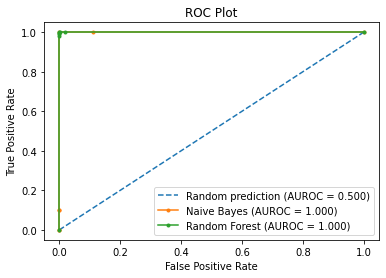

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
r_probs = [0 for _ in range(len(y_train))]
rf_probs = model.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]

r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
nb_auc = roc_auc_score(y_test, nb_probs)

print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
# nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)


# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()
plt.savefig('IQR of adverserial images vs original images')


Plotting the features after reducing their dimension from 10 to 2:


In [ ]:

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=3000)
tsne_resultsorg = tsne.fit_transform(IQRorigin)
tsne_resultsadv = tsne.fit_transform(IQRadvers)



[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.002s...
[t-SNE] Computed neighbors for 1000 samples in 0.055s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.010802
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.661674
[t-SNE] KL divergence after 2600 iterations: 0.892668
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.041s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.000012
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.302666
[t-SNE] KL divergence after 3000 iterations: 0.948868


In [ ]:
x = tsne_resultsorg[:,0]
y = tsne_resultsorg[:,1]
plt.scatter(x,y,  color='b', s=5, marker="o", label= 'IQR_original')

x = tsne_resultsadv[:,0]
y = tsne_resultsadv[:,1]
plt.scatter(x,y,  color='r', s=5, marker="s", label= 'IQR_adverserial')



plt.xlabel('x')
plt.ylabel('y')
plt.title('IQR of adverserial images vs original images')
plt.legend()
plt.savefig('IQR of adverserial images vs original images')
plt.show()


NameError: ignored

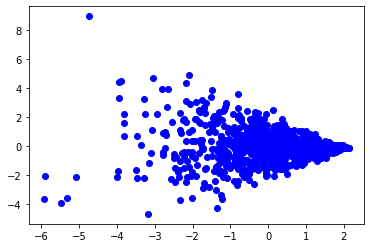

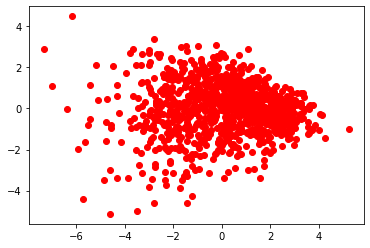

In [ ]:
class convers_pca():
    def __init__(self, no_of_components):
        self.no_of_components = no_of_components
        self.eigen_values = None
        self.eigen_vectors = None
        
    def transform(self, x):
        return np.dot(x - self.mean, self.projection_matrix.T)
    
    def inverse_transform(self, x):
        return np.dot(x, self.projection_matrix) + self.mean
    
    def fit(self, x):
        self.no_of_components = x.shape[1] if self.no_of_components is None else self.no_of_components
        self.mean = np.mean(x, axis=0)
        
        cov_matrix = np.cov(x - self.mean, rowvar=False)
        
        self.eigen_values, self.eigen_vectors = np.linalg.eig(cov_matrix)
        self.eigen_vectors = self.eigen_vectors.T
        
        self.sorted_components = np.argsort(self.eigen_values)[::-1]
        
        self.projection_matrix = self.eigen_vectors[self.sorted_components[:self.no_of_components]]
        self.explained_variance = self.eigen_values[self.sorted_components]
        self.explained_variance_ratio = self.explained_variance / self.eigen_values.sum()

x=IQRorigin
x1=IQRadvers
std = StandardScaler()
transformed = StandardScaler().fit_transform(x)
transformed1 = StandardScaler().fit_transform(x1)




pca = convers_pca(no_of_components=10)
pca.fit(transformed)
pca.fit(transformed1)

# cov_pca.eigen_vectors


# cov_pca.eigen_values

# cov_pca.sorted_components


x_std = pca.transform(transformed)
x_std1 = pca.transform(transformed1)
plt.figure()

plt.scatter(x_std[:, 0], x_std[:, 1], c='b')
plt.figure()
plt.scatter(x_std1[:, 0], x_std1[:, 1], color='r')

Finding optimal parameters using GridSearchCV:

In [ ]:
X= IQRorigin  + IQRadvers
Y= clasorigin+ clasadvers

dataPanda = pd.DataFrame({'Adv':Y,'data':X })

clf = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear','sigmoid']
}, cv=5, return_train_score=False)
clf.fit(list(dataPanda.data),dataPanda.Adv)
# clf.cv_results_

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 20],
                         'kernel': ['rbf', 'linear', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.095816,0.003409,0.019512,0.001118,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.5200,0.5325,0.5250,0.5275,0.5175,0.5245,0.005339,8
1,0.035774,0.001500,0.006154,0.000221,1,linear,"{'C': 1, 'kernel': 'linear'}",0.7750,0.8025,0.7800,0.7850,0.7925,0.7870,0.009670,6
2,0.095140,0.003205,0.020292,0.001524,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.5200,0.5325,0.5250,0.5250,0.5175,0.5240,0.005148,9
3,0.067031,0.000514,0.013695,0.000401,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.8600,0.8600,0.8425,0.8600,0.8700,0.8585,0.008888,4
4,0.015556,0.000265,0.002974,0.000135,10,linear,"{'C': 10, 'kernel': 'linear'}",0.9325,0.9500,0.9125,0.9400,0.9450,0.9360,0.013096,2
5,0.081294,0.001947,0.016605,0.000132,10,sigmoid,"{'C': 10, 'kernel': 'sigmoid'}",0.7750,0.8025,0.7800,0.7850,0.7925,0.7870,0.009670,6
6,0.052012,0.000543,0.010554,0.000225,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.9100,0.9100,0.8850,0.9025,0.9175,0.9050,0.011068,3
7,0.012552,0.000251,0.002368,0.000059,20,linear,"{'C': 20, 'kernel': 'linear'}",0.9425,0.9625,0.9300,0.9500,0.9500,0.9470,0.010654,1
8,0.066611,0.001506,0.013726,0.000048,20,sigmoid,"{'C': 20, 'kernel': 'sigmoid'}",0.8600,0.8600,0.8425,0.8600,0.8700,0.8585,0.008888,4


In [ ]:
df[['param_C','param_kernel','mean_test_score']] #With the features we are mostly intrested in

,param_C,param_kernel,mean_test_score
0,1,rbf,0.5245
1,1,linear,0.7870
2,1,sigmoid,0.5240
3,10,rbf,0.8585
4,10,linear,0.9360
5,10,sigmoid,0.7870
6,20,rbf,0.9050
7,20,linear,0.9470
8,20,sigmoid,0.8585


In [ ]:
clf.best_params_#the best parameters to use

{'C': 20, 'kernel': 'linear'}

Fiinding the best model among all the classification algorithm using GridSearchCV

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [ ]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(list(dataPanda.data),dataPanda.Adv)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df



,model,best_score,best_params
0,svm,0.9470,"{'C': 20, 'kernel': 'linear'}"
1,random_forest,0.9995,{'n_estimators': 1}
2,logistic_regression,0.9275,{'C': 10}
